# Telecom Churn Case Study - Rohit Keshari and Rahul Choudhary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# impute the missing value
from fancyimpute import IterativeImputer
# scaling the data
from sklearn.preprocessing import StandardScaler
# import the liberies 
from imblearn.over_sampling import SMOTE
# Importing the lib for PCA
from sklearn.decomposition import PCA
# Incremental principal components analysis (IPCA).
from sklearn.decomposition import IncrementalPCA
# lets import the required lib which we need for LR
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# importing the lib for GridSearchCV and KFolds 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# to import the statmodels
import statsmodels.api as sm
# lets import the RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# to accuracny mesurement 
from sklearn import metrics
# to check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# to plot the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
# to see the colassigication report
from sklearn.metrics import classification_report
# to calculate the cross validation score
from sklearn.model_selection import cross_val_score

%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

<a id="0"></a>
### The Case Study is divided into the following sections: 

1. [Data understanding and exploration](#1)
	- Undestand the data
	
2. [Data Cleaning ](#2)
	- Uniqueness on columns and treatment
	- Date Columns check
	- Categorical column and check the datatype and convert it if require
	- Handiling Missing data - Fancyimpute
	- Column name inspection and modify the name as per given requirment
	
3. [Filter High Value Customer](#3)

4. [Tag churners and remove attributes of the churn phase (Usage based Churn)](#4)

5. [Data Preparation](#5)
	- Derive new features
	- EDA ()
	- Outlier Treatment
	- Dummay Variable creation
	- Train Test split
	- Data Imbalance Treatment via SMOTE

6. [Principal component analysis (PCA)](#6)

7. [Model Building and Evaluation](#7)
	- Non-Interpretable model
		1. Logistic Regression on PCA data
			* Logistic Regression with default parameter
			* Logistic Regression with hyperparameter tuning
		2. Decision Tree on PCA data
			* Decision Tree with default parameter
			* Decision Tree with hyperparameter tuning		
		3. Random Forest on PCA data
			* Random Forest with default parameter
			* Random Forest with hyperparameter tuning		
	- Interpretable model
		1. Logistic Regression (Interpretable model)
			* Logistic Regression with RFE
			* List of feature which has importance for Busineess for deciding the Churn
			* Logistic Regression with hyperparameter tuning
			
8. [Conclusion](#8)
	- Model performance 
	- Best Model 
	- Feature which is important for deciding the Churn Customer
	- Finally, recommend strategies to manage customer churn based on case study

<a id="1"></a>
# 1. Data Understanding and Exploration

In [2]:
# loaded the telecom data
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# lets check the head part of the data
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
# Shape of the data
telecom.shape

(99999, 226)

In [5]:
#info of the data
telecom.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

<a id="2"></a>
# 2. Data Cleaning

## Uniqueness on Columns 

In [6]:
# Unique value check - let see how many level in each columns

for col in telecom.columns:
    if len(telecom[col].unique())<10:
           
        print(col, ": This col has",len(telecom[col].unique()), "Label/unique value")


circle_id : This col has 1 Label/unique value
loc_og_t2o_mou : This col has 2 Label/unique value
std_og_t2o_mou : This col has 2 Label/unique value
loc_ic_t2o_mou : This col has 2 Label/unique value
last_date_of_month_6 : This col has 1 Label/unique value
last_date_of_month_7 : This col has 2 Label/unique value
last_date_of_month_8 : This col has 2 Label/unique value
last_date_of_month_9 : This col has 2 Label/unique value
std_og_t2c_mou_6 : This col has 2 Label/unique value
std_og_t2c_mou_7 : This col has 2 Label/unique value
std_og_t2c_mou_8 : This col has 2 Label/unique value
std_og_t2c_mou_9 : This col has 2 Label/unique value
std_ic_t2o_mou_6 : This col has 2 Label/unique value
std_ic_t2o_mou_7 : This col has 2 Label/unique value
std_ic_t2o_mou_8 : This col has 2 Label/unique value
std_ic_t2o_mou_9 : This col has 2 Label/unique value
night_pck_user_6 : This col has 3 Label/unique value
night_pck_user_7 : This col has 3 Label/unique value
night_pck_user_8 : This col has 3 Label/uni

### Let's check and treat each columns of Uniqueness 

In [7]:
# this is unique ID and this can be dropped as only one value in that

telecom.drop("circle_id",axis=1,inplace=True)

In [8]:
# these three columns have only 0 and NAN and which is none of use so dropping all of these three columns
print(telecom.loc_og_t2o_mou.unique())
print(telecom.std_og_t2o_mou.unique())
print(telecom.loc_ic_t2o_mou.unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [9]:
print("Shape before droping these columns: {}".format(telecom.shape))

drop_col = ["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"]

telecom.drop(drop_col,axis=1,inplace=True)

print("Shape after droping these columns: {}".format(telecom.shape))

Shape before droping these columns: (99999, 225)
Shape after droping these columns: (99999, 222)


## Date Columns- Let's check the Importance of date columns

In [10]:
# date columns 
date_col = telecom.columns[telecom.columns.str.contains('date',regex=True)]
date_col

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [11]:
# lets check and see if that can be used for modeling or not
telecom[date_col]

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99994            6/30/2014            7/31/2014            8/31/2014   
99995            6/30/2014            7/31/2014            8/31/2014   
99996            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   
99998            6/30/2014            7/31/2014            8/31/2014   

      last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0                9/30/2014           6/21/2014           7/16/2014   
1                9/30/2014           6/29/2014           7/31/2014   
2                9/30/2014           6/17/2014           7/24/2014   
3                9/30/2014           6/28/2014           7/31/2014   
4                9/30/2014           6/26/2014           7/28/2014   
...                    ...                 ...                 ...   
99994            9/30/2014            6/3/2014           7/20/2014   
99995            9/30/2014           6/17/2014           7/17/2014   
99996            9/30/2014           6/13/2014           7/26/2014   
99997            9/30/2014           6/17/2014           7/19/2014   
99998            9/30/2014           6/16/2014                 NaN   

      date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0                8/8/2014           9/28/2014                6/21/2014   
1               8/28/2014           9/30/2014                      NaN   
2               8/14/2014           9/29/2014                      NaN   
3               8/31/2014           9/30/2014                      NaN   
4                8/9/2014           9/28/2014                 6/4/2014   
...                   ...                 ...                      ...   
99994           8/26/2014           9/25/2014                      NaN   
99995           8/24/2014           9/26/2014                      NaN   
99996                 NaN            9/2/2014                6/13/2014   
99997           8/20/2014           9/17/2014                6/17/2014   
99998                 NaN                 NaN                6/11/2014   

      date_of_last_rech_data_7 date_of_last_rech_data_8  \
0                    7/16/2014                 8/8/2014   
1                    7/25/2014                8/10/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                      NaN                      NaN   
99997                7/19/2014                8/20/2014   
99998                      NaN                      NaN   

      date_of_last_rech_data_9  
0                          NaN  
1                          NaN  
2                    9/17/2014  
3                          NaN  
4                          NaN  
...                        ...  
99994                      NaN  
99995                      NaN  
99996                      NaN  
99997                9/17/2014  
99998                      NaN  

[99999 rows x 12 columns]

In [12]:
# these date columns are not in use for modelling as no inference can be drwan so dropping all these now.

print("Shape before droping these columns: {}".format(telecom.shape))

telecom.drop(date_col,axis=1,inplace=True)

print("Shape after droping these columns: {}".format(telecom.shape))

Shape before droping these columns: (99999, 222)
Shape after droping these columns: (99999, 210)


## Categorical column and check the datatype and convert it if require

In [13]:
# these three columns have only 0 and NAN and which is none of use so dropping all of these three columns
print(telecom.std_og_t2c_mou_6.unique())
print(telecom.std_og_t2c_mou_7.unique())
print(telecom.std_og_t2c_mou_8.unique())
print(telecom.std_og_t2c_mou_9.unique())

[nan  0.]
[nan  0.]
[ 0. nan]
[nan  0.]


In [14]:
print("Shape before droping these columns: {}".format(telecom.shape))

drop_col = ["std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9"]

telecom.drop(drop_col,axis=1,inplace=True)

print("Shape after droping these columns: {}".format(telecom.shape))

Shape before droping these columns: (99999, 210)
Shape after droping these columns: (99999, 206)


In [15]:
# std_ic_t2o_mou columns also none of user as only one unique level
std_ic_t2o_mou_col = []
for i in range(6,10):
    col = "std_ic_t2o_mou_"+str(i)
    print(telecom[col].unique())
    std_ic_t2o_mou_col.append(col)

[nan  0.]
[nan  0.]
[ 0. nan]
[nan  0.]


In [16]:
print("Shape before droping these columns: {}".format(telecom.shape))

telecom.drop(std_ic_t2o_mou_col,axis=1,inplace=True)

print("Shape after droping these columns: {}".format(telecom.shape))

Shape before droping these columns: (99999, 206)
Shape after droping these columns: (99999, 202)


In [17]:
# night_pck_user columns has 3 level 0, NAN and 1.
night_pck_user_col = []

for i in range(6,10):
    col = "night_pck_user_"+str(i)
    print(telecom[col].unique())
    night_pck_user_col.append(col)

[ 0. nan  1.]
[ 0. nan  1.]
[ 0. nan  1.]
[nan  0.  1.]


In [18]:
#lets check the NAN value 
print(telecom.night_pck_user_6.isnull().sum())
print(telecom.night_pck_user_7.isnull().sum())
print(telecom.night_pck_user_8.isnull().sum())
print(telecom.night_pck_user_9.isnull().sum())

74846
74428
73660
74077


- Night_pck_user columns has 3 level 0, NAN and 1.
- As this caoulms missing value approx 75 percent 
- So, will impute the NAN value with new category as -1 value with -1

In [19]:
# Lets impute the value with -1 for night_pck_user
telecom["night_pck_user_6"].fillna("-1",inplace = True)
telecom["night_pck_user_7"].fillna("-1",inplace = True)
telecom["night_pck_user_8"].fillna("-1",inplace = True)
telecom["night_pck_user_9"].fillna("-1",inplace = True)

In [20]:
#lets check the NAN value count now
print(telecom.night_pck_user_6.isnull().sum())
print(telecom.night_pck_user_7.isnull().sum())
print(telecom.night_pck_user_8.isnull().sum())
print(telecom.night_pck_user_9.isnull().sum())

0
0
0
0


In [21]:
# data type is Float but this should be category as only 2 level excluding NAN
print(night_pck_user_col)
for col in night_pck_user_col:
    print((telecom[col].dtypes))

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']
object
object
object
object


In [22]:
# Lets change the datatypes to categorical - object 

# before 
print(night_pck_user_col)
for col in night_pck_user_col:
    print("Before : {}".format(telecom[col].dtypes))
    
# loop to change each column to category type
for col in night_pck_user_col:
    telecom[col] = telecom[col].astype('category',copy=False)

print("***********************")
#after
print(night_pck_user_col)
for col in night_pck_user_col:
    print("After : {}".format(telecom[col].dtypes))

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']
Before : object
Before : object
Before : object
Before : object
***********************
['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']
After : category
After : category
After : category
After : category


In [23]:
# monthly_2g columns has multiple level 0,1,2...
monthly_2g_col = []

for i in range(6,10):
    col = "monthly_2g_"+str(i)
    print(telecom[col].unique())
    monthly_2g_col.append(col)

[0 1 2 3 4]
[0 1 2 5 4 3]
[0 1 2 5 3 4]
[0 2 1 3 4]


In [24]:
# data tyoe is Float but this should be category as only few level there
print(monthly_2g_col)
for col in monthly_2g_col:
    print((telecom[col].dtypes))

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9']
int64
int64
int64
int64


In [25]:
# datatypes to categorical - object 

# before 
print(monthly_2g_col)
for col in monthly_2g_col:
    print("Before : {}".format(telecom[col].dtypes))
    
# loop to change each column to category type
for col in monthly_2g_col:
    telecom[col] = telecom[col].astype('category',copy=False)

print("***********************")

# after changing the data type
print(monthly_2g_col)
for col in monthly_2g_col:
    print("After : {}".format(telecom[col].dtypes))

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9']
Before : int64
Before : int64
Before : int64
Before : int64
***********************
['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9']
After : category
After : category
After : category
After : category


In [26]:
# fb_user_col columns has 2 level 0 and 1 excluding NAN as going to impute this in next cell

fb_user_col = []

for i in range(6,10):
    col = "fb_user_"+str(i)
    print(telecom[col].unique())
    fb_user_col.append(col)

[ 1. nan  0.]
[ 1. nan  0.]
[ 1. nan  0.]
[nan  1.  0.]


In [27]:
#lets check the NAN value 
print(telecom.fb_user_6.isnull().sum())
print(telecom.fb_user_7.isnull().sum())
print(telecom.fb_user_8.isnull().sum())
print(telecom.fb_user_9.isnull().sum())

74846
74428
73660
74077


- fb_user columns has 3 level 0, NAN and 1.
- As this caoulms missing value approx 75 percent 
- So, will impute the NAN value with new category as -1 value with -1

In [28]:
# Lets impute the value with -1 for night_pck_user
telecom["fb_user_6"].fillna("-1",inplace = True)
telecom["fb_user_7"].fillna("-1",inplace = True)
telecom["fb_user_8"].fillna("-1",inplace = True)
telecom["fb_user_9"].fillna("-1",inplace = True)

In [29]:
#lets check the NAN value 
print(telecom.night_pck_user_6.isnull().sum())
print(telecom.night_pck_user_7.isnull().sum())
print(telecom.night_pck_user_8.isnull().sum())
print(telecom.night_pck_user_9.isnull().sum())

0
0
0
0


In [30]:
# datatypes to categorical - object 

# before 
print(fb_user_col)
for col in fb_user_col:
    print("Before : {}".format(telecom[col].dtypes))
    
# loop to change each column to category type
for col in fb_user_col:
    telecom[col] = telecom[col].astype('category',copy=False)

print("***********************")

# after
print(fb_user_col)
for col in fb_user_col:
    print("After : {}".format(telecom[col].dtypes))	


['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
Before : object
Before : object
Before : object
Before : object
***********************
['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
After : category
After : category
After : category
After : category


 - We have corrected the required datatypes and will now proceed with missing columns treatment

# Handling Missing Data

In [31]:
# lets create the missing data function to calculate and give the percentage for each columns
def Missing_col(percentage):
    null = round(100*(telecom.isnull().sum()/len(telecom)),2)
    print("Total {} columns are havng more than {} % missing value.".format(len(null.loc[null>percentage].index), percentage))
    print("*******************")
    return null.loc[null>percentage]

In [32]:
# lets check how many coluns has more than 70 % missing data
Missing_col(70)

Total 28 columns are havng more than 70 % missing value.
*******************


total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
dtype: float64

#### Inference : 

- All the columns which are mentioned above they are Recharge type columns or they did not used that service.
- It is based not to drop these columns and lets impute these columns with 0 as they did not used that service or not did recharge 

In [33]:
# as have checked all the columns and then going to impute with zero 

col_to_impute = ["total_rech_data", "max_rech_data", "count_rech_2g", "count_rech_3g", "av_rech_amt_data","arpu_3g","arpu_2g"]

In [34]:
# lets make the functioned for imputing the 0 value as we have lots of feature here 
def impute_value_0(df, imputecol = False, missingcol = False):
    if imputecol:
        
        for feature in [ name + mon for name in imputecol for mon in["_6", "_7", "_8", "_9"]]:
            telecom[feature].fillna(value=0, inplace = True)
    elif missingcol:
        for feature in missingcol:
            telecom[feature].fillna(value=0, inplace = True)

In [35]:
# lets move to impute the columns to 0 now
impute_value_0(telecom, imputecol = col_to_impute)

In [36]:
# Now, check and verify the 70 percent missing columns and see 
Missing_col(70)

Total 0 columns are havng more than 70 % missing value.
*******************


Series([], dtype: float64)

In [37]:
# now lets move to next Missing percentage and see how many missing values we have now
Missing_col(70)
Missing_col(60)
Missing_col(50)
Missing_col(40)
Missing_col(30)
Missing_col(20)
Missing_col(10)


Total 0 columns are havng more than 70 % missing value.
*******************
Total 0 columns are havng more than 60 % missing value.
*******************
Total 0 columns are havng more than 50 % missing value.
*******************
Total 0 columns are havng more than 40 % missing value.
*******************
Total 0 columns are havng more than 30 % missing value.
*******************
Total 0 columns are havng more than 20 % missing value.
*******************
Total 0 columns are havng more than 10 % missing value.
*******************


Series([], dtype: float64)

In [38]:
# now lets move to next Missing percentage and see how many missing values we have  
Missing_col(9)
Missing_col(8)
Missing_col(7)


Total 0 columns are havng more than 9 % missing value.
*******************
Total 0 columns are havng more than 8 % missing value.
*******************
Total 27 columns are havng more than 7 % missing value.
*******************


onnet_mou_9         7.75
offnet_mou_9        7.75
roam_ic_mou_9       7.75
roam_og_mou_9       7.75
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_9    7.75
loc_og_mou_9        7.75
std_og_t2t_mou_9    7.75
std_og_t2m_mou_9    7.75
std_og_t2f_mou_9    7.75
std_og_mou_9        7.75
isd_og_mou_9        7.75
spl_og_mou_9        7.75
og_others_9         7.75
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_9    7.75
loc_ic_mou_9        7.75
std_ic_t2t_mou_9    7.75
std_ic_t2m_mou_9    7.75
std_ic_t2f_mou_9    7.75
std_ic_mou_9        7.75
spl_ic_mou_9        7.75
isd_ic_mou_9        7.75
ic_others_9         7.75
dtype: float64

# Inference
- As we can see that all these missing columns are from month 9 which we need to remove from this data as they are from Churn phase 
- For now we are going to impute with zero and later we are dropping all these columns any how

In [39]:
# this all columns are belong to 9th months and which is bad phase and this going be dropped later
# checked the columns and nothing belong to recharge amount which being used for deriving the Churn
missing_col_9 = list(Missing_col(7).index)

Total 27 columns are havng more than 7 % missing value.
*******************


In [40]:
# lets move to impute the columns to 0 now
impute_value_0(telecom,missingcol = missing_col_9)

In [41]:
# Now, check and verify the 70 percent missing columns and see 
Missing_col(7)

Total 0 columns are havng more than 7 % missing value.
*******************


Series([], dtype: float64)

In [42]:
# lets move to next percentage
Missing_col(7)
Missing_col(6)
Missing_col(5)
Missing_col(2)

Total 0 columns are havng more than 7 % missing value.
*******************
Total 0 columns are havng more than 6 % missing value.
*******************
Total 27 columns are havng more than 5 % missing value.
*******************
Total 81 columns are havng more than 2 % missing value.
*******************


onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2t_mou_8    5.38
std_og_t2m_mou_6    3.94
std_og_t2m_mou_7    3.86
std_og_t2m_mou_8    5.38
std_og_t2f_mou_6    3.94
std_og_t2f_mou_7    3.86
std_og_t2f_mou_8    5.38
std_og_mou_6        3.94
std_og_mou_7        3.86
std_og_mou_8        5.38
isd_og_mou_6        3.94


# Inference
- As we can see that all these missing columns are from month 6,7 and 8 which we need to impute  
- Lets go ahead to impute these columns

In [43]:
# lets store these columns to one variable
col_to_impute = list(Missing_col(2).index)
col_to_impute


Total 81 columns are havng more than 2 % missing value.
*******************


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

- We have to impute the missing value so I am using IterativeImputer.
- ref :  https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
- A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [44]:
#pip install fancyimpute
# I have installed the liberary for the fancyimpute
# Then created teh function and going to use in 20 columns each for better and fast as taking long time to do
ii = IterativeImputer()

def IterativeImputer_NAN(col):
    df_clean = pd.DataFrame(ii.fit_transform(telecom[col]))
    df_clean.columns = col
    return df_clean

In [45]:
# Lets impute for first 20
col_to_impute_clean_20 = IterativeImputer_NAN(col_to_impute[:20])
col_to_impute_clean_20.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0    53.533253    29.824183         0.00     74.244009     43.345179   
1    24.110000    78.680000         7.68     15.740000     99.840000   
2    11.540000    55.240000        37.26    143.330000    220.590000   
3    99.910000    54.390000       310.98    123.310000    109.010000   
4    50.310000   149.440000        83.89     76.960000     91.880000   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          0.00       3.262239       0.735934           0.00       4.870719   
1        304.76       0.000000       0.000000           0.00       0.000000   
2        208.36       0.000000       0.000000           0.00       0.000000   
3         71.68       0.000000      54.860000          44.38       0.000000   
4        124.26       0.000000       0.000000           0.00       0.000000   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0       2.829245           0.00         14.488881          7.866927   
1       0.000000           0.00         23.880000         74.560000   
2       0.000000           0.00          7.190000         28.740000   
3      28.090000          39.04         73.680000         34.810000   
4       0.000000           0.00         50.310000        149.440000   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00         27.502393         16.104549              0.00   
1              7.68         11.510000         75.940000            291.86   
2             13.58         29.340000         16.860000             38.46   
3             10.61        107.430000         83.210000             22.46   
4             83.89         67.640000         91.880000            124.26   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  
0          2.177812           2.11744  
1          0.000000           0.00000  
2         24.110000          21.79000  
3          1.910000           0.65000  
4          0.000000           0.00000

In [46]:
# lets first drop the original columns and then concat the new telecom,col_to_impute_clean_20

telecom.drop(col_to_impute[:20], inplace = True, axis=1)

telecom = pd.concat([telecom,col_to_impute_clean_20], axis=1)

telecom[col_to_impute[:20]].isnull().sum()

onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
dtype: int64

In [47]:
# Lets impute 20 - 40 numbers columns 
col_to_impute_clean_40 = IterativeImputer_NAN(col_to_impute[20:40])
col_to_impute_clean_40.head()

loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00          0.817154          0.696694              0.00   
1              0.00          0.000000          2.910000              0.00   
2             15.61          0.000000        135.540000             45.76   
3              4.91          0.000000          0.000000              0.00   
4              0.00          0.000000          0.000000              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     46.039059     31.877676          0.00         79.830309   
1     35.390000    150.510000        299.54          0.230000   
2     60.660000     67.410000         67.66          4.340000   
3    183.030000    118.680000         37.99         26.230000   
4    117.960000    241.330000        208.16          0.000000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         83.299828              0.00         87.300273         90.803843   
1          4.110000              0.00          0.000000          0.460000   
2         26.490000             22.58         41.810000         67.410000   
3         14.890000            289.58          2.990000          1.730000   
4          0.000000              0.00          9.310000          0.000000   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00          1.128612          1.115231              0.00   
1              0.13          0.000000          0.000000              0.00   
2             75.53          1.480000         14.760000             22.83   
3              6.53          0.000000          0.000000              0.00   
4              0.00          0.000000          0.000000              0.00   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  
0    168.261052    175.220759          0.00      0.714894  
1      0.230000      4.580000          0.13      0.000000  
2     47.640000    108.680000        120.94      0.000000  
3     29.230000     16.630000        296.11      0.000000  
4      9.310000      0.000000          0.00      0.000000

In [48]:
# lets first drop the original columns and then concat the new telecom,col_to_impute_clean_40

telecom.drop(col_to_impute[20:40], inplace = True, axis=1)

telecom = pd.concat([telecom,col_to_impute_clean_40], axis=1)

telecom[col_to_impute[20:40]].isnull().sum()

loc_og_t2f_mou_8    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
loc_og_t2c_mou_8    0
loc_og_mou_6        0
loc_og_mou_7        0
loc_og_mou_8        0
std_og_t2t_mou_6    0
std_og_t2t_mou_7    0
std_og_t2t_mou_8    0
std_og_t2m_mou_6    0
std_og_t2m_mou_7    0
std_og_t2m_mou_8    0
std_og_t2f_mou_6    0
std_og_t2f_mou_7    0
std_og_t2f_mou_8    0
std_og_mou_6        0
std_og_mou_7        0
std_og_mou_8        0
isd_og_mou_6        0
dtype: int64

In [49]:
# lets do the 40 to 60 columsn now 
col_to_impute_clean_60 = IterativeImputer_NAN(col_to_impute[40:60])
col_to_impute_clean_60.head()

isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0      0.179155           0.0       2.55089       2.41277          0.00   
1      0.000000           0.0       4.68000      23.43000         12.76   
2      0.000000           0.0      46.56000     236.84000         96.84   
3      0.000000           0.0      10.96000       0.00000         18.09   
4      0.000000           0.0       0.00000       0.00000          0.00   

   og_others_6  og_others_7  og_others_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
0     0.421698     0.015466          0.0         47.924311         47.992748   
1     0.000000     0.000000          0.0          1.610000         29.910000   
2     0.450000     0.000000          0.0        115.690000         71.110000   
3     0.000000     0.000000          0.0         62.080000         19.980000   
4     0.000000     0.000000          0.0        105.680000         88.490000   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
0              0.16        107.475655        107.120487              4.13   
1             29.23         17.480000         65.380000            375.58   
2             67.46         14.380000         15.440000             38.89   
3              8.04        113.960000         64.510000             20.28   
4            233.81        106.840000        109.540000            104.13   

   loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  \
0         12.084285         12.599697              1.15    167.490991   
1          0.000000          8.930000              3.61     19.090000   
2         99.480000        122.290000             49.63    229.560000   
3         57.430000         27.090000             19.84    233.480000   
4          1.500000          0.000000              0.00    214.030000   

   loc_ic_mou_7  loc_ic_mou_8  
0    167.719511          5.44  
1    104.230000        408.43  
2    208.860000        155.99  
3    111.590000         48.18  
4    198.040000        337.94

In [50]:
# lets first drop the original columns and then concat the new telecom,col_to_impute_clean_60

telecom.drop(col_to_impute[40:60], inplace = True, axis=1)

telecom = pd.concat([telecom,col_to_impute_clean_60], axis=1)

telecom[col_to_impute[40:60]].isnull().sum()

isd_og_mou_7        0
isd_og_mou_8        0
spl_og_mou_6        0
spl_og_mou_7        0
spl_og_mou_8        0
og_others_6         0
og_others_7         0
og_others_8         0
loc_ic_t2t_mou_6    0
loc_ic_t2t_mou_7    0
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_6    0
loc_ic_t2m_mou_7    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_6    0
loc_ic_t2f_mou_7    0
loc_ic_t2f_mou_8    0
loc_ic_mou_6        0
loc_ic_mou_7        0
loc_ic_mou_8        0
dtype: int64

In [51]:
# lets do the final lap 
col_to_impute_clean_81 = IterativeImputer_NAN(col_to_impute[60:82])
col_to_impute_clean_81.head()

std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0          9.576664         10.012682              0.00         20.722248   
1          0.000000          0.000000              2.35          5.900000   
2         72.410000         71.290000             28.69         45.180000   
3         43.480000         66.440000              0.00          1.330000   
4          0.000000          0.000000              0.86          1.930000   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0         21.656411              0.00          2.156386          2.216923   
1          0.000000             12.49          0.000000          0.000000   
2        177.010000            167.09         21.730000         58.340000   
3         38.560000              4.94          1.180000          0.000000   
4          0.250000              0.00          0.000000          0.000000   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  \
0              0.00      32.45718     33.887821          0.00      0.055887   
1              0.00       5.90000      0.000000         14.84      0.000000   
2             43.23     139.33000    306.660000        239.03      0.210000   
3              0.00      45.99000    105.010000          4.94      0.590000   
4              0.00       1.93000      0.250000          0.86      0.000000   

   spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  \
0      0.030234           0.0      2.497589      1.779669           0.0   
1      0.000000           0.0      1.830000      0.000000           0.0   
2      0.000000           0.0      0.000000      0.850000           0.0   
3      0.000000           0.0      0.000000      0.000000           0.0   
4      0.000000           0.0      0.000000      0.000000           0.0   

   ic_others_6  ic_others_7  ic_others_8  
0     0.229049     0.302537          0.0  
1     0.000000     0.000000          0.0  
2     0.930000     3.140000          0.0  
3     0.000000     0.000000          0.0  
4     0.480000     0.000000          0.0

In [52]:
# lets first drop the original columns and then concat the new telecom,col_to_impute_clean_81

telecom.drop(col_to_impute[60:82], inplace = True, axis=1)

telecom = pd.concat([telecom,col_to_impute_clean_81], axis=1)

telecom[col_to_impute[60:82]].isnull().sum()

std_ic_t2t_mou_6    0
std_ic_t2t_mou_7    0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_6    0
std_ic_t2m_mou_7    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_6    0
std_ic_t2f_mou_7    0
std_ic_t2f_mou_8    0
std_ic_mou_6        0
std_ic_mou_7        0
std_ic_mou_8        0
spl_ic_mou_6        0
spl_ic_mou_7        0
spl_ic_mou_8        0
isd_ic_mou_6        0
isd_ic_mou_7        0
isd_ic_mou_8        0
ic_others_6         0
ic_others_7         0
ic_others_8         0
dtype: int64

In [53]:
# lets check the missing value now
Missing_col(0)

Total 0 columns are havng more than 0 % missing value.
*******************


Series([], dtype: float64)

# Now, we don't have any missing value in dataset

In [54]:
# lets check the shape also now
telecom.shape

(99999, 202)

In [55]:
# lets verify if how many coulumns has unique value as there no inferece can be taken out from these columnste
zero_val_col = telecom.columns[(telecom==0).all()]
zero_val_col

Index([], dtype='object')

- As we dont have nay unique value columns. We have done the treatment in starting of these type of columns

## Column name inspection and modify the name as per given requirment

In [56]:
# let check the columns name correctly named or not

telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 202 columns):
mobile_number         int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_9           float64
offnet_mou_9          float64
roam_ic_mou_9         float64
roam_og_mou_9         float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_9      float64
loc_og_t2c_mou_9      float64
loc_og_mou_9          float64
std_og_t2t_mou_9      float64
std_og_t2m_mou_9      float64
std_og_t2f_mou_9      float64
std_og_mou_9          float64
isd_og_mou_9          float64
spl_og_mou_9          float64
og_others_9           float64
total_og_mou_6        float64
total_og_mou_7        float64
total_og_mou_8        float64
total_og_mou_9        float64
loc_ic_t2t_mou_9      float64
loc_ic_t2m_mou_9      float64
loc_ic_t2f_mou_9      float64
loc_ic_mou_9          float64
std_ic_t2t_mou_9      

- Correcting the columns name of vbc_3g as this is not correct as per the requirment
    - aug_vbc_3g
    - jul_vbc_3g
    - jun_vbc_3g
    - ep_vbc_3g


In [57]:
# correcting the columns name as this is not correct as per the requirment -

telecom.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [58]:
# lets verify that is has been correctly now defined 
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 202 columns):
mobile_number         int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_9           float64
offnet_mou_9          float64
roam_ic_mou_9         float64
roam_og_mou_9         float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_9      float64
loc_og_t2c_mou_9      float64
loc_og_mou_9          float64
std_og_t2t_mou_9      float64
std_og_t2m_mou_9      float64
std_og_t2f_mou_9      float64
std_og_mou_9          float64
isd_og_mou_9          float64
spl_og_mou_9          float64
og_others_9           float64
total_og_mou_6        float64
total_og_mou_7        float64
total_og_mou_8        float64
total_og_mou_9        float64
loc_ic_t2t_mou_9      float64
loc_ic_t2m_mou_9      float64
loc_ic_t2f_mou_9      float64
loc_ic_mou_9          float64
std_ic_t2t_mou_9      

<a id="3"></a>
# 3. Filtering High Value Customer

#### Definition:

- As mentioned in case study, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

#### Approach:
- Total recharge = Total recharge for calling purposer and Total recharge for data used by Customer

- Here,
    - we have Total recharge amount, Average recharge amount for data and Count of data recharge
    - So will calculate first total recharge amount 
    - Then, Total data recharge amount (Count of data recharge multiply by Average recharge amout for data)

#### Let's calculate this now - 

In [59]:
# Total recharge amount of 6 and 7 month
telecom[["total_rech_amt_6","total_rech_amt_7"]].head()

total_rech_amt_6  total_rech_amt_7
0               362               252
1                74               384
2               168               315
3               230               310
4               196               350

In [60]:
# lets calculate the recharge amount for data
# 6th Month
telecom["total_data_rech_amt_6"] = telecom["av_rech_amt_data_6"]*telecom["total_rech_data_6"]
#7th Month
telecom["total_data_rech_amt_7"] = telecom["av_rech_amt_data_7"]*telecom["total_rech_data_7"]

In [61]:
telecom[["total_rech_amt_6","total_rech_amt_7","total_data_rech_amt_6","total_data_rech_amt_7"]].head()

total_rech_amt_6  total_rech_amt_7  total_data_rech_amt_6  \
0               362               252                  252.0   
1                74               384                    0.0   
2               168               315                    0.0   
3               230               310                    0.0   
4               196               350                   56.0   

   total_data_rech_amt_7  
0                  252.0  
1                  154.0  
2                    0.0  
3                    0.0  
4                    0.0

In [62]:
# lets calculate the total Recharge amount for month 6 and 7

telecom["Total_rech_amt_call_data_6"] = telecom["total_rech_amt_6"]+telecom["total_data_rech_amt_6"]
telecom["Total_rech_amt_call_data_7"] = telecom["total_rech_amt_7"]+telecom["total_data_rech_amt_7"]

In [63]:
# lets create the avg_total_rech_amt_6_7 columns and calculate the value
telecom["avg_total_rech_amt_6_7"] = (telecom["Total_rech_amt_call_data_6"]+telecom["Total_rech_amt_call_data_7"])/2
telecom["avg_total_rech_amt_6_7"].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: avg_total_rech_amt_6_7, dtype: float64

In [64]:
# lets check the 70 percentile value
telecom["avg_total_rech_amt_6_7"].quantile(.70)

478.0

In [65]:
# lets store the High value customer data to Dataframe df 
# we have choosen as df is easily we can handle and also in this case study this large data set there
df = telecom[telecom["avg_total_rech_amt_6_7"]>=telecom["avg_total_rech_amt_6_7"].quantile(.70)]

In [66]:
# head part of the data - df
df.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_9  \
0      7000842753   197.385   214.816   213.803   21.100         0.00   
7      7000701601  1069.180  1349.850  3171.480  500.000         0.00   
8      7001524846   378.721   492.223   137.362  166.787        33.46   
21     7002124215   514.453   597.753   637.760  578.596       161.63   
23     7000887461    74.350   193.897   366.966  811.480        15.74   

    offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
0           0.00            0.0            0.0              0.00   
7           0.00            0.0            0.0              0.00   
8         108.71            0.0            0.0             26.13   
21        869.89            0.0            0.0             29.98   
23        111.88            0.0            0.0             15.74   

    loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
0               0.00              0.00              0.00          0.00   
7               0.00              0.00              0.00          0.00   
8              34.58              0.00              0.00         60.71   
21            107.54              0.00              0.00        137.53   
23             83.73              2.45              4.08        101.93   

    std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_9  \
0               0.00              0.00              0.00          0.00   
7               0.00              0.00              0.00          0.00   
8               7.33             74.13              0.00         81.46   
21            131.64            762.34              0.00        893.99   
23              0.00             11.44              3.89         15.34   

    isd_og_mou_9  spl_og_mou_9  og_others_9  total_og_mou_6  total_og_mou_7  \
0            0.0          0.00          0.0            0.00            0.00   
7            0.0          0.00          0.0          487.53          609.24   
8            0.0          0.00          0.0          508.36          431.66   
21           0.0          0.00          0.0          860.34         1028.79   
23           0.0         10.35          0.0          134.38          140.04   

    total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  \
0             0.00            0.00              0.00              0.00   
7           350.16            0.00              0.00              0.00   
8           171.56          142.18              4.03             17.34   
21         1068.54         1031.53             17.99            113.46   
23          239.48          127.63             45.36             75.83   

    loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  std_ic_t2m_mou_9  \
0               0.00          0.00              0.00              0.00   
7               0.00          0.00              0.00              0.00   
8               0.00         21.38              0.00             13.53   
21              8.41        139.88             16.74             95.98   
23              0.00        121.19              1.08              5.20   

    std_ic_t2f_mou_9  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  \
0                0.0          0.00            0.00            0.00   
7                0.0          0.00          626.46          558.04   
8                0.0         13.53          103.86           28.49   
21               0.0        112.73          207.09          131.89   
23               0.0          6.28          119.58          222.89   

    total_ic_mou_8  total_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  \
0             5.44            0.00           0.0           0.0          0.0   
7           428.74            0.00           0.0           0.0          0.0   
8            16.54           34.91           0.0           0.0          0.0   
21          261.04          252.61           0.0           0.0          0.0   
23          298.33          127.48           0.0           0.0          0.0   

    t

In [67]:
# shape of data - df
df.shape

(30001, 207)

- As per given the we will get 30K approx High Vlaue Customer.
- Here we got 30K data

In [68]:
# let remove this columns as telecom which we have derived for filtering HIGH VALUE Customer

Col_rch_drop = ["avg_total_rech_amt_6_7","total_data_rech_amt_6","total_data_rech_amt_7","Total_rech_amt_call_data_6","Total_rech_amt_call_data_7"]
df.drop(Col_rch_drop,axis=1, inplace= True)

In [69]:
df.shape

(30001, 202)

<a id="4"></a>
# 4. Tagging churners and removing attributes of the churn phase (Usage based Churn)

- Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    - total_ic_mou_9

    - total_og_mou_9

    - vol_2g_mb_9

    - vol_3g_mb_9


- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [70]:
# let check the all columns which we need to tag the Churn
df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00         0.00         0.00
7             0.00            0.00         0.00         0.00
8            34.91          142.18         0.00         0.00
21          252.61         1031.53         0.00         0.00
23          127.48          127.63        13.93       314.74

In [71]:
# Lets use the numpy lib where function to do this task and where all four columns value is 0 then tag Churn - 1 otherwise 0

df["Churn"] = np.where((df["total_ic_mou_9"]+df["total_og_mou_9"]+ 
                                         df["vol_2g_mb_9"]+
                                         df["vol_3g_mb_9"]==0),1,0)

In [72]:
# lets check the data Churn
df["Churn"].head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int32

In [73]:
# lets calculate the Churn count wrt 0 and 1
df["Churn"].value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Chart')

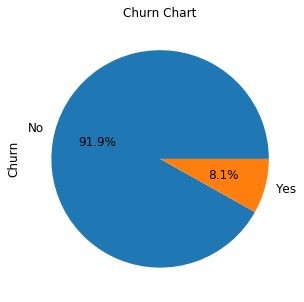

In [74]:
# lets count the percetage and will use pie chart here 
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Chart', fontsize = 12)

- We can see here 8.1% total Churn and 91.9% not Churn customer.
- Data is not balanced and we have to do data balance via imbalance treatment(SMOTE) before doing the modelling 
- Data imbalance treatment will do later section where will prepare the data for Model

#### Now we have identified the Churn columns and no need of night month data so, lets drop all the columns.

In [75]:
# remvoing the 9 months data from dtaframe

col_name = df.columns
col_name_9 = []

for col in col_name:
    if "_9" in col:
        col_name_9.append(col)

print("Col name {}".format(col_name_9))
print("************************")
print("Total {} columns are need to drop for 9th month.".format(len(col_name_9)))

Col name ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']
************************
Total 50 columns are need to drop for 9th month.


In [76]:
# Shape before dropping 9th Month data
df.shape

(30001, 203)

In [77]:
# elts drop the 9th month data
df.drop(col_name_9, axis=1, inplace = True)

In [78]:
# Shape after dropping 9th Month data
df.shape

(30001, 153)

<a id="5"></a>
# 5. Data Preparation

#### Let's derived the new feature  from data set

##### Derive new features

- This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [79]:
# AON: Age on network - number of days the customer is using the operator T network
df["aon"].head(10)

0      968
7      802
8      315
21     720
23     604
33    1328
38    1155
41    2010
48    1265
53     697
Name: aon, dtype: int64

In [80]:
# breaking down the age to month
# mon:Age on network - number of month the customer is using the operator T network

df["aon_month"] = df["aon"]/30

In [81]:
# lets drop this col now
df.drop("aon",axis = 1, inplace = True)

In [82]:
# lets see the data now aon_month
df["aon_month"].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_month, dtype: float64

In [83]:
# lets break more this col with year

def year_break(x):
    if x<=12:
        return "<1"
    elif x>12 and x<=24:
        return "1-2"
    elif x<=36 and x>24:
        return "2-3"
    elif x<=48 and x>36:
        return "3-4"
    elif x<=60 and x>48:
        return "4-5"
    else:
        return "5+"

df["aon_year"] = df.apply(lambda x: year_break(x["aon_month"]), axis= 1)

df["aon_year"].head()

0     2-3
7     2-3
8      <1
21    1-2
23    1-2
Name: aon_year, dtype: object

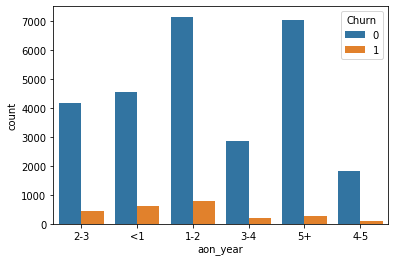

In [84]:
# lets visualize the data which we derived
sns.countplot(df["aon_year"], hue = df["Churn"])

In [85]:
# lets drop the aon_month from data frame as we have derived the feature from this 
df.drop("aon_month",1,inplace= True)

- We can see maximum churn done in 1-2 year and 2-5 year
- Less than one year also have 2nd maximum churn 
- At last we can see the Churning has been done in all year customer


In [86]:
df.shape

(30001, 153)

In [87]:
# VOL:Mobile internet usage volume (in MB)

# total_vol_2g_3g_mb_6 = vol_2g_mb_6 + vol_3g_mb_6
# total_vol_2g_3g_mb_7 = vol_2g_mb_7 + vol_3g_mb_7
# total_vol_2g_3g_mb_8 = vol_2g_mb_8 + vol_3g_mb_8

df["total_vol_2g_3g_mb_6"] = df["vol_2g_mb_6"] + df["vol_3g_mb_6"]
df["total_vol_2g_3g_mb_7"] = df["vol_2g_mb_7"] + df["vol_3g_mb_7"]
df["total_vol_2g_3g_mb_8"] = df["vol_2g_mb_8"] + df["vol_3g_mb_8"]

In [88]:
# Lets see the data
df[["total_vol_2g_3g_mb_6","total_vol_2g_3g_mb_7","total_vol_2g_3g_mb_8"]].head()

total_vol_2g_3g_mb_6  total_vol_2g_3g_mb_7  total_vol_2g_3g_mb_8
0                  113.7                152.08                115.36
7                    0.0                  0.00                  0.00
8                    0.0               1106.95                 11.97
21                   0.0                  0.00                  0.00
23                   0.0                599.57               1009.93

### Lets do the most important part - EDA

##### Lets create all the fucton which are going to use for EDA

In [89]:
# Average month Plot
def avg_mon_plot(df,col,name):
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(df[col].mean())
    ax.set_xticklabels(['Jun','Jul','Aug'])

    # Add titles
    plt.title("Avg. "+ name +" V/S Month", loc='center', fontsize=12, fontweight=0, color='black')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+ name)


# Plot the Average with category as churn or not
def plot_Churn_wise(df,col,name):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(df.groupby('Churn')[col].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+name+"V/S Month", loc='center', fontsize=12, fontweight=0, color='black')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+name+" MOU")

# Box-plot with churn wise and it will give the distribution of data also
# show fliersbool, optional (True) - : Show the outliers beyond the caps.
#(ref- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html)  

def box_chart_churnwise(feature):
    plt.figure(figsize=(20,15))
    plt.subplot(2,3,1)
    
    sns.boxplot(data=df, y=feature+"_6",x="Churn",hue="Churn",showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=feature+"_7",x="Churn",hue="Churn",showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=feature+"_8",x="Churn",hue="Churn",showfliers=False,palette=("plasma"))    

# box plot for cheking the outliers
def Outlier_box_plot(feature):
    plt.figure(figsize=(20,15))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=feature+"_6")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=feature+"_7")
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=feature+"_8")

# histogram for each columns
def hist_plot(feature):
    plt.figure(figsize=(20,15))
    plt.subplot(2,3,1)
    sns.distplot(df[feature+"_6"])
    plt.subplot(2,3,2)
    sns.distplot(df[feature+"_7"])
    plt.subplot(2,3,3)
    sns.distplot(df[feature+"_8"])

# to visualize the categorical variable
def count_plot(feature):
    sns.set()
    plt.rcParams["figure.figsize"] = [20,10]
    plt.subplot(3,1,1)
    sns.countplot(data = df, x = feature+"_6",hue= "Churn")
    plt.subplot(3,1,2)
    sns.countplot(data = df, x = feature+"_7",hue= "Churn")
    plt.subplot(3,1,3)
    sns.countplot(data = df, x = feature+"_8",hue= "Churn")


### EDA on Numerical columns  - 

In [90]:
# info of the data set
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 156 columns):
mobile_number           int64
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
total_og_mou_6          float64
total_og_mou_7          float64
total_og_mou_8          float64
total_ic_mou_6          float64
total_ic_mou_7          float64
total_ic_mou_8          float64
total_rech_num_6        int64
total_rech_num_7        int64
total_rech_num_8        int64
total_rech_amt_6        int64
total_rech_amt_7        int64
total_rech_amt_8        int64
max_rech_amt_6          int64
max_rech_amt_7          int64
max_rech_amt_8          int64
last_day_rch_amt_6      int64
last_day_rch_amt_7      int64
last_day_rch_amt_8      int64
total_rech_data_6       float64
total_rech_data_7       float64
total_rech_data_8       float64
max_rech_data_6         float64
max_rech_data_7         float64
max_rech_data_8         float64
count_rech_2g_6     

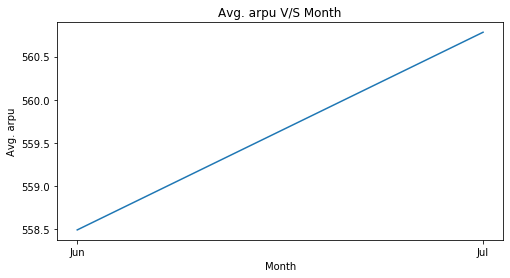

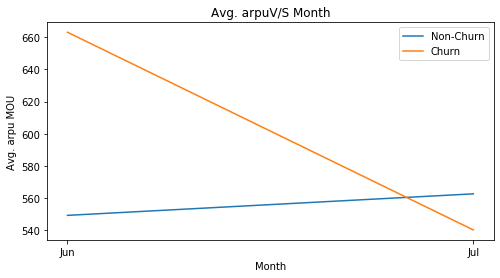

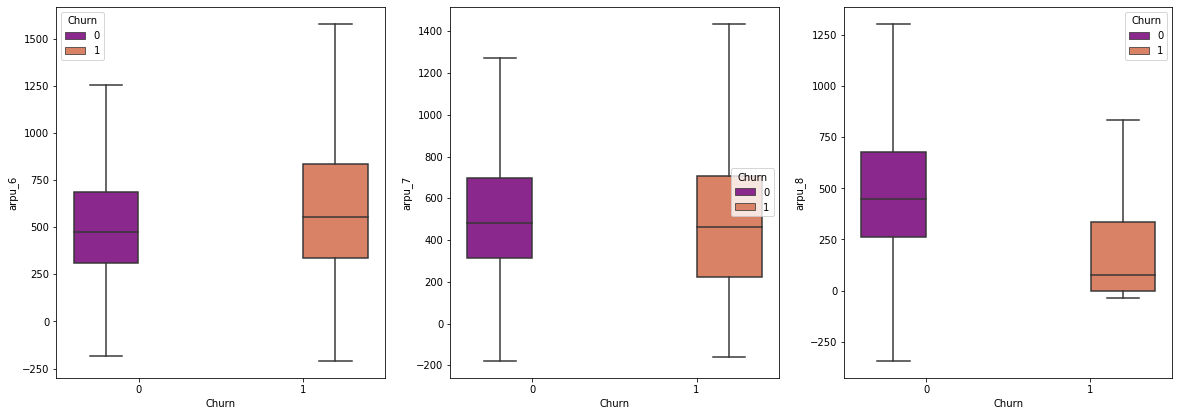

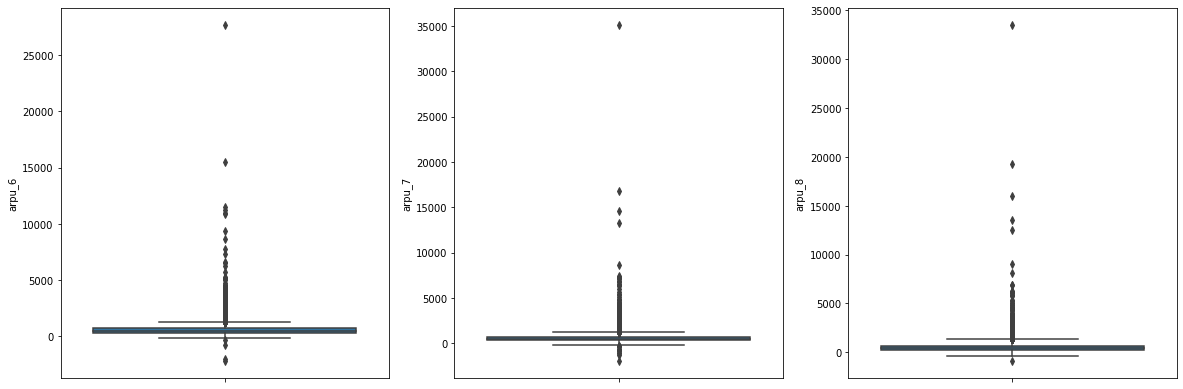

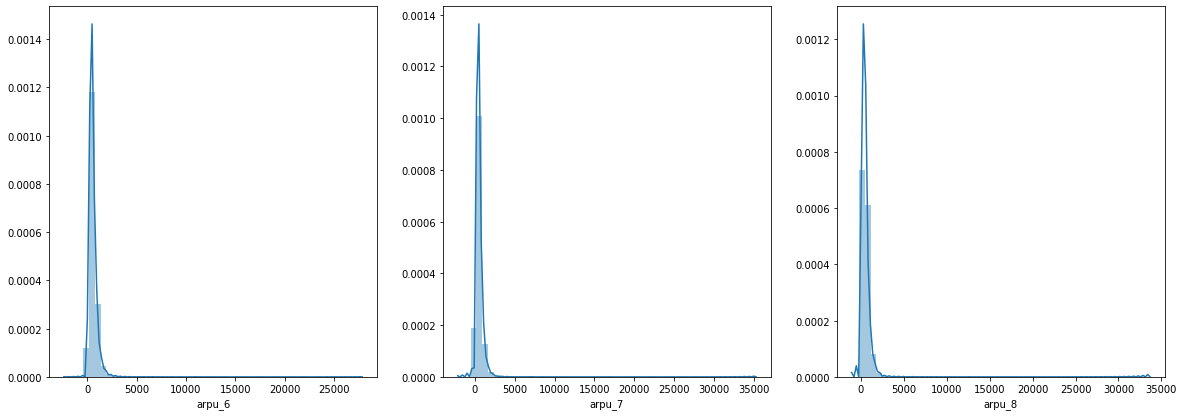

In [91]:
#arpu_col - let visualize the ARPU:Average revenue per user
arpu_col = df.filter(regex ='arpu').columns
avg_mon_plot(df,col =arpu_col[:2],name = "arpu")
plot_Churn_wise(df,col =arpu_col[:2],name = "arpu")
feature = "arpu"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Overall Average revenue per user is increasing constantly.
- When we classfy using Churn then see that Average revenue per user decreasing trend for Churn and non-Churn customer bit increasing order
- Average revenue per user has same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

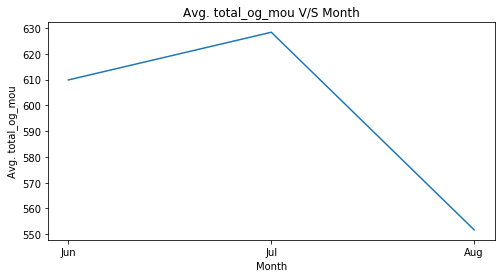

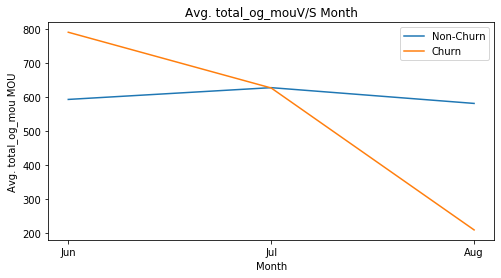

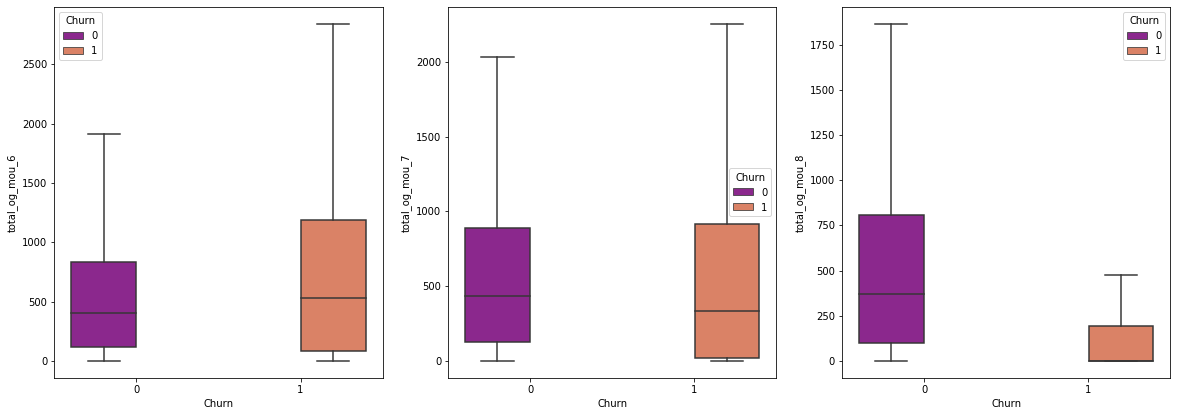

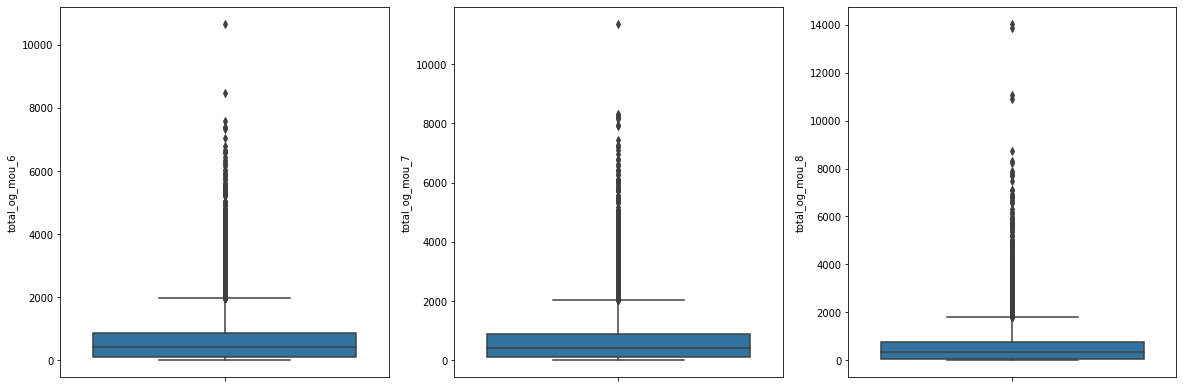

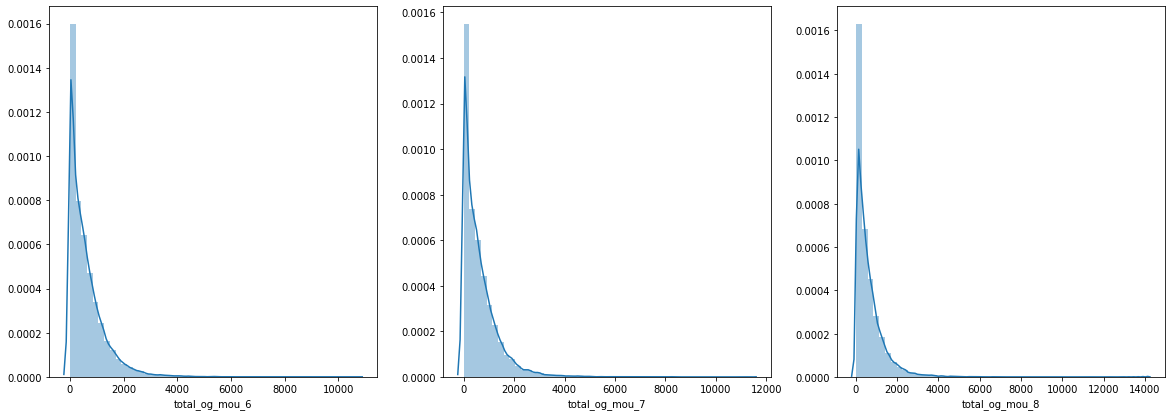

In [92]:
# total_og_mou : total outgoing Minutes of usage - voice calls

feature_col = df.filter(regex ='total_og_mou').columns
avg_mon_plot(df,feature_col,name = "total_og_mou")
plot_Churn_wise(df,feature_col,name = "total_og_mou")
feature = "total_og_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Total outgoing Minutes of usage - voice calls increased in month of June and July. August its dropped 
- When we classfy using Churn then see that Total outgoing Minutes of usage - voice calls decreasing trend for Churn and non-Churn customer also decreased but not much
- Total outgoing Minutes of usage - voice calls have same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

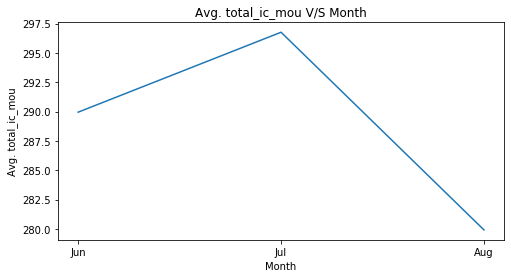

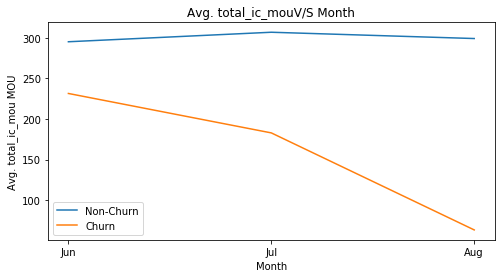

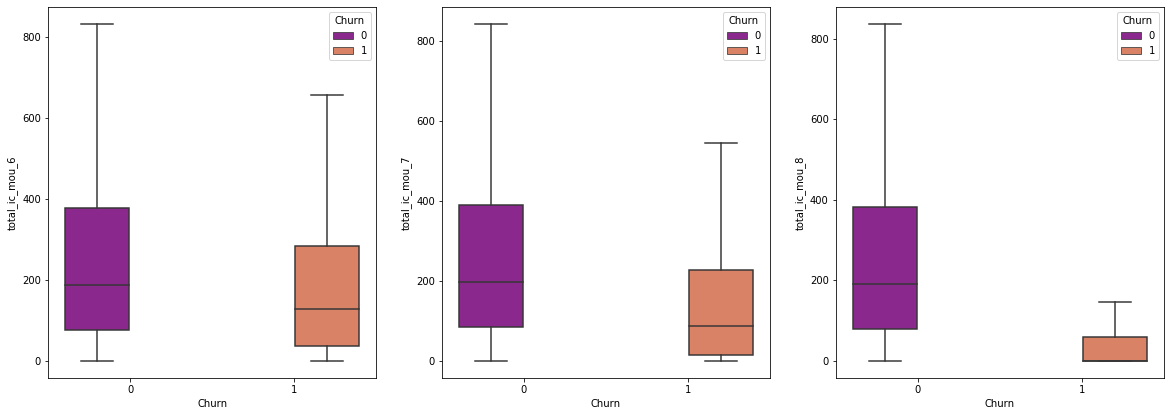

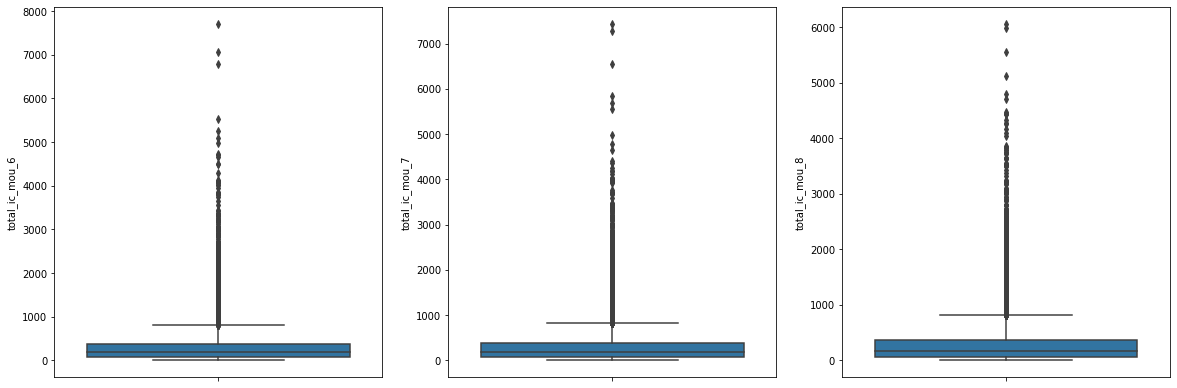

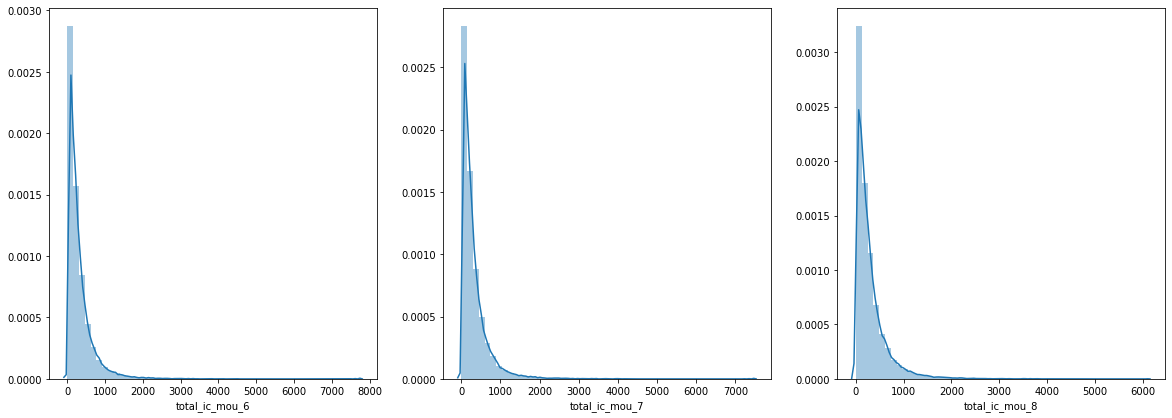

In [93]:

#Total increasing Minutes of usage - voice calls
feature_col = df.filter(regex ='total_ic_mou').columns
avg_mon_plot(df,feature_col,name = "total_ic_mou")
plot_Churn_wise(df,feature_col,name = "total_ic_mou")
feature = "total_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Total incoming Minutes of usage - voice calls increased in month of June and July. August its dropped 
- When we classfy using Churn then see that Total incoming Minutes of usage - voice calls decreasing trend for Churn and non-Churn customer also decreased but not much
- Total incoming Minutes of usage - voice calls have same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

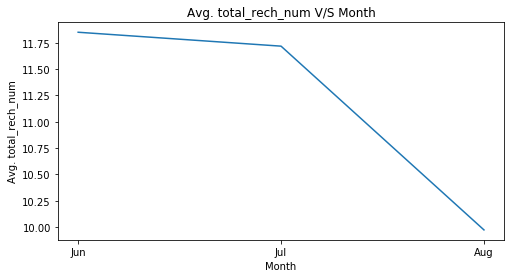

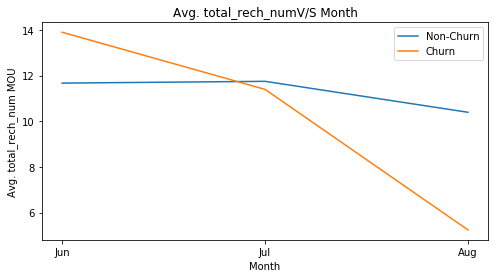

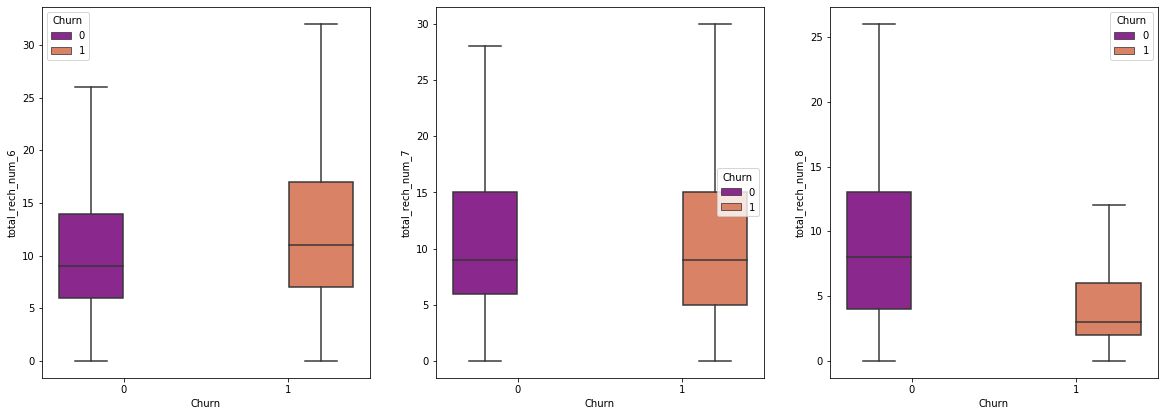

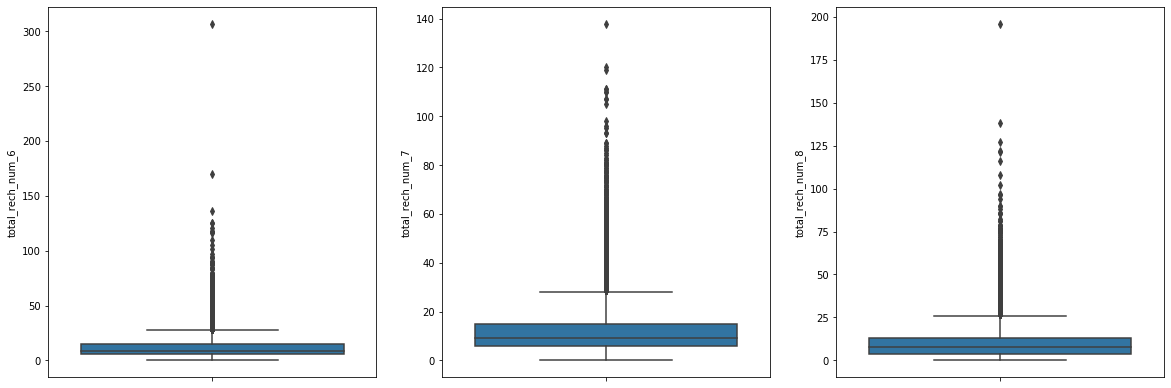

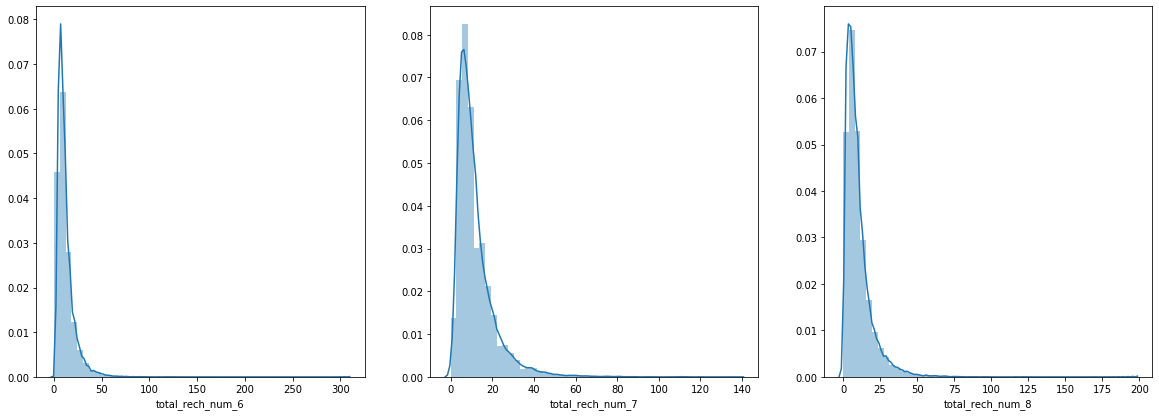

In [94]:
# Total Recharge number -

feature_col = df.filter(regex ='total_rech_num').columns
avg_mon_plot(df,feature_col,name = "total_rech_num")
plot_Churn_wise(df,feature_col,name = "total_rech_num")
feature = "total_rech_num"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Total Recharge number increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that Total Recharge number decreasing trend for Churn and non-Churn customer also decreased but not much
- Total Recharge number have same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

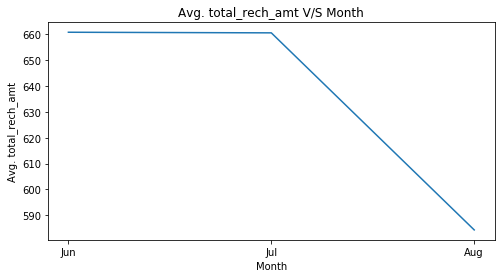

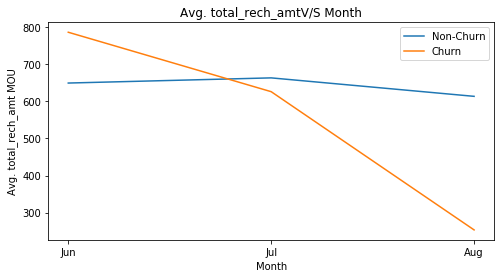

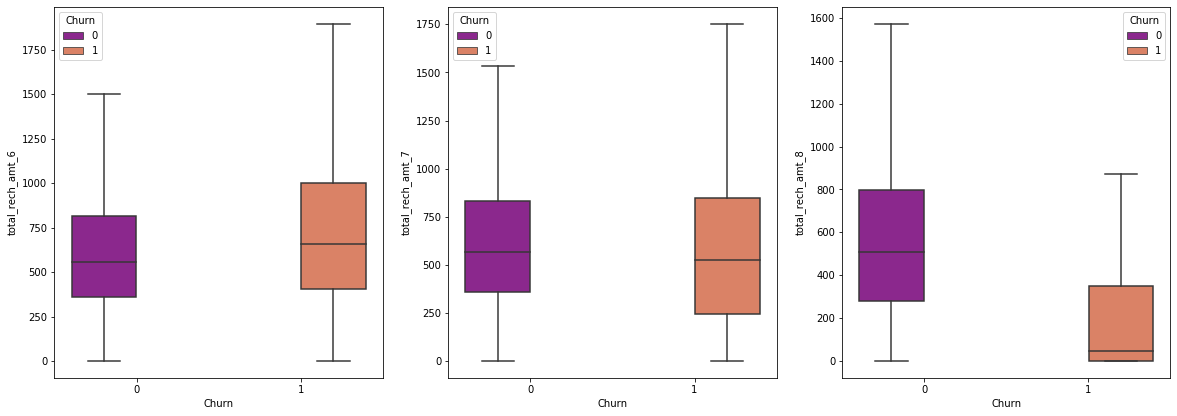

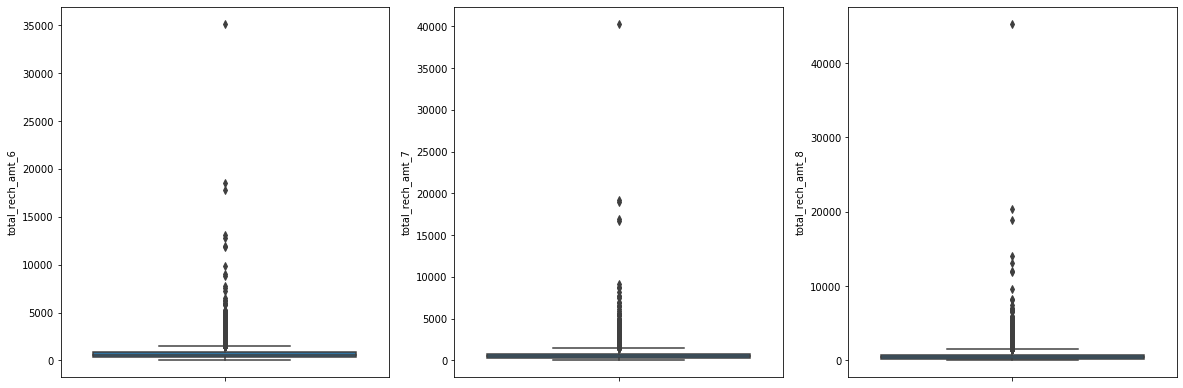

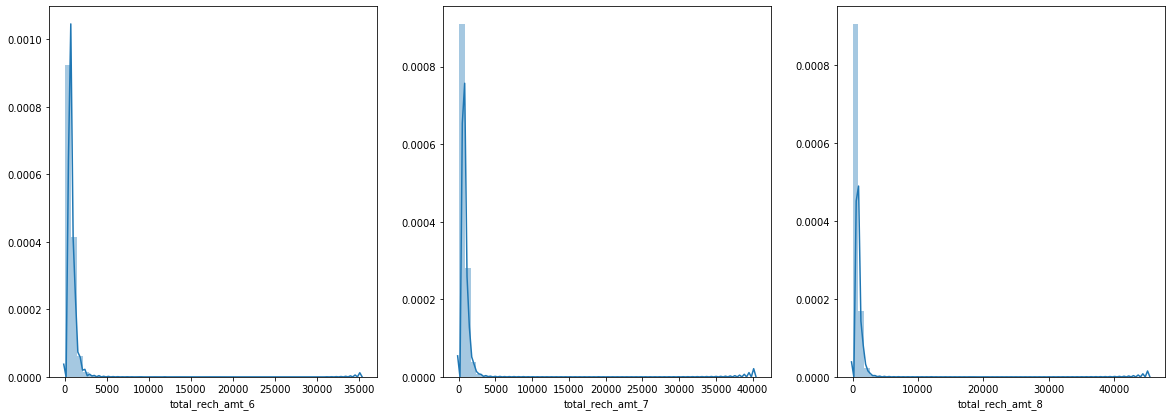

In [95]:
# Total Recharge amount
feature_col = df.filter(regex ='total_rech_amt').columns
avg_mon_plot(df,feature_col,name = "total_rech_amt")
plot_Churn_wise(df,feature_col,name = "total_rech_amt")
feature = "total_rech_amt"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Total Recharge amount increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that Total Recharge amount decreasing trend for Churn and non-Churn customer also decreased but not much
- Total Recharge amount have same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment


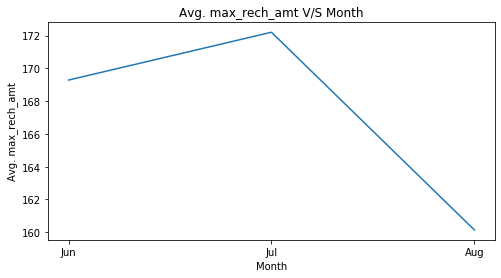

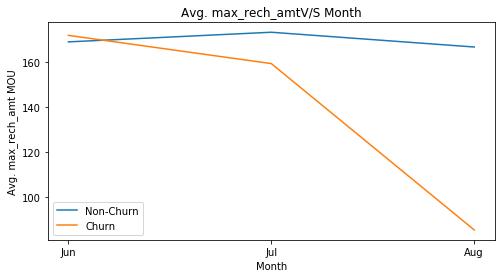

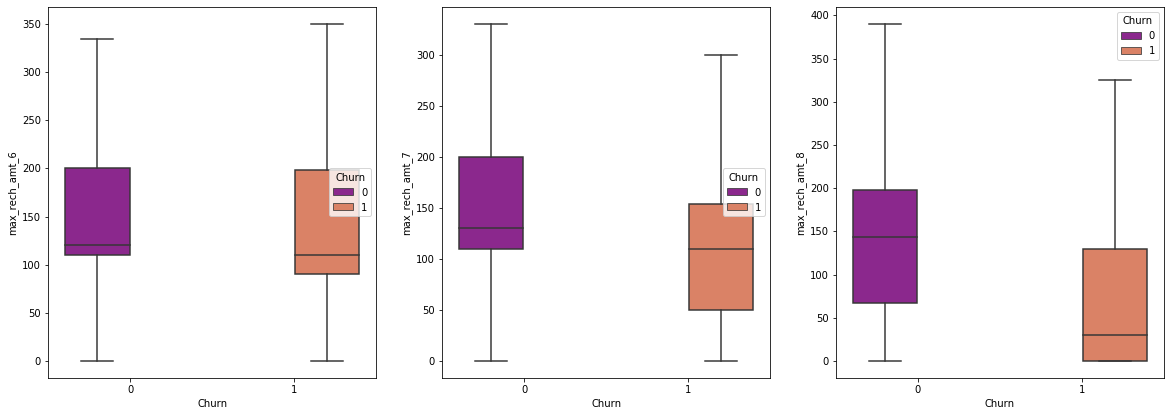

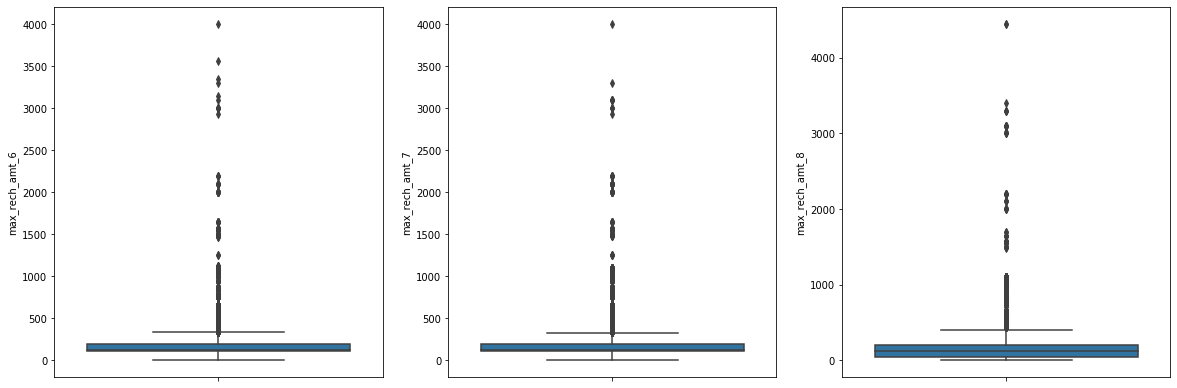

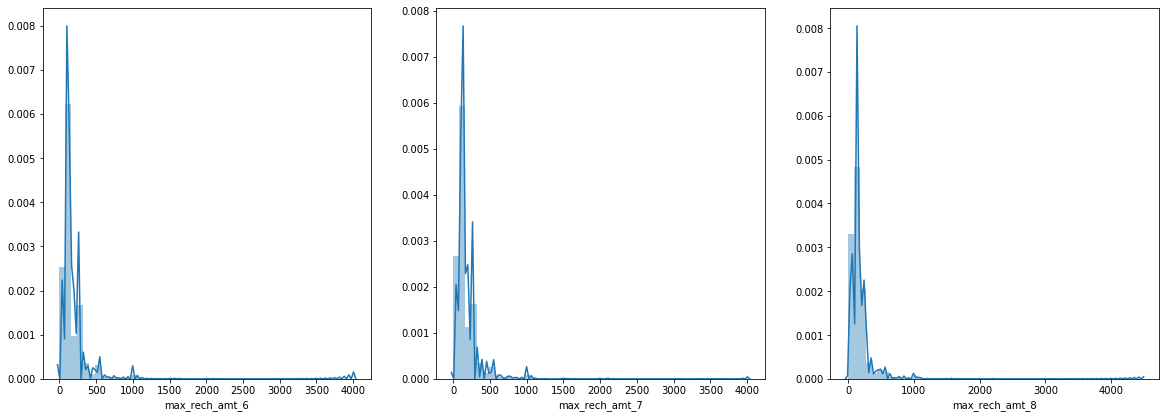

In [96]:
# Maximum recharge amount
feature_col = df.filter(regex ='max_rech_amt').columns
avg_mon_plot(df,feature_col,name = "max_rech_amt")
plot_Churn_wise(df,feature_col,name = "max_rech_amt")
feature = "max_rech_amt"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Maximum recharge amount increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that Maximum recharge amount decreasing trend for Churn and non-Churn customer also decreased but not much
- Maximum recharge amount have same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

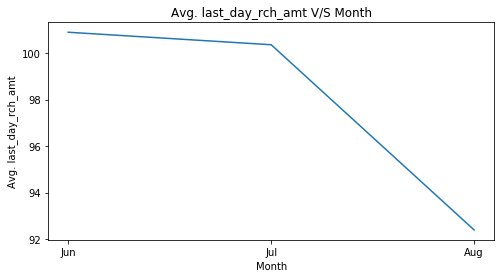

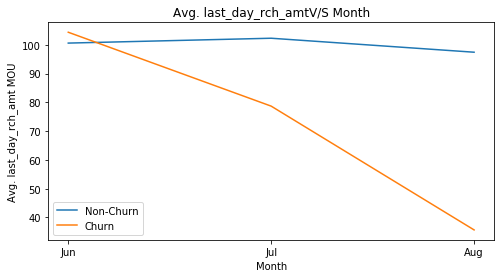

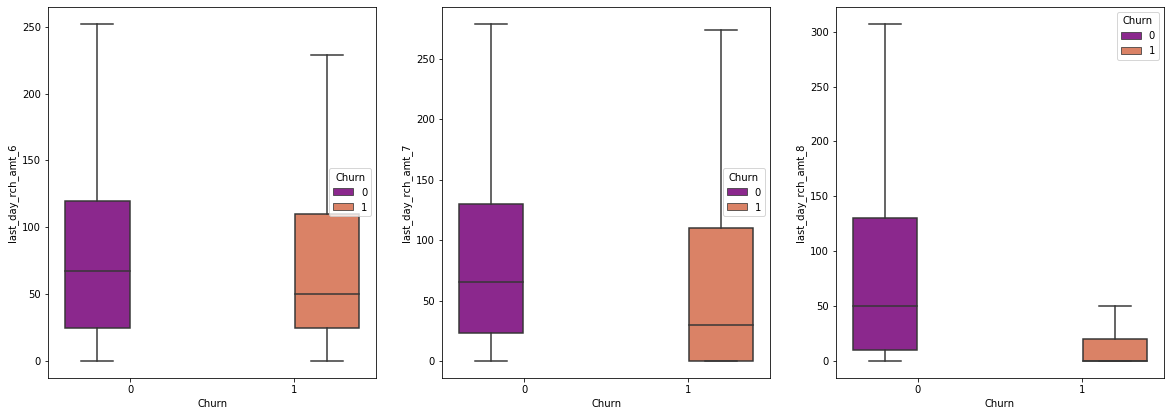

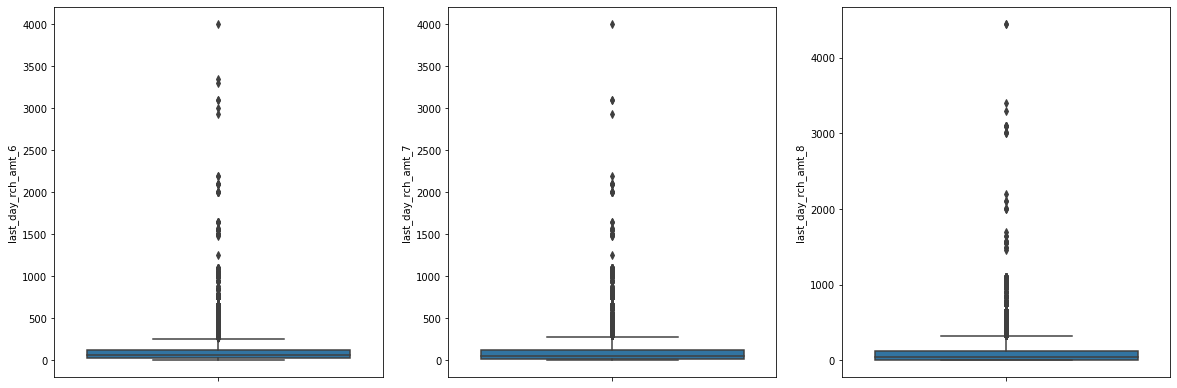

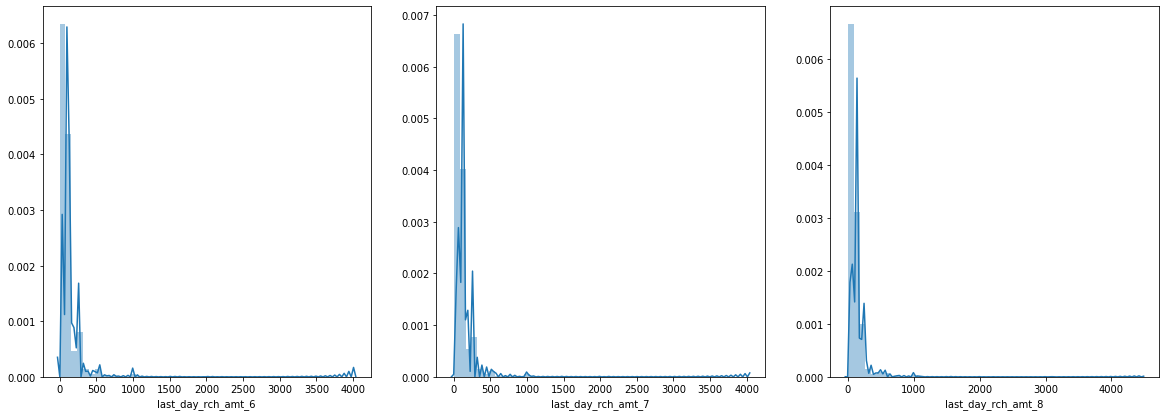

In [97]:
# last day recharge amount
feature_col = df.filter(regex ='last_day_rch_amt').columns
avg_mon_plot(df,feature_col,name = "last_day_rch_amt")
plot_Churn_wise(df,feature_col,name = "last_day_rch_amt")
feature = "last_day_rch_amt"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- last day recharge amount increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that last day recharge amount decreasing trend for Churn and non-Churn customer also decreased but not much
- last day recharge amount have same Median for June and July month but for July month median dropped for Churn customer.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

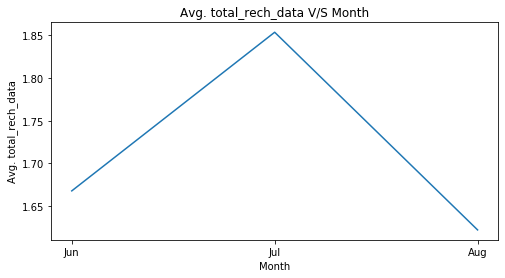

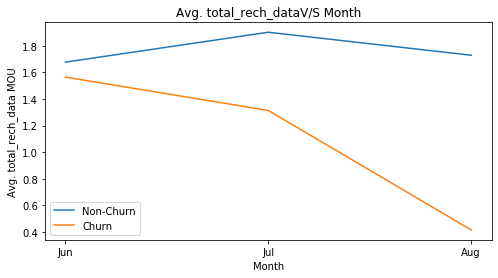

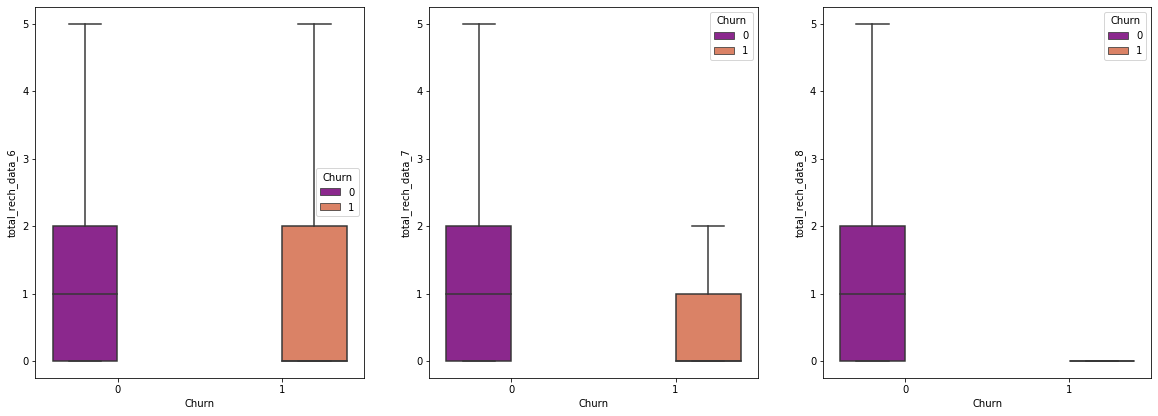

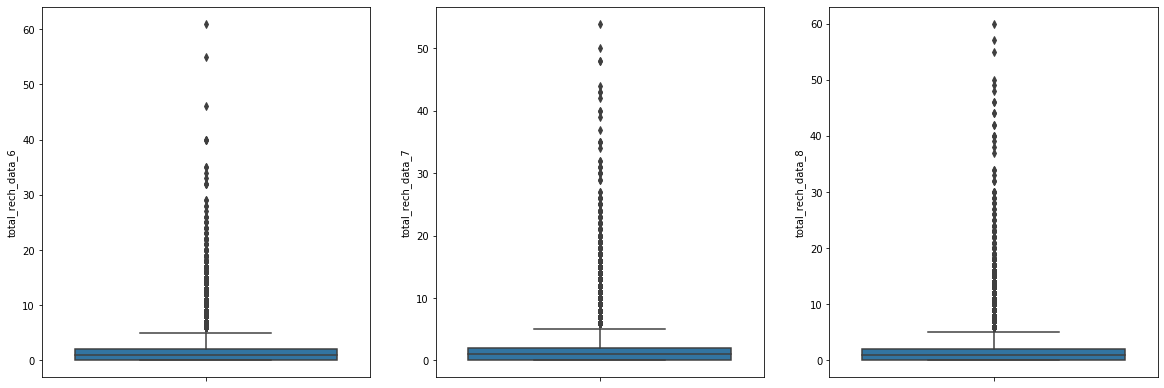

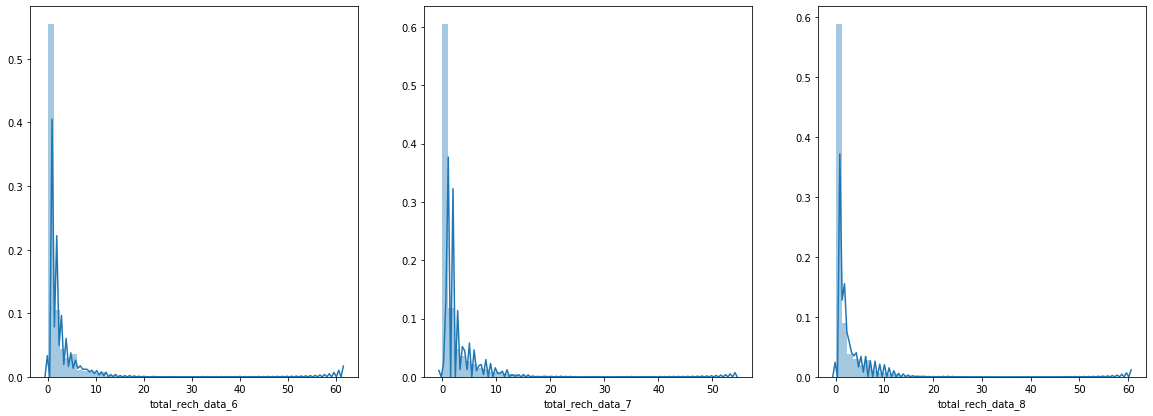

In [98]:
# total recharge data

feature_col = df.filter(regex ='total_rech_data').columns
avg_mon_plot(df,feature_col,name = "total_rech_data")
plot_Churn_wise(df,feature_col,name = "total_rech_data")
feature = "total_rech_data"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Total recharge data increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that total recharge data decreasing trend for Churn and non-Churn customer also decreased but not much
- Total recharge data have zero value in month of July and August for Churn. Seem they did not used data in this 2 months.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

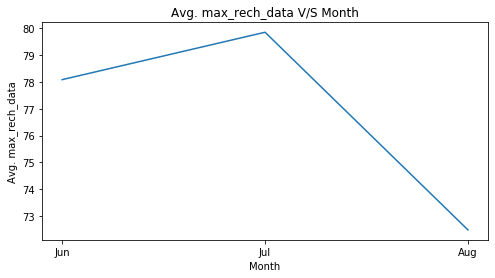

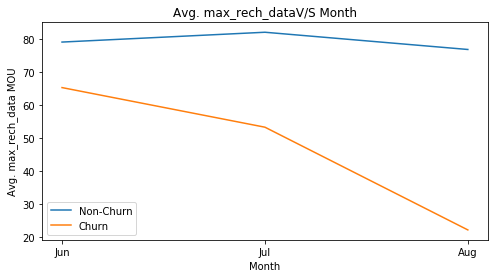

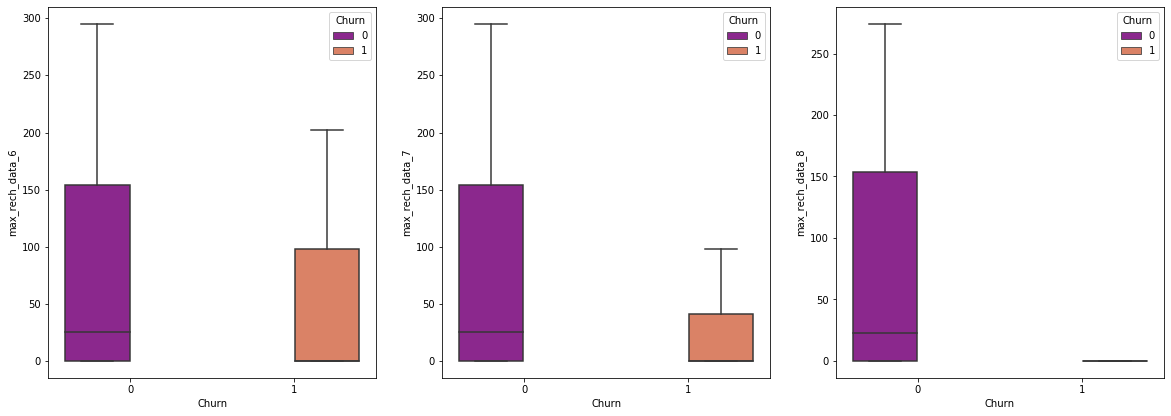

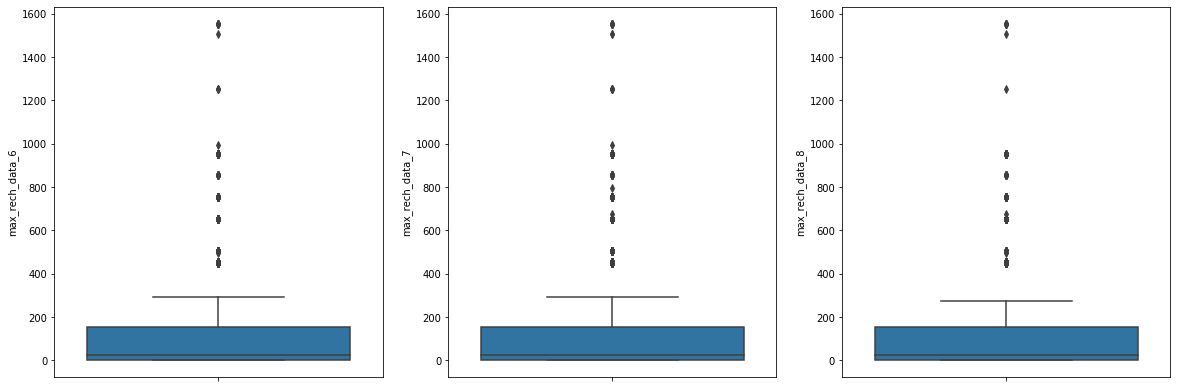

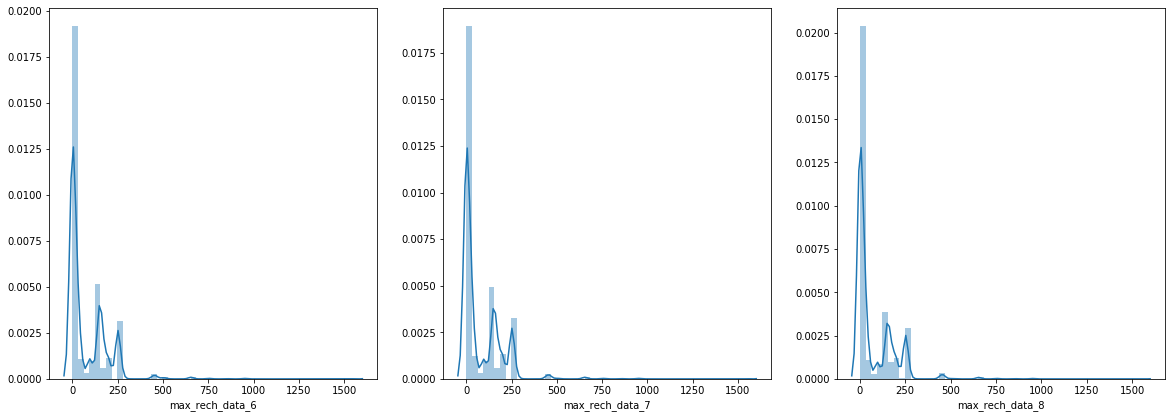

In [99]:
# Maximum recharge data
feature_col = df.filter(regex ='max_rech_data').columns
avg_mon_plot(df,feature_col,name = "max_rech_data")
plot_Churn_wise(df,feature_col,name = "max_rech_data")
feature = "max_rech_data"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Maximum recharge data increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that Maximum recharge data trend for Churn customer and non-Churn customer also decreased but not much
- Maximum recharge data have zero value in month of July and August for Churn. Seem they did not used recharged in this 2 months.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

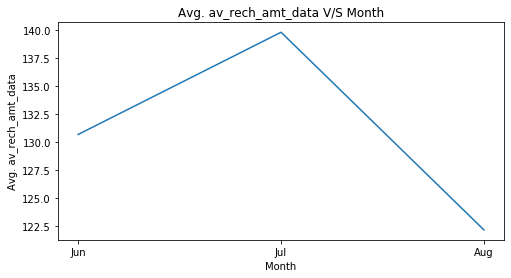

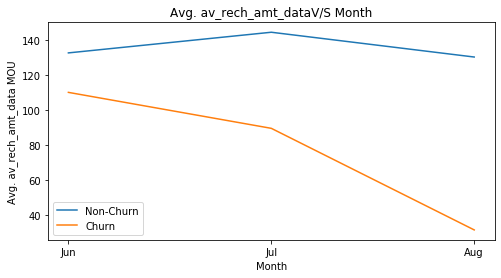

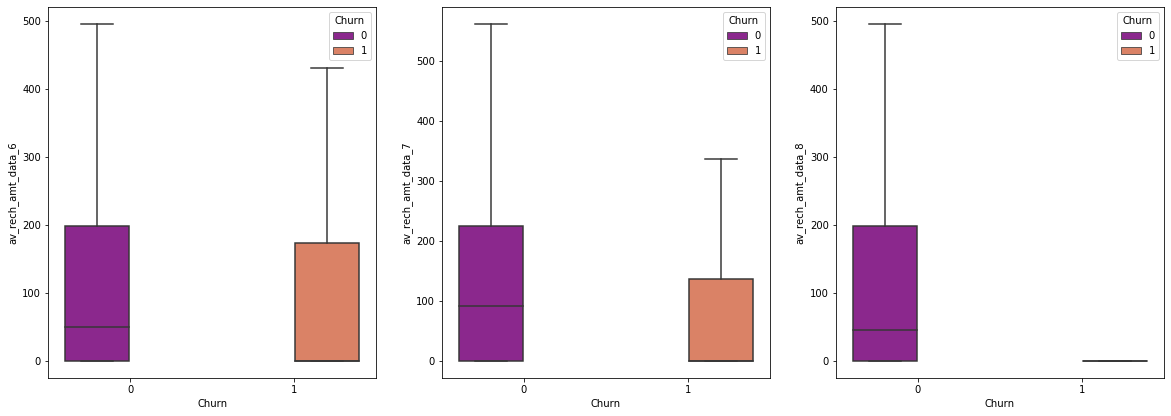

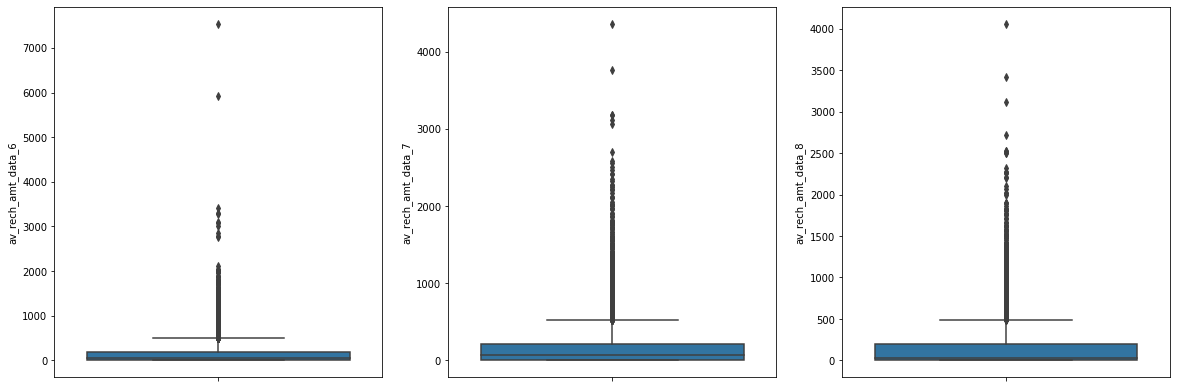

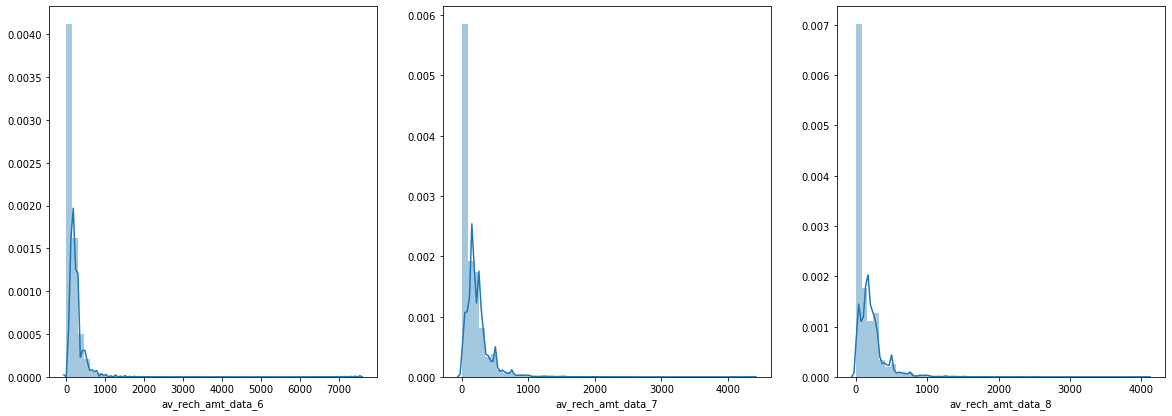

In [100]:
# average recharge amount data
feature_col = df.filter(regex ='av_rech_amt_data').columns
avg_mon_plot(df,feature_col,name = "av_rech_amt_data")
plot_Churn_wise(df,feature_col,name = "av_rech_amt_data")
feature = "av_rech_amt_data"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Average recharge amount data increased in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that Average recharge amount data trend for Churn customer and non-Churn customer also decreased but not much
- Average recharge amount data have zero value in month of July and August for Churn. Seem they did not used recharged data in this 2 months.
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

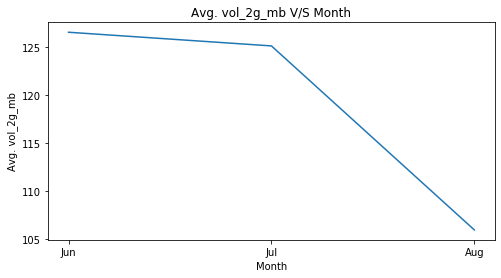

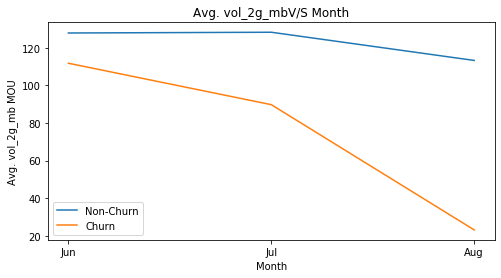

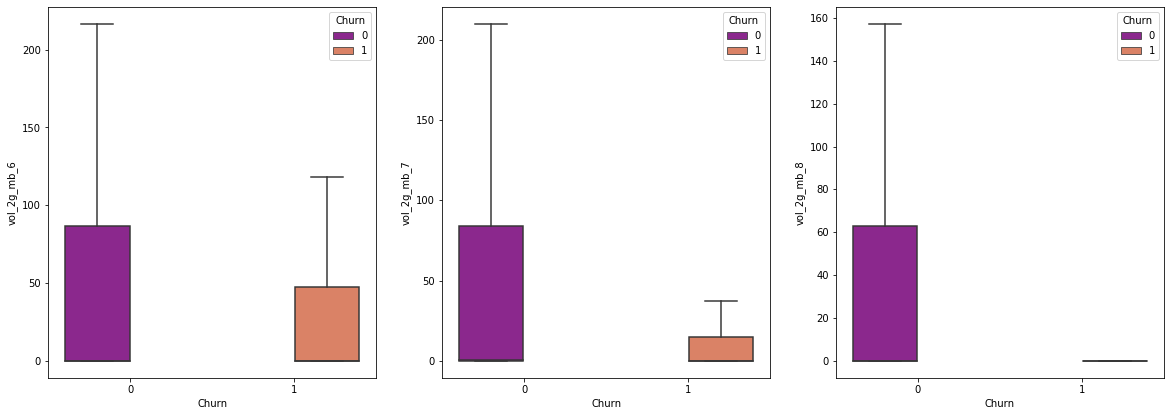

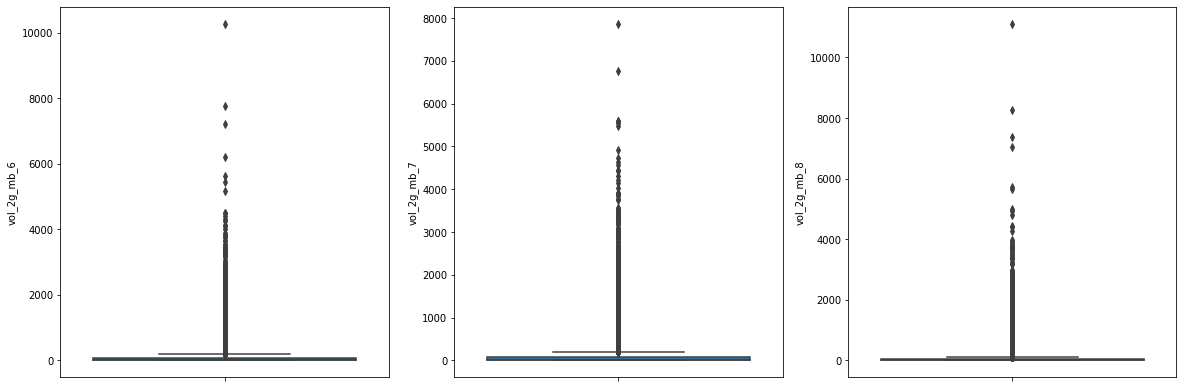

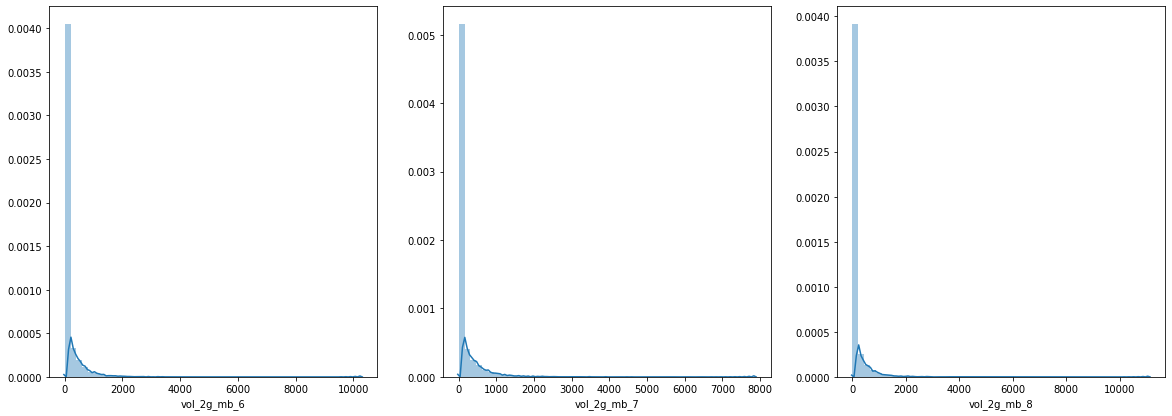

In [101]:
# VOL : Mobile internet usage volume (in MB)

feature_col = df.filter(regex ='vol_2g_mb').columns
avg_mon_plot(df,feature_col,name = "vol_2g_mb")
plot_Churn_wise(df,feature_col,name = "vol_2g_mb")
feature = "vol_2g_mb"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Mobile internet usage volume increased in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that Average recharge amount data trend for Churn customer and non-Churn customer also decreased but not much
- Average recharge amount data have zero value in month of July and August for Churn. Seem they did not used recharged data in this 2 months.
- We can see the data as constant over all period so no use of this column to use in model
- Also, data is skewed to Right side so will see after outlier treatment

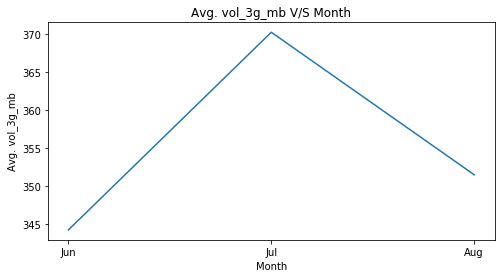

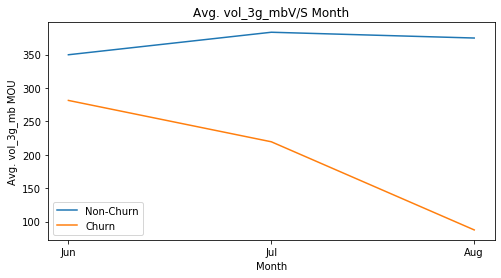

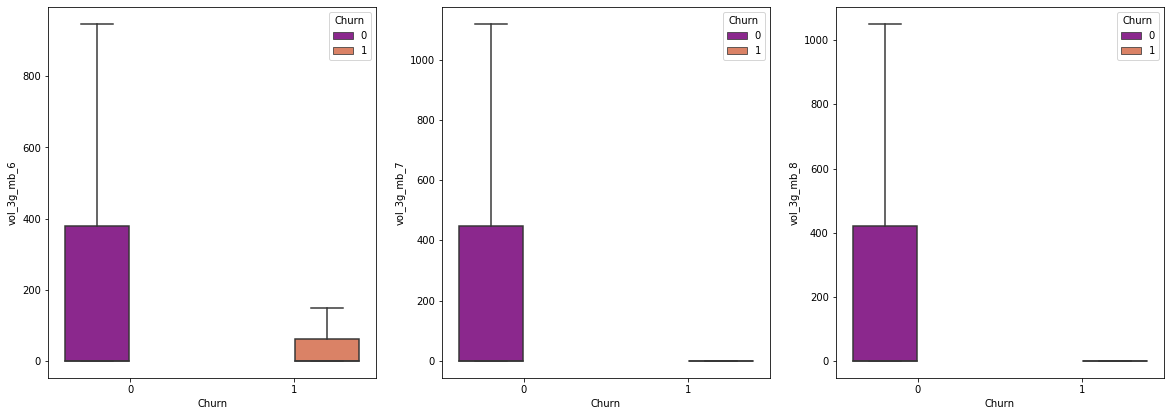

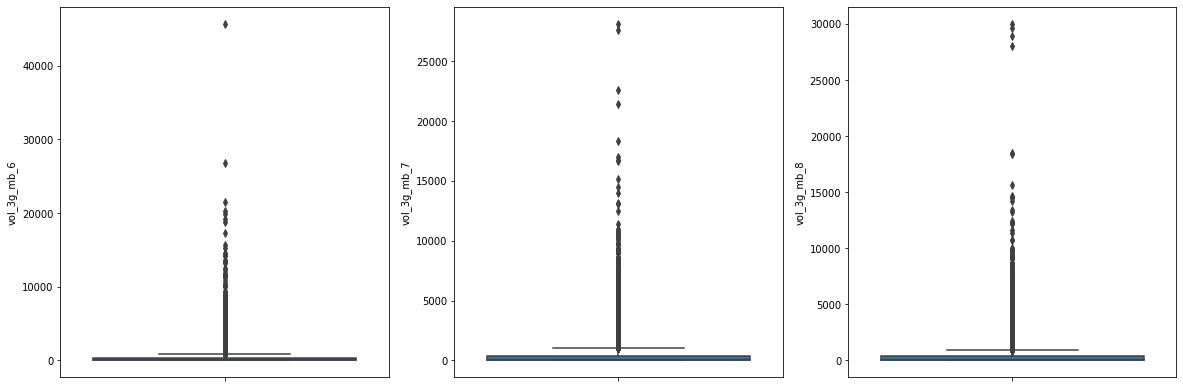

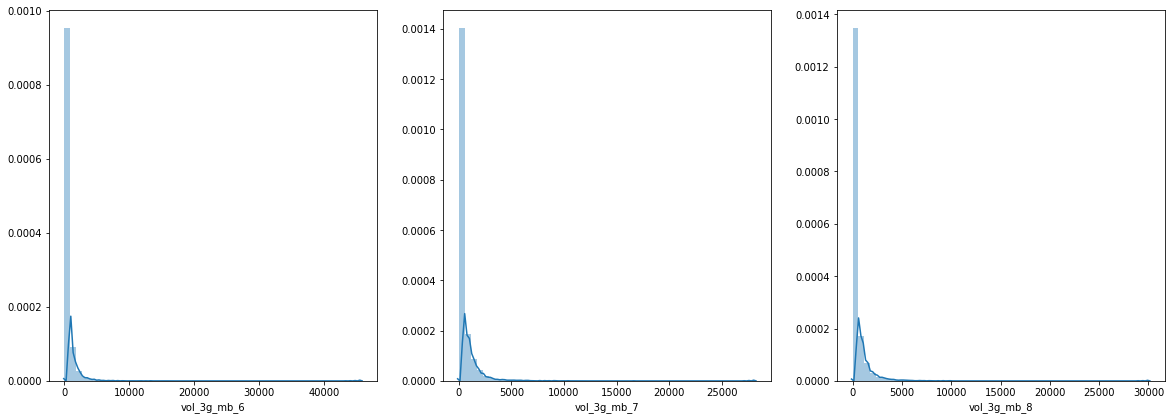

In [102]:
# Mobile internet usage volume -3G
feature_col = df.filter(regex ='vol_3g_mb').columns
avg_mon_plot(df,feature_col,name = "vol_3g_mb")
plot_Churn_wise(df,feature_col,name = "vol_3g_mb")
feature = "vol_3g_mb"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Mobile internet usage volume -3G increased in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that Average recharge amount data trend for Churn customer and non-Churn customer also decreased but not much
- Average recharge amount data have zero value in in all monthfor Churn. As we have remove the outliers from the data.
- We can see the data as constant over all period so no use of this column to use in model
- Also, data is skewed to Right side so will see after outlier treatment


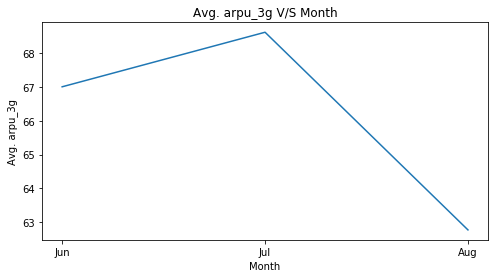

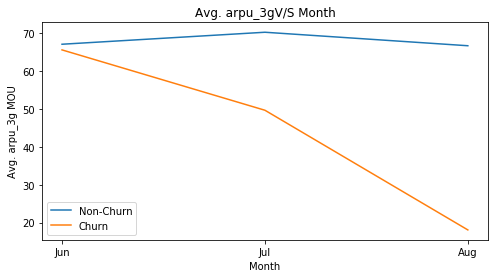

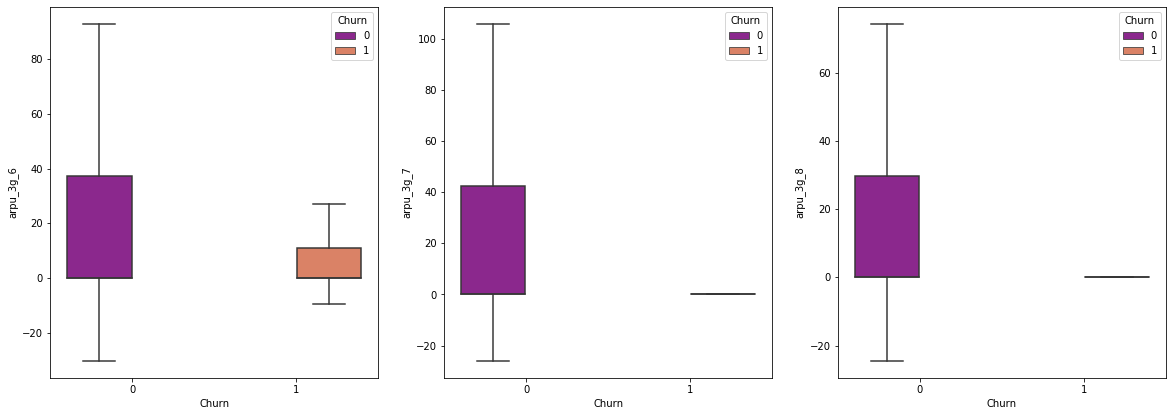

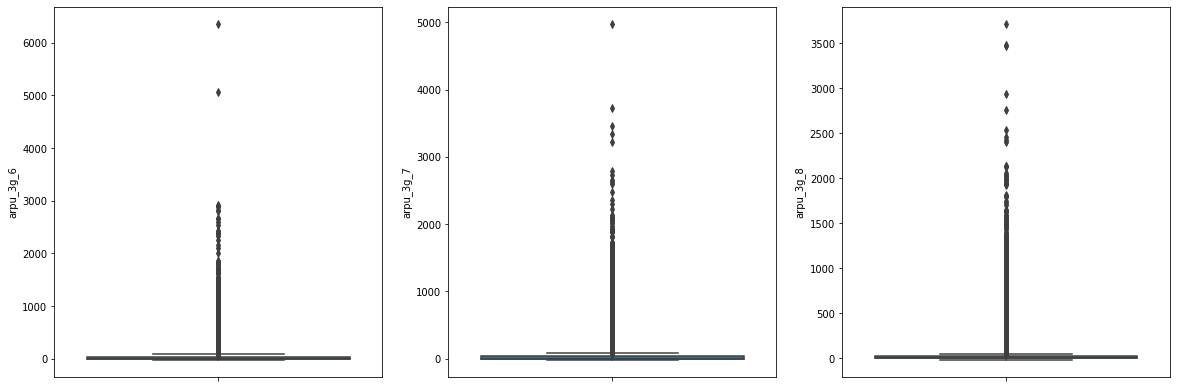

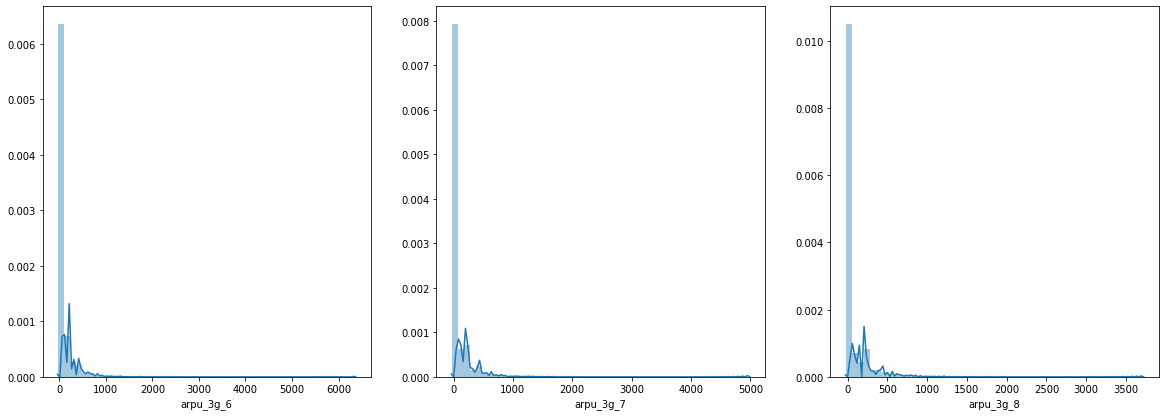

In [103]:
# Average revenue per user - 3G
feature_col = df.filter(regex ='arpu_3g').columns
avg_mon_plot(df,feature_col,name = "arpu_3g")
plot_Churn_wise(df,feature_col,name = "arpu_3g")
feature = "arpu_3g"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Average revenue per user - 3G increased in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that Average recharge amount data trend for Churn customer and non-Churn customer also decreased but not much
- As we have remove the outliers from the data. Average recharge amount data have zero value in in all month for Churn. 
- We can see the data as constant over all period so no use of this column to use in model
- Also, data is skewed to Right side so will see after outlier treatment


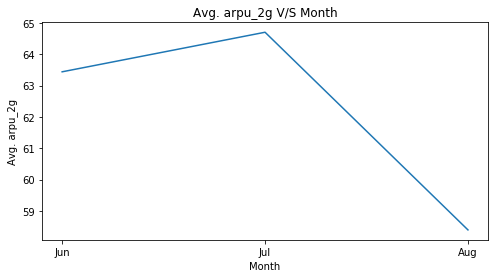

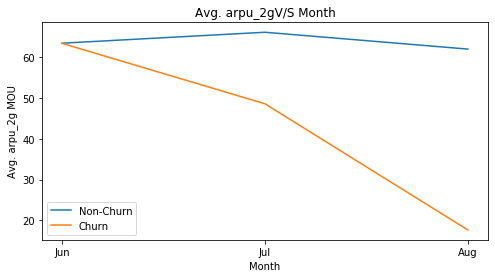

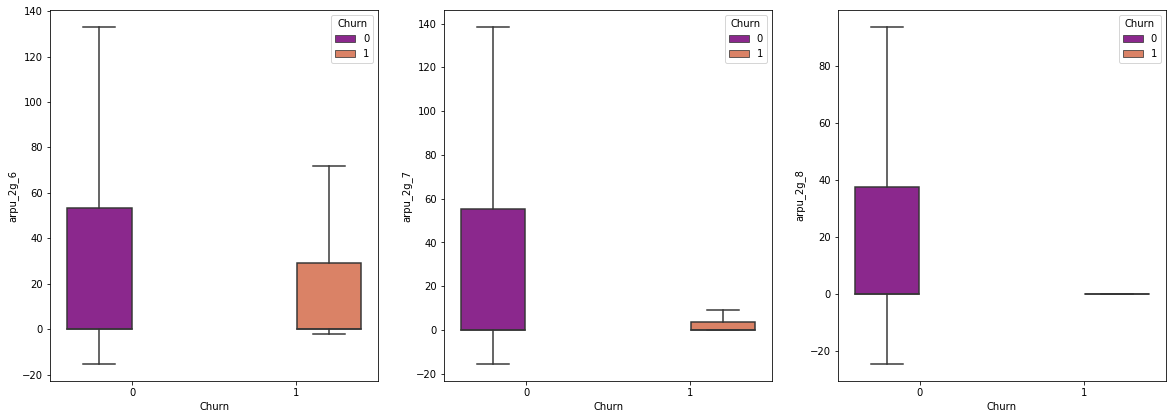

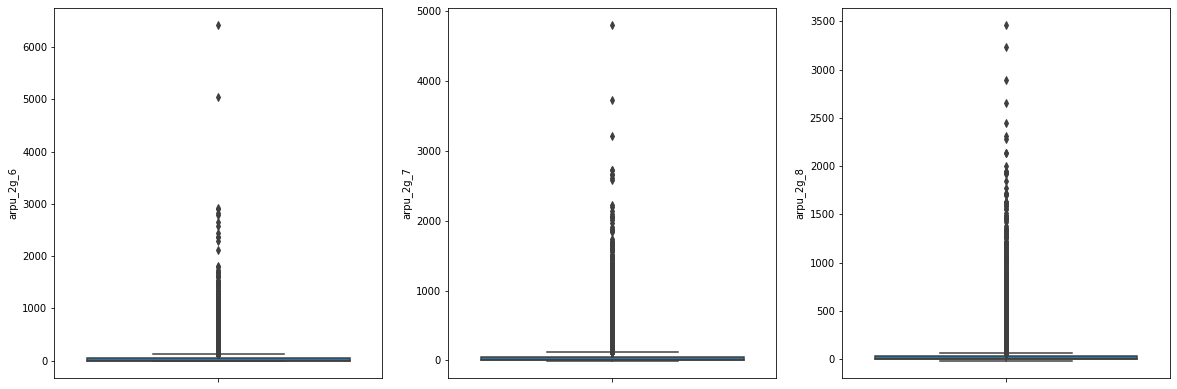

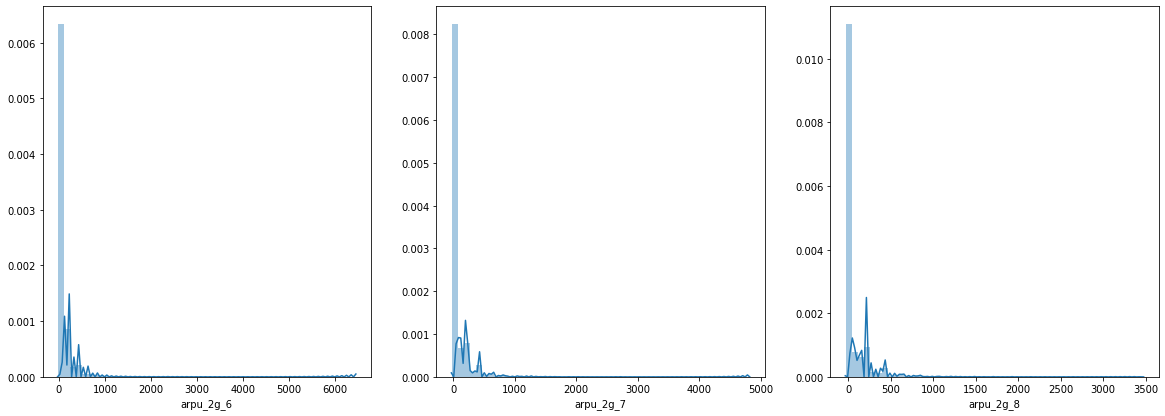

In [104]:
# Average revenue per user - 2G
feature_col = df.filter(regex ='arpu_2g').columns
avg_mon_plot(df,feature_col,name = "arpu_2g")
plot_Churn_wise(df,feature_col,name = "arpu_2g")
feature = "arpu_2g"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Average revenue per user - 2G increased in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that Average recharge amount data trend for Churn customer and non-Churn customer also decreased but not much
- As we have remove the outliers from the data. Average recharge amount data have zero value in in all month for Churn. 
- We can see the data as constant over all period so no use of this column to use in model
- Also, data is skewed to Right side so will see after outlier treatment

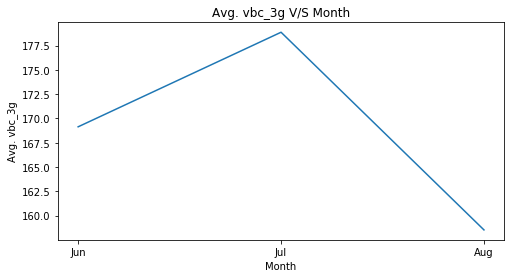

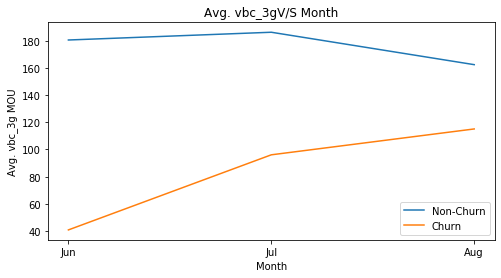

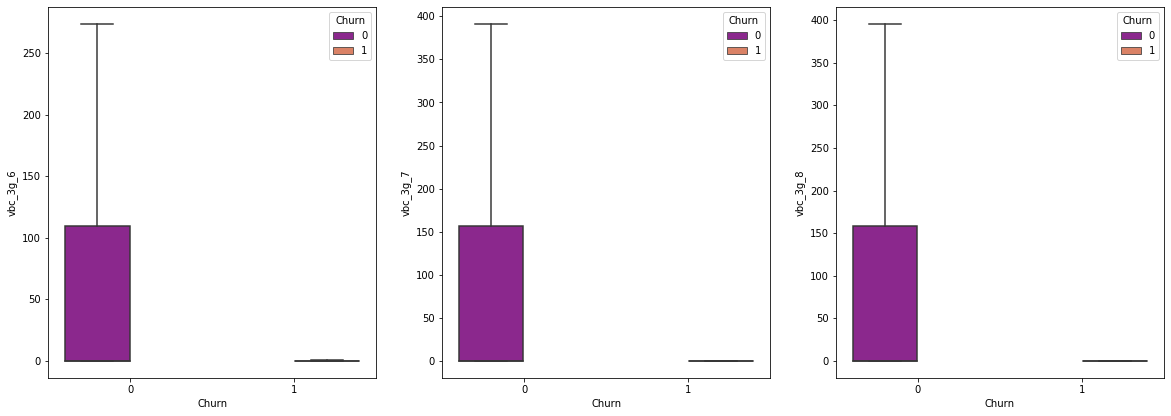

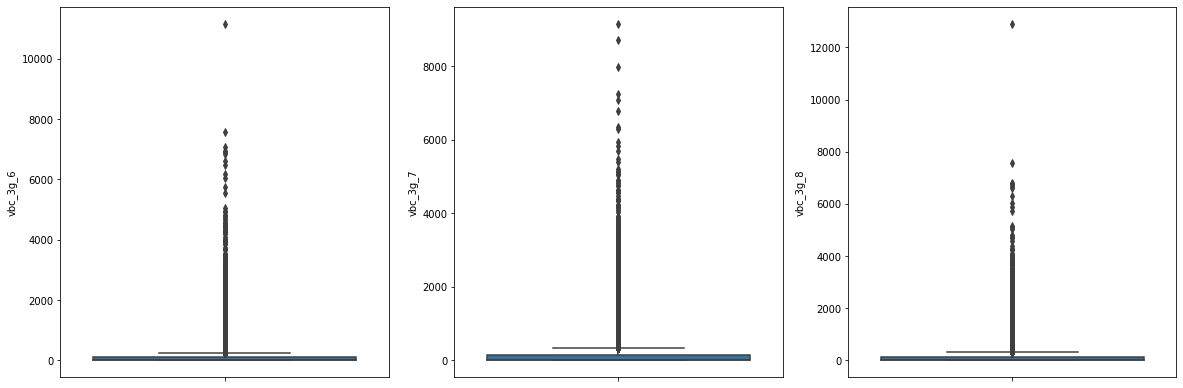

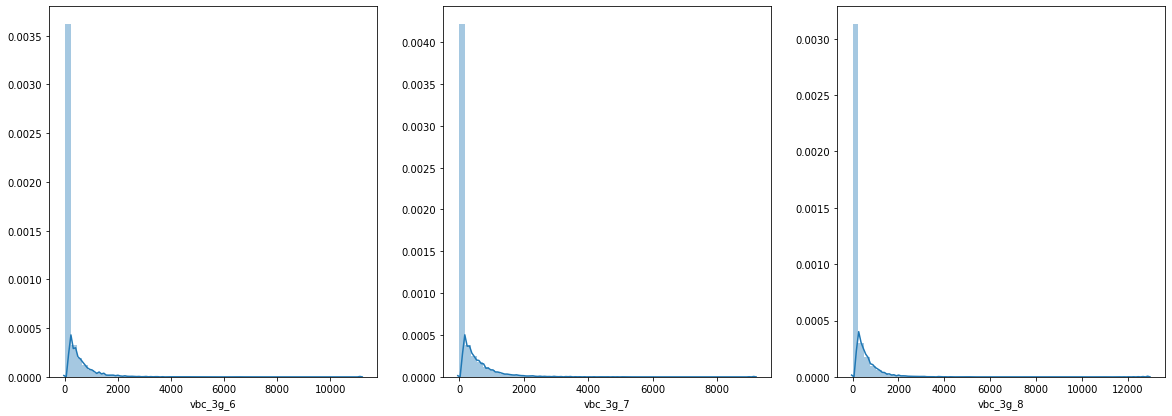

In [105]:
# Volume based cost 3G - when no specific scheme is not purchased and paid as per usage
feature_col = df.filter(regex ='vbc_3g').columns
avg_mon_plot(df,feature_col,name = "vbc_3g")
plot_Churn_wise(df,feature_col,name = "vbc_3g")
feature = "vbc_3g"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- Volume based cost 3G increased in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that Average recharge amount data trend for Churn customer decreased but not much and non-Churn customer also increased.
- As we have remove the outliers from the data. Average recharge amount data have zero value in all month for Churn. 
- We can see the data as constant over all period
- Also, data is skewed to Right side so will see after outlier treatment.


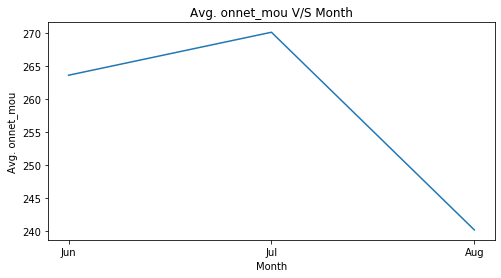

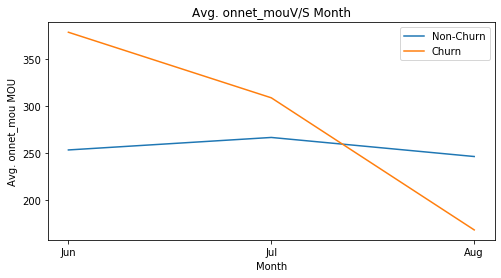

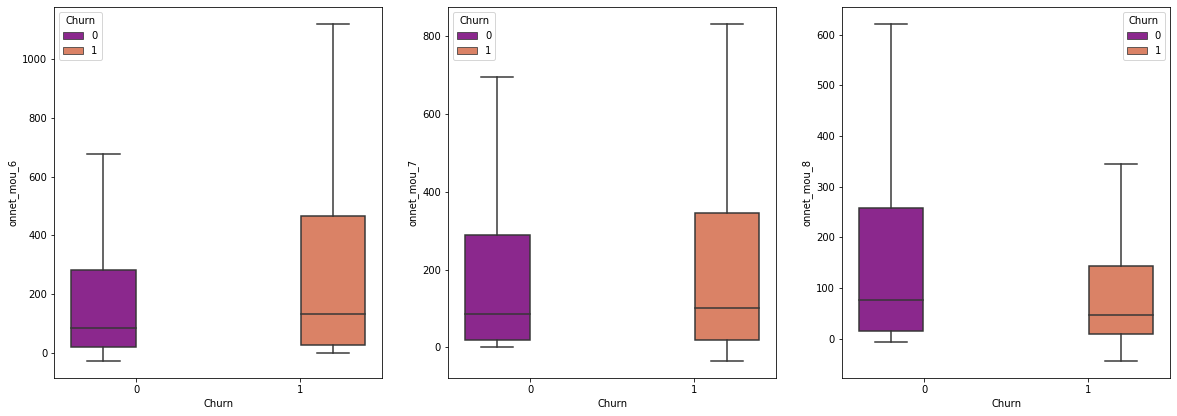

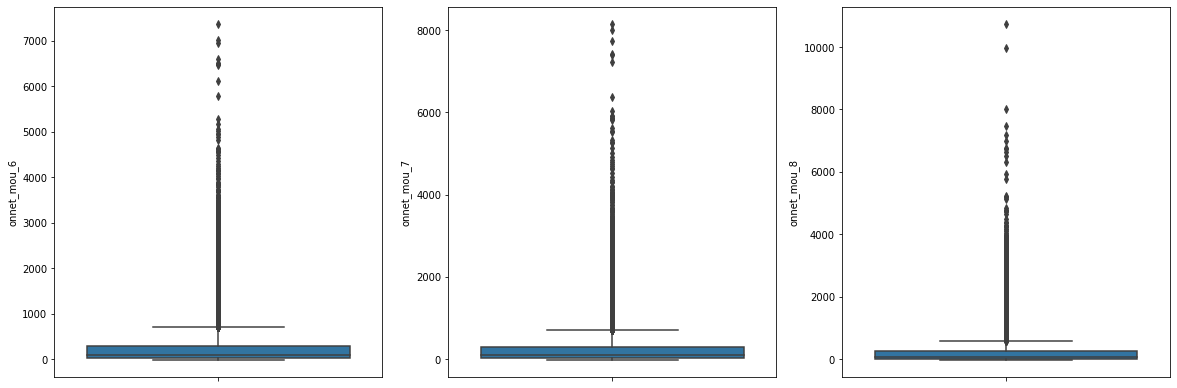

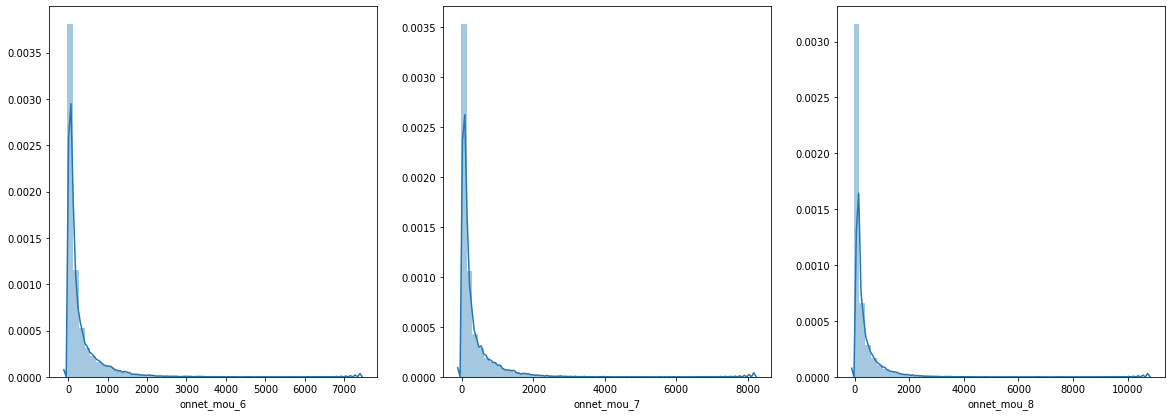

In [106]:
# All kind of calls within the same operator network
feature_col = df.filter(regex ='onnet_mou').columns
avg_mon_plot(df,feature_col,name = "onnet_mou")
plot_Churn_wise(df,feature_col,name = "onnet_mou")
feature = "onnet_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- Onnet_mou is increasing in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that onnet_mou for Churn customer is decreased but for non-Churn is seem constant.
- As we have remove the outliers from the data.onnet_mou has same Median for June and July month but for July month median dropped for Churn customer.
- Also, data is skewed to Right side so will see after outlier treatment

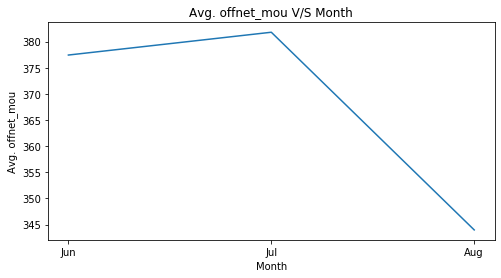

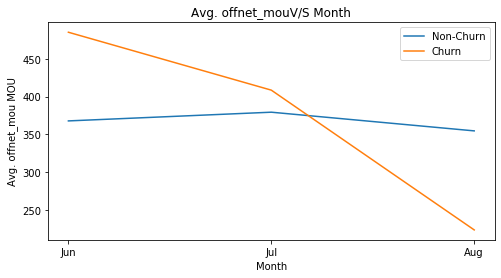

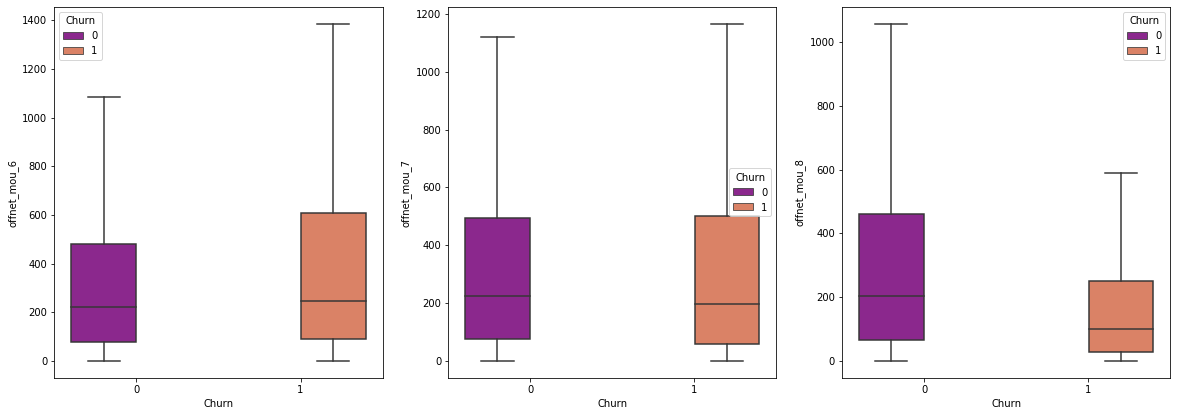

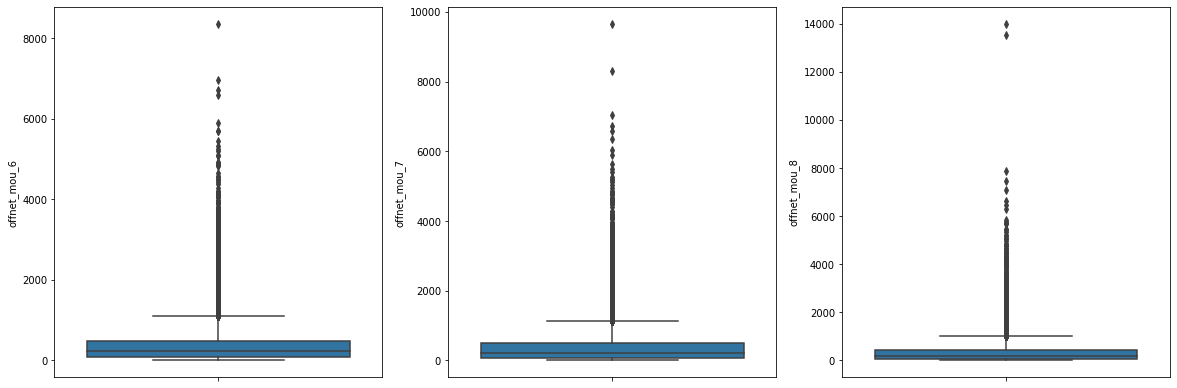

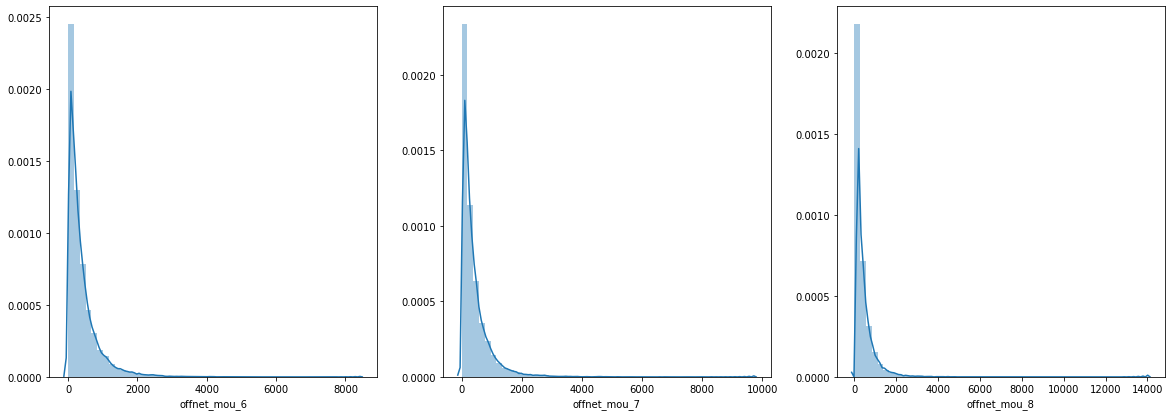

In [107]:
#offnet_mou
feature_col = df.filter(regex ='offnet_mou').columns
avg_mon_plot(df,feature_col,name = "offnet_mou")
plot_Churn_wise(df,feature_col,name = "offnet_mou")
feature = "offnet_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- offnet_mou is increasing in month of June and July. in August its dropped in HIGH ratio.
- When we classfy using Churn then see that offnet_mou for Churn customer is decreased but for non-Churn is seem constant.
- As we have remove the outliers from the data.offnet_mou has same Median for June and July month but for July month median dropped for Churn customer.
- Also, data is skewed to Right side so will see after outlier treatment


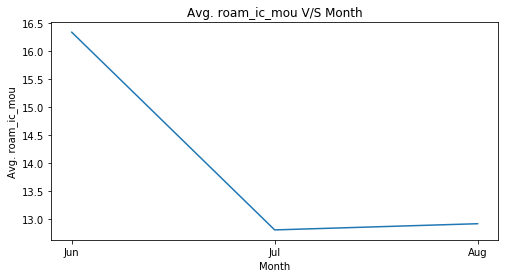

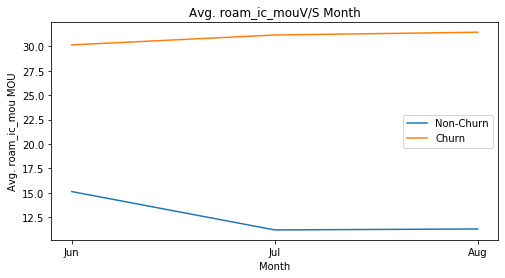

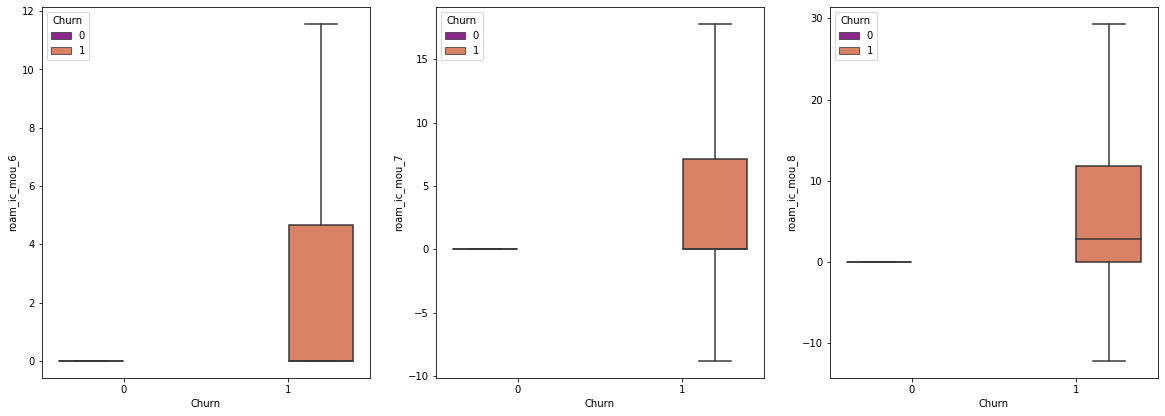

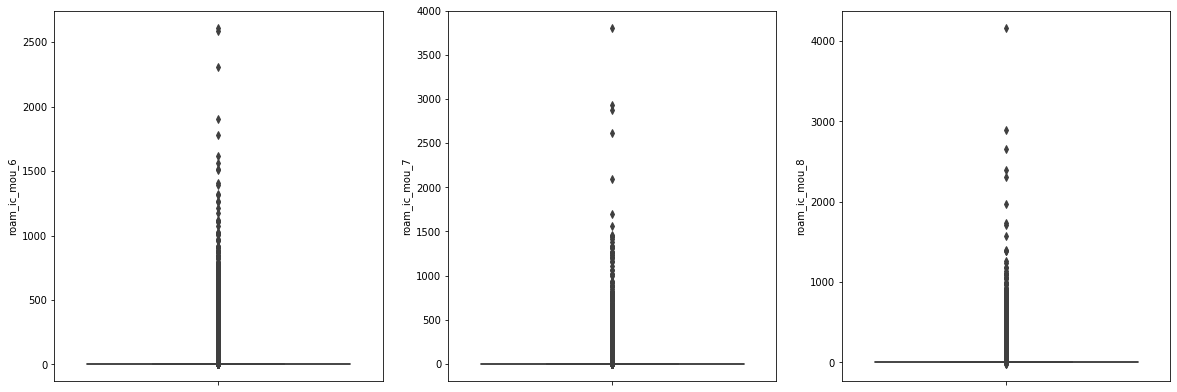

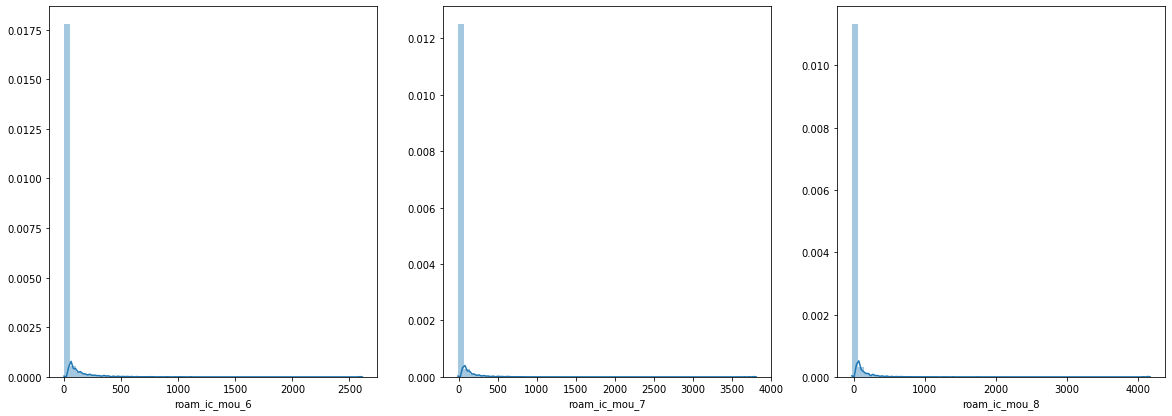

In [108]:
#roam_ic_mou
feature_col = df.filter(regex ='roam_ic_mou').columns
avg_mon_plot(df,feature_col,name = "roam_ic_mou")
plot_Churn_wise(df,feature_col,name = "roam_ic_mou")
feature = "roam_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- roam_ic_mou is decreasing in month of July. in August its bit increasedin.
- When we classfy using Churn then see that roam_ic_mou for Churn customer is constant but for non-Churn is seem d in month of July and then increased bit in August.
- As we have remove the outliers from the data. roam_ic_mou has zero median for June,July and August month bfor Churn customer.
- Also, data is skewed to Right side so will see after outlier treatment

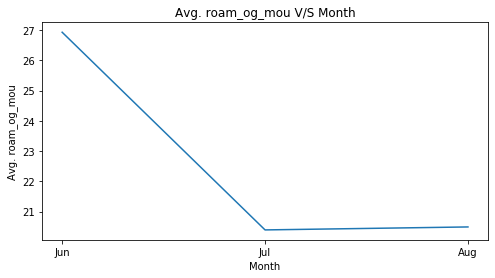

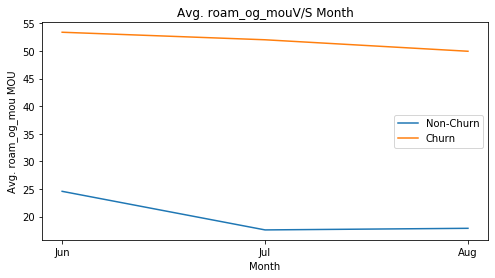

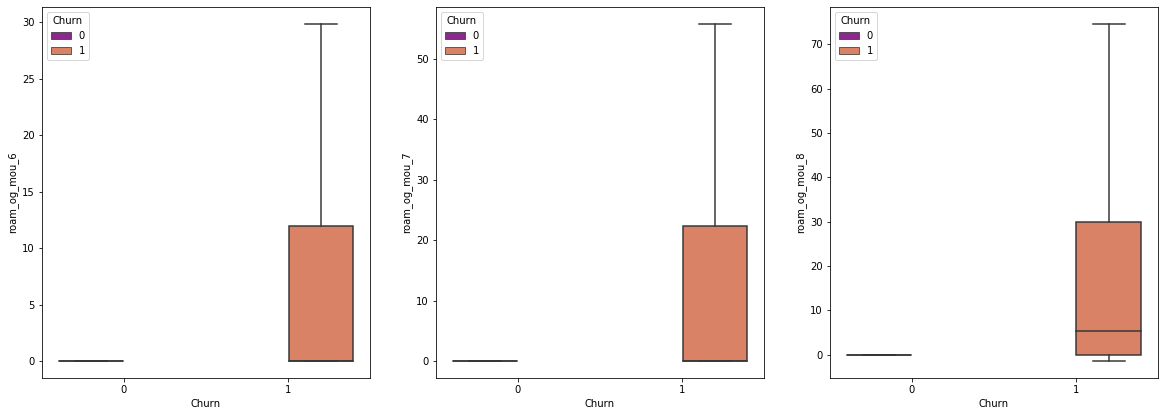

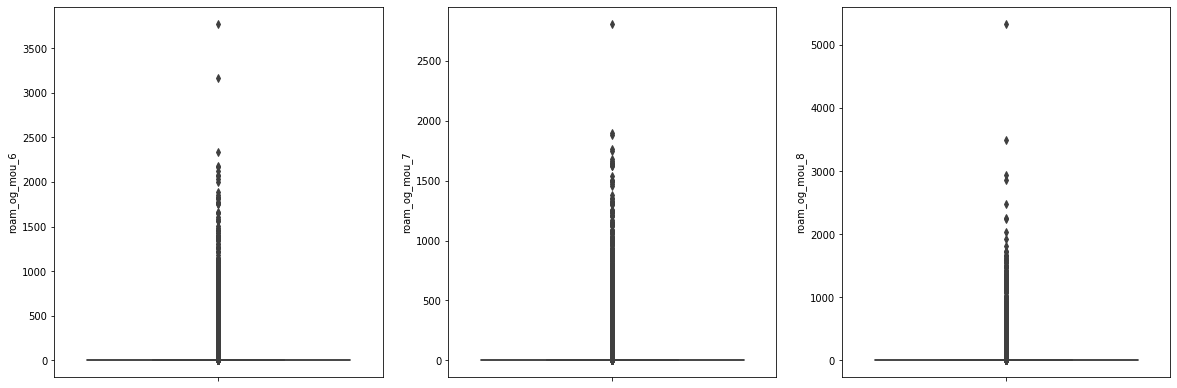

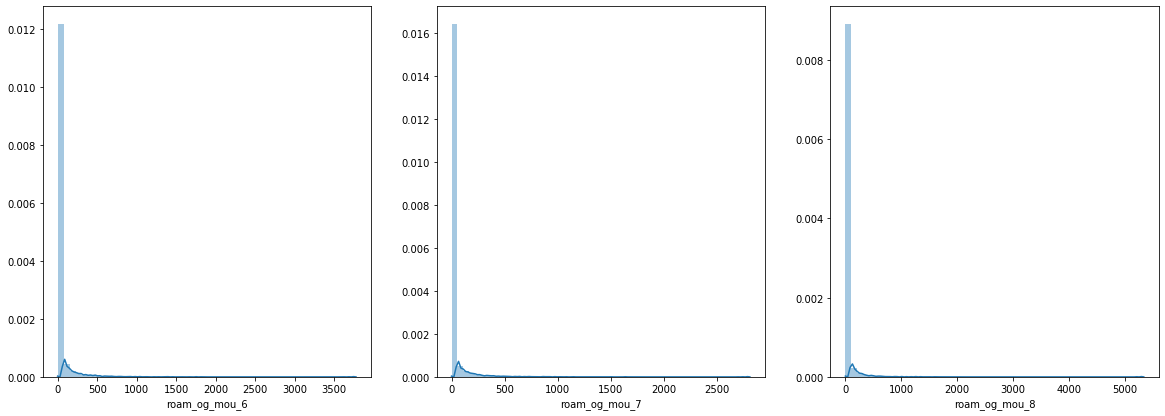

In [109]:
#roam_og_mou
feature_col = df.filter(regex ='roam_og_mou').columns
avg_mon_plot(df,feature_col,name = "roam_og_mou")
plot_Churn_wise(df,feature_col,name = "roam_og_mou")
feature = "roam_og_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- roam_og_mou is decreasing in month of July. in August its bit increasedin.
- When we classfy using Churn then see that roam_og_mou for Churn customer is constant but for non-Churn is seem d in month of July and then increased bit in August.
- As we have remove the outliers from the data. roam_og_mou has zero median for June,July and August month bfor Churn customer.
- Also, data is skewed to Right side so will see after outlier treatment

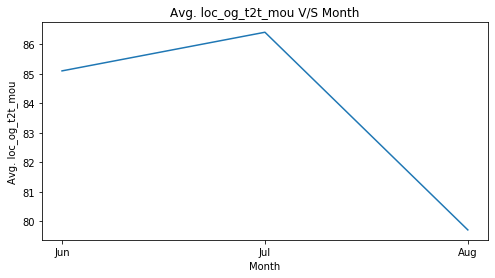

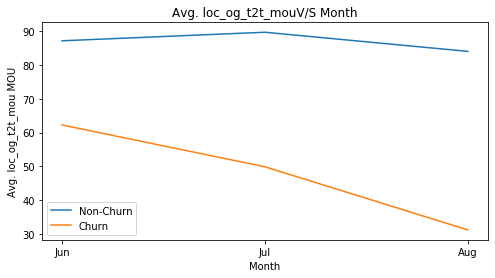

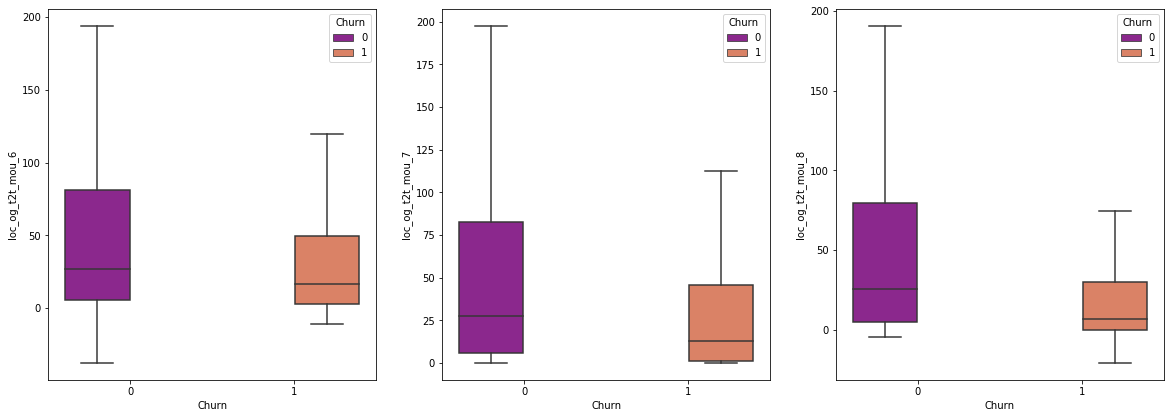

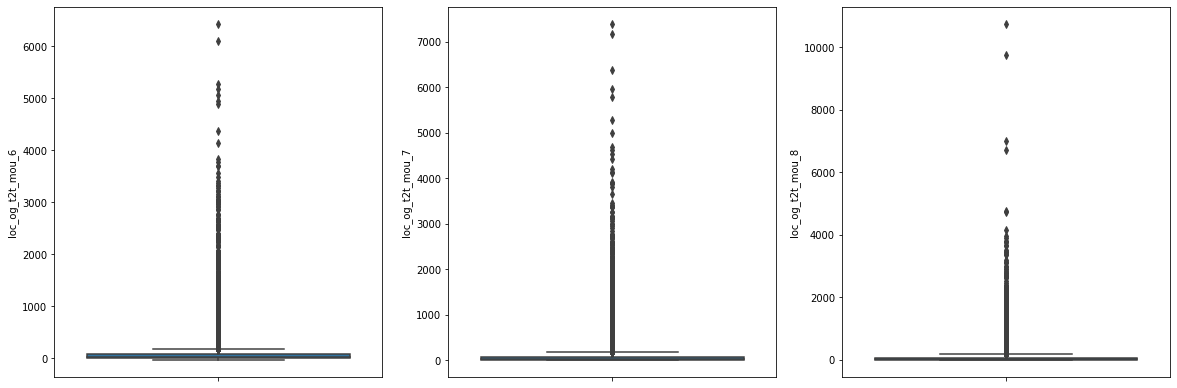

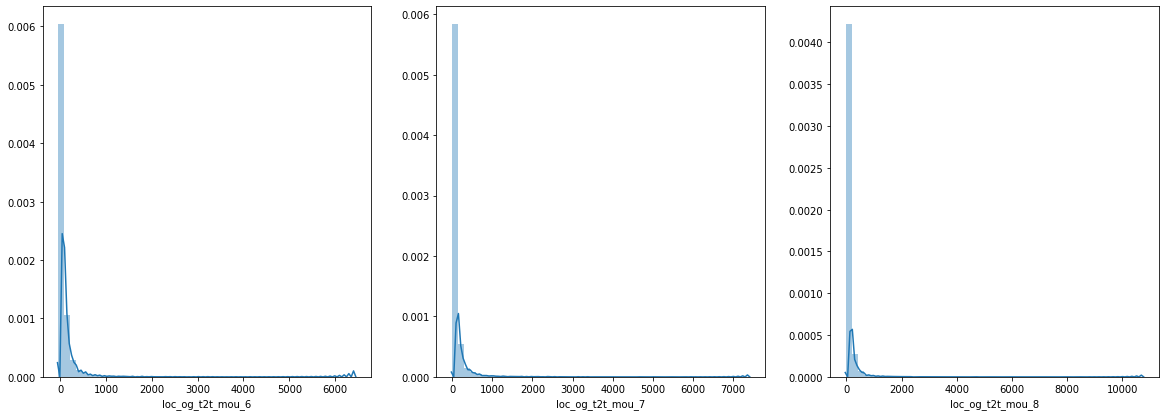

In [110]:
#loc_og_t2t_mou
feature_col = df.filter(regex ='loc_og_t2t_mou').columns
avg_mon_plot(df,feature_col,name = "loc_og_t2t_mou")
plot_Churn_wise(df,feature_col,name = "loc_og_t2t_mou")
feature = "loc_og_t2t_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_og_t2t_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that loc_og_t2t_mou decreasing trend for Churn and non-Churn customer also decreased constantly
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

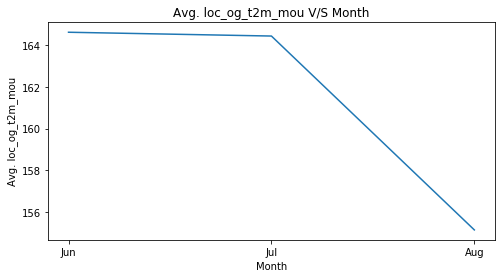

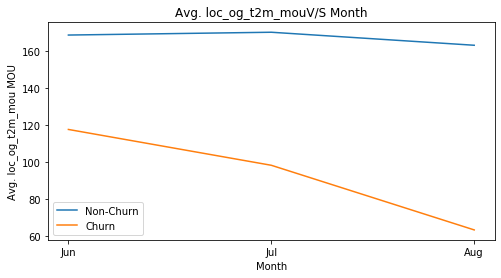

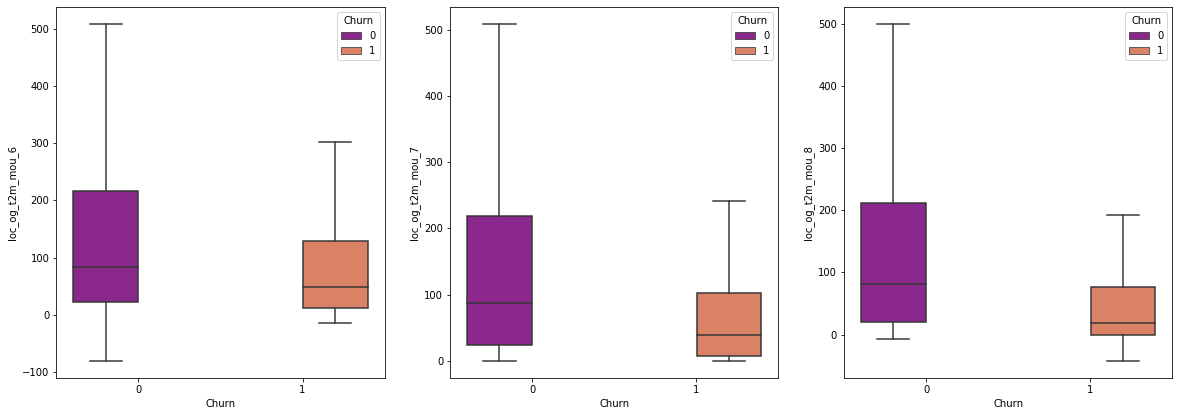

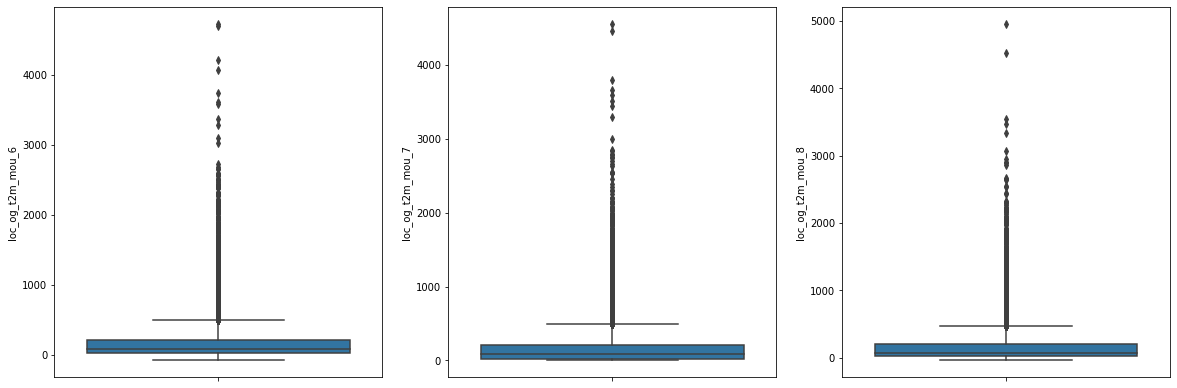

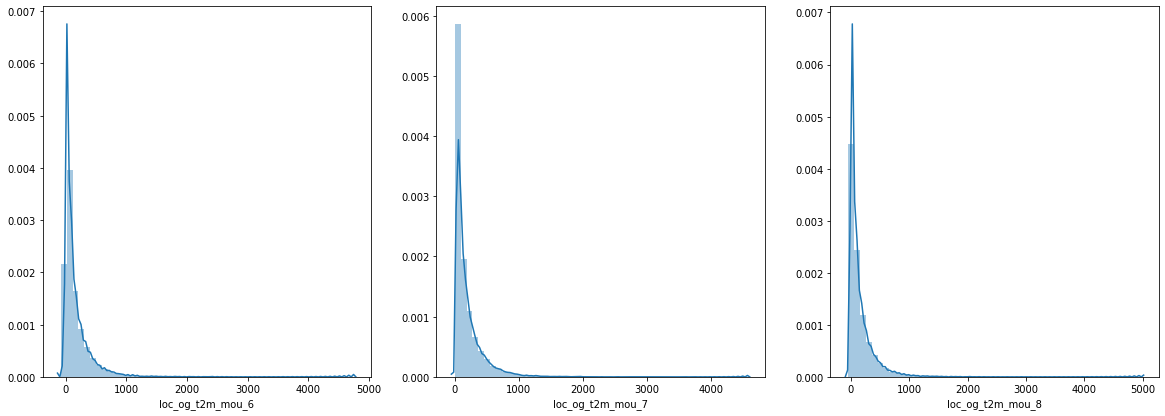

In [111]:
#loc_og_t2m_mou
feature_col = df.filter(regex ='loc_og_t2m_mou').columns
avg_mon_plot(df,feature_col,name = "loc_og_t2m_mou")
plot_Churn_wise(df,feature_col,name = "loc_og_t2m_mou")
feature = "loc_og_t2m_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_og_t2m_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that loc_og_t2m_mou decreasing trend for Churn and non-Churn customer also decreased constantly
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment


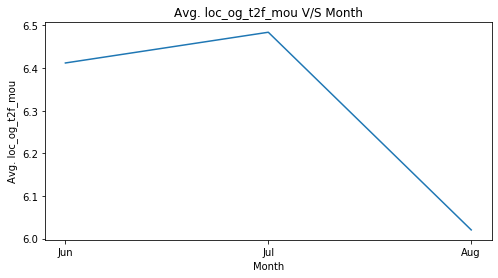

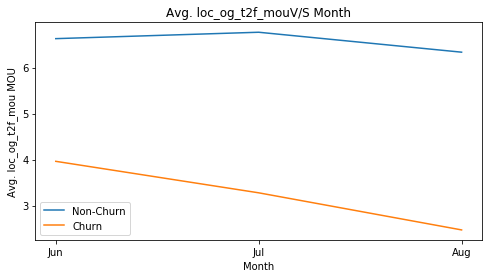

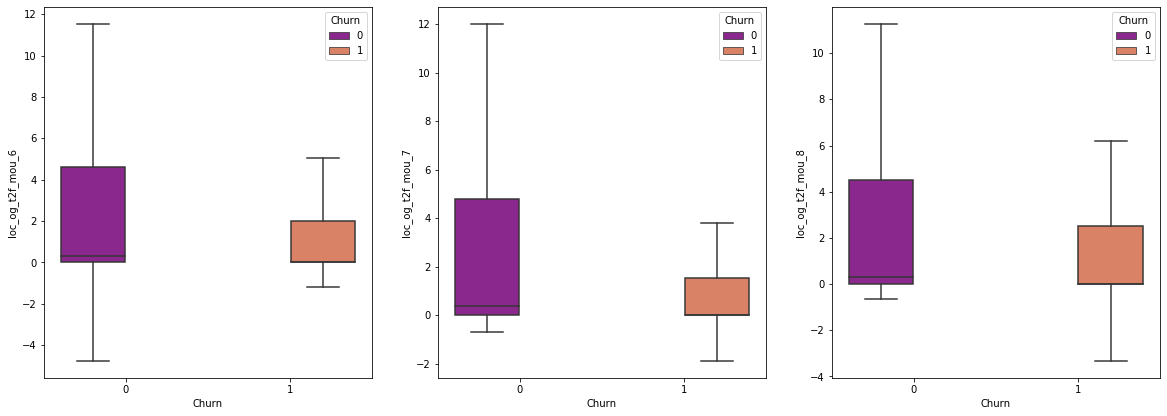

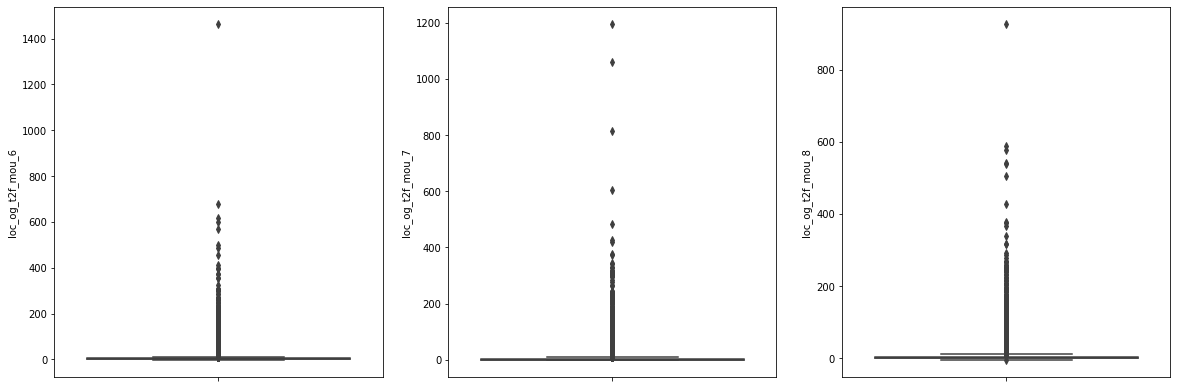

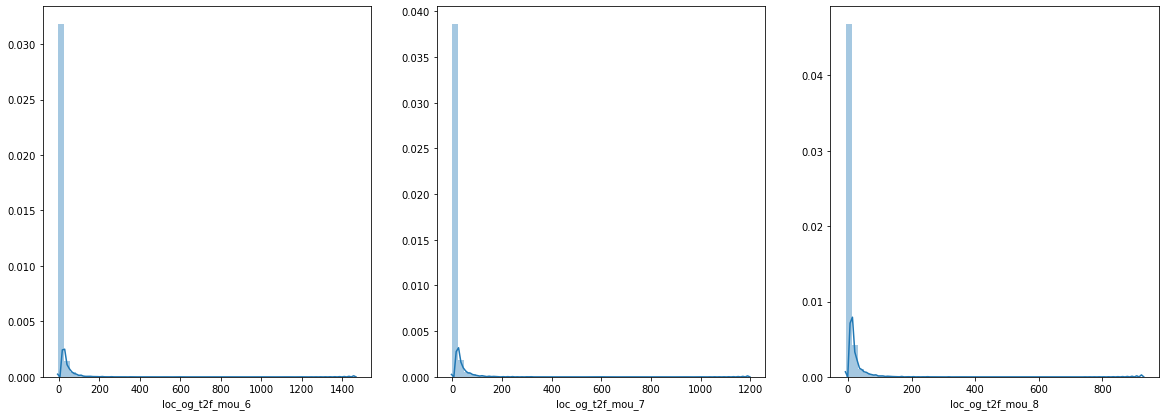

In [112]:
#loc_og_t2f_mou
feature_col = df.filter(regex ='loc_og_t2f_mou').columns
avg_mon_plot(df,feature_col,name = "loc_og_t2f_mou")
plot_Churn_wise(df,feature_col,name = "loc_og_t2f_mou")
feature = "loc_og_t2f_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_og_t2f_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that loc_og_t2f_mou decreasing trend for Churn and non-Churn customer also decreased constantly
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment


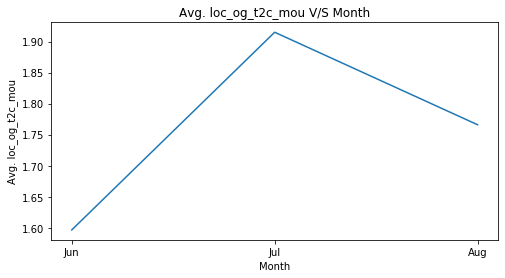

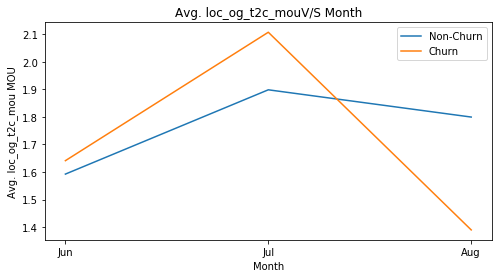

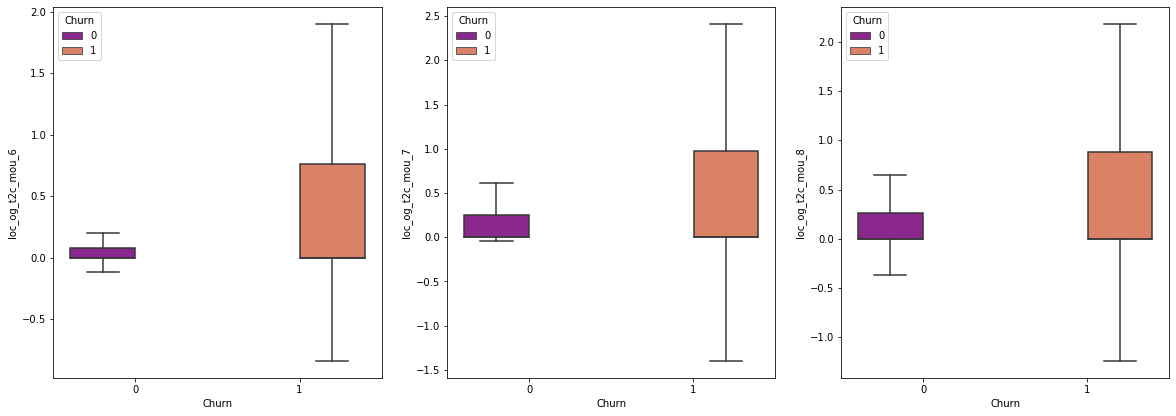

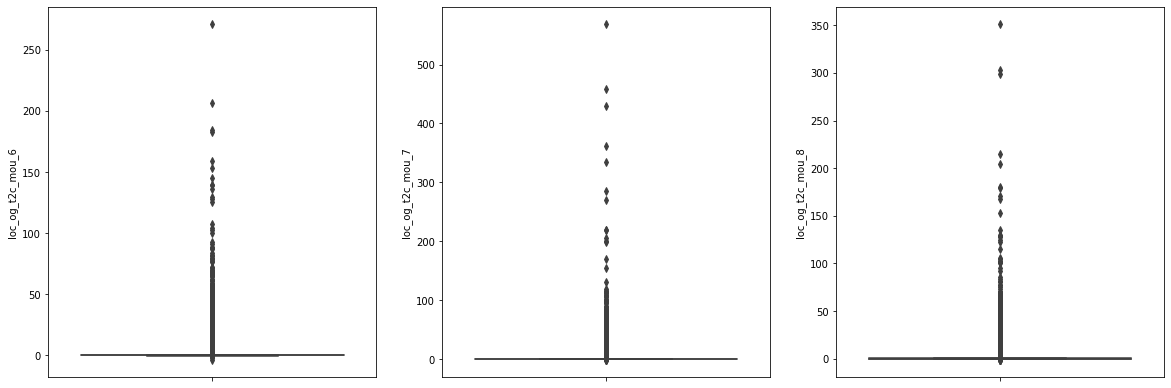

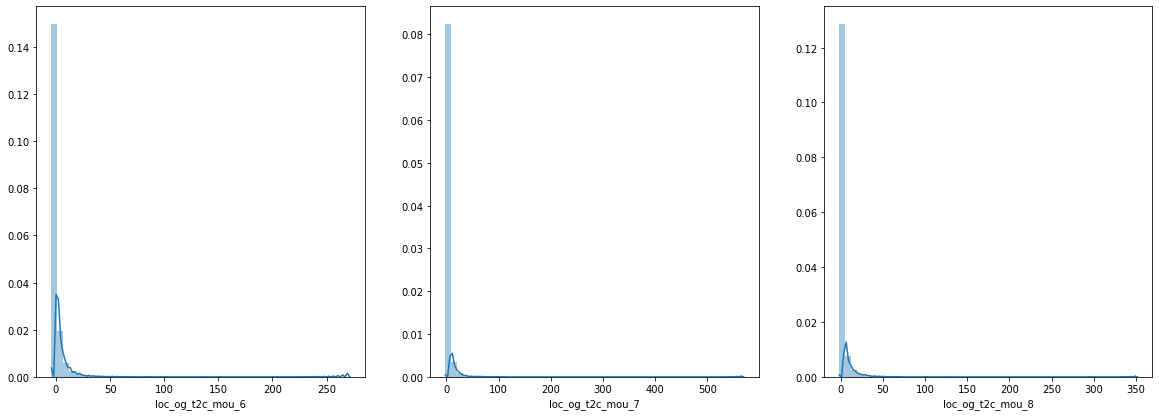

In [113]:
#loc_og_t2c_mou
feature_col = df.filter(regex ='loc_og_t2c_mou').columns
avg_mon_plot(df,feature_col,name = "loc_og_t2c_mou")
plot_Churn_wise(df,feature_col,name = "loc_og_t2c_mou")
feature = "loc_og_t2c_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_og_t2c_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that loc_og_t2c_mou decreasing trend for Churn and non-Churn customer also decreased in August
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

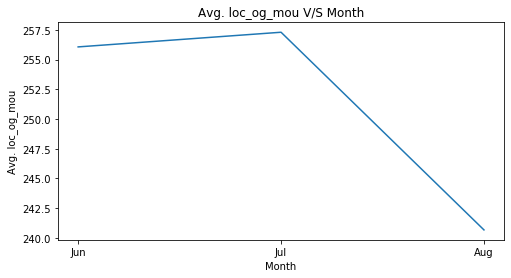

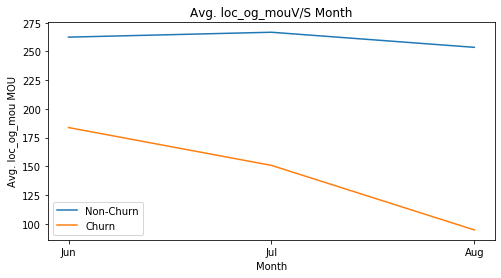

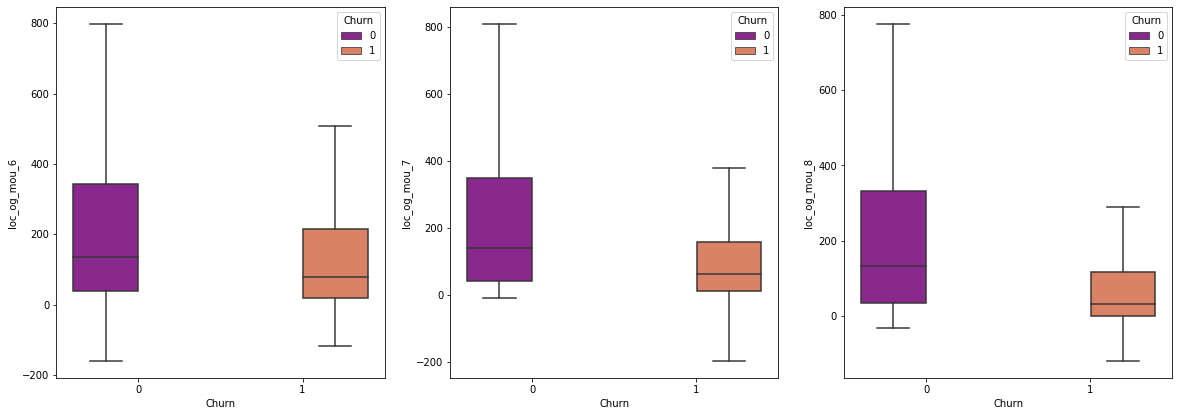

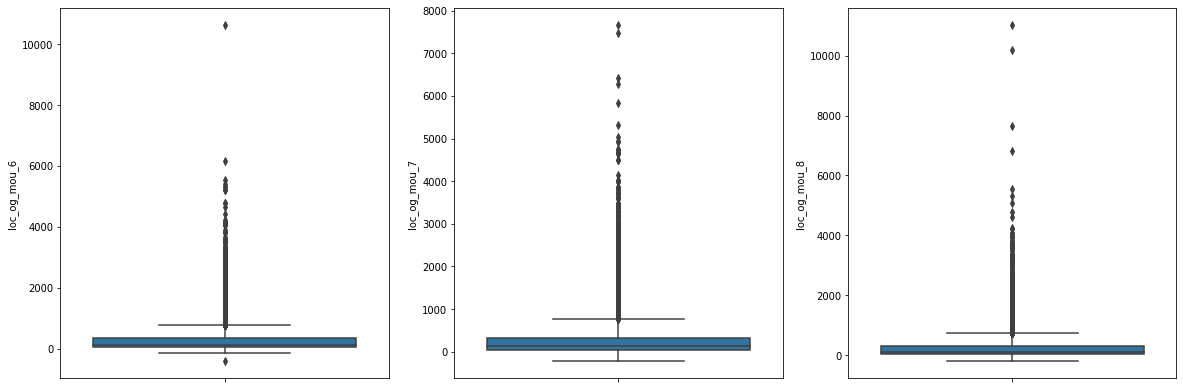

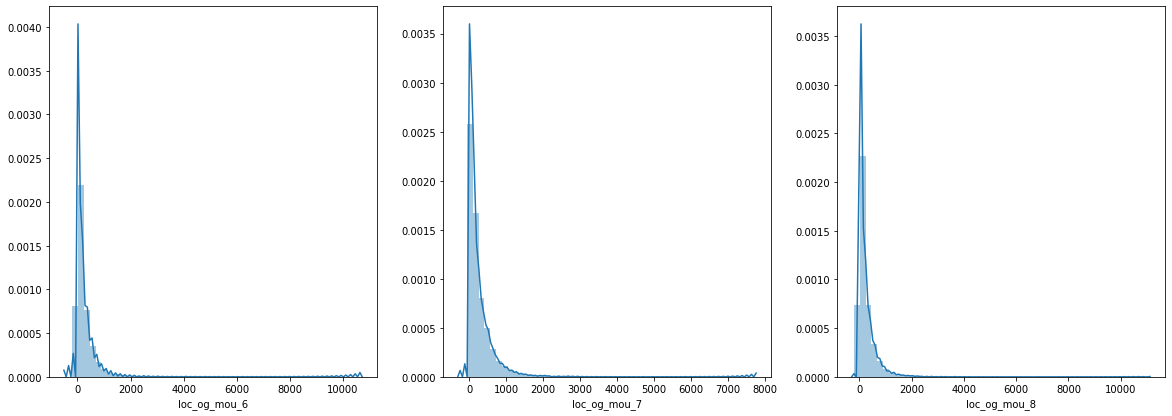

In [114]:
#loc_og_mou
feature_col = df.filter(regex ='loc_og_mou').columns
avg_mon_plot(df,feature_col,name = "loc_og_mou")
plot_Churn_wise(df,feature_col,name = "loc_og_mou")
feature = "loc_og_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

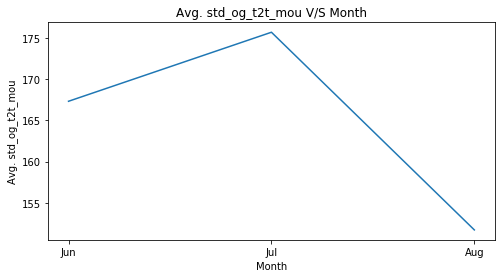

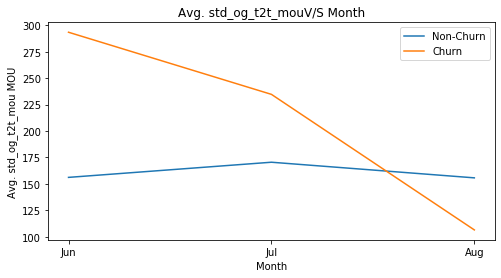

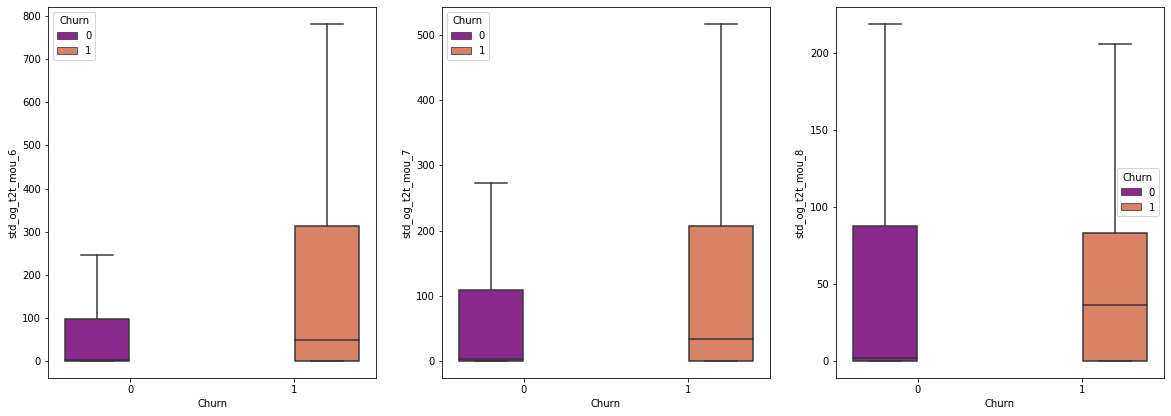

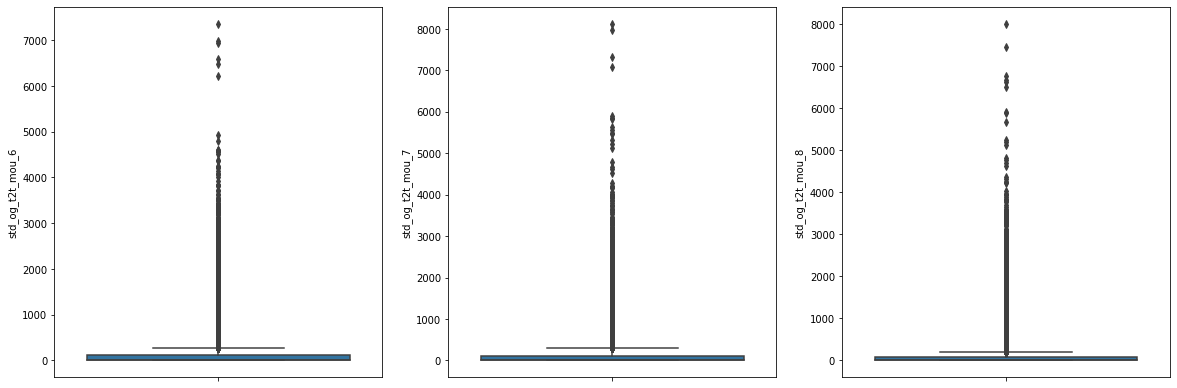

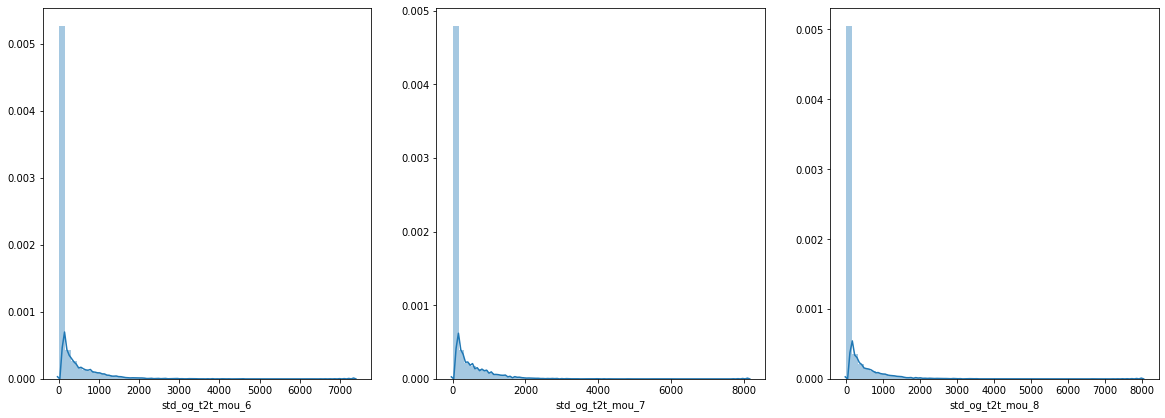

In [115]:
#std_og_t2t_mou
feature_col = df.filter(regex ='std_og_t2t_mou').columns
avg_mon_plot(df,feature_col,name = "std_og_t2t_mou")
plot_Churn_wise(df,feature_col,name = "std_og_t2t_mou")
feature = "std_og_t2t_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

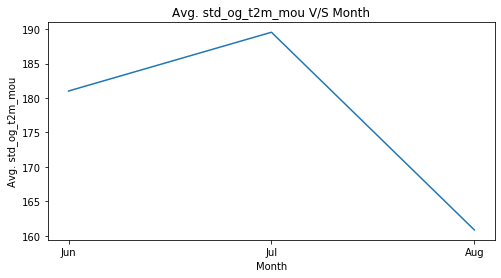

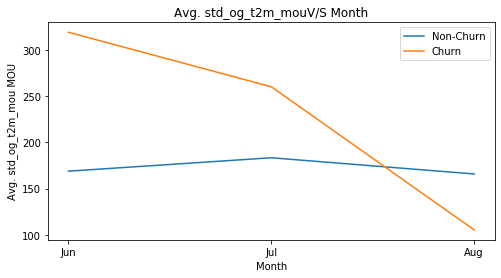

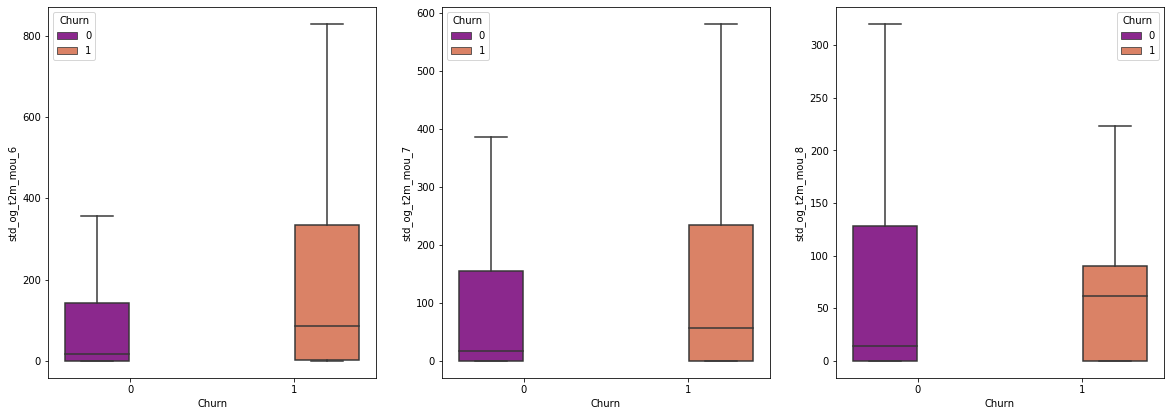

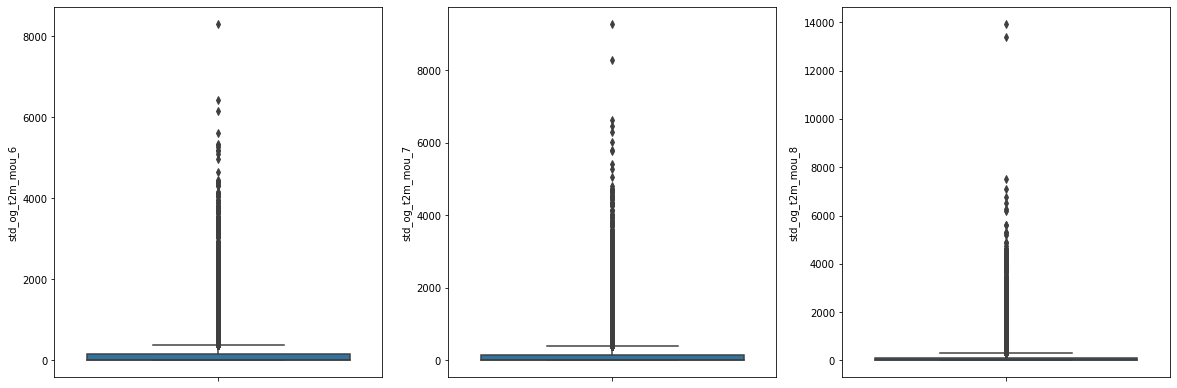

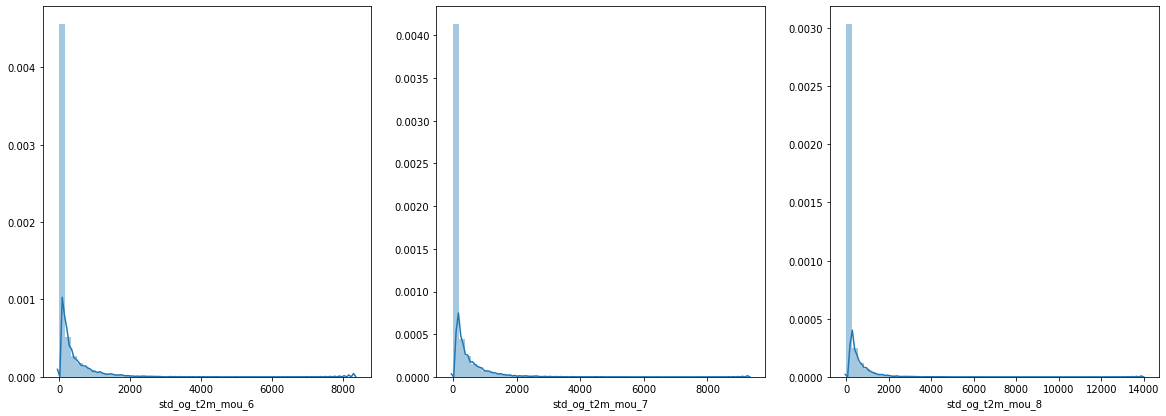

In [116]:
#std_og_t2m_mou
feature_col = df.filter(regex ='std_og_t2m_mou').columns
avg_mon_plot(df,feature_col,name = "std_og_t2m_mou")
plot_Churn_wise(df,feature_col,name = "std_og_t2m_mou")
feature = "std_og_t2m_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_og_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that loc_og_mou decreasing trend for Churn and non-Churn customer also decreased in August
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment


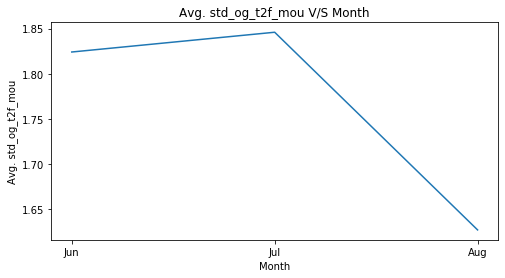

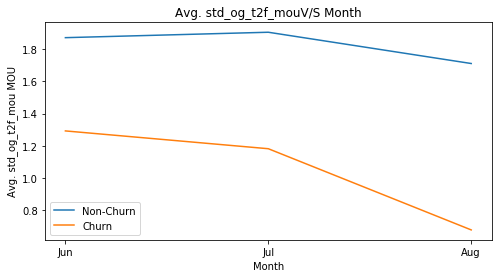

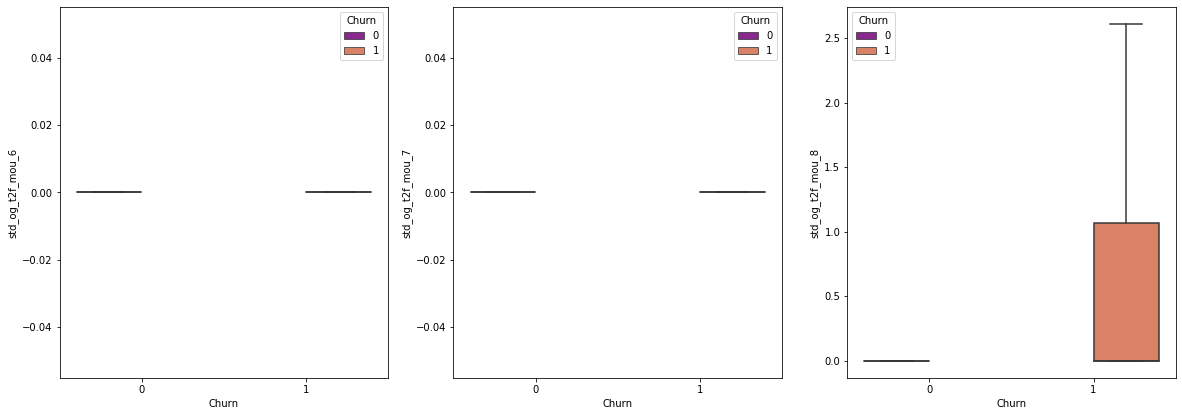

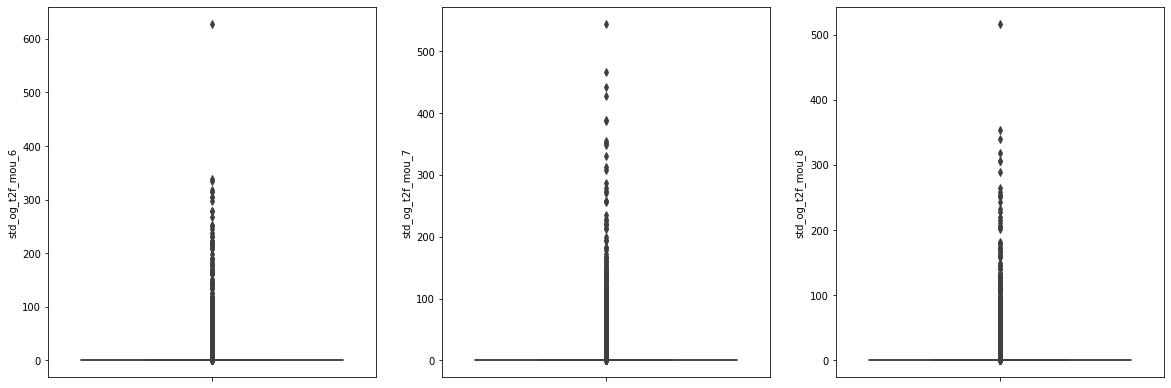

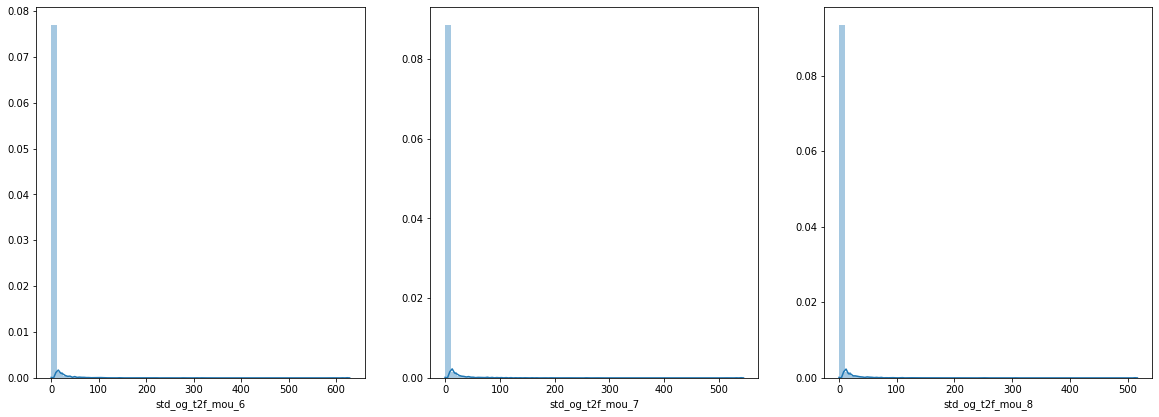

In [117]:
#std_og_t2m_mou
feature_col = df.filter(regex ='std_og_t2f_mou').columns
avg_mon_plot(df,feature_col,name = "std_og_t2f_mou")
plot_Churn_wise(df,feature_col,name = "std_og_t2f_mou")
feature = "std_og_t2f_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- std_og_t2f_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that std_og_t2f_mou decreasing trend for Churn and non-Churn customer also decreased in August
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

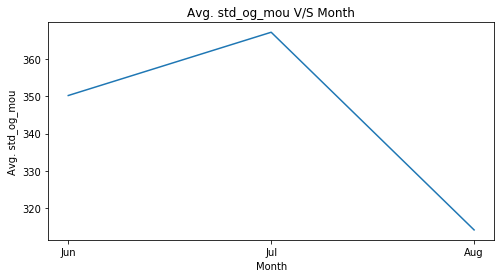

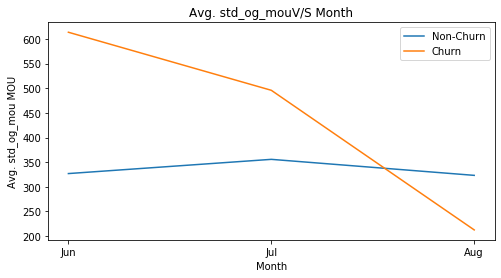

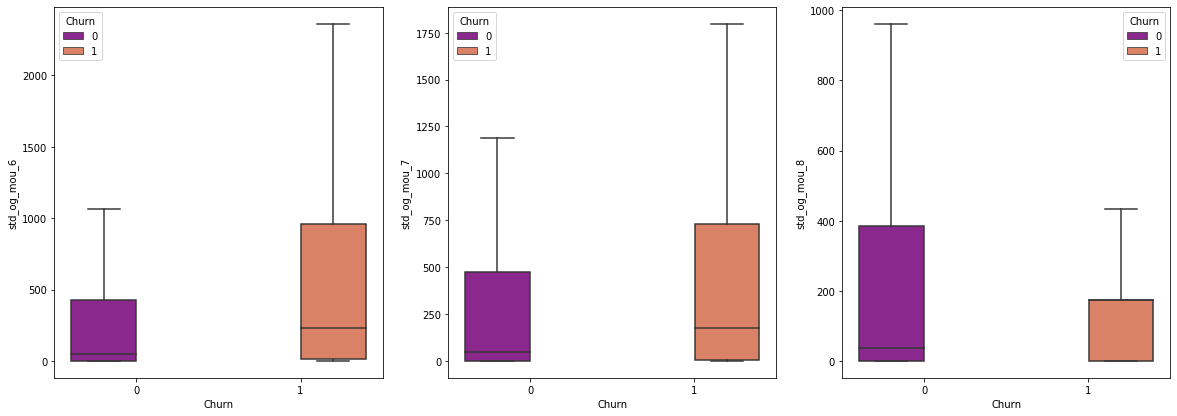

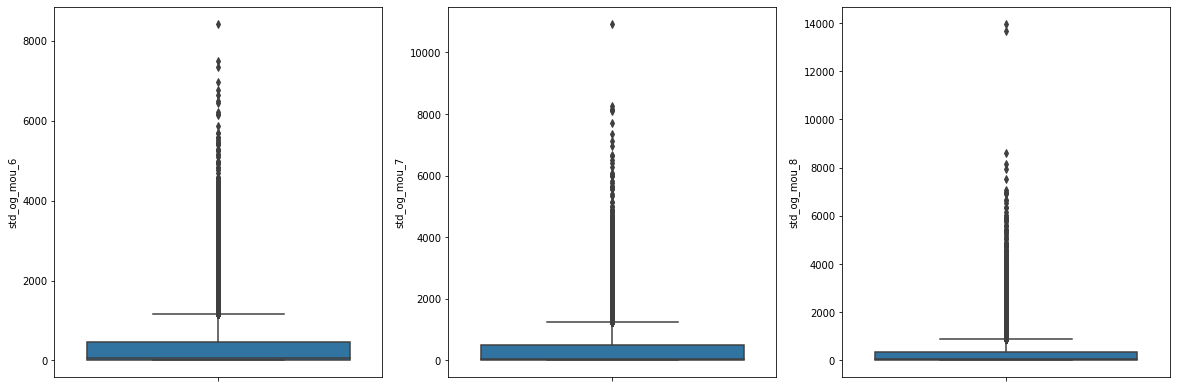

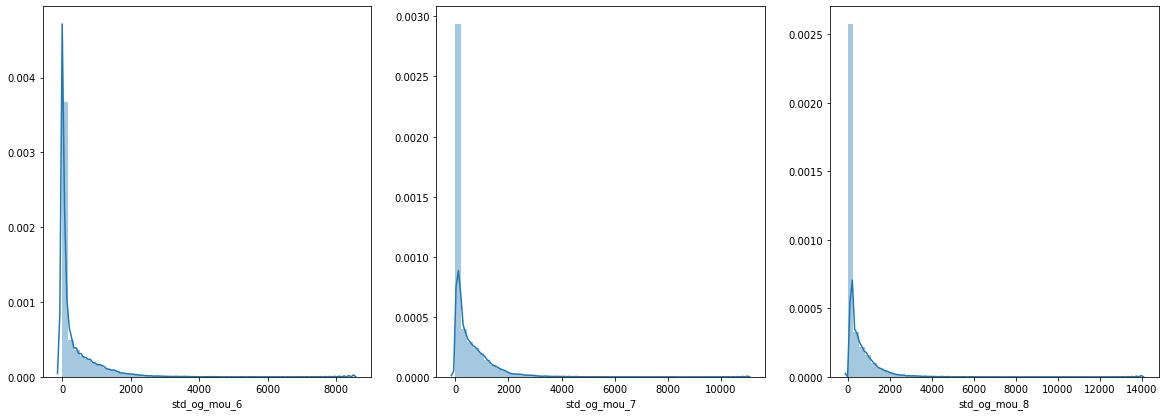

In [118]:
#std_og_mou
feature_col = df.filter(regex ='std_og_mou').columns
avg_mon_plot(df,feature_col,name = "std_og_mou")
plot_Churn_wise(df,feature_col,name = "std_og_mou")
feature = "std_og_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- std_og_mou increased in month of June and July. in August its dropped.
- When we classfy using Churn then see that std_og_mou decreasing trend for Churn and non-Churn customer also constant
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment


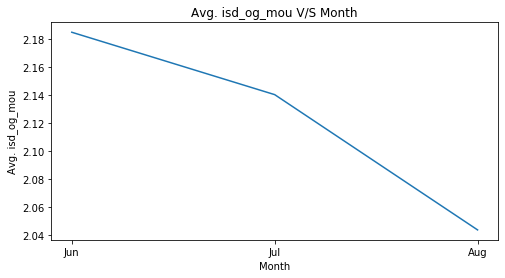

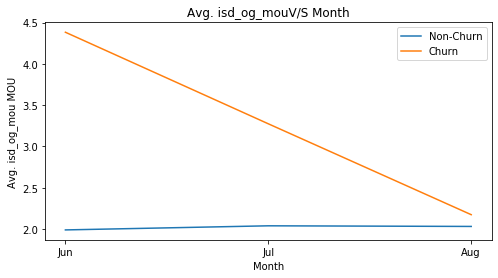

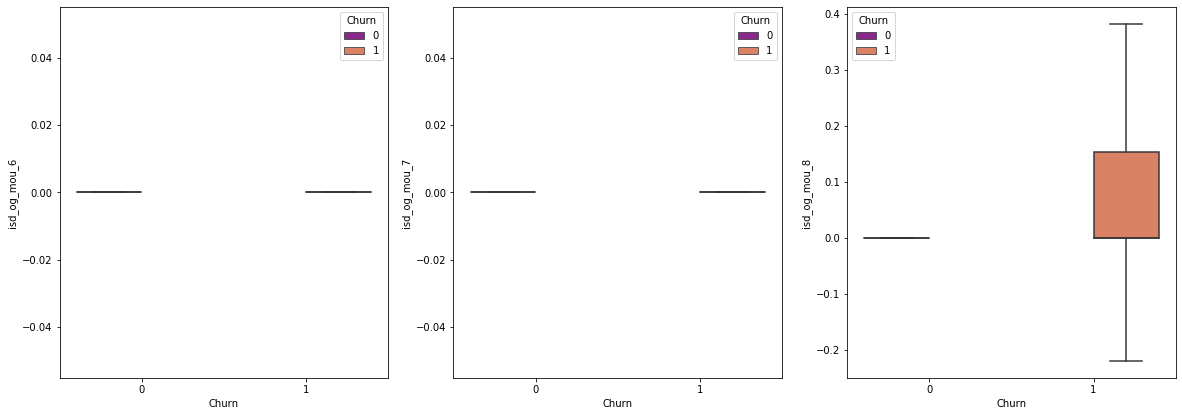

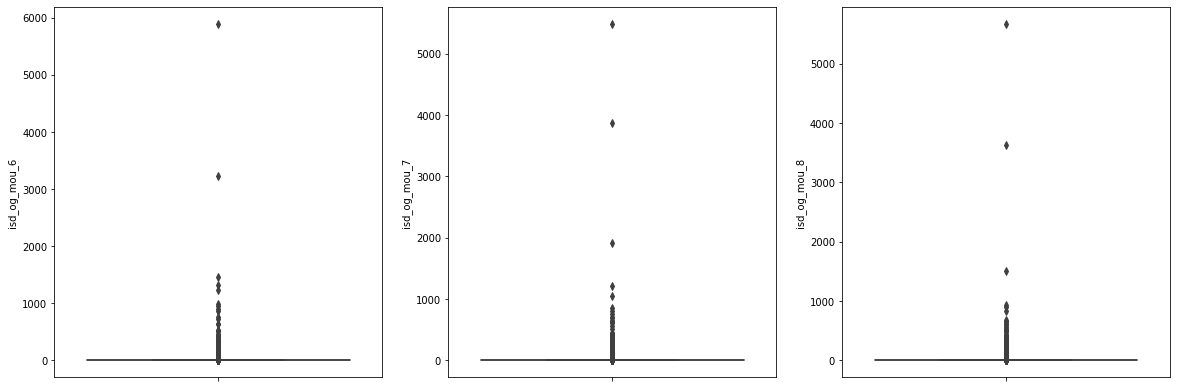

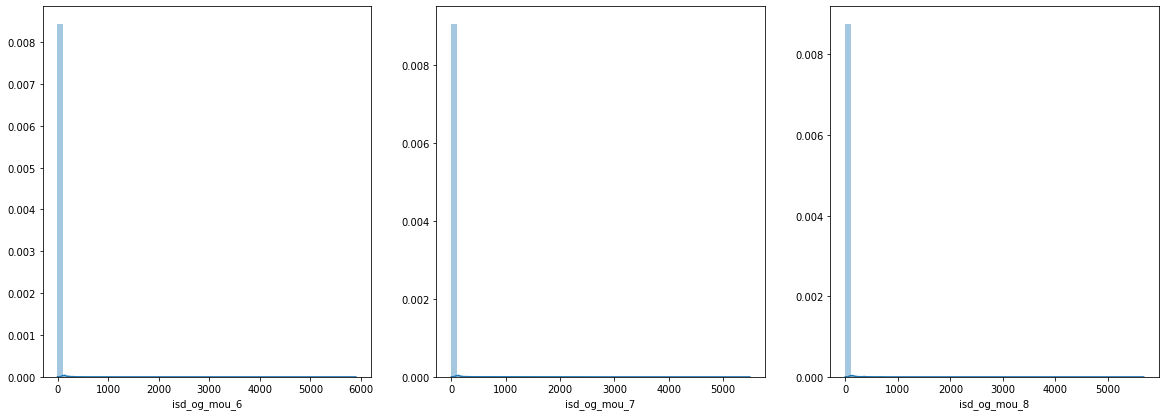

In [119]:
#isd_og_mou
feature_col = df.filter(regex ='isd_og_mou').columns
avg_mon_plot(df,feature_col,name = "isd_og_mou")
plot_Churn_wise(df,feature_col,name = "isd_og_mou")
feature = "isd_og_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- isd_og_mou decreasing in overall month of June and July and August.
- When we classfy using Churn then see that isd_og_mou decreasing trend for Churn and non-Churn customer also constant
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

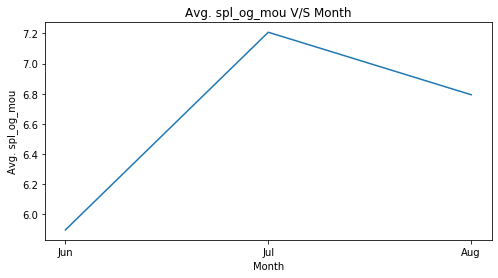

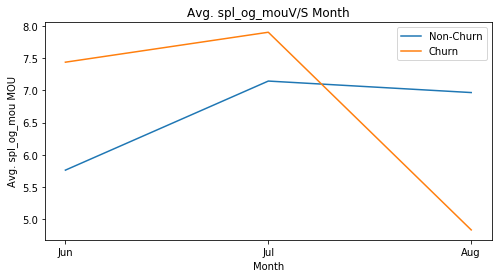

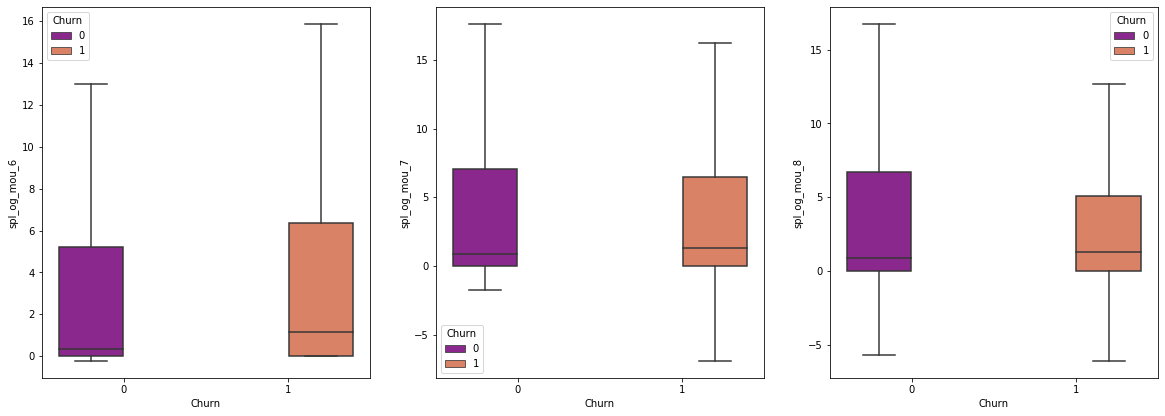

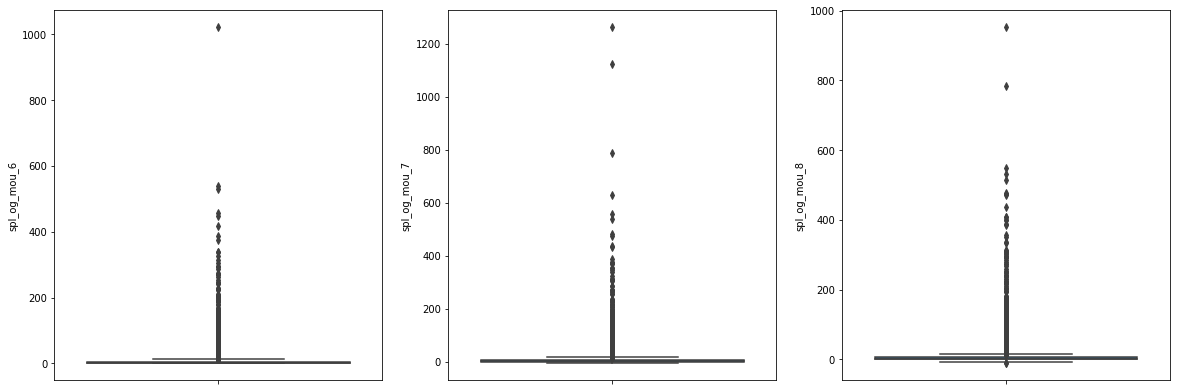

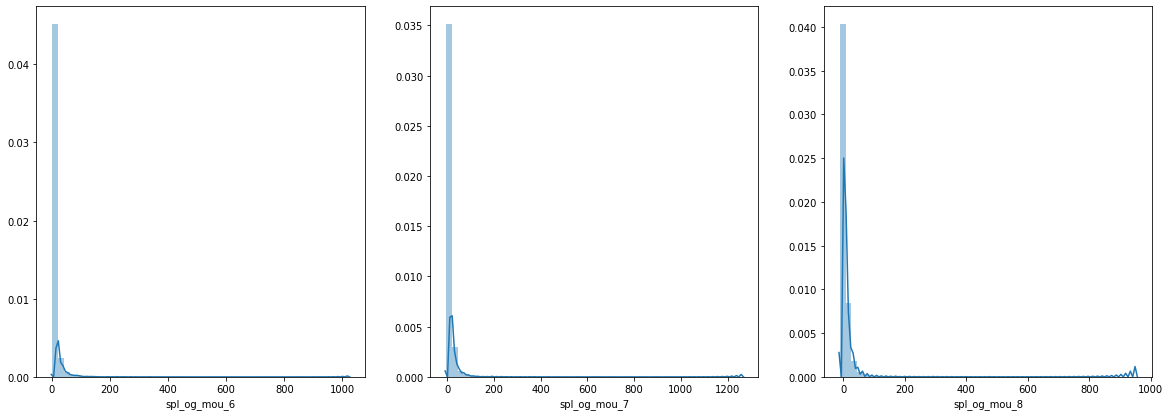

In [120]:
#spl_og_mou
feature_col = df.filter(regex ='spl_og_mou').columns
avg_mon_plot(df,feature_col,name = "spl_og_mou")
plot_Churn_wise(df,feature_col,name = "spl_og_mou")
feature = "spl_og_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- spl_og_mou decreasing in overall month of August.
- When we classfy using Churn then see that spl_og_mou decreasing trend for Churn in August and non-Churn customer also constant for July and August
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

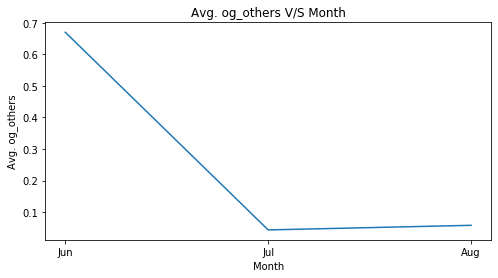

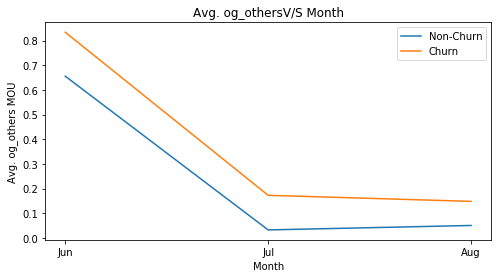

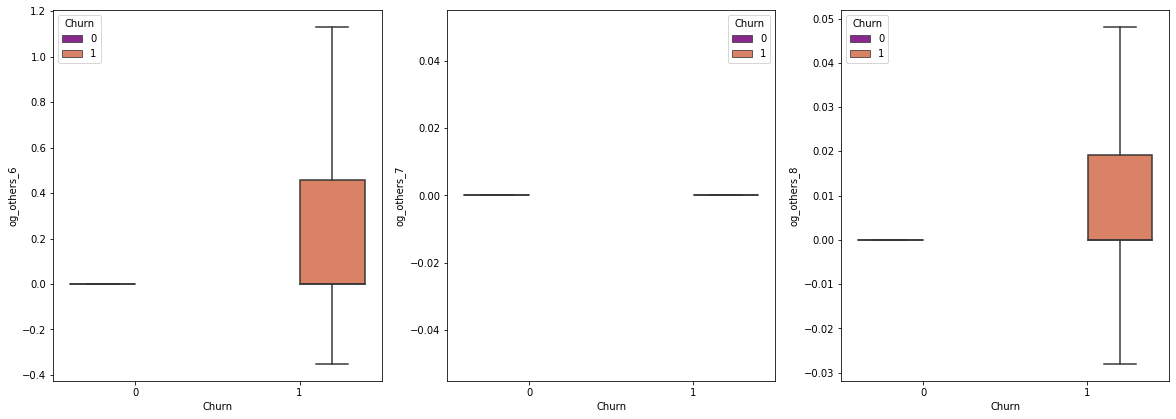

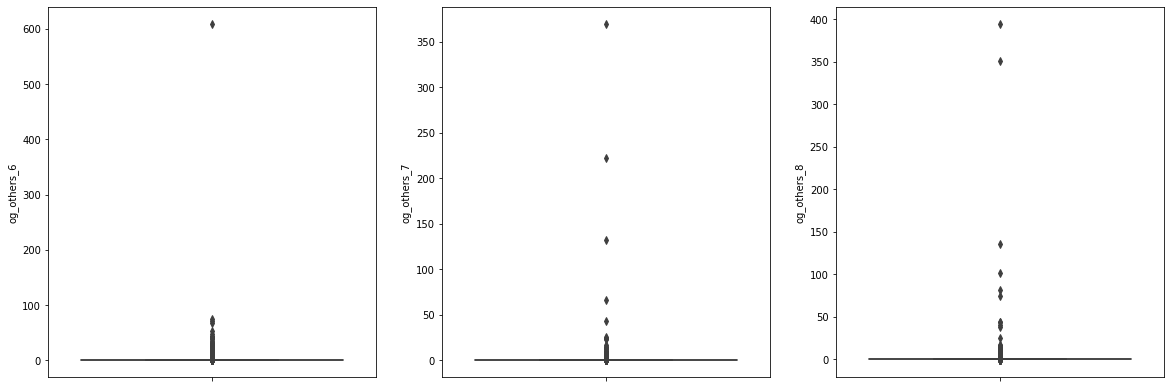

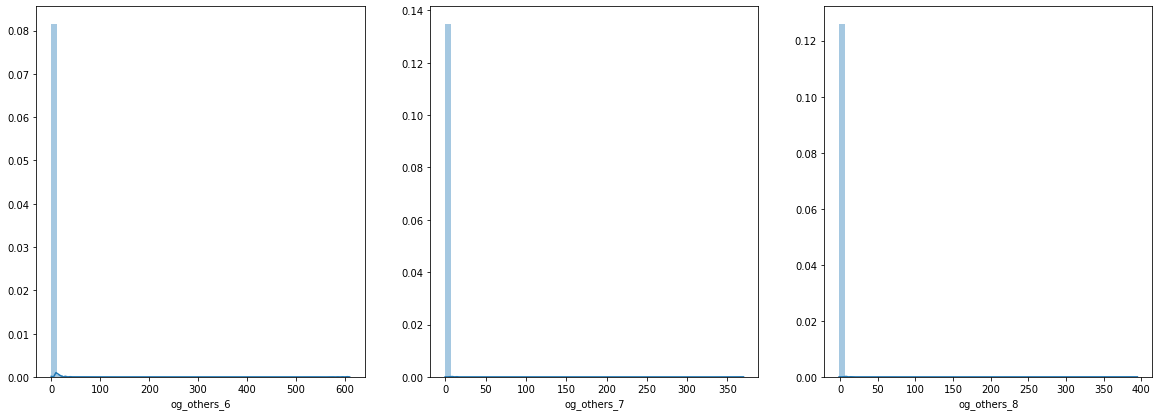

In [121]:
#og_others
feature_col = df.filter(regex ='og_others').columns
avg_mon_plot(df,feature_col,name = "og_others")
plot_Churn_wise(df,feature_col,name = "og_others")
feature = "og_others"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- og_others decreasing in each month
- When we classfy using Churn then see that og_others decreasing trend for Churn and non-Churn customer also constant decreasing
- Also, data is skewed to Right side so will see after outlier treatment
- Also, data is skewed to Right side so will see after outlier treatment

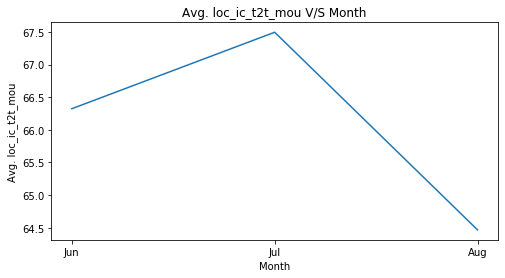

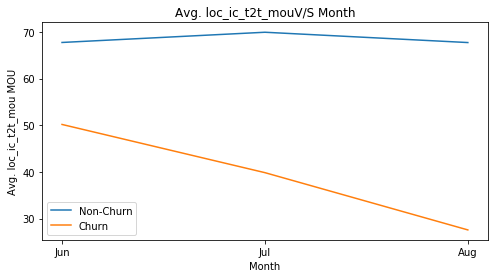

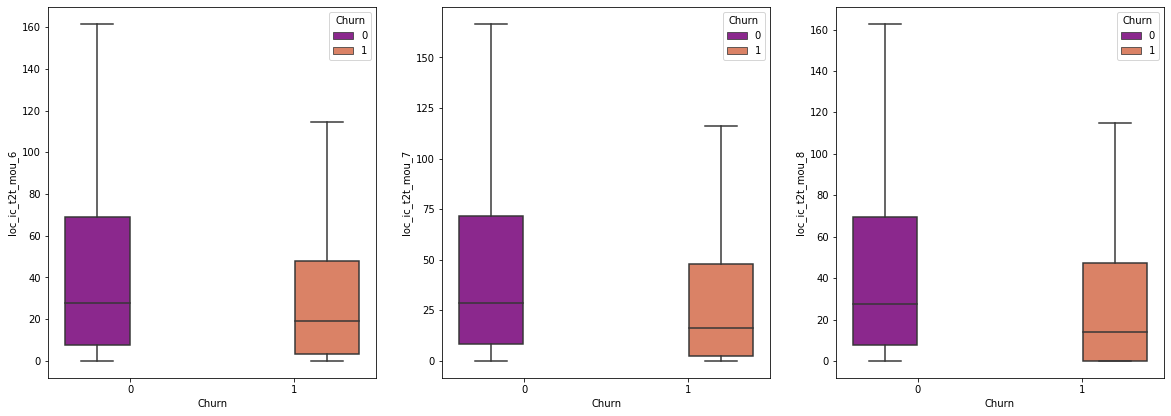

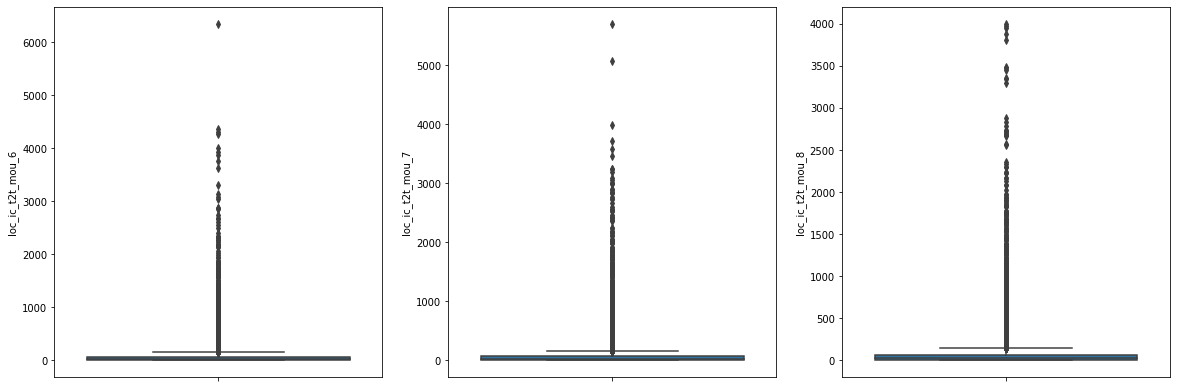

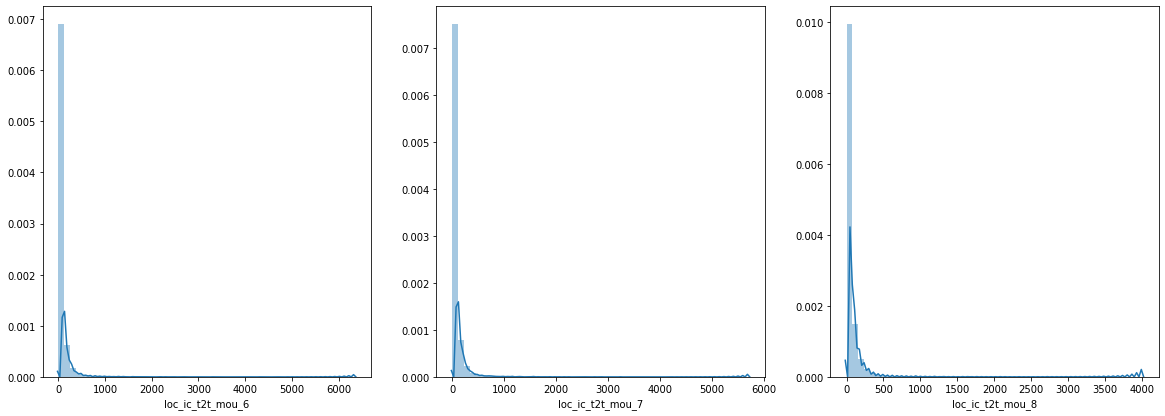

In [122]:
#loc_ic_t2t_mou
feature_col = df.filter(regex ='loc_ic_t2t_mou').columns
avg_mon_plot(df,feature_col,name = "loc_ic_t2t_mou")
plot_Churn_wise(df,feature_col,name = "loc_ic_t2t_mou")
feature = "loc_ic_t2t_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- loc_ic_t2t_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that loc_ic_t2t_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

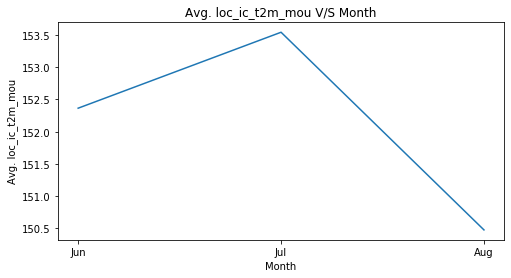

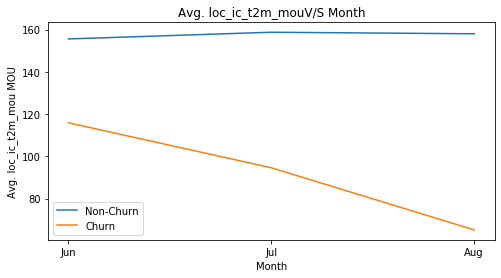

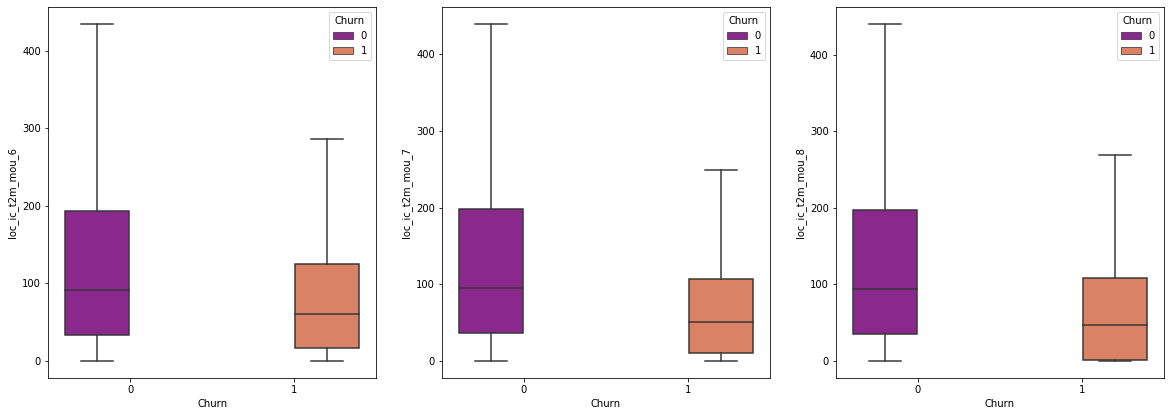

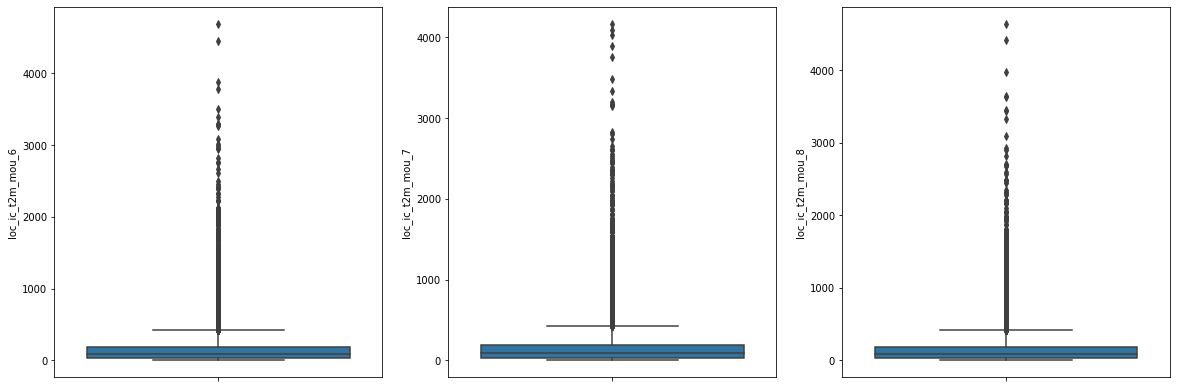

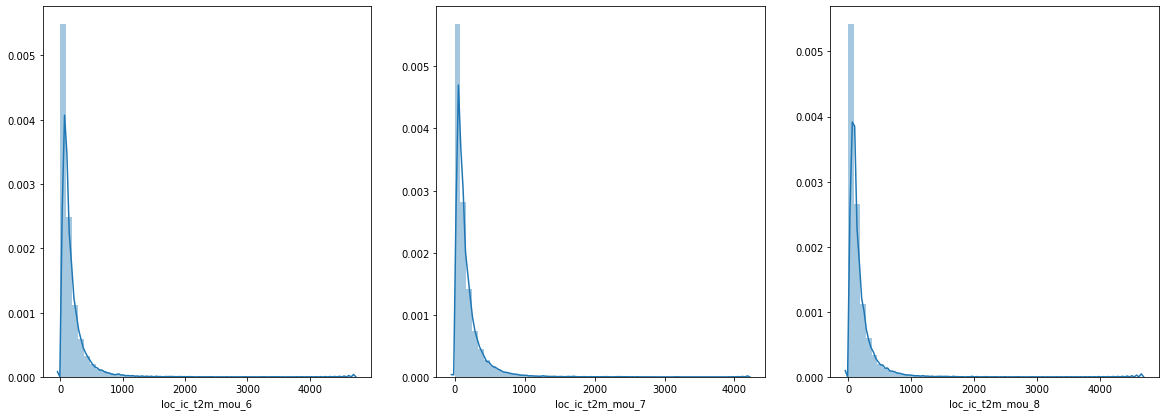

In [123]:
#loc_ic_t2m_mou
feature_col = df.filter(regex ='loc_ic_t2m_mou').columns
avg_mon_plot(df,feature_col,name = "loc_ic_t2m_mou")
plot_Churn_wise(df,feature_col,name = "loc_ic_t2m_mou")
feature = "loc_ic_t2m_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- lloc_ic_t2m_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that loc_ic_t2m_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

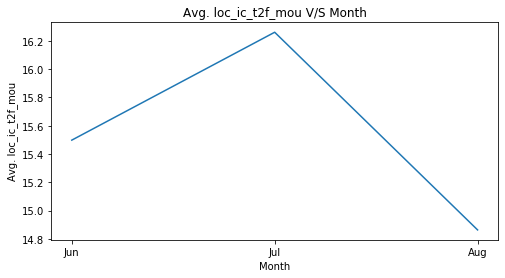

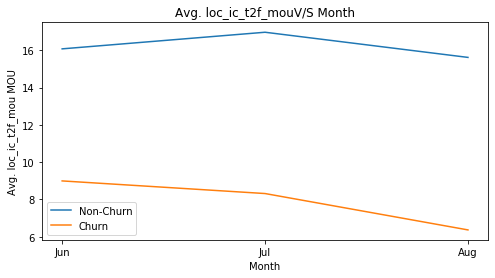

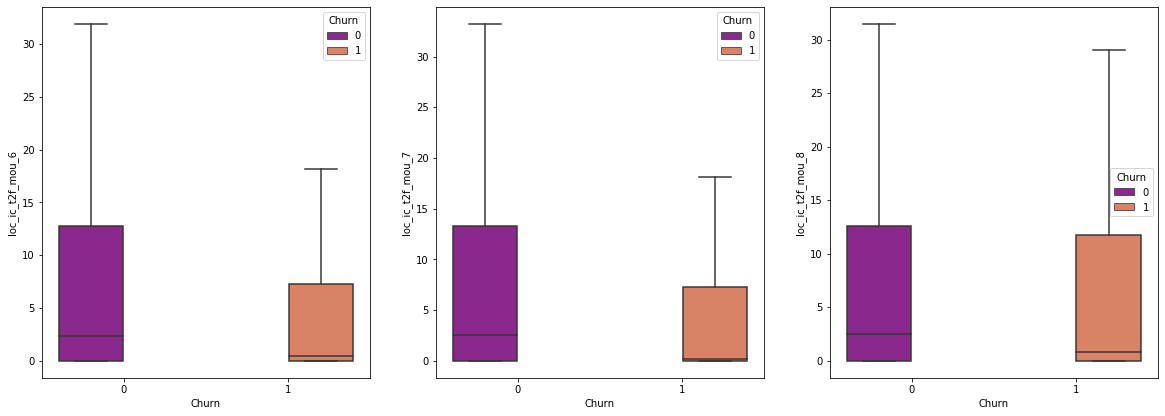

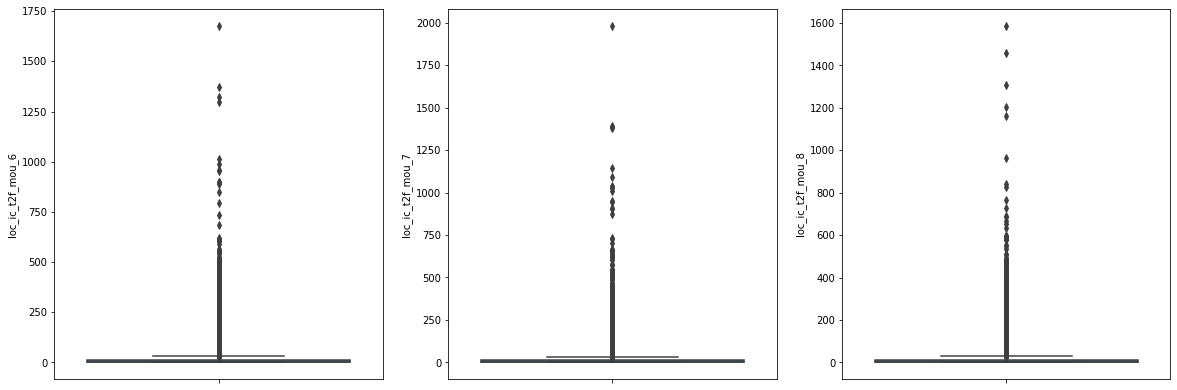

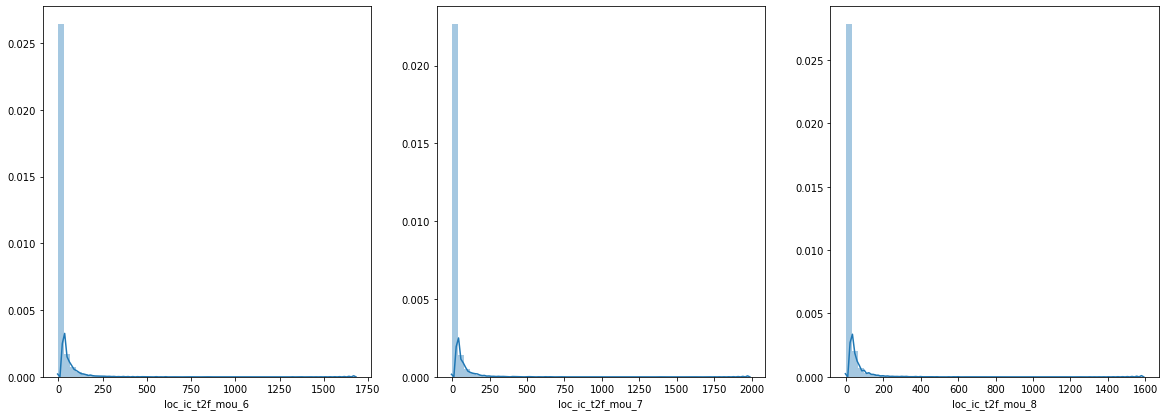

In [124]:
#loc_ic_t2f_mou
feature_col = df.filter(regex ='loc_ic_t2f_mou').columns
avg_mon_plot(df,feature_col,name = "loc_ic_t2f_mou")
plot_Churn_wise(df,feature_col,name = "loc_ic_t2f_mou")
feature = "loc_ic_t2f_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_ic_t2f_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that loc_ic_t2f_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

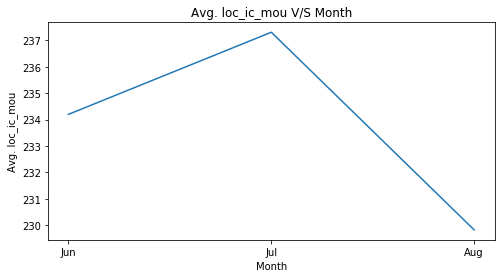

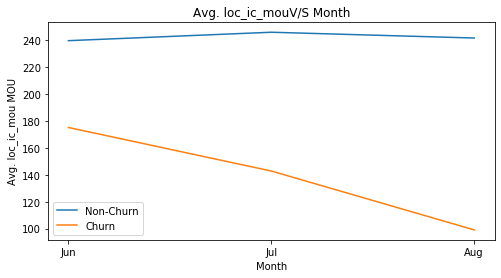

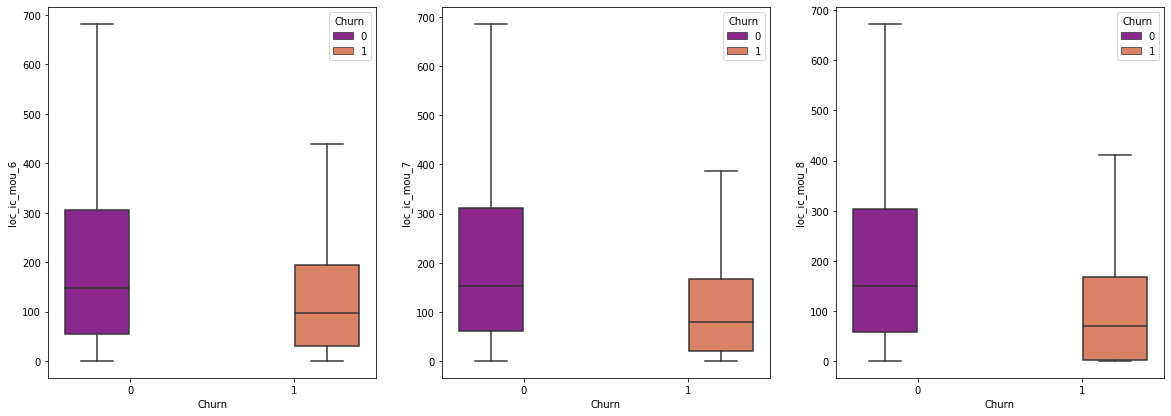

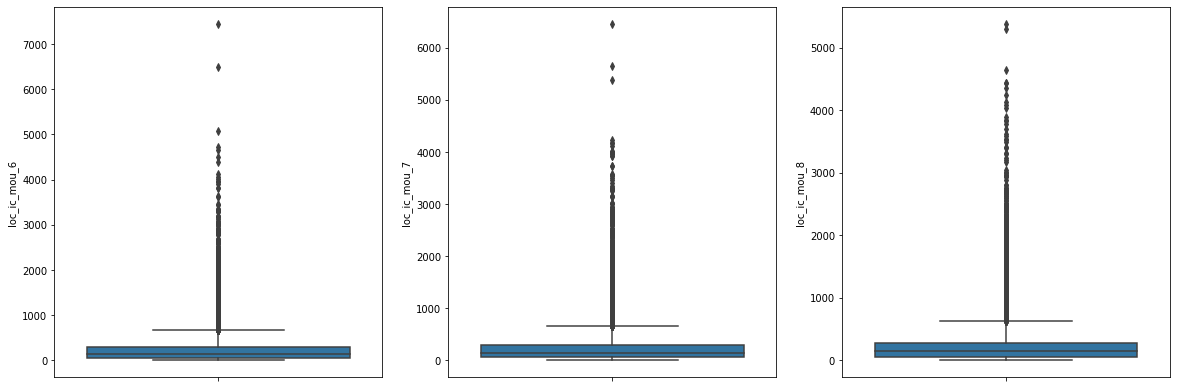

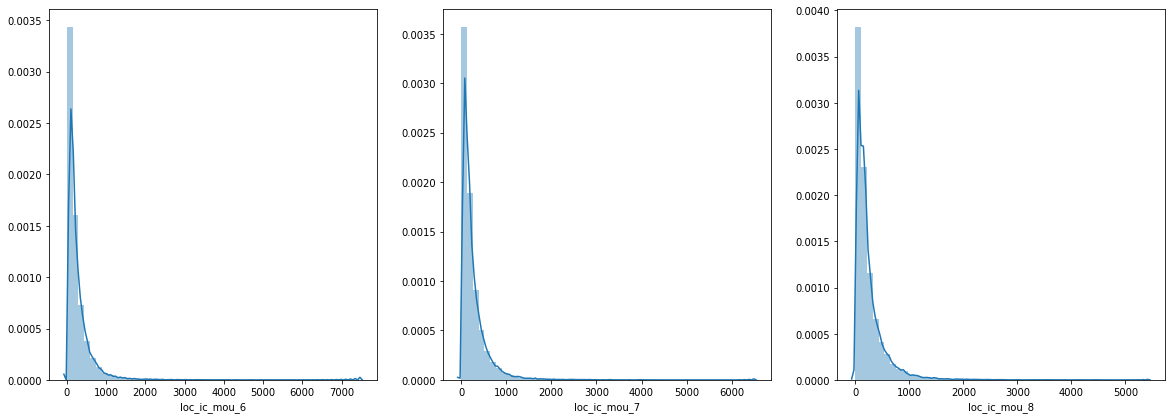

In [125]:
#loc_ic_mou
feature_col = df.filter(regex ='loc_ic_mou').columns
avg_mon_plot(df,feature_col,name = "loc_ic_mou")
plot_Churn_wise(df,feature_col,name = "loc_ic_mou")
feature = "loc_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- loc_ic_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that loc_ic_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

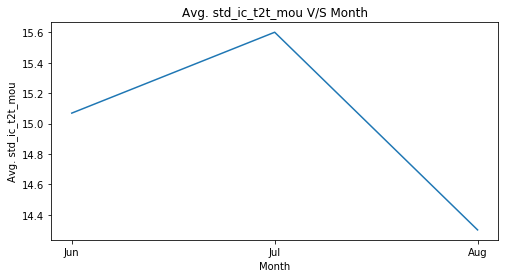

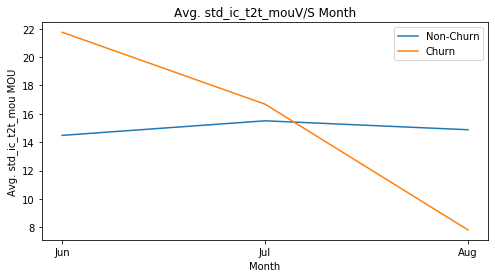

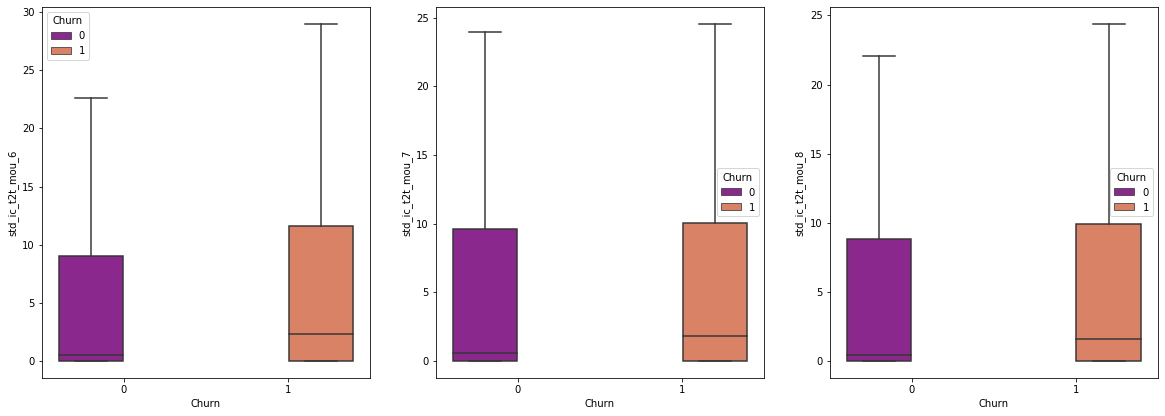

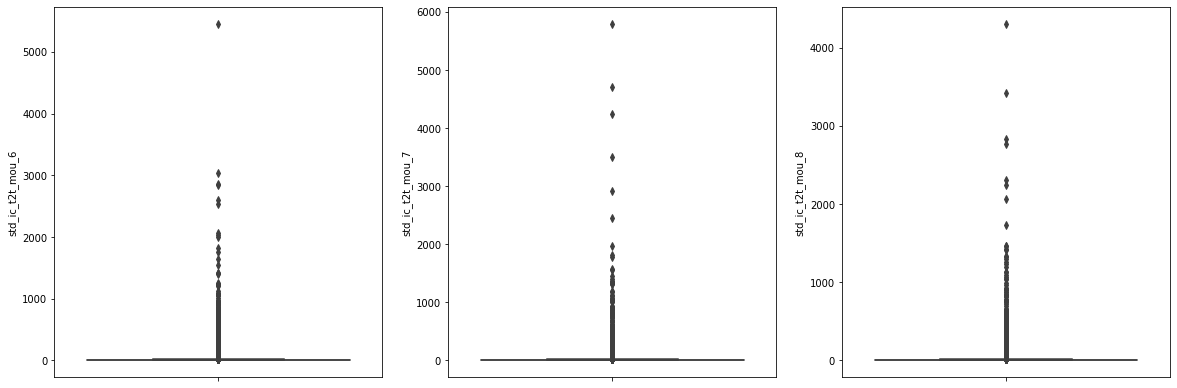

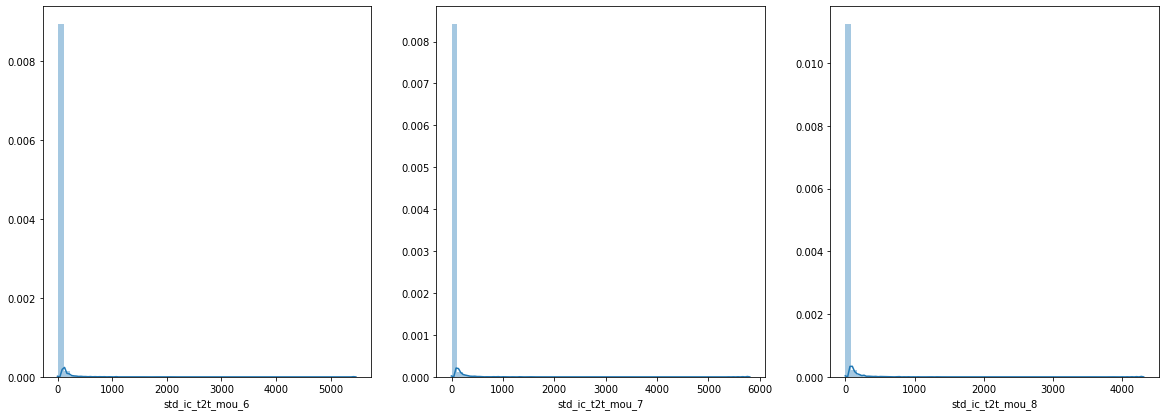

In [126]:
#std_ic_t2t_mou
feature_col = df.filter(regex ='std_ic_t2t_mou').columns
avg_mon_plot(df,feature_col,name = "std_ic_t2t_mou")
plot_Churn_wise(df,feature_col,name = "std_ic_t2t_mou")
feature = "std_ic_t2t_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- std_ic_t2t_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that std_ic_t2t_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

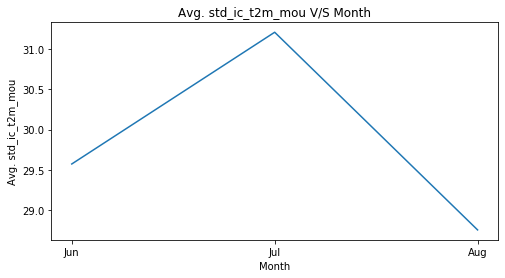

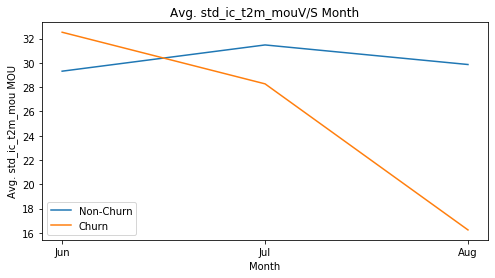

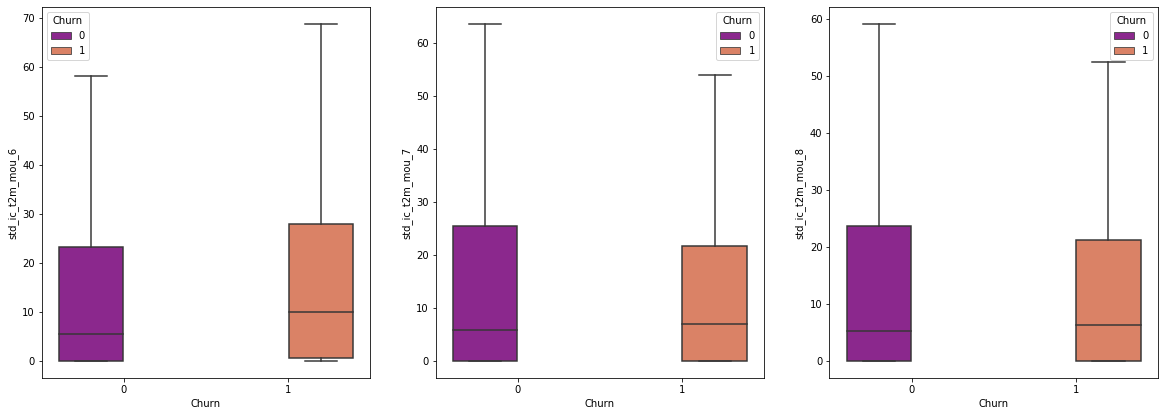

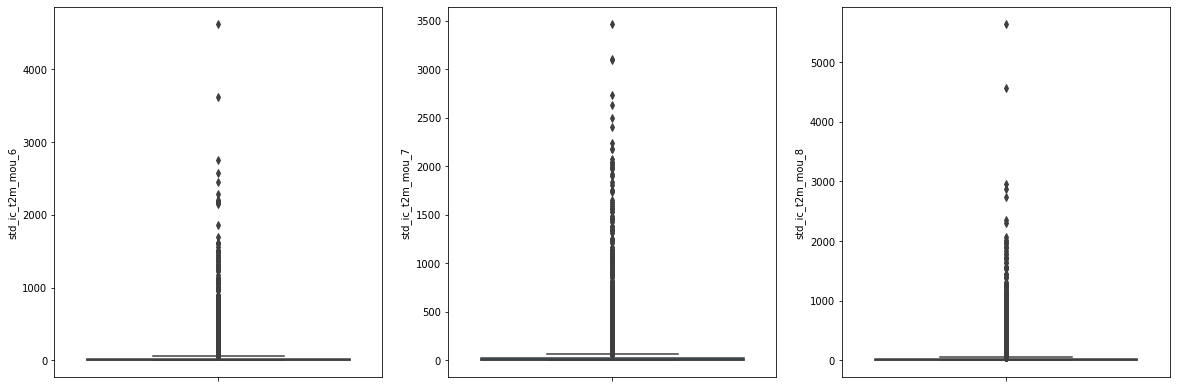

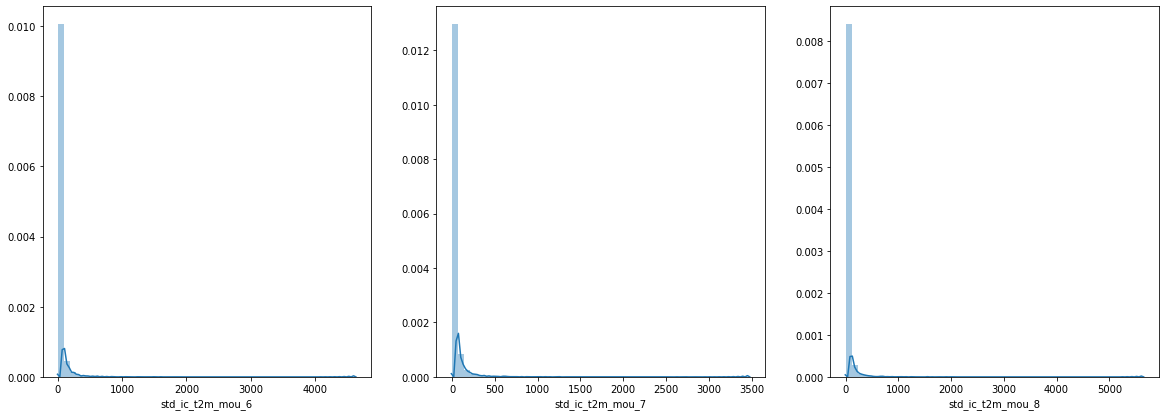

In [127]:
#std_ic_t2m_mou
feature_col = df.filter(regex ='std_ic_t2m_mou').columns
avg_mon_plot(df,feature_col,name = "std_ic_t2m_mou")
plot_Churn_wise(df,feature_col,name = "std_ic_t2m_mou")
feature = "std_ic_t2m_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- std_ic_t2m_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that std_ic_t2m_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

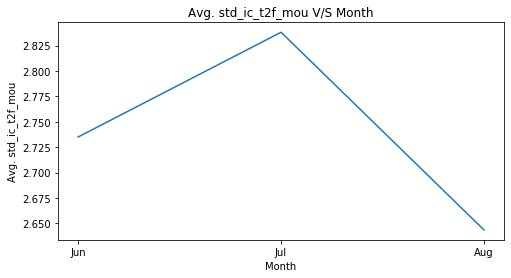

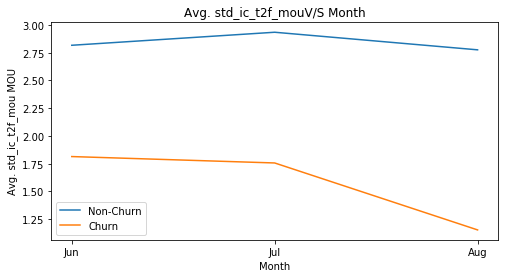

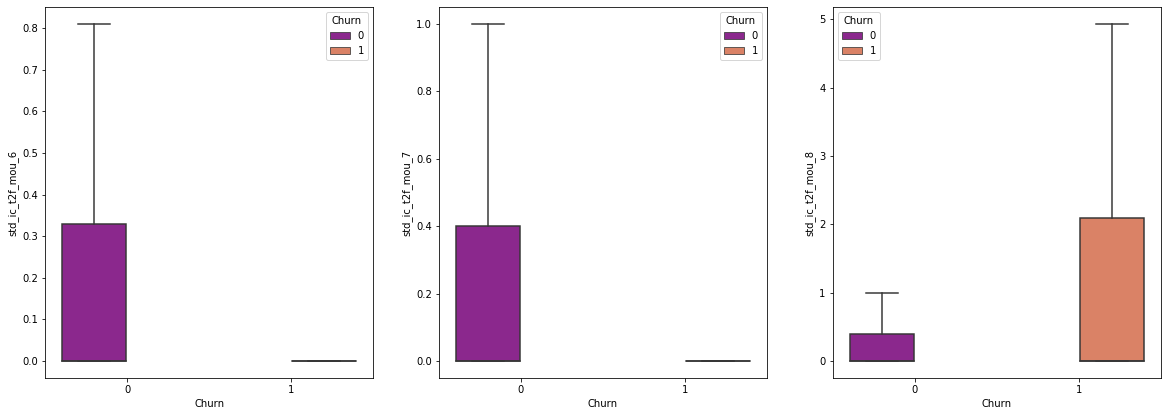

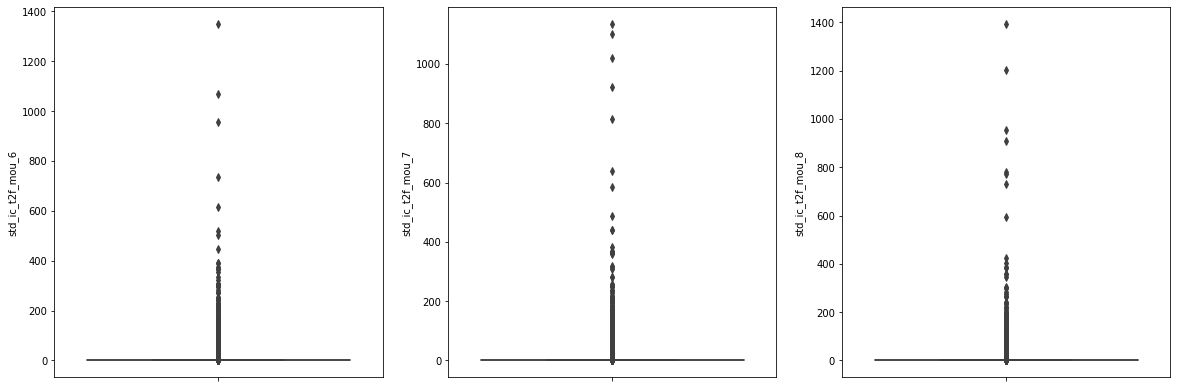

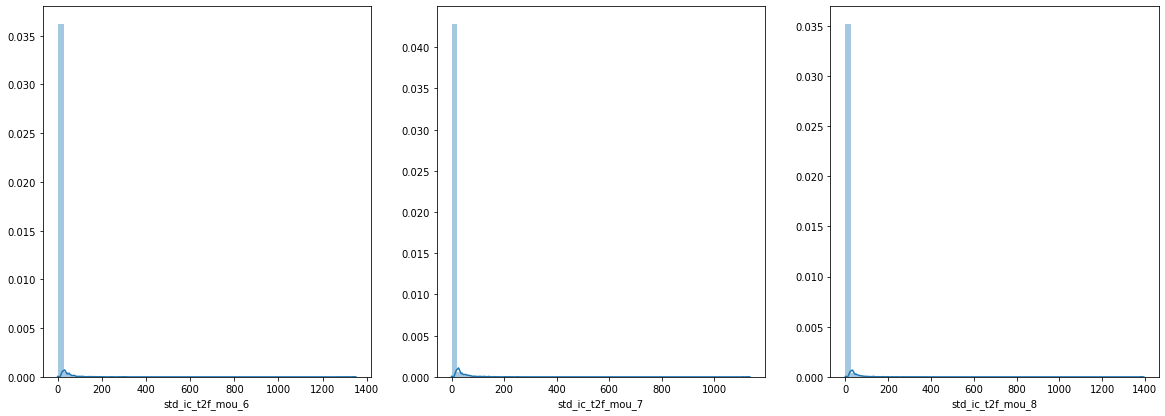

In [128]:
#std_ic_t2f_mou
feature_col = df.filter(regex ='std_ic_t2f_mou').columns
avg_mon_plot(df,feature_col,name = "std_ic_t2f_mou")
plot_Churn_wise(df,feature_col,name = "std_ic_t2f_mou")
feature = "std_ic_t2f_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- std_ic_t2f_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that std_ic_t2f_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment

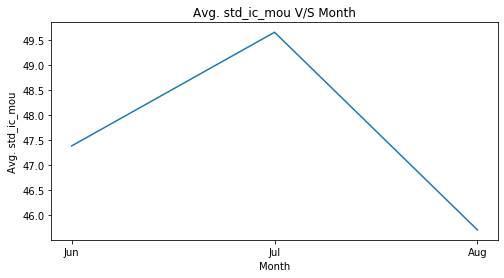

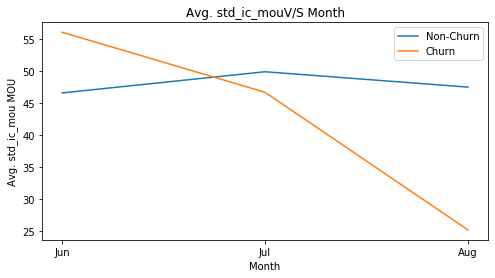

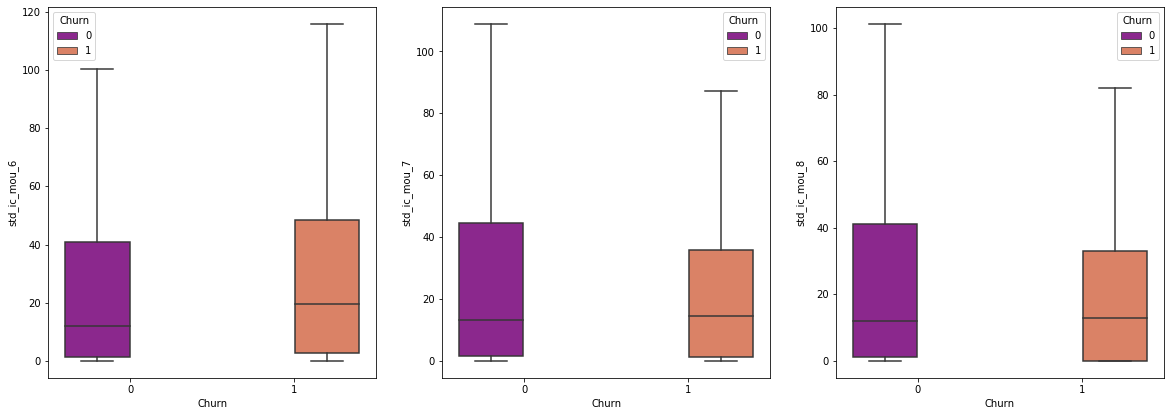

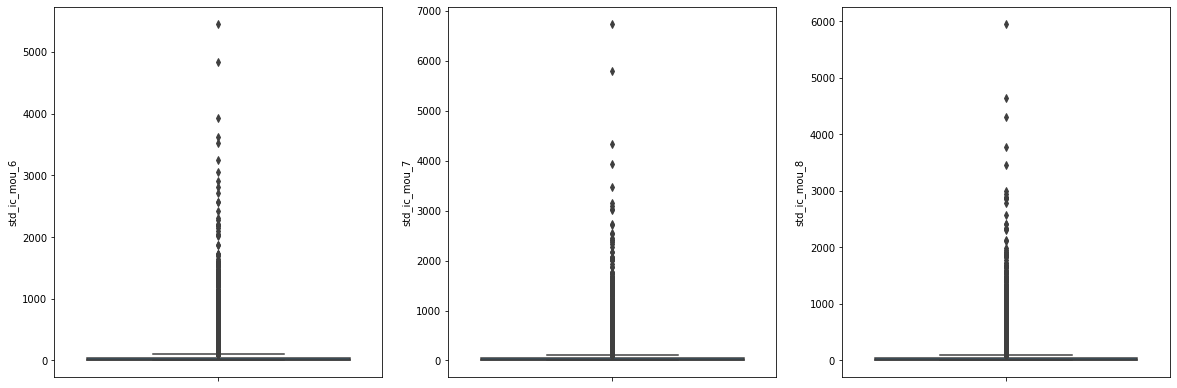

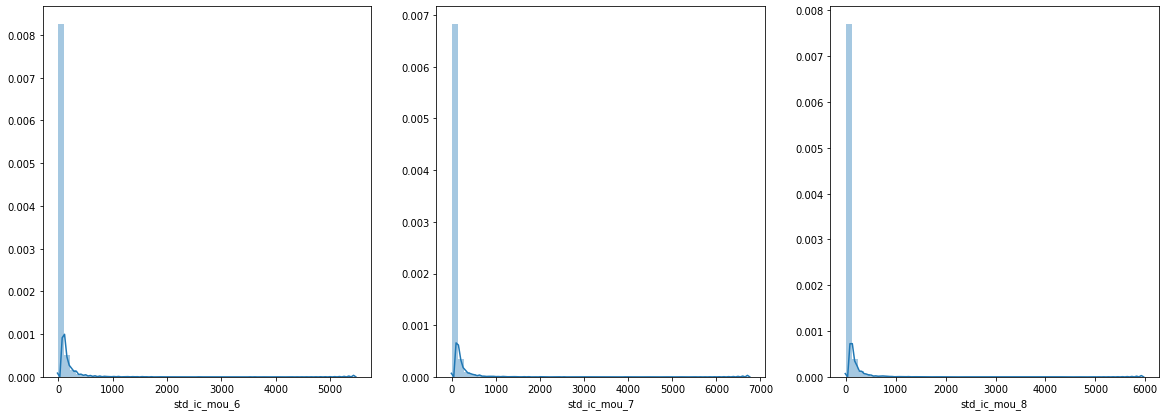

In [129]:
#std_ic_mou
feature_col = df.filter(regex ='std_ic_mou').columns
avg_mon_plot(df,feature_col,name = "std_ic_mou")
plot_Churn_wise(df,feature_col,name = "std_ic_mou")
feature = "std_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- std_ic_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that std_ic_mou decreasing trend
- We can see the Outliers present in this columns will cap them as later section
- Also, data is skewed to Right side so will see after outlier treatment.

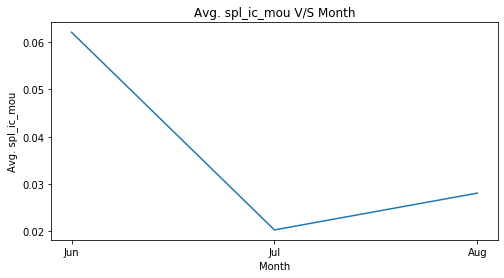

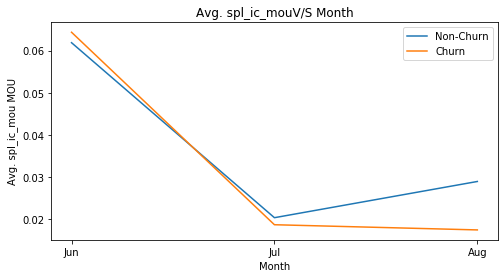

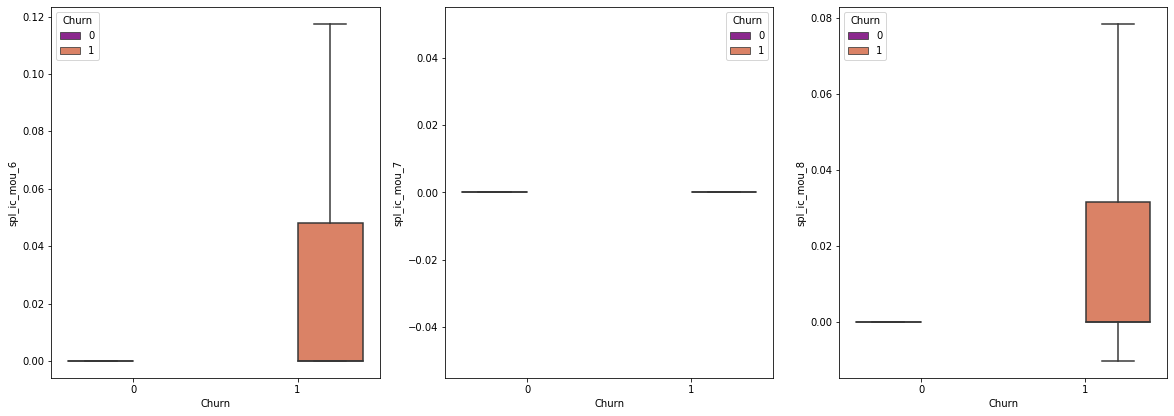

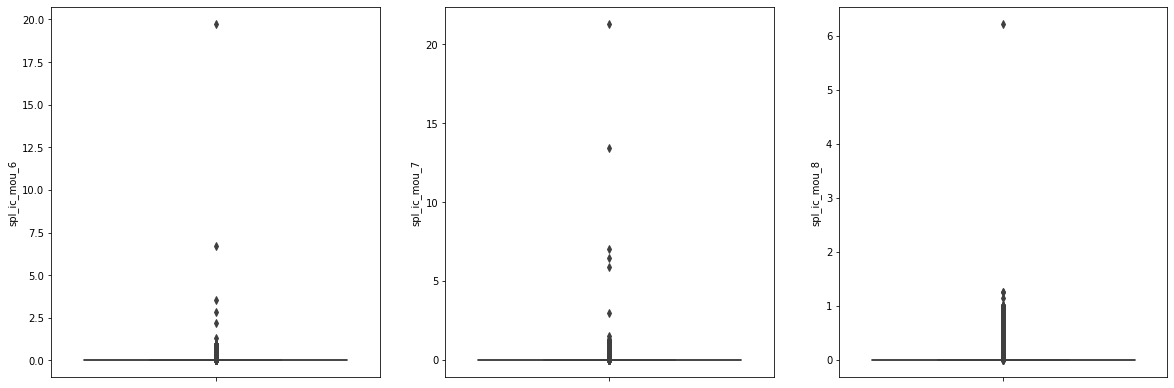

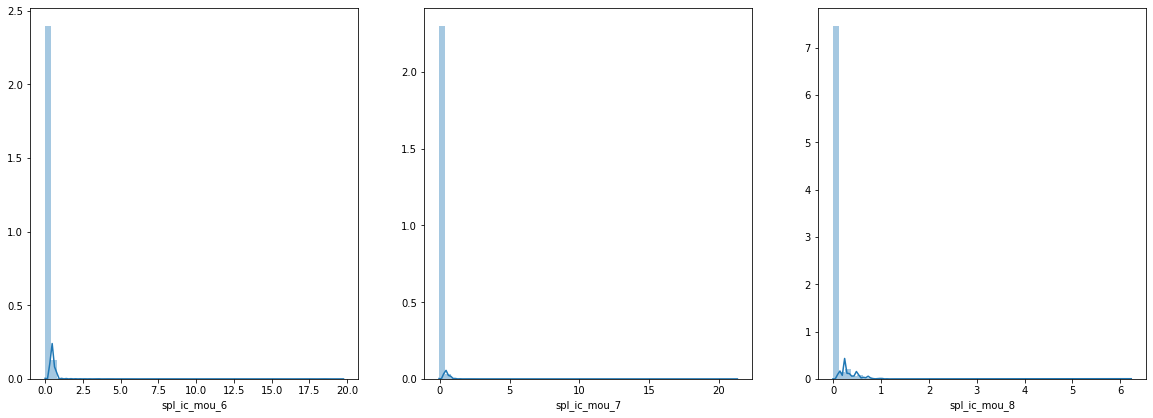

In [130]:
#spl_ic_mou
feature_col = df.filter(regex ='spl_ic_mou').columns
avg_mon_plot(df,feature_col,name = "spl_ic_mou")
plot_Churn_wise(df,feature_col,name = "spl_ic_mou")
feature = "spl_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- spl_ic_mou decreasing in July month  and increased in August.
- When we classfy using Churn then see that spl_ic_mou decreasing trend for Churn and non-Churn customer also constant decreasing.
- Also, data is skewed to Right side so will see after outlier treatment

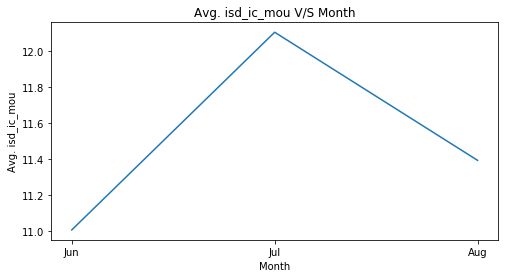

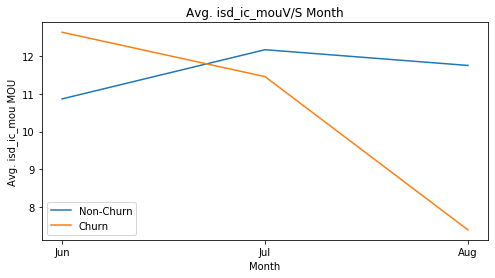

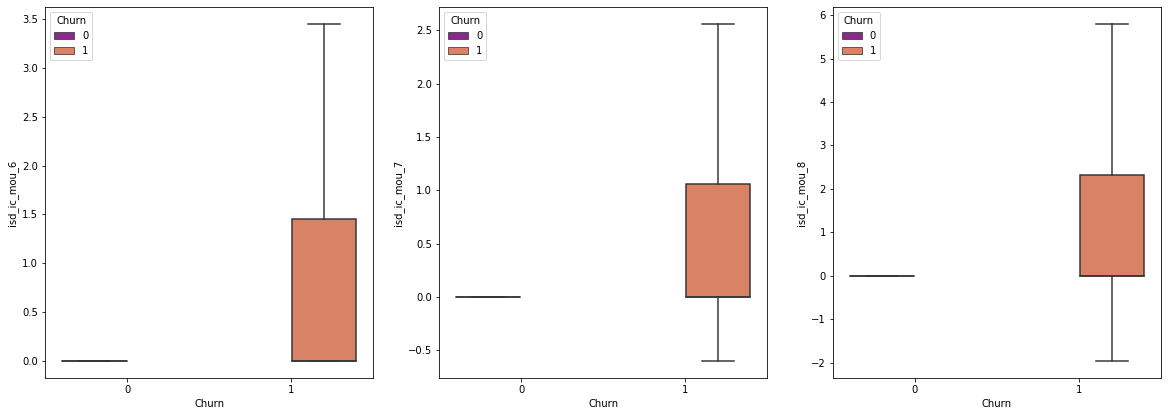

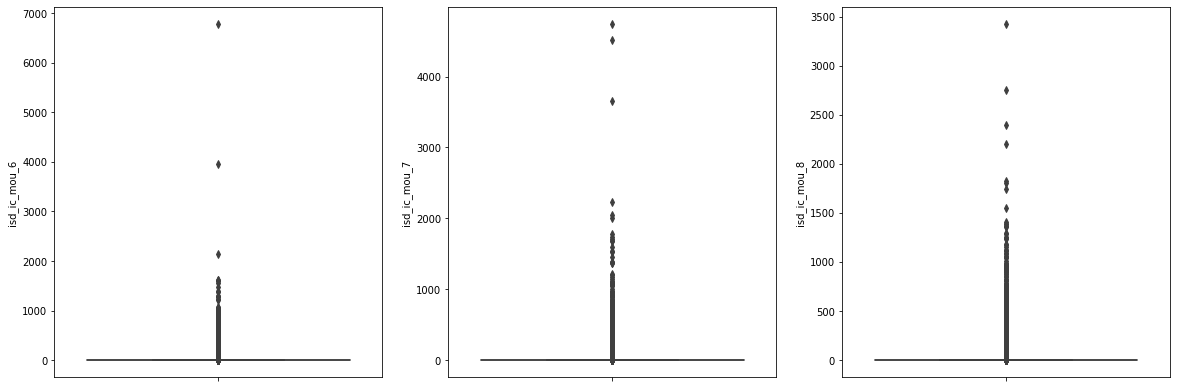

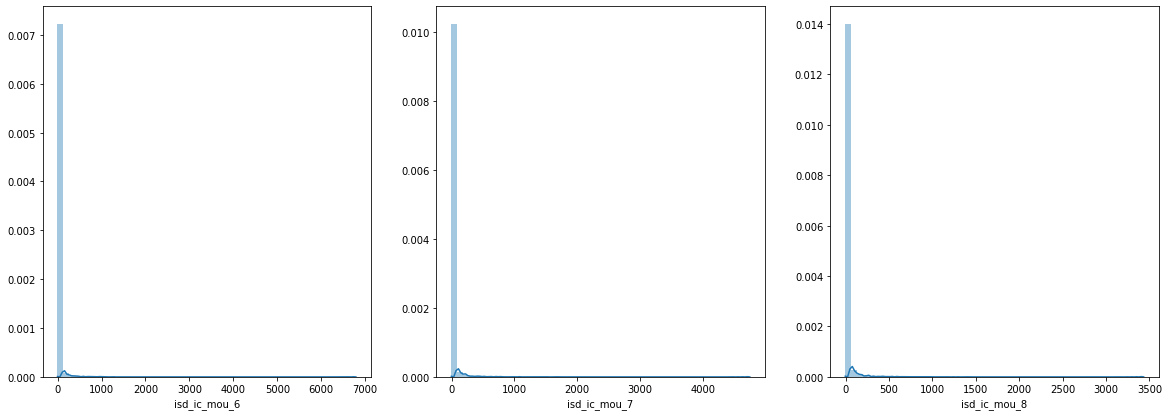

In [131]:
#isd_ic_mou
feature_col = df.filter(regex ='isd_ic_mou').columns
avg_mon_plot(df,feature_col,name = "isd_ic_mou")
plot_Churn_wise(df,feature_col,name = "isd_ic_mou")
feature = "isd_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- isd_ic_mou is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that isd_ic_mou decreasing trend.
- Also, data is skewed to Right side so will see after outlier treatment.

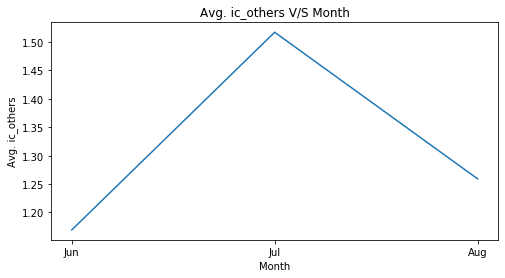

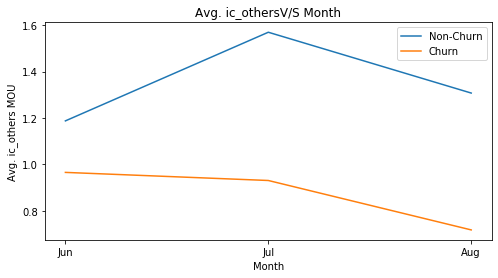

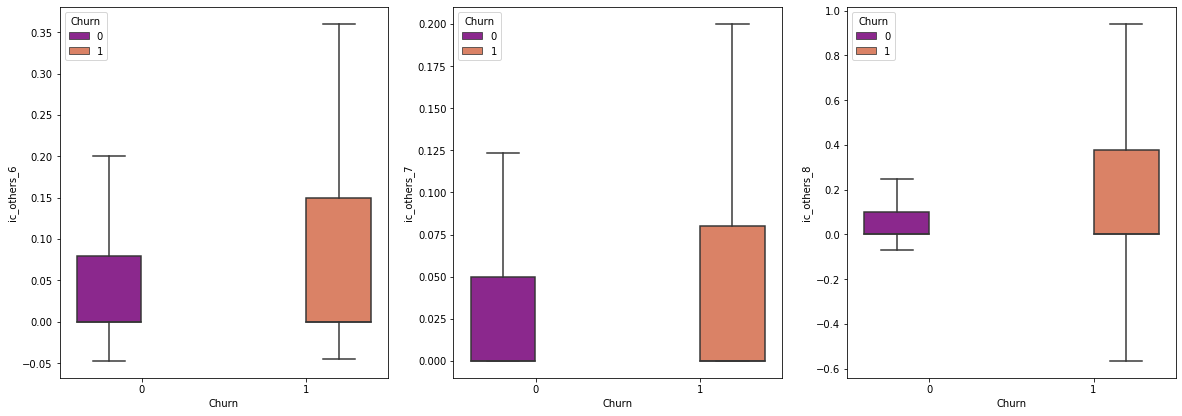

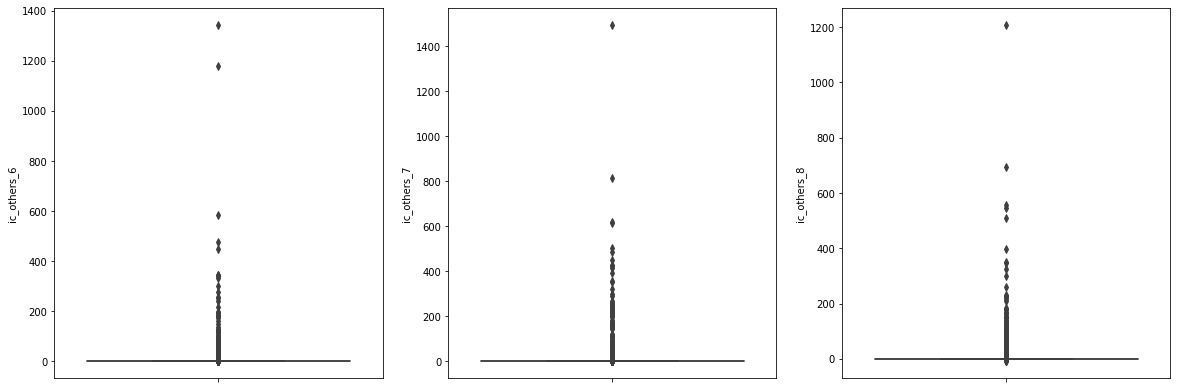

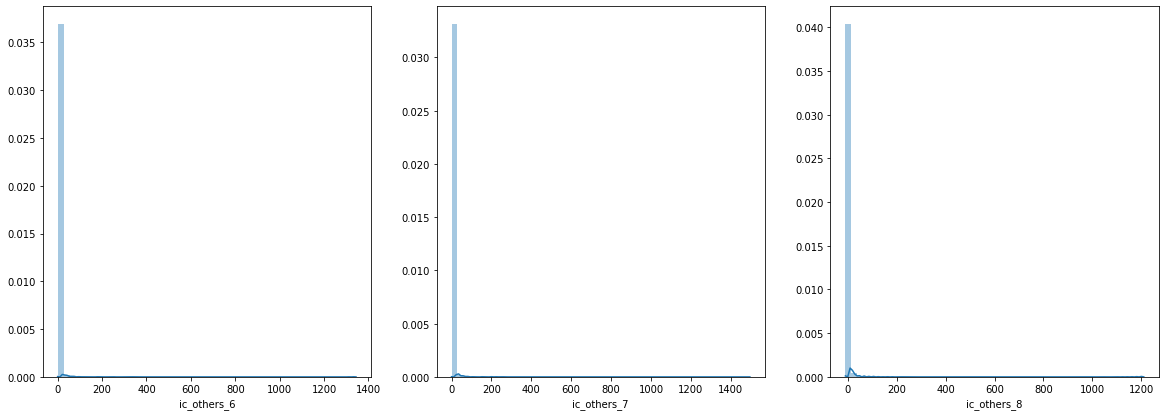

In [132]:
#ic_others
feature_col = df.filter(regex ='ic_others').columns
avg_mon_plot(df,feature_col,name = "ic_others")
plot_Churn_wise(df,feature_col,name = "ic_others")
feature = "ic_others"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

## Inference - 
- ic_others is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that ic_others decreasing trend.
- Also, data is skewed to Right side so will see after outlier treatment.

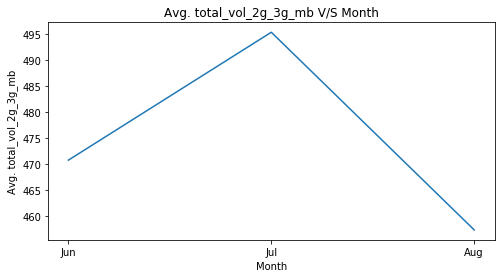

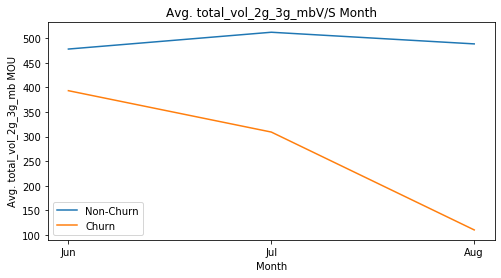

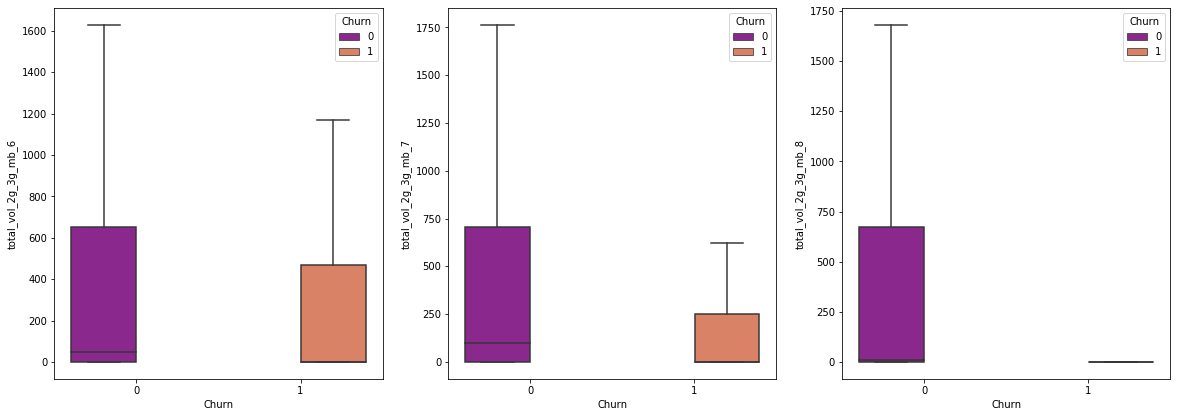

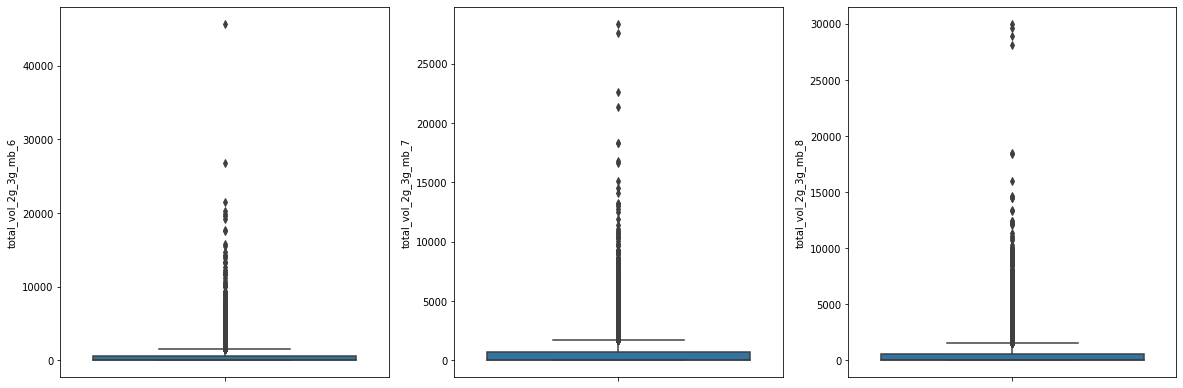

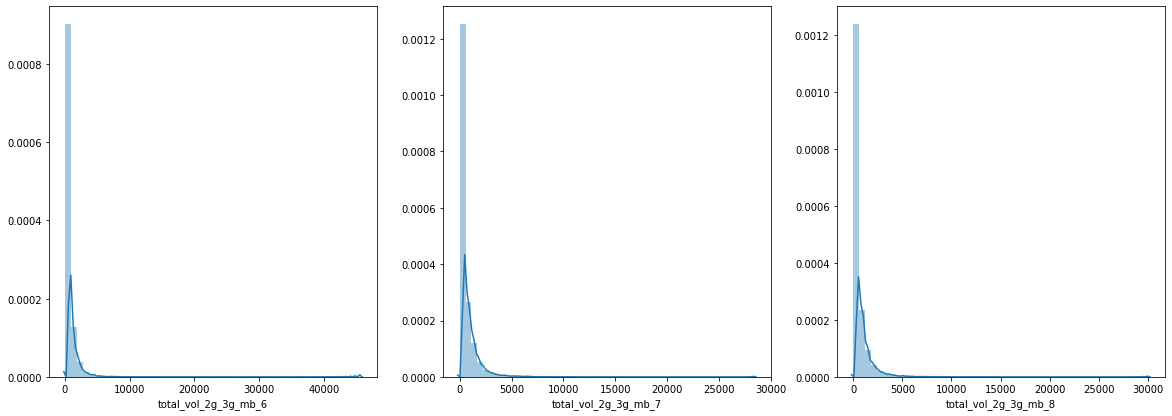

In [133]:
#total_vol_2g_3g_mb
feature_col = df.filter(regex ='total_vol_2g_3g_mb').columns
avg_mon_plot(df,feature_col,name = "total_vol_2g_3g_mb")
plot_Churn_wise(df,feature_col,name = "total_vol_2g_3g_mb")
feature = "total_vol_2g_3g_mb"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)


## Inference - 
- total_vol_2g_3g_mb is increasing constantly till july and dropped in August.
- When we did classfy using Churn wise then see that total_vol_2g_3g_mb decreasing trend.
- Also, data is skewed to Right side so will see after outlier treatment.

# Categorical Columns -  EDA

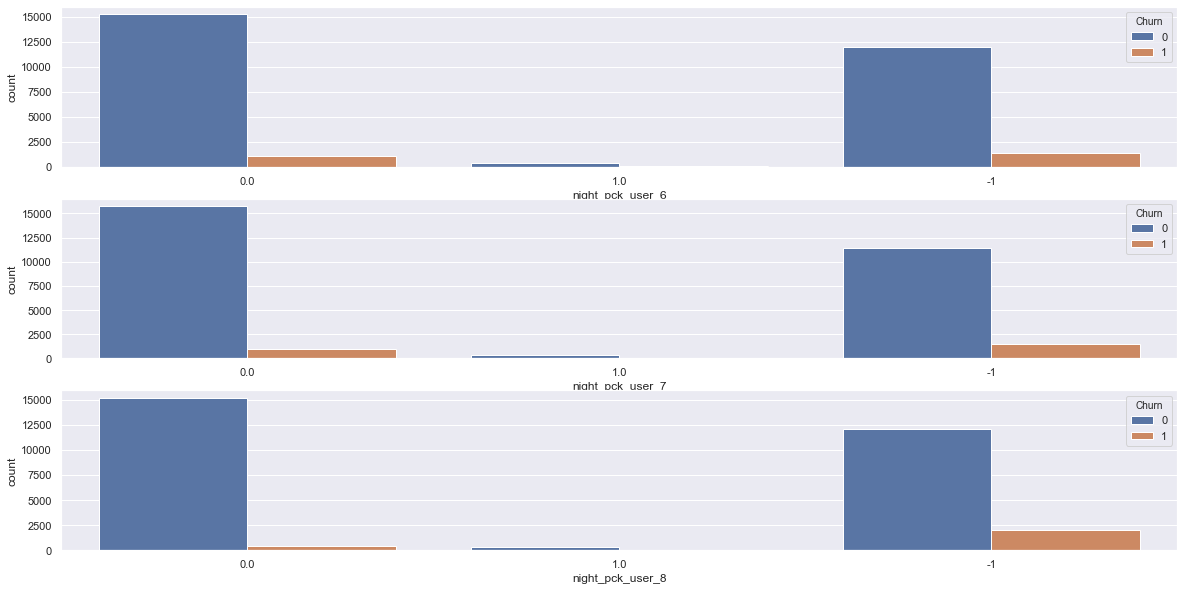

In [134]:
# night_pck_user
feature = "night_pck_user"
count_plot(feature)

## Inference - 
- night_pck_user category 0 has maximum churn in month of 6 and 7
- night_pck_user category -1 has maximum churn in month of 6 and 7

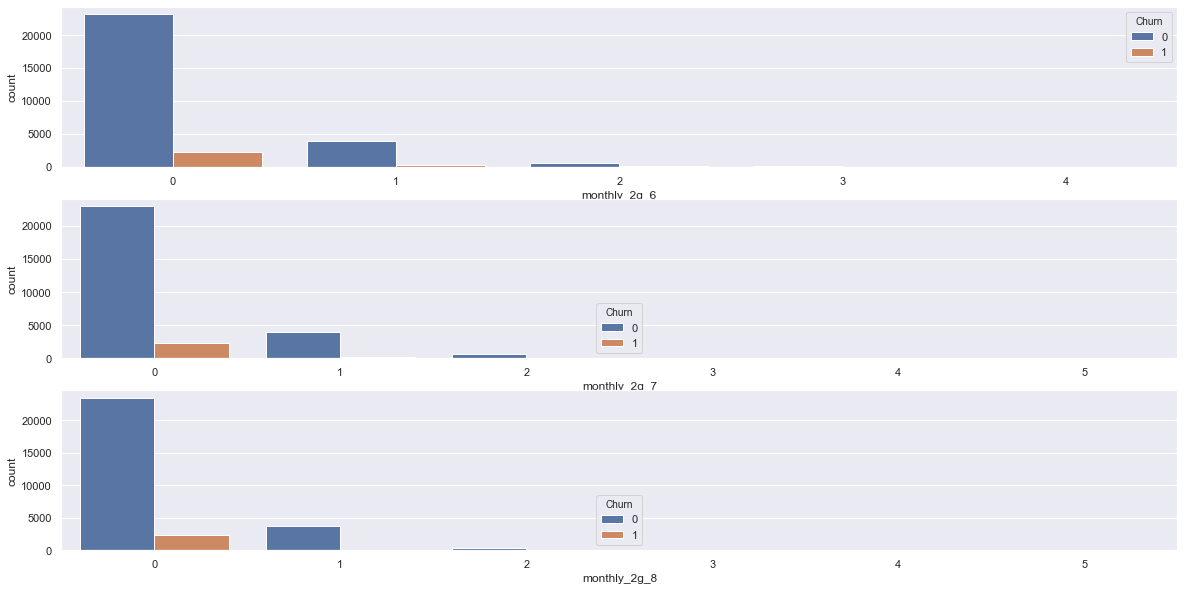

In [135]:
# monthly_2g
feature = "monthly_2g"
count_plot(feature)

## Inference - 
- monthly_2g  category 0 has maximum churn in all month

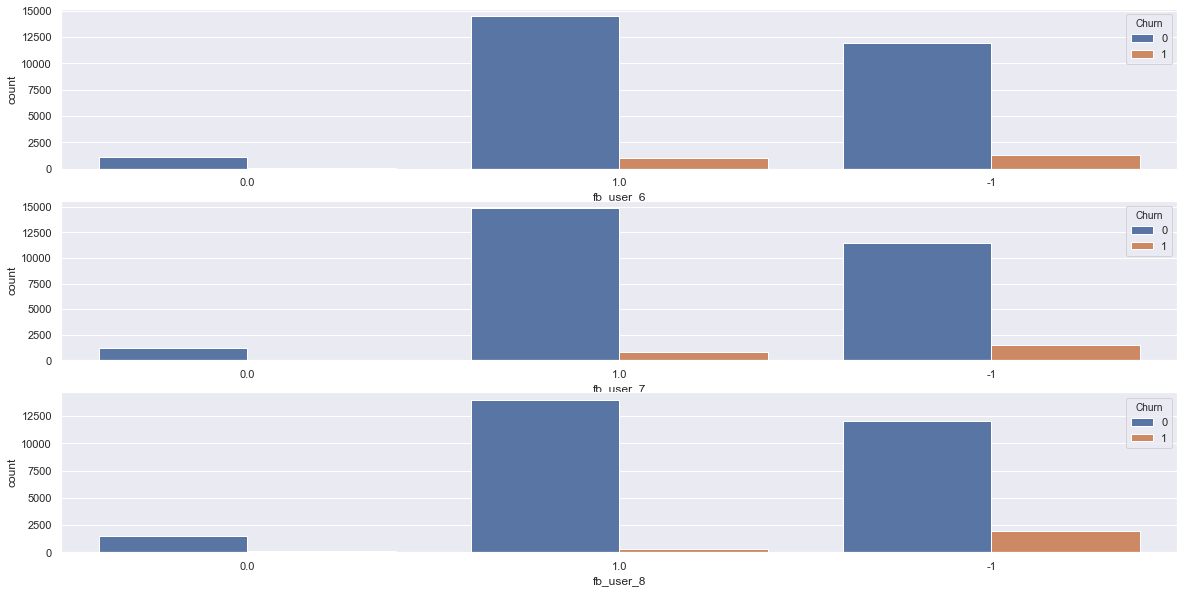

In [136]:
# fb_user
feature = "fb_user"
count_plot(feature)

## Inference - 
- fb_user category -1 has maximum churn in given all month

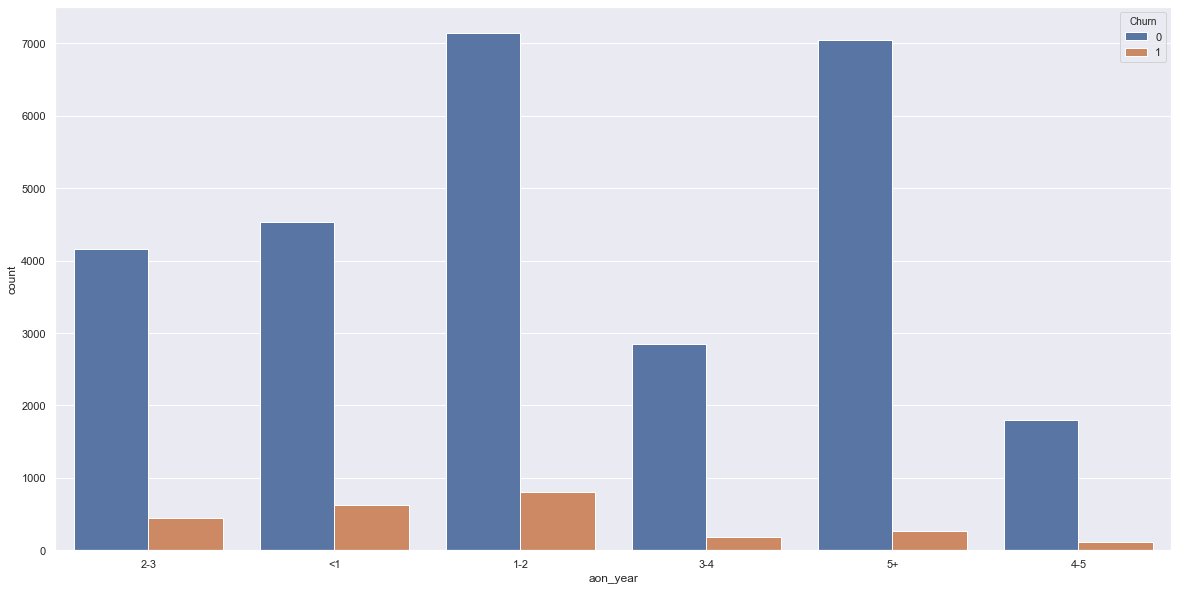

In [137]:
#aon_year
sns.countplot(df["aon_year"], hue = df["Churn"])

## Inference - 
- aon_year less that 1 year and 1-2 year and 2-3 year : Maximum churn

# Outlier Treatment

In [138]:
# let cap the numerical columns data- As we have to treat outlier 
numerical_col = [col for col in df.columns if df[col].dtype.name!="category" and df[col].dtype.name!="object" and col not in ["mobile_number","Churn"]]
numerical_col 

['arpu_6',
 'arpu_7',
 'arpu_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sache

In [139]:
# lets check the statiscal part of the data
df[numerical_col].describe(percentiles = [0.1,0.25,0.50,0.75,0.95,0.99])

arpu_6        arpu_7        arpu_8  total_og_mou_6  \
count  30001.000000  30001.000000  30001.000000    30001.000000   
mean     558.490824    560.782203    508.597957      609.866251   
std      460.640461    479.776947    501.961981      690.873430   
min    -2258.709000  -2014.045000   -945.808000        0.000000   
10%      171.605000    177.886000     84.000000       10.760000   
25%      309.865000    309.826000    231.473000      116.580000   
50%      481.694000    480.943000    427.585000      410.630000   
75%      699.943000    698.315000    661.491000      858.760000   
95%     1240.964000   1261.272000   1255.019000     1913.480000   
99%     1985.115000   1999.500000   1986.622000     3195.290000   
max    27731.088000  35145.834000  33543.624000    10674.030000   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
count    30001.000000    30001.000000    30001.000000    30001.000000   
mean       628.366047      551.678812      289.950496      296.756987   
std        717.219171      700.478180      365.523475      373.747232   
min          0.000000        0.000000        0.000000        0.000000   
10%         10.080000        0.210000       18.190000       22.210000   
25%        116.490000       72.360000       72.880000       78.990000   
50%        425.590000      333.540000      183.730000      187.580000   
75%        891.440000      774.780000      371.990000      377.310000   
95%       1951.760000     1857.080000      922.080000      929.310000   
99%       3280.960000     3219.810000     1736.010000     1801.410000   
max      11365.310000    14043.060000     7716.140000     7442.860000   

       total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count    30001.000000      30001.000000      30001.000000      30001.000000   
mean       279.922931         11.851005         11.718843          9.972868   
std        361.175175          9.429132          9.432418          9.274370   
min          0.000000          0.000000          0.000000          0.000000   
10%          6.250000          4.000000          4.000000          2.000000   
25%         61.360000          6.000000          6.000000          4.000000   
50%        173.110000          9.000000          9.000000          8.000000   
75%        361.730000         15.000000         15.000000         13.000000   
95%        915.690000         29.000000         29.000000         28.000000   
99%       1725.940000         47.000000         48.000000         45.000000   
max       6066.630000        307.000000        138.000000        196.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count      30001.000000      30001.000000      30001.000000    30001.000000   
mean         660.732342        660.498017        584.365454      169.284824   
std          561.032865        582.430876        611.245907      175.315958   
min            0.000000          0.000000          0.000000        0.000000   
10%          195.000000        192.000000         56.000000       37.000000   
25%          360.000000        352.000000        250.000000      110.000000   
50%          566.000000        562.000000        490.000000      120.000000   
75%          834.000000        831.000000        776.000000      200.000000   
95%         1480.000000       1510.000000       1490.000000      459.000000   
99%         2376.000000       2427.000000       2341.000000     1000.000000   
max        35190.000000      40335.000000      45320.000000     4010.000000   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    30001.000000    30001.000000        30001.000000        30001.000000   
mean       172.201727      160.144462          100.893604          100.356021   
std        181.390742      173.207799          143.737572          140.925669   
min          0.000000        0.000000            0.000000            0.000000   
10%         36.000000       

In [140]:
# lets do the capping 
for col in numerical_col:
    Q1 = df[col].quantile(0.01)
    Q3 = df[col].quantile(0.99)
    IQR = Q3 - Q1
    df[col] = np.where(df[col] <(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),df[col])
    df[col] = np.where(df[col] >(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[col])  

In [141]:
# lets check the statistical data after treatment
df[numerical_col].describe(percentiles = [0.1,0.25,0.50,0.75,0.95,0.99])

arpu_6        arpu_7        arpu_8  total_og_mou_6  \
count  30001.000000  30001.000000  30001.000000    30001.000000   
mean     555.920205    558.023433    505.624371      609.760057   
std      402.081063    404.747929    426.122646      689.557947   
min    -2258.709000  -2014.045000   -945.808000        0.000000   
10%      171.605000    177.886000     84.000000       10.760000   
25%      309.865000    309.826000    231.473000      116.580000   
50%      481.694000    480.943000    427.585000      410.630000   
75%      699.943000    698.315000    661.491000      858.760000   
95%     1240.964000   1261.272000   1255.019000     1913.480000   
99%     1985.115000   1999.500000   1986.622000     3195.290000   
max     4961.287500   4997.700000   4966.555000     7988.225000   

       total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
count    30001.000000    30001.000000    30001.000000    30001.000000   
mean       628.252111      551.054670      289.500901      296.348614   
std        715.781458      691.668807      359.182077      367.982289   
min          0.000000        0.000000        0.000000        0.000000   
10%         10.080000        0.210000       18.190000       22.210000   
25%        116.490000       72.360000       72.880000       78.990000   
50%        425.590000      333.540000      183.730000      187.580000   
75%        891.440000      774.780000      371.990000      377.310000   
95%       1951.760000     1857.080000      922.080000      929.310000   
99%       3280.960000     3219.810000     1736.010000     1801.410000   
max       8202.400000     8049.525000     4340.025000     4503.525000   

       total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count    30001.000000      30001.000000      30001.000000      30001.000000   
mean       279.693315         11.841305         11.718126          9.968034   
std        358.204495          9.249594          9.423625          9.206296   
min          0.000000          0.000000          0.000000          0.000000   
10%          6.250000          4.000000          4.000000          2.000000   
25%         61.360000          6.000000          6.000000          4.000000   
50%        173.110000          9.000000          9.000000          8.000000   
75%        361.730000         15.000000         15.000000         13.000000   
95%        915.690000         29.000000         29.000000         28.000000   
99%       1725.940000         47.000000         48.000000         45.000000   
max       4314.850000        116.000000        118.500000        112.500000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count      30001.000000      30001.000000      30001.000000    30001.000000   
mean         657.536349        657.146462        580.688327      168.987800   
std          485.209394        493.433883        512.510760      170.615291   
min            0.000000          0.000000          0.000000        0.000000   
10%          195.000000        192.000000         56.000000       37.000000   
25%          360.000000        352.000000        250.000000      110.000000   
50%          566.000000        562.000000        490.000000      120.000000   
75%          834.000000        831.000000        776.000000      200.000000   
95%         1480.000000       1510.000000       1490.000000      459.000000   
99%         2376.000000       2427.000000       2341.000000     1000.000000   
max         5940.000000       6067.500000       5852.500000     2500.000000   

       max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
count    30001.000000    30001.000000        30001.000000        30001.000000   
mean       171.940335      159.628262          100.313573           99.923286   
std        177.440207      164.717163          134.725494          134.355758   
min          0.000000        0.000000            0.000000            0.000000   
10%         36.000000       

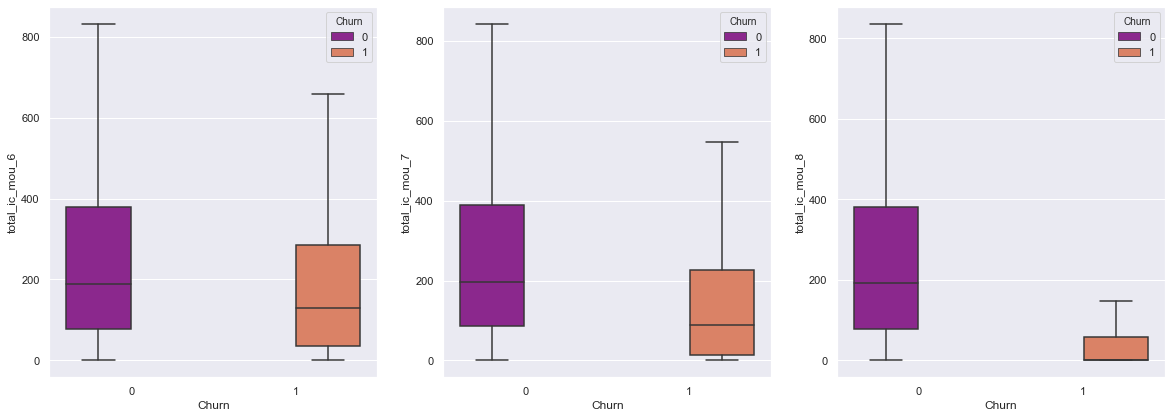

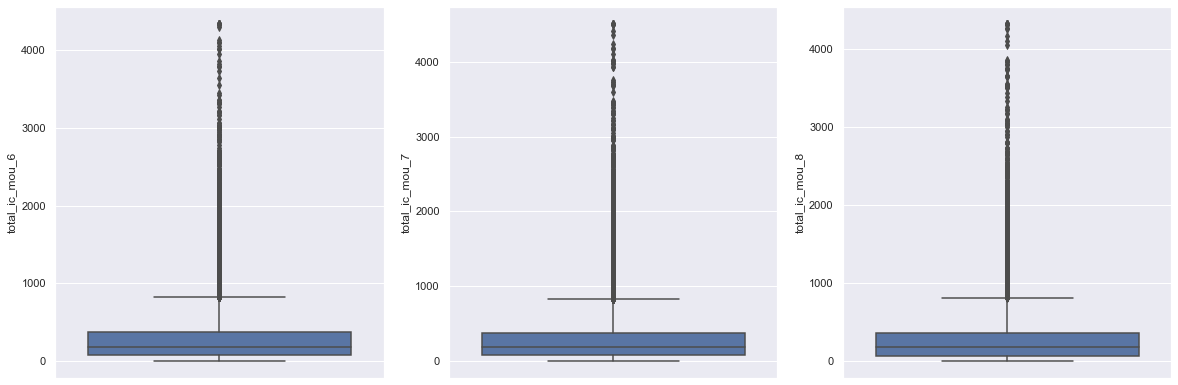

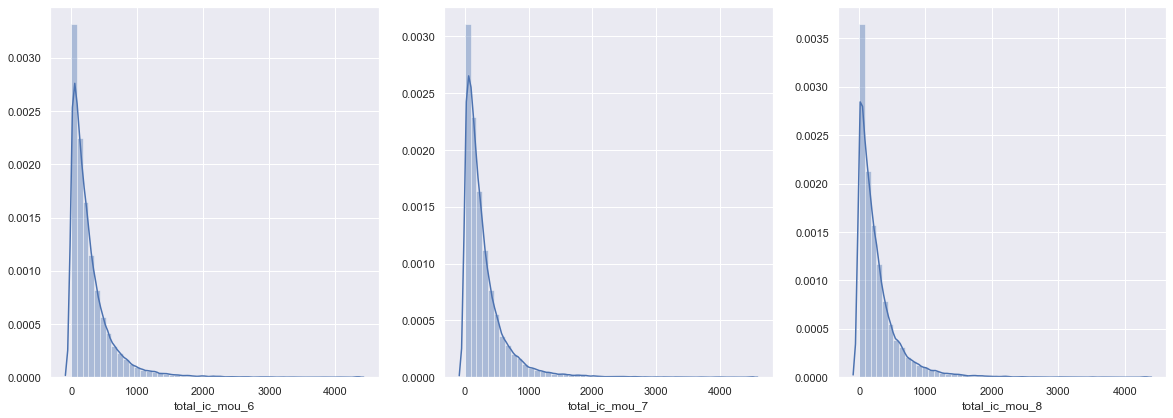

In [142]:
# lets check one feature after outlier treatment
feature = "total_ic_mou"
box_chart_churnwise(feature)
Outlier_box_plot(feature)
hist_plot(feature)

In [143]:
# lets check the categorical columns name 
categorical_col = [col for col in df.columns if df[col].dtypes=="object" or df[col].dtype.name=="category"]
categorical_col

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon_year']

# Dummy Variable creation
- Data preparation before model building

In [144]:
# lets create the dummy variable 
dummy = pd.get_dummies(df[categorical_col], drop_first = True)
dummy.head()

night_pck_user_6_1.0  night_pck_user_6_-1  night_pck_user_7_1.0  \
0                      0                    0                     0   
7                      0                    1                     0   
8                      0                    1                     0   
21                     0                    1                     0   
23                     0                    1                     0   

    night_pck_user_7_-1  night_pck_user_8_1.0  night_pck_user_8_-1  \
0                     0                     0                    0   
7                     1                     0                    1   
8                     0                     0                    0   
21                    1                     0                    1   
23                    0                     0                    0   

    monthly_2g_6_1  monthly_2g_6_2  monthly_2g_6_3  monthly_2g_6_4  \
0                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
21               0               0               0               0   
23               0               0               0               0   

    monthly_2g_7_1  monthly_2g_7_2  monthly_2g_7_3  monthly_2g_7_4  \
0                0               0               0               0   
7                0               0               0               0   
8                1               0               0               0   
21               0               0               0               0   
23               0               0               0               0   

    monthly_2g_7_5  monthly_2g_8_1  monthly_2g_8_2  monthly_2g_8_3  \
0                0               0               0               0   
7                0               0               0               0   
8                0               0               0               0   
21               0               0               0               0   
23               0               0               0               0   

    monthly_2g_8_4  monthly_2g_8_5  fb_user_6_1.0  fb_user_6_-1  \
0                0               0              1             0   
7                0               0              0             1   
8                0               0              0             1   
21               0               0              0             1   
23               0               0              0             1   

    fb_user_7_1.0  fb_user_7_-1  fb_user_8_1.0  fb_user_8_-1  aon_year_2-3  \
0               1             0              1             0             1   
7               0             1              0             1             1   
8               1             0              1             0             0   
21              0             1              0             1             0   
23              1             0              1             0             0   

    aon_year_3-4  aon_year_4-5  aon_year_5+  aon_year_<1  
0              0             0            0            0  
7              0             0            0            0  
8              0             0            0            1  
21             0             0            0            0  
23             0             0            0            0

In [145]:
# lets concat df with Dummy variable which we crated with original dataframe
df = pd.concat([df, dummy], axis=1)

In [146]:
# lets drop the categorical col which we have created dummy variable 
df.drop(categorical_col, axis=1, inplace = True)

In [147]:
# lets check the dataframe
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  total_og_mou_6  \
0      7000842753   197.385   214.816   213.803            0.00   
7      7000701601  1069.180  1349.850  3171.480          487.53   
8      7001524846   378.721   492.223   137.362          508.36   
21     7002124215   514.453   597.753   637.760          860.34   
23     7000887461    74.350   193.897   366.966          134.38   

    total_og_mou_7  total_og_mou_8  total_ic_mou_6  total_ic_mou_7  \
0             0.00            0.00            0.00            0.00   
7           609.24          350.16          626.46          558.04   
8           431.66          171.56          103.86           28.49   
21         1028.79         1068.54          207.09          131.89   
23          140.04          239.48          119.58          222.89   

    total_ic_mou_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0             5.44               4.0               3.0               2.0   
7           428.74               5.0               5.0               7.0   
8            16.54              19.0              21.0              14.0   
21          261.04              22.0              26.0              27.0   
23          298.33               3.0               5.0               4.0   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0              362.0             252.0             252.0           252.0   
7             1580.0             790.0            3638.0          1580.0   
8              437.0             601.0             120.0            90.0   
21             600.0             680.0             718.0            50.0   
23               0.0             454.0             439.0             0.0   

    max_rech_amt_7  max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0            252.0           252.0               252.0               252.0   
7            790.0          1580.0                 0.0                 0.0   
8            154.0            30.0                50.0                 0.0   
21            50.0            50.0                30.0                20.0   
23           179.0           179.0                 0.0               179.0   

    last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  \
0                252.0                1.0                1.0   
7                779.0                0.0                0.0   
8                 10.0                0.0                2.0   
21                50.0                0.0                0.0   
23                 0.0                0.0                2.0   

    total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0                 1.0            252.0            252.0            252.0   
7                 0.0              0.0              0.0              0.0   
8                 3.0              0.0            154.0             23.0   
21                0.0              0.0              0.0              0.0   
23                2.0              0.0            179.0            179.0   

    count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0               0.0              0.0              0.0              1.0   
7               0.0              0.0              0.0              0.0   
8               0.0              2.0              3.0              0.0   
21              0.0              0.0              0.0              0.0   
23              0.0              0.0              0.0              0.0   

    count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0               1.0              1.0               252.0               252.0   
7               0.0              0.0                 0.0                 0.0   
8               0.0              0.0                 0.0               177.0   
21              0.0              0.0                 0.0                 0.0   
23              2.0              2.0                 0.0               356.0   

    av_rech_amt_data_8  vol_2

In [148]:
# lets check the shape of data frame
df.shape

(30001, 177)

# Train and Test split

In [149]:
# let store the independent feature data to X and Dependent data to y
X = df.drop(["mobile_number","Churn"], axis=1)
y = df.Churn

In [150]:
# lets check the shape of X
X.shape

(30001, 175)

In [151]:
# lets check shape of y - dependent feature
y.shape

(30001,)

In [152]:
# train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=42,stratify=y)


In [153]:
# after train test split - check the X_train shape
X_train.shape

(21000, 175)

In [154]:
# scaling the data
# lets initiliaze the StandardScaler package
scaler = StandardScaler()

# lets scale the data
X_train[numerical_col]= scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.transform(X_test[numerical_col])

In [155]:
# lets check the shape of Train and Test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 175)
(9001, 175)
(21000,)
(9001,)


# Data Imbalance Treatment via SMOTE

In [156]:
# Before the data imbalaance treatment - lets check the count

print("Before oversampling - count of 1: {}".format(sum(y_train==1)))
print("Before oversampling - count of 0: {}".format(sum(y_train==0)))
print("Rate of Churn {}".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before oversampling - count of 1: 1709
Before oversampling - count of 0: 19291
Rate of Churn 8.14


In [157]:
# lets apply the SMOTE - Imbalanced Data Handling Techniques

# initialize the SMOTE
sm = SMOTE(random_state=50)

# fit the data 
X_train_res,y_train_res = sm.fit_sample(X_train, y_train)

In [158]:
# lets check the count after apllying the SMOTE
print("After oversampling - count of 1 : {}".format(sum(y_train_res==1)))
print("After oversampling - count of 0 : {}".format(sum(y_train_res==0)))
print("Rate of Churn {}".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After oversampling - count of 1 : 19291
After oversampling - count of 0 : 19291
Rate of Churn 50.0


In [159]:
# lets check the shape 
print("Train\n")
print(X_train.shape)
print(y_train.shape)

print("Test\n")
print(X_test.shape)
print(y_test.shape)

Train

(21000, 175)
(21000,)
Test

(9001, 175)
(9001,)


<a id="6"></a>
# 6. Principal Component Analysis (PCA)

- Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.

In [160]:
# lets initialize the PCA
pca = PCA(svd_solver="randomized", random_state=42)

In [161]:
# let apply the PCA of scalted trained data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [162]:
# pca.components_ : components_ is the set of all eigenvectors (aka loadings) for your projection space
#(one eigenvector for each principal component). Once you have the eigenvectors using pca.
pca.components_

array([[-6.27599143e-02, -4.73422946e-02, -7.26733449e-03, ...,
         9.85992026e-04,  8.17914466e-03,  3.68667601e-03],
       [ 1.69361971e-01,  1.98732125e-01,  1.95102198e-01, ...,
         3.47225165e-03,  1.87244319e-02, -2.97821549e-03],
       [ 7.54904750e-02,  7.71582380e-02,  3.51973469e-02, ...,
        -3.26929178e-03, -2.92401598e-02,  3.97382342e-03],
       ...,
       [ 0.00000000e+00,  5.84724985e-16, -1.17386106e-15, ...,
        -7.67105543e-16, -5.81630014e-17, -1.01831349e-15],
       [-0.00000000e+00, -1.50070618e-17,  1.24731313e-17, ...,
         5.04457545e-17,  1.46185546e-17,  2.15120355e-17],
       [ 0.00000000e+00,  2.10480718e-17, -1.03063071e-17, ...,
         7.94176263e-17,  1.90374994e-17,  4.15135919e-18]])

In [163]:
# pca.explained_variance_ratio_ : - Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
pca.explained_variance_ratio_

array([1.21171401e-01, 9.64367636e-02, 6.25175098e-02, 5.36097033e-02,
       4.21874825e-02, 3.54803101e-02, 3.43563117e-02, 3.17726553e-02,
       2.88541735e-02, 2.24539398e-02, 2.09370313e-02, 1.95489100e-02,
       1.89105544e-02, 1.78486153e-02, 1.67499522e-02, 1.53649848e-02,
       1.46065101e-02, 1.37305042e-02, 1.32276559e-02, 1.27758110e-02,
       1.12194499e-02, 1.08232838e-02, 1.03535846e-02, 1.02641993e-02,
       9.86886304e-03, 9.17623694e-03, 8.94600694e-03, 8.41462054e-03,
       8.02231863e-03, 7.72096173e-03, 7.46426161e-03, 6.92573559e-03,
       6.81619765e-03, 6.40746631e-03, 6.32832831e-03, 6.01055018e-03,
       5.94827837e-03, 5.72045143e-03, 5.63832323e-03, 5.61539349e-03,
       5.50310202e-03, 5.11866293e-03, 5.04572355e-03, 4.91784685e-03,
       4.64116239e-03, 4.56656472e-03, 4.31467894e-03, 4.29571682e-03,
       4.07765786e-03, 3.97033478e-03, 3.80776428e-03, 3.79479289e-03,
       3.48056246e-03, 3.22977494e-03, 2.99716079e-03, 2.96519717e-03,
      

Text(0, 0.5, 'Variance Ratio')

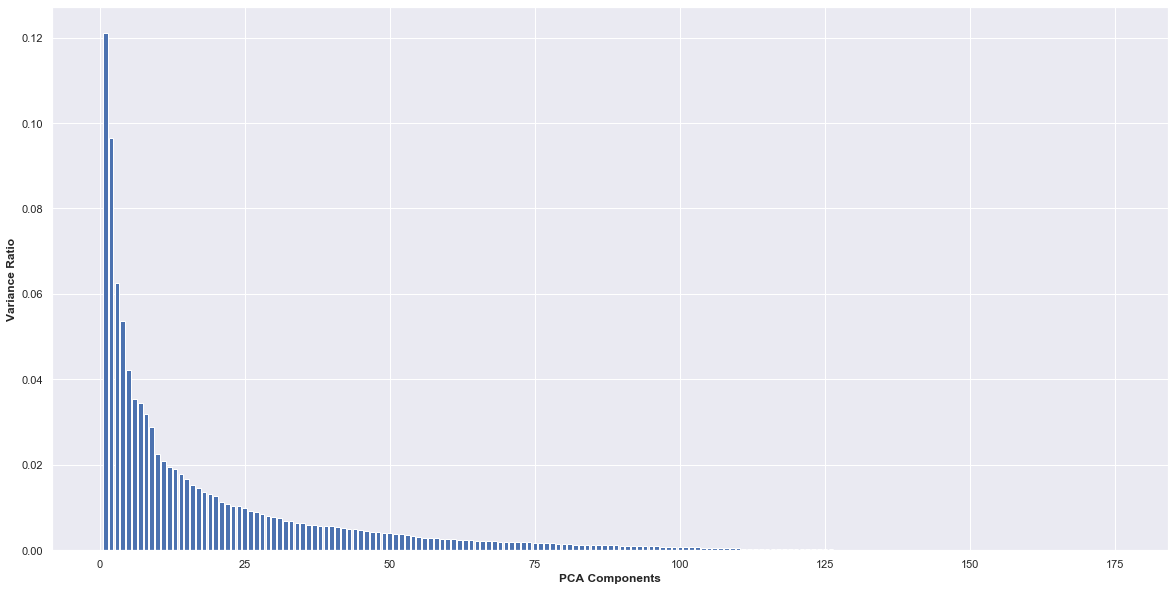

In [164]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize=(20,10))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')


In [165]:
# taking the cumulative sum of the elements and stored to var_cum
var_cum = np.cumsum(pca.explained_variance_ratio_)

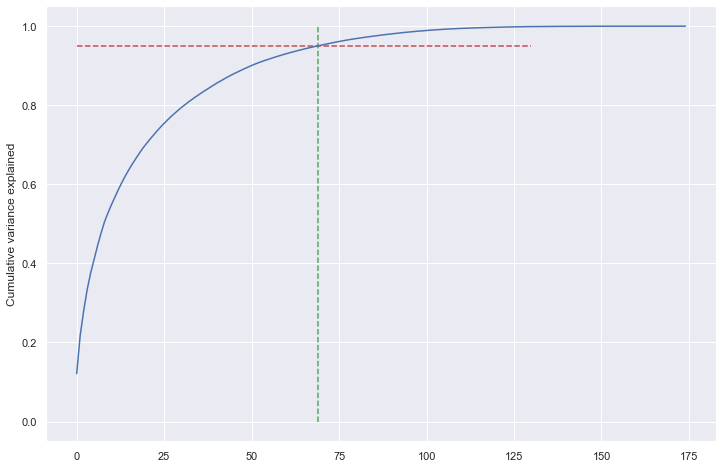

In [166]:
# dreawing the plot and will oberve how many components are explaing the 95% of data
plt.figure(figsize=[12,8])
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.vlines(x=69, ymax=1, ymin=0,colors="g",linestyles="--")
plt.hlines(y=.95,xmax=130,xmin=0,colors="r",linestyles="--")

##### 69 components are describing the 95% of the variance in the dataset. let choose the 69 components

### Incremental Principal Components Analysis (IPCA):

- Linear dimensionality reduction using Singular Value Decomposition of the data, keeping only the most significant singular vectors to project the data to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [167]:
# lets apply the IncrementalPCA on 69 data
pca_final = IncrementalPCA(n_components=69)

In [168]:
# final PCA on data 
df_pca_final = pca_final.fit_transform(X_train_res)

In [169]:
# elts check the shape of pca final
df_pca_final.shape

(38582, 69)

In [170]:
# lets define the columns
col_list = []
for i in range(1,70):
    col_list.append("PC-"+str(i))

In [171]:
# lets create the dataframe 
df_pca_final = pd.DataFrame(df_pca_final, columns = col_list)

# head part of the PCA data
df_pca_final.head()

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0 -3.175565  0.704988 -0.372379 -1.364416  0.042108  0.730723 -2.836347   
1  2.700804  1.530445  2.376420 -0.779437  0.066388 -1.440621 -0.424857   
2  1.394380 -4.973392  1.272795 -2.203016  1.783611 -0.222697  0.146012   
3  3.570042 -3.176478 -0.507012  0.065192 -0.460858 -0.391180  0.017337   
4 -1.258915 -2.840605 -0.100983  1.588740 -0.584978 -0.264378 -0.430535   

       PC-8      PC-9     PC-10     PC-11     PC-12     PC-13     PC-14  \
0 -0.965440 -0.294920 -0.106460  1.065199  0.513225 -1.244006  0.150297   
1  0.685087 -0.498835 -0.773316 -0.018617 -1.289494 -0.012897 -0.641516   
2 -0.561450  0.312610  0.671516 -0.912536  0.432293 -0.605281 -0.063306   
3 -0.856010 -0.664626 -0.591129  0.873564 -0.520827  0.645974 -0.054587   
4 -0.474043 -0.205431 -0.623275  0.872041  0.898768 -0.415526 -0.003400   

      PC-15     PC-16     PC-17     PC-18     PC-19     PC-20     PC-21  \
0 -2.880122 -0.373618  1.766749  0.300884  0.356094  0.348415  0.155684   
1 -0.471904  2.816888 -0.831499 -1.716044  0.933555  1.525982 -0.845641   
2 -0.904787 -0.386747 -0.061745 -0.135678  0.074635  0.064020 -0.251953   
3  0.076085  0.950317 -0.164738 -0.559755  0.772809 -0.342319  0.077804   
4 -1.249349 -0.114175  0.124088  0.005991  0.057135 -0.337957 -0.147382   

      PC-22     PC-23     PC-24     PC-25     PC-26     PC-27     PC-28  \
0 -0.562570 -0.593662  0.129738  2.508323  0.917009  0.928068 -0.689409   
1  0.115924 -1.279589  0.081828  0.185802 -0.852922  1.272724 -0.670533   
2 -0.735049 -0.469599  0.171395  0.031485 -0.765394  0.031970  0.594387   
3  0.440738 -0.237052 -0.032059  0.103683 -0.524467 -0.466273 -0.216277   
4 -0.414350 -0.947725  0.254573  0.047300 -0.031440 -0.027663 -0.368313   

      PC-29     PC-30     PC-31     PC-32     PC-33     PC-34     PC-35  \
0 -0.282101  1.168730  0.994477  0.382238  0.067223 -1.279584 -0.591985   
1  0.854870 -0.447231  0.607625  0.510027  0.028204 -0.678846  0.577483   
2 -0.361152 -0.448011 -0.415518  0.017449 -0.394112  0.743092  0.194814   
3  0.015455 -0.131728  0.017672  0.020858  0.252347 -0.557862 -0.132610   
4 -0.030031  0.100932  0.539165 -0.201904  0.429752  0.980079  0.664089   

      PC-36     PC-37     PC-38     PC-39     PC-40     PC-41     PC-42  \
0 -0.248866 -1.015480  0.786272  0.509687  0.674847  1.382028 -0.015791   
1  0.232407  0.013880  0.385170  0.403439  1.011443  0.390986  0.082912   
2  0.276750  0.121885  0.605528 -0.209640  0.736136 -0.353556 -0.236784   
3 -0.402177  0.095575 -0.060677 -1.062135  0.788007 -0.900062  0.345907   
4  0.997034 -0.198509  0.023256  0.367321 -0.533720 -0.390776 -0.146889   

      PC-43     PC-44     PC-45     PC-46     PC-47     PC-48     PC-49  \
0 -0.038694 -0.024586 -0.314973 -0.682523  0.041690 -0.235820 -0.316390   
1 -0.007122  0.445241  0.297844  0.321978  0.808503  0.174551 -0.171493   
2  1.726003  0.411035  0.806502 -0.456349  0.436162 -0.302057  0.248064   
3 -0.164659  0.196048  0.458339 -0.194983 -0.265574  0.329359 -0.105867   
4  0.338765 -0.206789 -0.573962 -0.040971 -0.062009 -0.398825 -0.301459   

      PC-50     PC-51     PC-52     PC-53     PC-54     PC-55     PC-56  \
0  0.621297  0.631707  0.014082 -0.019726  0.197589 -0.062400 -0.456410   
1 -0.151243  0.058309 -0.265588 -0.179349 -0.217957 -0.001571 -0.104294   
2 -0.641357 -0.533360  0.359042  0.001686 -0.305926  0.020192 -0.275589   
3 -0.618210  0.341424 -0.362236 -0.270029  0.019628 -0.195755  0.317511   
4  0.061646  0.644002 -0.156517 -0.357625 -0.144390  0.185319 -0.142370   

      PC-57     PC-58     PC-59     PC-60     PC-61     PC-62     PC-63  \
0  0.258605  0.231757 -0.207174 -0.145421  0.368250 -0.152090  0.549738   
1 -0.212457  0.089524  0.337020 -0.944821  0.245965  0.005173  0.351711   
2 -0.097788 -0.151180  0.075738  0.234371 -0.287797 -0.157852 -0.108817   
3 -0.063523 -0.036504 -0.001653 -0.048728 -0.110300  0.064903  0.092565   
4 -0.187840 -0.004096  0

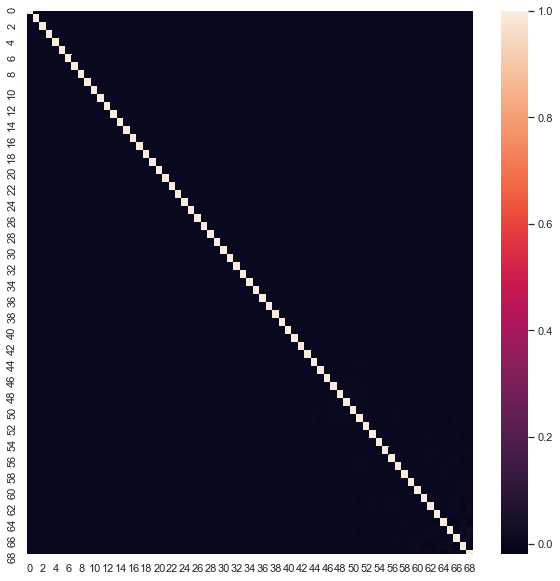

In [172]:
# the correlation coefficient of new final PCA dataset and values should be zero
corr = np.corrcoef(df_pca_final.transpose())
plt.figure(figsize=(10,10))
sns.heatmap(corr)

## I can see the all the variables has no correlation as expected from PCA

In [173]:
# final PCA data and lets copy to X_train_pca for better nomenclature
X_train_pca = df_pca_final.copy()

# head data part of the copied
X_train_pca.head()

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0 -3.175565  0.704988 -0.372379 -1.364416  0.042108  0.730723 -2.836347   
1  2.700804  1.530445  2.376420 -0.779437  0.066388 -1.440621 -0.424857   
2  1.394380 -4.973392  1.272795 -2.203016  1.783611 -0.222697  0.146012   
3  3.570042 -3.176478 -0.507012  0.065192 -0.460858 -0.391180  0.017337   
4 -1.258915 -2.840605 -0.100983  1.588740 -0.584978 -0.264378 -0.430535   

       PC-8      PC-9     PC-10     PC-11     PC-12     PC-13     PC-14  \
0 -0.965440 -0.294920 -0.106460  1.065199  0.513225 -1.244006  0.150297   
1  0.685087 -0.498835 -0.773316 -0.018617 -1.289494 -0.012897 -0.641516   
2 -0.561450  0.312610  0.671516 -0.912536  0.432293 -0.605281 -0.063306   
3 -0.856010 -0.664626 -0.591129  0.873564 -0.520827  0.645974 -0.054587   
4 -0.474043 -0.205431 -0.623275  0.872041  0.898768 -0.415526 -0.003400   

      PC-15     PC-16     PC-17     PC-18     PC-19     PC-20     PC-21  \
0 -2.880122 -0.373618  1.766749  0.300884  0.356094  0.348415  0.155684   
1 -0.471904  2.816888 -0.831499 -1.716044  0.933555  1.525982 -0.845641   
2 -0.904787 -0.386747 -0.061745 -0.135678  0.074635  0.064020 -0.251953   
3  0.076085  0.950317 -0.164738 -0.559755  0.772809 -0.342319  0.077804   
4 -1.249349 -0.114175  0.124088  0.005991  0.057135 -0.337957 -0.147382   

      PC-22     PC-23     PC-24     PC-25     PC-26     PC-27     PC-28  \
0 -0.562570 -0.593662  0.129738  2.508323  0.917009  0.928068 -0.689409   
1  0.115924 -1.279589  0.081828  0.185802 -0.852922  1.272724 -0.670533   
2 -0.735049 -0.469599  0.171395  0.031485 -0.765394  0.031970  0.594387   
3  0.440738 -0.237052 -0.032059  0.103683 -0.524467 -0.466273 -0.216277   
4 -0.414350 -0.947725  0.254573  0.047300 -0.031440 -0.027663 -0.368313   

      PC-29     PC-30     PC-31     PC-32     PC-33     PC-34     PC-35  \
0 -0.282101  1.168730  0.994477  0.382238  0.067223 -1.279584 -0.591985   
1  0.854870 -0.447231  0.607625  0.510027  0.028204 -0.678846  0.577483   
2 -0.361152 -0.448011 -0.415518  0.017449 -0.394112  0.743092  0.194814   
3  0.015455 -0.131728  0.017672  0.020858  0.252347 -0.557862 -0.132610   
4 -0.030031  0.100932  0.539165 -0.201904  0.429752  0.980079  0.664089   

      PC-36     PC-37     PC-38     PC-39     PC-40     PC-41     PC-42  \
0 -0.248866 -1.015480  0.786272  0.509687  0.674847  1.382028 -0.015791   
1  0.232407  0.013880  0.385170  0.403439  1.011443  0.390986  0.082912   
2  0.276750  0.121885  0.605528 -0.209640  0.736136 -0.353556 -0.236784   
3 -0.402177  0.095575 -0.060677 -1.062135  0.788007 -0.900062  0.345907   
4  0.997034 -0.198509  0.023256  0.367321 -0.533720 -0.390776 -0.146889   

      PC-43     PC-44     PC-45     PC-46     PC-47     PC-48     PC-49  \
0 -0.038694 -0.024586 -0.314973 -0.682523  0.041690 -0.235820 -0.316390   
1 -0.007122  0.445241  0.297844  0.321978  0.808503  0.174551 -0.171493   
2  1.726003  0.411035  0.806502 -0.456349  0.436162 -0.302057  0.248064   
3 -0.164659  0.196048  0.458339 -0.194983 -0.265574  0.329359 -0.105867   
4  0.338765 -0.206789 -0.573962 -0.040971 -0.062009 -0.398825 -0.301459   

      PC-50     PC-51     PC-52     PC-53     PC-54     PC-55     PC-56  \
0  0.621297  0.631707  0.014082 -0.019726  0.197589 -0.062400 -0.456410   
1 -0.151243  0.058309 -0.265588 -0.179349 -0.217957 -0.001571 -0.104294   
2 -0.641357 -0.533360  0.359042  0.001686 -0.305926  0.020192 -0.275589   
3 -0.618210  0.341424 -0.362236 -0.270029  0.019628 -0.195755  0.317511   
4  0.061646  0.644002 -0.156517 -0.357625 -0.144390  0.185319 -0.142370   

      PC-57     PC-58     PC-59     PC-60     PC-61     PC-62     PC-63  \
0  0.258605  0.231757 -0.207174 -0.145421  0.368250 -0.152090  0.549738   
1 -0.212457  0.089524  0.337020 -0.944821  0.245965  0.005173  0.351711   
2 -0.097788 -0.151180  0.075738  0.234371 -0.287797 -0.157852 -0.108817   
3 -0.063523 -0.036504 -0.001653 -0.048728 -0.110300  0.064903  0.092565   
4 -0.187840 -0.004096  0

In [174]:
#Applying selected components to the test data also
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 69)

<a id="7"></a>
# 7. Model Building and Evaluation

# For the prediction of churn customers we will be fitting three models on PCA data and fitting one more model without PCA i.e. interpretable model

# We will select one which is the best predictor of churn. Models trained are,

## Non-interpretable model

1. Logistic Regression on PCA data
2. Decision Tree on PCA data
3. Random Forest on PCA data

## Interpretable model
1. Logistic Regression (interpretable model)


# 1. Logistic Regression on PCA data

In [175]:
# all the required lib are imported in first cell

# lets define the function for model evalaution before model building
def Evalution_parameter(y_true,y_pred,y_pred_prob,data):
    print("Below is Evaluation Parameter after Model fit for {} data-: \n".format(data))
    print("confusion metrics below :  \n {}".format(metrics.confusion_matrix(y_true, y_pred)))
    print("\nAccuracy score on {} data :-  {} \n".format(data ,round(metrics.accuracy_score(y_true,y_pred)*100,2)))
    sensitivity, specificity,_= sensitivity_specificity_support(y_true,y_pred, average='binary')
    print("Sensitivity: {} %".format(round(sensitivity*100,2)))
    print("Specificity: {} %\n".format(round(specificity*100,2)))
    print("Area under the ROC Curve-:  {} %".format(round(roc_auc_score(y_true, y_pred_prob)*100,2)))
    print("F1 Score -: {}".format(round(f1_score(y_true, y_pred, average='macro'),2)))


#### As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

In [176]:
# initialize the LogisticRegression
LR = LogisticRegression()

# let fit the train data on this LR model
LR.fit(X_train_pca,y_train_res)

LogisticRegression()

In [177]:
# lets predict the train data
y_train_pred = LR.predict(X_train_pca)

# lets check the top 10 predicted value
y_train_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [178]:
# lets check the model performance train data
y_pred_prob = LR.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_res, y_train_pred,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[15618  3673]
 [ 2819 16472]]

Accuracy score on Train data :-  83.17 

Sensitivity: 85.39 %
Specificity: 80.96 %

Area under the ROC Curve-:  89.93 %
F1 Score -: 0.83


# Inference - 
- Accuracy score on Train data is good
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve-:  89.93 % which is say this is good model

In [179]:
# prediction on test data
y_test_pred = LR.predict(X_test_pca)
y_test_pred[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [180]:
# lets check the model performance for test data
y_pred_prob = LR.predict_proba(X_test_pca)[:, 1]
Evalution_parameter(y_test, y_test_pred,y_pred_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[6710 1559]
 [ 138  594]]

Accuracy score on Test data :-  81.15 

Sensitivity: 81.15 %
Specificity: 81.15 %

Area under the ROC Curve-:  87.81 %
F1 Score -: 0.65


# Inference - 
- Accuracy score on test data is good
- We can see the good Sensitivity and Specificity on test data
- Area under the ROC Curve above 85% which is say model performing good on test data.
- Sensitivity and Specificity are balanced and seems this is good model

# Logistic Regression Model Tuning
 -  It can give you optimized values for hyperparameters, which maximizes your model's predictive accuracy.

In [181]:
# initialization LogisticRegression
LR = LogisticRegression()

# specify number of folds for k-fold CV
n_folds = KFold(n_splits=5, shuffle=True, random_state=4)

# parameters to build the model on
param_grid = [    
    {'penalty' : ['l1', 'l2','elasticnet','none'],
     'max_iter' : [1000,2500,5000],
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'C' : np.logspace(-4, 4,6)
    }
]

# fit tree on training data

LR_hyper = GridSearchCV(LR, param_grid = param_grid, cv = n_folds, verbose=True, n_jobs=-1,scoring='roc_auc')
LR_hyper.fit(X_train_pca,y_train_res)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  9.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 3.98107171e-03, 1.58489319e-01, 6.30957344e+00,
       2.51188643e+02, 1.00000000e+04]),
                          'max_iter': [1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='roc_auc', verbose=True)

In [182]:
# best_estimator_ for this model
LR_hyper.best_estimator_

LogisticRegression(C=251.18864315095823, max_iter=1000, solver='sag')

In [183]:
# predict train data
y_train_pred =  LR_hyper.predict(X_train_pca)

In [184]:
# lets check the model performance 
y_pred_prob = LR_hyper.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_res, y_train_pred ,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[15619  3672]
 [ 2819 16472]]

Accuracy score on Train data :-  83.18 

Sensitivity: 85.39 %
Specificity: 80.97 %

Area under the ROC Curve-:  89.93 %
F1 Score -: 0.83


# Inference - 
- Accuracy score on Train data is good
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve more than 85% which is say this is good model for train data

In [185]:
# predict on test data
y_test_pred = LR_hyper.predict(X_test_pca)

In [186]:
# lets check the model performance 
y_pred_prob = LR_hyper.predict_proba(X_test_pca)[:, 1]
Evalution_parameter(y_test, y_test_pred,y_pred_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[6711 1558]
 [ 138  594]]

Accuracy score on Test data :-  81.16 

Sensitivity: 81.15 %
Specificity: 81.16 %

Area under the ROC Curve-:  87.81 %
F1 Score -: 0.65


# Inference - 
- Accuracy score on Test data is good
- We can see the good Sensitivity and Specificity on test data
- Area under the ROC Curve more than 85% which is say this is good model for test data
- Without Hyperparameter tuning we are geting same result

# 2. Decision Trees on top of PCA 
- Decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions.

In [187]:
# Fitting the decision tree with default hyperparameters, apart from
dt_default = DecisionTreeClassifier()

# lets fit the model on train data
dt_default.fit(X_train_pca, y_train_res)

DecisionTreeClassifier()

In [188]:
# predictions
y_pred_default = dt_default.predict(X_train_pca)

In [189]:
# lets check the model performance 
y_pred_prob = dt_default.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_res,y_pred_default ,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[19291     0]
 [    0 19291]]

Accuracy score on Train data :-  100.0 

Sensitivity: 100.0 %
Specificity: 100.0 %

Area under the ROC Curve-:  100.0 %
F1 Score -: 1.0


# Inference - 
- Accuracy score on Train data is 100 percent as we have perform with default parameter and this make the model 100 percent perfect
- We can see the 100% Sensitivity and Specificity on train data
- Area under the ROC Curve 100% which means perfect model we got on train data

In [190]:
# predictions on test data
y_pred_test = dt_default.predict(X_test_pca)


In [191]:
# lets check the model performance 
y_pred_prob = LR_hyper.predict_proba(X_test_pca)[:, 1]
Evalution_parameter(y_test, y_pred_test,y_pred_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[7105 1164]
 [ 359  373]]

Accuracy score on Test data :-  83.08 

Sensitivity: 50.96 %
Specificity: 85.92 %

Area under the ROC Curve-:  87.81 %
F1 Score -: 0.62


# Inference - 
- Accuracy score on test data is good.
- We can see the bad Sensitivity and good Specificity on test data
- Area under the ROC Curve more than 85%
- But overall we dont have balance between Sensitivity and Specificity

### Let's do Hyperparameter tuning for the decision tree

- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [192]:
# specify number of folds for k-fold CV

n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'max_depth': range(1,20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)

tree.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [193]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.640907      0.040786         0.021832        0.003707   
1       1.465577      0.021026         0.034035        0.011709   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.640504           0.645209   
1               2  {'max_depth': 2}           0.728369           0.720639   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.654372         0.646695        0.005758               19   
1           0.729831         0.726280        0.004033               18   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.650529            0.647677            0.643570   
1            0.735365            0.725824            0.728171   

   mean_train_score  std_train_score  
0          0.647259         0.002857  
1          0.729787         0.004059

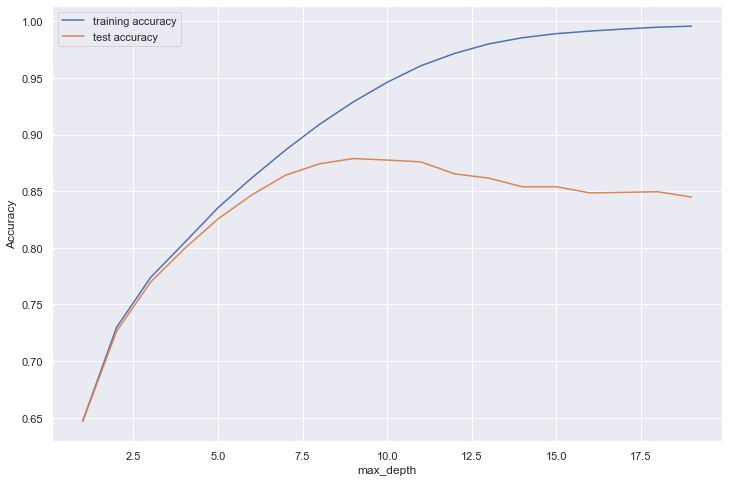

In [194]:
#Now let's visualize how trainchanges with max_depth.
# plotting accuracies with max_depth
plt.figure(figsize=(12,8))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 9, after which the test score gradually reduces. Note that the scores are average accuracies across the 3-folds. 

- Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - If int, then consider min_samples_split as the minimum number.
    - If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.

In [195]:
# specify number of folds for k-fold CV

n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
tree.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.8s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [196]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.360295      0.135077         0.033626        0.002952   
1       7.748372      0.124244         0.032861        0.003823   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.897808   
1                     25  {'min_samples_leaf': 25}           0.902430   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.887343           0.893521         0.892891        0.004296   
1           0.898311           0.905282         0.902008        0.002862   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.995575            0.995202   
1                1            0.962064            0.961811   

   split2_train_score  mean_train_score  std_train_score  
0            0.994979          0.995252         0.000246  
1            0.959821          0.961232         0.001003

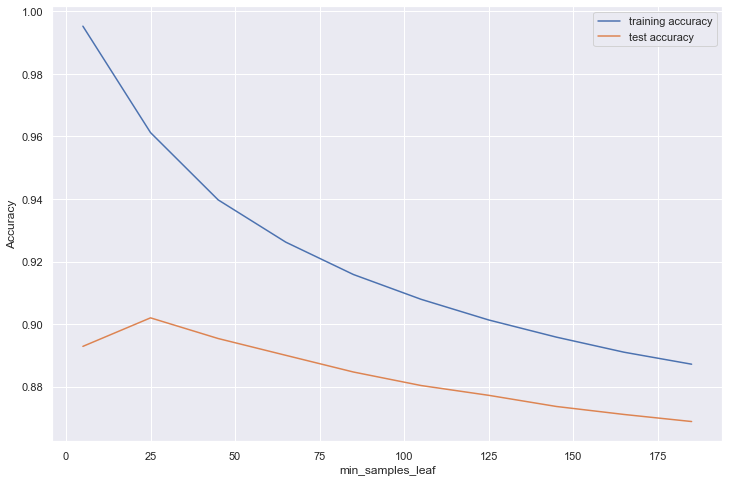

In [197]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize=(12,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


- This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

## Grid Search to Find Optimal Hyperparameters

- We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [198]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

#n_folds = 3
n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# fit tree on training data
grid_search= GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
#tree.fit(X_train_pca, y_train_res)
# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   47.4s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [199]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.543037      0.161952         0.050146        0.024550   
1       7.183612      0.139437         0.030276        0.001172   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.897808   
1                     25  {'min_samples_leaf': 25}           0.902430   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.887343           0.893521         0.892891        0.004296   
1           0.898311           0.905282         0.902008        0.002862   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.995575            0.995202   
1                1            0.962064            0.961811   

   split2_train_score  mean_train_score  std_train_score  
0            0.994979          0.995252         0.000246  
1            0.959821          0.961232         0.001003

In [200]:
# printing the optimal accuracy score and hyperparameters
print("Best accuracy", grid_search.best_score_)

print("\nBest Estimator:- \n")
print(grid_search.best_estimator_)

Best accuracy 0.9020076584026144

Best Estimator:- 

DecisionTreeClassifier(min_samples_leaf=25, random_state=100)


**Running the model with best parameters obtained from grid search.**

In [201]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9, 
                                  min_samples_leaf=25,)
clf_gini.fit(X_train_pca, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=25, random_state=100)

In [202]:
# predict on train data
y_pred_train = clf_gini.predict(X_train_pca)

In [203]:
# lets check the model performance 
y_pred_prob = clf_gini.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_res, y_pred_train,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[15754  3537]
 [ 2415 16876]]

Accuracy score on Train data :-  84.57 

Sensitivity: 87.48 %
Specificity: 81.67 %

Area under the ROC Curve-:  91.88 %
F1 Score -: 0.85


# Inference - 
- Accuracy score on Train data is good
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve more than 90% which is say this is good enough on train data

In [204]:
# prediction on test data
y_pred_test = clf_gini.predict(X_test_pca)

In [205]:
# lets check the model performance 
y_pred_prob = clf_gini.predict_proba(X_test_pca)[:, 1]
Evalution_parameter(y_test,y_pred_test ,y_pred_prob,"test")

Below is Evaluation Parameter after Model fit for test data-: 

confusion metrics below :  
 [[6517 1752]
 [ 202  530]]

Accuracy score on test data :-  78.29 

Sensitivity: 72.4 %
Specificity: 78.81 %

Area under the ROC Curve-:  80.51 %
F1 Score -: 0.61


# Inference - 
- Accuracy score on test data is not too good
- We can see the fair value of Sensitivity and Specificity on test data
- Area under the ROC Curve more than 80% which is say this is good value but not performing good for Sensitivity and Specificity

# Random Forest on PCA data
- **Random forest** is a supervised learning algorithm which is used for both classification as well as regression.Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

In [206]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [207]:
# fit the train data on rfc
rfc.fit(X_train_pca,y_train_res)

RandomForestClassifier()

In [208]:
# predictions on train 
y_pred= rfc.predict(X_train_pca)

In [209]:
# lets check the model performance 
y_pred_prob = rfc.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_res,y_pred,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[19291     0]
 [    0 19291]]

Accuracy score on Train data :-  100.0 

Sensitivity: 100.0 %
Specificity: 100.0 %

Area under the ROC Curve-:  100.0 %
F1 Score -: 1.0


# Inference - 
- Accuracy score on Train data is 100 percent as we have perform with default parameter and this make the model 100 percent perfect
- We can see the 100% Sensitivity and Specificity on train data
- Area under the ROC Curve 100% which means perfect model we got on train data

In [210]:
# predict on test data
y_pred_test = rfc.predict(X_test_pca)

In [211]:
# lets check the model performance 
y_pred_prob =rfc.predict_proba(X_test_pca)[:, 1]
Evalution_parameter(y_test, y_pred_test ,y_pred_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[7882  387]
 [ 379  353]]

Accuracy score on Test data :-  91.49 

Sensitivity: 48.22 %
Specificity: 95.32 %

Area under the ROC Curve-:  88.26 %
F1 Score -: 0.72


# Inference - 
- Accuracy score on test data is good.
- We can see the bad Sensitivity and good Specificity on test data
- Area under the ROC Curve more than 85%
- But overall we dont have balance between Sensitivity and Specificity

### Hyperparameter Tuning the Random Forest

- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [212]:
# specify number of folds for k-fold CV

n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

#parameter
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
rf.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.3min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [213]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.466973      0.101197         0.340684        0.043902   
1      33.482748      0.303608         0.422160        0.006745   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.855570           0.851683   
1               7  {'max_depth': 7}           0.928306           0.925325   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.867981         0.858411        0.006950                4   
1           0.932266         0.928632        0.002843                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.860531            0.859925            0.865820   
1            0.944005            0.944956            0.943976   

   mean_train_score  std_train_score  
0          0.862092         0.002648  
1          0.944312         0.000455

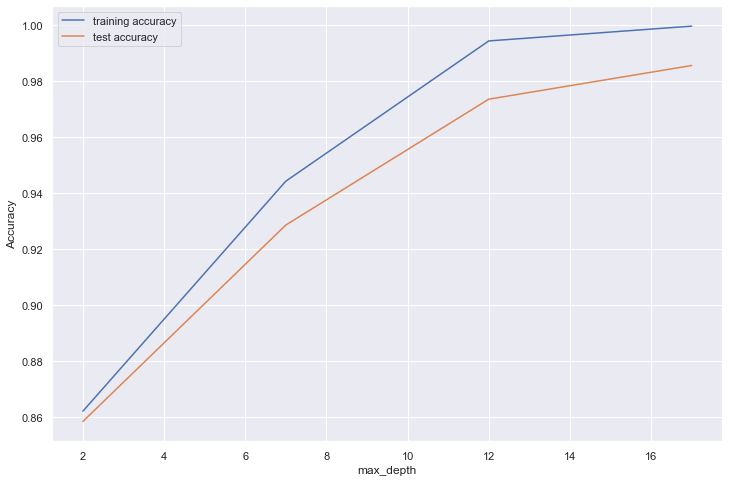

In [214]:
# plotting accuracies with max_depth
plt.figure(figsize=(12,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Inference
- You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

- Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [215]:
# specify number of folds for k-fold CV

n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'n_estimators': range(10, 300, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=12)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
rf.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=12), n_jobs=-1,
             param_grid={'n_estimators': range(10, 300, 50)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [216]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.087209      0.054019         0.094131        0.014291   
1      29.690744      0.092976         0.392151        0.001914   

  param_n_estimators                params  split0_test_score  \
0                 10  {'n_estimators': 10}           0.960844   
1                 60  {'n_estimators': 60}           0.972704   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.958349           0.963961         0.961051        0.002296   
1           0.970732           0.975144         0.972860        0.001805   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988551            0.991295   
1                5            0.993982            0.994371   

   split2_train_score  mean_train_score  std_train_score  
0            0.990382          0.990076         0.001141  
1            0.994008          0.994121         0.000178

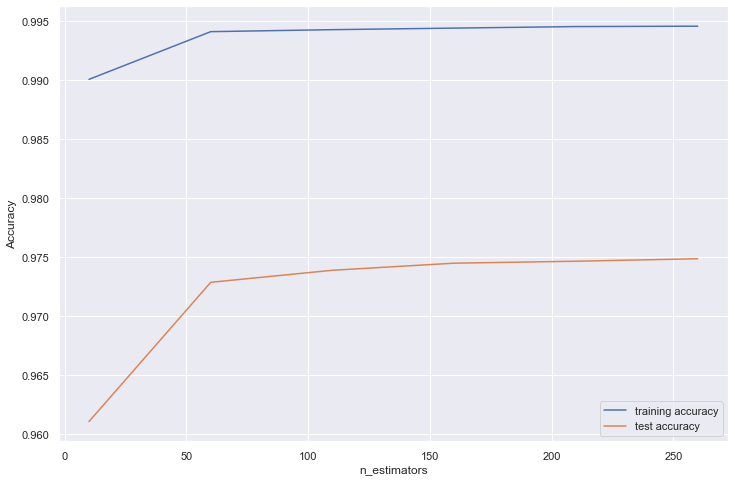

In [217]:
# plotting accuracies with n_estimators
plt.figure(figsize=(12,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split.

In [218]:
# specify number of folds for k-fold CV

n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
rf.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.0min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=12), n_jobs=-1,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [219]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      26.134515      0.044304         0.642381        0.003997   
1      48.261280      0.149006         0.645043        0.023101   

  param_max_features               params  split0_test_score  \
0                  4  {'max_features': 4}           0.971761   
1                  8  {'max_features': 8}           0.974150   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.969294           0.974006         0.971687        0.001924   
1           0.970862           0.975821         0.973611        0.002060   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.992287            0.992534   
1                4            0.994290            0.994453   

   split2_train_score  mean_train_score  std_train_score  
0            0.991806          0.992209         0.000302  
1            0.993897          0.994213         0.000233

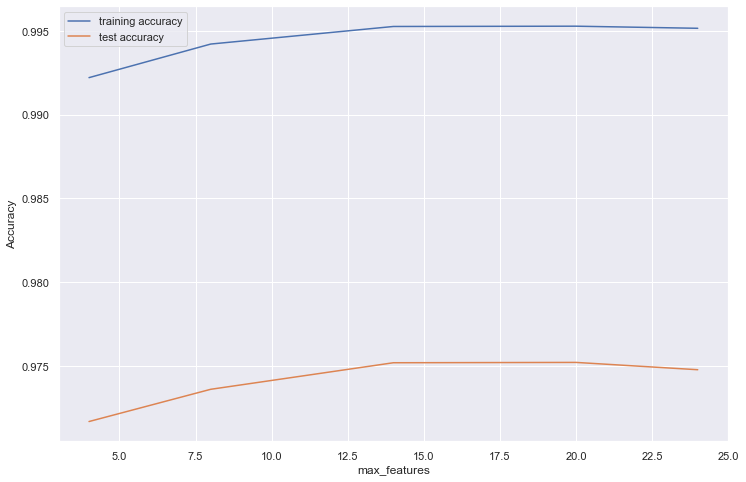

In [220]:
# plotting accuracies with max_features
plt.figure(figsize=(12,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Inference
- Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node.
- Let's now check the optimum value for min samples leaf in our case.

In [221]:
# specify number of folds for k-fold CV
#n_folds = 3
n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'min_samples_leaf': range(20, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
rf.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.7min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(20, 400, 50)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [222]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      50.798837      0.155346         0.638225        0.005777   
1      40.383394      0.142483         0.534935        0.008618   

  param_min_samples_leaf                    params  split0_test_score  \
0                     20  {'min_samples_leaf': 20}           0.961559   
1                     70  {'min_samples_leaf': 70}           0.933227   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.959383           0.964441         0.961794        0.002072   
1           0.932520           0.938401         0.934716        0.002622   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.985558            0.985902   
1                2            0.952119            0.953751   

   split2_train_score  mean_train_score  std_train_score  
0            0.985879          0.985779         0.000157  
1            0.951884          0.952585         0.000830

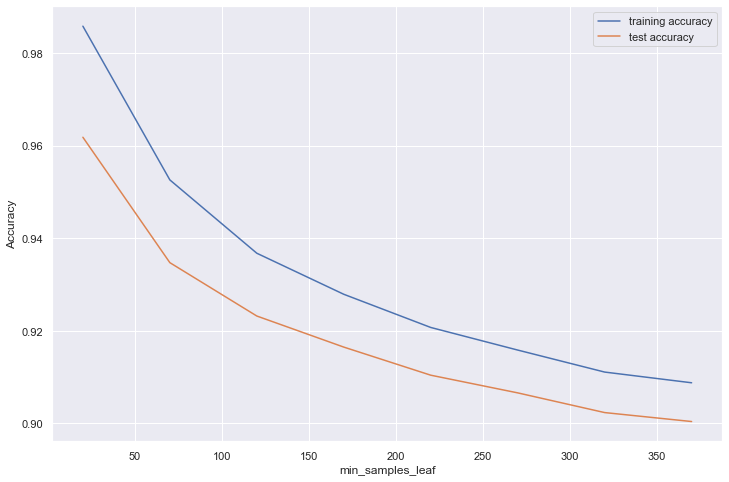

In [223]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize=(12,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Inference
- You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**

 - Let's now look at the performance of the ensemble as we vary min_samples_split.

In [224]:
# specify number of folds for k-fold CV

n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",return_train_score=True,verbose=1,n_jobs=-1)
rf.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.1min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(100, 500, 50)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [225]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      56.486643      0.320664         0.699204        0.009735   
1      54.525109      0.906753         0.627095        0.021923   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.956573   
1                     150  {'min_samples_split': 150}           0.948742   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.954092           0.960569         0.957078        0.002668   
1           0.946835           0.951653         0.949077        0.001981   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.983052            0.983594   
1                2            0.973591            0.974183   

   split2_train_score  mean_train_score  std_train_score  
0            0.983324          0.983323         0.000221  
1            0.972168          0.973314         0.000845

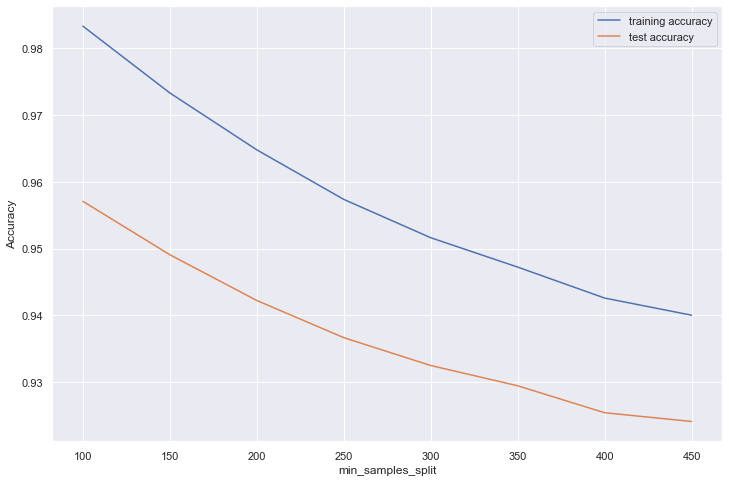

In [226]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(12,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters
- We can now find the optimal hyperparameters using GridSearchCV.


In [307]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(150, 250, 50),
    'n_estimators': [150,175,200], 
    'max_features': [8,10]
}
n_folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 27.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'max_features': [8, 10],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(150, 250, 50),
                         'n_estimators': [150, 175, 200]},
             verbose=1)

In [308]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8678140910010851 using {'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 50, 'min_samples_split': 150, 'n_estimators': 175}


In [309]:
# predictions on train 
y_train_pred = grid_search.predict(X_train_pca)

In [310]:
# lets check the model performance 
y_pred_prob = grid_search.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_res,y_train_pred ,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[17346  1945]
 [ 2172 17119]]

Accuracy score on Train data :-  89.33 

Sensitivity: 88.74 %
Specificity: 89.92 %

Area under the ROC Curve-:  95.9 %
F1 Score -: 0.89


# Inference - 
- Accuracy score on Train data is good after Hyperparameter tuning
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve more than 90% which is say this is good model for train data

In [311]:
# prediction on test data
y_test_pred = grid_search.predict(X_test_pca)

In [312]:
# lets check the model performance 
y_pred_prob = grid_search.predict_proba(X_test_pca)[:, 1]
Evalution_parameter(y_test, y_test_pred,y_pred_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[7294  975]
 [ 220  512]]

Accuracy score on Test data :-  86.72 

Sensitivity: 69.95 %
Specificity: 88.21 %

Area under the ROC Curve-:  88.36 %
F1 Score -: 0.69


# Inference - 
- Accuracy score on Test data is good after Hyperparameter tuning
- We can see the fair value for Sensitivity and Specificity on test data
- Area under the ROC Curve more than 85% which is say this is good model for test data
- Sensitivity and Specificity are not balanced 

# Interpretable Model - Logistics Regression 

In [313]:
# lets check the data after imbalance treatment
X_train_res.head()

arpu_6  arpu_7  arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0   -0.21    0.50    0.11           -0.15            0.49            0.25   
1    0.05   -0.39    0.46           -0.33           -0.44           -0.38   
2   -1.13   -1.00   -1.06           -0.86           -0.78           -0.73   
3   -1.03   -1.03   -0.88           -0.88           -0.87           -0.80   
4   -0.15   -0.17   -0.87           -0.53           -0.67           -0.80   

   total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_num_6  \
0           -0.06           -0.01            0.22              1.20   
1            0.55            0.55            0.61             -0.30   
2           -0.50           -0.48           -0.72             -0.20   
3           -0.67           -0.74           -0.69             -0.84   
4           -0.54           -0.54           -0.77              0.02   

   total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
0              0.56              1.87             -0.04              0.29   
1             -0.39             -0.32             -0.01             -0.38   
2              0.56             -0.43             -1.11             -0.97   
3             -0.82             -0.98             -1.04             -0.99   
4              0.24             -0.54             -0.26             -0.06   

   total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0              0.13           -0.35           -0.35           -0.18   
1              0.50           -0.10           -0.35           -0.05   
2             -1.02           -0.90           -0.85           -0.82   
3             -0.84           -0.10           -0.11           -0.05   
4             -0.96           -0.24           -0.25           -0.79   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0                0.07                0.07               -0.63   
1                0.38                0.07                0.17   
2               -0.62               -0.61               -0.71   
3               -0.75               -0.74                0.47   
4               -0.52               -0.00               -0.48   

   total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  \
0              -0.60              -0.61              -0.56            -0.70   
1               0.12              -0.61               0.83             0.67   
2               1.57               0.38               0.83            -0.55   
3               0.12               0.05               0.13             0.67   
4              -0.60              -0.61              -0.56            -0.70   

   max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  \
0            -0.70            -0.66            -0.50            -0.52   
1            -0.70             0.74            -0.09            -0.52   
2            -0.55            -0.43             1.94             0.59   
3             0.64             0.74            -0.09            -0.15   
4            -0.70            -0.66            -0.50            -0.52   

   count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
0            -0.48            -0.39            -0.39            -0.36   
1             0.31             0.54            -0.39             1.45   
2             1.11            -0.39            -0.39            -0.36   
3            -0.08             0.54             0.48             0.54   
4            -0.48            -0.39            -0.39            -0.36   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  \
0               -0.68               -0.68               -0.63        -0.40   
1                0.92               -0.68                2.51         0.03   
2               -0.14               -0.43               -0.11         0.58   
3                0.92                0.81                0.94        -0.32   
4               -0.68               -0.68               -0.63        -0.40   

   vol_2g_

In [314]:
# lets import the required lib
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# initialization the LogisticRegression
LR = LogisticRegression()

In [315]:
# Logistic regression model using RFE and GLM
logm1 = sm.GLM(y_train_res,(sm.add_constant(X_train_res)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38409
Model Family:                Binomial   Df Model:                          172
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jul 2020   Deviance:                          nan
Time:                        00:11:20   Pearson chi2:                 3.65e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7476.5440    8.2e+05      0.009      0.993    -1.6e+06    1.61e+06
arpu_6                   0.3063      0.082      3.754      0.000       0.146       0.466
arpu_7                   0.2407      0.089      2.707      0.007       0.066       0.415
arpu_8                   0.8582      0.101      8.538      0.000       0.661       1.055
total_og_mou_6          -0.0651      0.561     -0.116      0.908      -1.164       1.034
total_og_mou_7           1.7461      0.572      3.050      0.002       0.624       2.868
total_og_mou_8          -4.2099      0.645     -6.523      0.000      -5.475      -2.945
total_ic_mou_6          -1.1744      0.381     -3.086      0.002      -1.920      -0.428
total_ic_mou_7           0.6086      0.319      1.906      0.057      -0.017       1.234
total_ic_mou_8          -4.8468      0.428    -11.314      0.000      -5.686      -4.007
total_rech_num_6        -0.0339      0.036     -0.932      0.351      -0.105       0.037
total_rech_num_7         0.2930      0.045      6.468      0.000       0.204       0.382
total_rech_num_8        -0.6886      0.051    -13.484      0.000      -0.789      -0.589
total_rech_amt_6         0.0091      0.083      0.110      0.912      -0.153       0.171
total_rech_amt_7        -0.4899      0.096     -5.100      0.000      -0.678      -0.302
total_rech_amt_8        -0.6376      0.109     -5.869      0.000      -0.851      -0.425
max_rech_amt_6          -0.1529      0.041     -3.744      0.000      -0.233      -0.073
max_rech_amt_7           0.0454      0.039      1.163      0.245      -0.031       0.122
max_rech_amt_8           0.2890      0.044      6.561      0.000       0.203       0.375
last_day_rch_amt_6       0.0389      0.030      1.285      0.199      -0.020       0.098
last_day_rch_amt_7      -0.0107      0.028     -0.386      0.699      -0.065       0.043
last_day_rch_amt_8      -0.4245      0.033    -12.817      0.000      -0.489      -0.360
total_rech_data_6       -0.0036      0.672     -0.005      0.996      -1.320       1.313
total_rech_data_7       -0.5553      0.694     -0.800      0.424      -1.916       0.806
total_rech_data_8       -4.5845     11.514     -0.398      0.691     -27.152      17.983
max_rech_data_6          0.0049      0.065      0.074      0.941      -0.123       0.133
max_rech_data_7          0.2006      0.071      2.825      0.005       0.061       0.340
max_rech_data_8         -0.6916      0.086     -8.084      0.000      -0.859      -0.524
count_rech_2g_6       1.137e+04   5.35e+06      0.002      0.998   -1.05e+07    1.05e+07
count_rech_2g_7       7.344e+04    7.4e+06      0.010      0.992   -1.44e+07    1.46e+07
count_rech_2g_8       2.837e+04   1.18e+07      0.002      0.998   -2.31e+07    2.31e+07
count_rech_3g_6         -0.5328      0.435     -1.226    

- So you finally built your first multivariate logistic regression model using all the features present in the dataset. This is the summary output for different variables that you got:

- In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

- We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

##### Feature Selection Using RFE

- You built your first model in the previous segment. Based on the summary statistics, you inferred that many of the variables might be insignificant and hence, you need to do some feature elimination. Since the number of features is huge, let's first start off with an automated feature selection technique (RFE) and then move to manual feature elimination (using p-values and VIFs) - this is exactly the same process that you did in linear regression.
 
- So let's start off with the automatic feature selection technique - RFE.

In [316]:
# lets do the RFE with 35 Vsriables 
rfe = RFE(LR,35) # running RFE with 35 variables as output

#lets fit the model
rfe = rfe.fit(X_train_res,y_train_res)

In [317]:
# support_ : array of shape [n_features] The mask of selected features.
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [318]:
list(zip(X_train_res.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 80),
 ('arpu_7', False, 49),
 ('arpu_8', False, 20),
 ('total_og_mou_6', False, 81),
 ('total_og_mou_7', False, 32),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 59),
 ('total_ic_mou_7', False, 58),
 ('total_ic_mou_8', False, 2),
 ('total_rech_num_6', False, 129),
 ('total_rech_num_7', False, 48),
 ('total_rech_num_8', False, 18),
 ('total_rech_amt_6', False, 134),
 ('total_rech_amt_7', False, 50),
 ('total_rech_amt_8', False, 43),
 ('max_rech_amt_6', False, 99),
 ('max_rech_amt_7', False, 117),
 ('max_rech_amt_8', False, 44),
 ('last_day_rch_amt_6', False, 114),
 ('last_day_rch_amt_7', False, 132),
 ('last_day_rch_amt_8', False, 21),
 ('total_rech_data_6', False, 28),
 ('total_rech_data_7', False, 41),
 ('total_rech_data_8', False, 139),
 ('max_rech_data_6', False, 100),
 ('max_rech_data_7', False, 51),
 ('max_rech_data_8', False, 45),
 ('count_rech_2g_6', True, 1),
 ('count_rech_2g_7', True, 1),
 ('count_rech_2g_8', True, 1),
 ('count_rech_3g_6', False,

In [319]:
# lets store the rfe.support_ columns
col = X_train_res.columns[rfe.support_]

# lets view the columns which we have selected for modelling
col


Index(['total_og_mou_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'vol_2g_mb_6', 'vol_3g_mb_6', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_vol_2g_3g_mb_6', 'night_pck_user_6_-1', 'night_pck_user_8_1.0',
       'night_pck_user_8_-1', 'monthly_2g_6_1', 'monthly_2g_6_2',
       'monthly_2g_6_3', 'monthly_2g_6_4', 'monthly_2g_7_1', 'monthly_2g_7_2',
       'monthly_2g_7_3', 'monthly_2g_7_4', 'monthly_2g_7_5', 'monthly_2g_8_1',
       'monthly_2g_8_2', 'monthly_2g_8_3', 'monthly_2g_8_4', 'fb_user_6_1.0',
       'fb_user_8_1.0', 'aon_year_2-3', 'aon_year_3-4', 'aon_year_4-5',
       'aon_year_5+', 'aon_year_<1'],
      dtype='object')

In [320]:
# Let see the all false vaue columns
X_train_res.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_7',
       ...
       'total_vol_2g_3g_mb_7', 'total_vol_2g_3g_mb_8', 'night_pck_user_6_1.0',
       'night_pck_user_7_1.0', 'night_pck_user_7_-1', 'monthly_2g_8_5',
       'fb_user_6_-1', 'fb_user_7_1.0', 'fb_user_7_-1', 'fb_user_8_-1'],
      dtype='object', length=140)

In [321]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38546
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jul 2020   Deviance:                          nan
Time:                        00:14:08   Pearson chi2:                 1.17e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5723.2770   5.45e+05      0.011      0.992   -1.06e+06    1.07e+06
total_og_mou_8          -4.6758      0.087    -53.965      0.000      -4.846      -4.506
count_rech_2g_6       1.178e+04   5.34e+06      0.002      0.998   -1.05e+07    1.05e+07
count_rech_2g_7       7.281e+04    7.3e+06      0.010      0.992   -1.42e+07    1.44e+07
count_rech_2g_8         13.8927      1.967      7.061      0.000      10.037      17.749
vol_2g_mb_6              2.2740      0.449      5.064      0.000       1.394       3.154
vol_3g_mb_6              5.4048      1.148      4.706      0.000       3.154       7.656
sachet_2g_6          -1.181e+04   5.36e+06     -0.002      0.998   -1.05e+07    1.05e+07
sachet_2g_7          -7.309e+04   7.33e+06     -0.010      0.992   -1.44e+07    1.43e+07
sachet_2g_8            -14.6290      1.966     -7.442      0.000     -18.482     -10.776
std_og_t2t_mou_8         2.2453      0.052     42.992      0.000       2.143       2.348
std_og_t2m_mou_8         2.2094      0.054     40.985      0.000       2.104       2.315
total_vol_2g_3g_mb_6    -5.7232      1.236     -4.631      0.000      -8.146      -3.301
night_pck_user_6_-1     -0.9077      0.070    -12.910      0.000      -1.045      -0.770
night_pck_user_8_1.0    -2.3846      0.529     -4.507      0.000      -3.422      -1.348
night_pck_user_8_-1     -1.1786      0.068    -17.455      0.000      -1.311      -1.046
monthly_2g_6_1       -4793.3228   2.17e+06     -0.002      0.998   -4.27e+06    4.26e+06
monthly_2g_6_2       -9586.7408   4.35e+06     -0.002      0.998   -8.53e+06    8.51e+06
monthly_2g_6_3       -1.438e+04   6.52e+06     -0.002      0.998   -1.28e+07    1.28e+07
monthly_2g_6_4       -1.918e+04    8.7e+06     -0.002      0.998   -1.71e+07     1.7e+07
monthly_2g_7_1       -2.693e+04    2.7e+06     -0.010      0.992   -5.32e+06    5.26e+06
monthly_2g_7_2       -5.386e+04    5.4e+06     -0.010      0.992   -1.06e+07    1.05e+07
monthly_2g_7_3       -8.083e+04   1.65e+07     -0.005      0.996   -3.23e+07    3.22e+07
monthly_2g_7_4       -1.078e+05   3.86e+07     -0.003      0.998   -7.57e+07    7.55e+07
monthly_2g_7_5       -1.347e+05   4.93e+07     -0.003      0.998   -9.68e+07    9.66e+07
monthly_2g_8_1          -6.6846      0.787     -8.492      0.000      -8.227      -5.142
monthly_2g_8_2         -13.5497      1.737     -7.803      0.000     -16.953     -10.146
monthly_2g_8_3         -53.0874   1.51e+07  -3.51e-06      1.000   -2.97e+07    2.97e+07
monthly_2g_8_4         -58.2676   3.01e+07  -1.94e-06      1.000   -5.89e+07    5.89e+07
fb_user_6_1.0           -1.4009      0.080    -17.405      0.000      -1.559      -1.243
fb_user_8_1.0           -2.9439      0.077    -38.167      0.000      -3.095      -2.793
aon_year_2-3            -1.7681      0.052    -34.124    

In [322]:
#We can see the p-value is high , lets drop this columns and see dropping the columns one by one 

col_drop = "count_rech_2g_6"

col = col.drop(col_drop,1)
# Col view
col

Index(['total_og_mou_8', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6',
       'vol_3g_mb_6', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_vol_2g_3g_mb_6',
       'night_pck_user_6_-1', 'night_pck_user_8_1.0', 'night_pck_user_8_-1',
       'monthly_2g_6_1', 'monthly_2g_6_2', 'monthly_2g_6_3', 'monthly_2g_6_4',
       'monthly_2g_7_1', 'monthly_2g_7_2', 'monthly_2g_7_3', 'monthly_2g_7_4',
       'monthly_2g_7_5', 'monthly_2g_8_1', 'monthly_2g_8_2', 'monthly_2g_8_3',
       'monthly_2g_8_4', 'fb_user_6_1.0', 'fb_user_8_1.0', 'aon_year_2-3',
       'aon_year_3-4', 'aon_year_4-5', 'aon_year_5+', 'aon_year_<1'],
      dtype='object')

In [323]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38547
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jul 2020   Deviance:                          nan
Time:                        00:14:13   Pearson chi2:                 1.32e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.329e+04   4.76e+05      0.028      0.978    -9.2e+05    9.46e+05
total_og_mou_8          -4.6463      0.085    -54.598      0.000      -4.813      -4.480
count_rech_2g_7       1.981e+05    7.1e+06      0.028      0.978   -1.37e+07    1.41e+07
count_rech_2g_8         17.1556      2.079      8.252      0.000      13.081      21.230
vol_2g_mb_6              2.3479      0.444      5.287      0.000       1.477       3.218
vol_3g_mb_6              5.4377      1.135      4.791      0.000       3.213       7.662
sachet_2g_6             -0.0303      0.029     -1.059      0.289      -0.086       0.026
sachet_2g_7          -1.989e+05   7.13e+06     -0.028      0.978   -1.42e+07    1.38e+07
sachet_2g_8            -17.8490      2.078     -8.589      0.000     -21.922     -13.776
std_og_t2t_mou_8         2.2451      0.051     43.743      0.000       2.145       2.346
std_og_t2m_mou_8         2.1861      0.053     41.185      0.000       2.082       2.290
total_vol_2g_3g_mb_6    -5.7698      1.221     -4.724      0.000      -8.164      -3.376
night_pck_user_6_-1     -1.0781      0.069    -15.638      0.000      -1.213      -0.943
night_pck_user_8_1.0    -2.4312      0.532     -4.571      0.000      -3.474      -1.389
night_pck_user_8_-1     -1.1189      0.067    -16.753      0.000      -1.250      -0.988
monthly_2g_6_1          -0.9709      0.097    -10.018      0.000      -1.161      -0.781
monthly_2g_6_2          -1.8551      0.273     -6.801      0.000      -2.390      -1.321
monthly_2g_6_3          -1.1105      1.219     -0.911      0.362      -3.500       1.279
monthly_2g_6_4         -15.8565    295.455     -0.054      0.957    -594.938     563.225
monthly_2g_7_1       -7.329e+04   2.63e+06     -0.028      0.978   -5.22e+06    5.07e+06
monthly_2g_7_2       -1.466e+05   5.25e+06     -0.028      0.978   -1.04e+07    1.01e+07
monthly_2g_7_3       -2.199e+05   1.63e+07     -0.013      0.989   -3.23e+07    3.18e+07
monthly_2g_7_4       -2.932e+05   3.85e+07     -0.008      0.994   -7.57e+07    7.52e+07
monthly_2g_7_5       -3.665e+05   4.92e+07     -0.007      0.994   -9.69e+07    9.61e+07
monthly_2g_8_1          -7.7763      0.829     -9.377      0.000      -9.402      -6.151
monthly_2g_8_2         -16.2611      1.822     -8.927      0.000     -19.831     -12.691
monthly_2g_8_3         -56.8882   1.51e+07  -3.76e-06      1.000   -2.97e+07    2.97e+07
monthly_2g_8_4         -63.6025   3.01e+07  -2.12e-06      1.000   -5.89e+07    5.89e+07
fb_user_6_1.0           -1.3690      0.079    -17.413      0.000      -1.523      -1.215
fb_user_8_1.0           -3.0090      0.076    -39.451      0.000      -3.158      -2.860
aon_year_2-3            -1.8137      0.052    -35.163      0.000      -1.915      -1.713
aon_year_3-4            -2.6105      0.081    -32.187    

In [324]:
col_drop_2 = ["count_rech_2g_7"]
# dropping the columns
col = col.drop(col_drop_2,1)

In [325]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38548
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12104.
Date:                Mon, 06 Jul 2020   Deviance:                       24208.
Time:                        00:14:14   Pearson chi2:                 3.32e+07
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9703      0.158     25.058      0.000       3.660       4.281
total_og_mou_8          -4.3881      0.080    -54.708      0.000      -4.545      -4.231
count_rech_2g_8         21.7936      2.311      9.431      0.000      17.264      26.323
vol_2g_mb_6              2.3902      0.435      5.500      0.000       1.538       3.242
vol_3g_mb_6              5.5363      1.110      4.986      0.000       3.360       7.713
sachet_2g_6             -0.0481      0.028     -1.704      0.088      -0.103       0.007
sachet_2g_7              0.0997      0.031      3.252      0.001       0.040       0.160
sachet_2g_8            -22.4976      2.309     -9.742      0.000     -27.024     -17.971
std_og_t2t_mou_8         2.0892      0.049     43.000      0.000       1.994       2.184
std_og_t2m_mou_8         2.0209      0.050     40.046      0.000       1.922       2.120
total_vol_2g_3g_mb_6    -5.8666      1.195     -4.909      0.000      -8.209      -3.524
night_pck_user_6_-1     -1.2302      0.067    -18.253      0.000      -1.362      -1.098
night_pck_user_8_1.0    -2.5282      0.536     -4.715      0.000      -3.579      -1.477
night_pck_user_8_-1     -1.0730      0.066    -16.327      0.000      -1.202      -0.944
monthly_2g_6_1          -0.8262      0.091     -9.119      0.000      -1.004      -0.649
monthly_2g_6_2          -1.8525      0.262     -7.077      0.000      -2.366      -1.339
monthly_2g_6_3          -1.0727      1.200     -0.894      0.371      -3.425       1.279
monthly_2g_6_4         -20.5493   2857.996     -0.007      0.994   -5622.118    5581.019
monthly_2g_7_1          -0.8981      0.093     -9.697      0.000      -1.080      -0.717
monthly_2g_7_2          -2.5338      0.379     -6.691      0.000      -3.276      -1.792
monthly_2g_7_3         -22.6615   2.14e+04     -0.001      0.999    -4.2e+04     4.2e+04
monthly_2g_7_4         -19.7400   4.21e+04     -0.000      1.000   -8.26e+04    8.25e+04
monthly_2g_7_5         -76.2258   3.63e+07   -2.1e-06      1.000   -7.12e+07    7.12e+07
monthly_2g_8_1          -9.4616      0.920    -10.288      0.000     -11.264      -7.659
monthly_2g_8_2         -20.0175      1.994    -10.038      0.000     -23.926     -16.109
monthly_2g_8_3         -46.4721   2.38e+04     -0.002      0.998   -4.68e+04    4.67e+04
monthly_2g_8_4         -54.7002   3.69e+04     -0.001      0.999   -7.25e+04    7.24e+04
fb_user_6_1.0           -1.3854      0.076    -18.166      0.000      -1.535      -1.236
fb_user_8_1.0           -3.0120      0.075    -40.272      0.000      -3.159      -2.865
aon_year_2-3            -1.8682      0.051    -36.603      0.000      -1.968      -1.768
aon_year_3-4            -2.6927      0.081    -33.313      0.000      -2.851      -2.534
aon_year_4-5            -2.8915      0.110    -26.337    

In [326]:
col_drop_3 = "monthly_2g_7_4"
# dropping the columns
col = col.drop(col_drop_3,1)

In [327]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38549
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12104.
Date:                Mon, 06 Jul 2020   Deviance:                       24208.
Time:                        00:14:16   Pearson chi2:                 3.32e+07
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9703      0.158     25.058      0.000       3.660       4.281
total_og_mou_8          -4.3880      0.080    -54.708      0.000      -4.545      -4.231
count_rech_2g_8         21.7931      2.311      9.430      0.000      17.264      26.322
vol_2g_mb_6              2.3966      0.435      5.504      0.000       1.543       3.250
vol_3g_mb_6              5.5527      1.113      4.991      0.000       3.372       7.733
sachet_2g_6             -0.0481      0.028     -1.704      0.088      -0.103       0.007
sachet_2g_7              0.0997      0.031      3.253      0.001       0.040       0.160
sachet_2g_8            -22.4971      2.309     -9.742      0.000     -27.023     -17.971
std_og_t2t_mou_8         2.0892      0.049     42.999      0.000       1.994       2.184
std_og_t2m_mou_8         2.0209      0.050     40.045      0.000       1.922       2.120
total_vol_2g_3g_mb_6    -5.8842      1.197     -4.914      0.000      -8.231      -3.537
night_pck_user_6_-1     -1.2302      0.067    -18.252      0.000      -1.362      -1.098
night_pck_user_8_1.0    -2.5273      0.536     -4.715      0.000      -3.578      -1.477
night_pck_user_8_-1     -1.0730      0.066    -16.327      0.000      -1.202      -0.944
monthly_2g_6_1          -0.8266      0.091     -9.124      0.000      -1.004      -0.649
monthly_2g_6_2          -1.8522      0.262     -7.076      0.000      -2.365      -1.339
monthly_2g_6_3          -1.0695      1.201     -0.891      0.373      -3.423       1.284
monthly_2g_6_4         -20.5496   2857.518     -0.007      0.994   -5621.182    5580.083
monthly_2g_7_1          -0.8978      0.093     -9.694      0.000      -1.079      -0.716
monthly_2g_7_2          -2.5332      0.379     -6.689      0.000      -3.275      -1.791
monthly_2g_7_3         -23.6605   3.53e+04     -0.001      0.999   -6.93e+04    6.92e+04
monthly_2g_7_5         -76.4151   3.97e+07  -1.92e-06      1.000   -7.78e+07    7.78e+07
monthly_2g_8_1          -9.4615      0.920    -10.288      0.000     -11.264      -7.659
monthly_2g_8_2         -20.0615      1.993    -10.064      0.000     -23.969     -16.154
monthly_2g_8_3         -47.6327   3.93e+04     -0.001      0.999   -7.71e+04     7.7e+04
monthly_2g_8_4         -57.8789   6.32e+04     -0.001      0.999   -1.24e+05    1.24e+05
fb_user_6_1.0           -1.3855      0.076    -18.166      0.000      -1.535      -1.236
fb_user_8_1.0           -3.0120      0.075    -40.272      0.000      -3.159      -2.865
aon_year_2-3            -1.8682      0.051    -36.603      0.000      -1.968      -1.768
aon_year_3-4            -2.6926      0.081    -33.312      0.000      -2.851      -2.534
aon_year_4-5            -2.8915      0.110    -26.337      0.000      -3.107      -2.676
aon_year_5+             -2.5639      0.058    -44.210    

In [328]:
col_drop = "monthly_2g_7_5"
# dropping the columns
col = col.drop(col_drop,1)


In [329]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38550
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12137.
Date:                Mon, 06 Jul 2020   Deviance:                       24273.
Time:                        00:14:17   Pearson chi2:                 3.76e+11
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5880      0.113     31.673      0.000       3.366       3.810
total_og_mou_8          -4.3812      0.080    -54.748      0.000      -4.538      -4.224
count_rech_2g_8         15.4196      1.428     10.798      0.000      12.621      18.218
vol_2g_mb_6              2.8377      0.497      5.709      0.000       1.863       3.812
vol_3g_mb_6              6.6942      1.270      5.271      0.000       4.205       9.183
sachet_2g_6             -0.0451      0.028     -1.601      0.109      -0.100       0.010
sachet_2g_7              0.0987      0.031      3.221      0.001       0.039       0.159
sachet_2g_8            -16.1309      1.427    -11.304      0.000     -18.928     -13.334
std_og_t2t_mou_8         2.0852      0.048     43.007      0.000       1.990       2.180
std_og_t2m_mou_8         2.0168      0.050     40.047      0.000       1.918       2.115
total_vol_2g_3g_mb_6    -7.1140      1.368     -5.200      0.000      -9.795      -4.433
night_pck_user_6_-1     -1.2324      0.067    -18.317      0.000      -1.364      -1.101
night_pck_user_8_1.0    -2.6385      0.556     -4.745      0.000      -3.728      -1.549
night_pck_user_8_-1     -1.0830      0.066    -16.507      0.000      -1.212      -0.954
monthly_2g_6_1          -0.8221      0.090     -9.113      0.000      -0.999      -0.645
monthly_2g_6_2          -1.9122      0.262     -7.293      0.000      -2.426      -1.398
monthly_2g_6_3          -1.0476      1.207     -0.868      0.386      -3.414       1.319
monthly_2g_6_4         -14.2446    121.400     -0.117      0.907    -252.185     223.696
monthly_2g_7_1          -0.8705      0.092     -9.471      0.000      -1.051      -0.690
monthly_2g_7_2          -2.5295      0.379     -6.677      0.000      -3.272      -1.787
monthly_2g_7_3         -22.6096   2.14e+04     -0.001      0.999    -4.2e+04     4.2e+04
monthly_2g_8_1          -6.9517      0.573    -12.124      0.000      -8.075      -5.828
monthly_2g_8_2         -15.2304      1.428    -10.667      0.000     -18.029     -12.432
monthly_2g_8_3         -39.0630   2.38e+04     -0.002      0.999   -4.68e+04    4.67e+04
monthly_2g_8_4         -46.6792    3.8e+04     -0.001      0.999   -7.46e+04    7.45e+04
fb_user_6_1.0           -1.3859      0.076    -18.214      0.000      -1.535      -1.237
fb_user_8_1.0           -3.0073      0.075    -40.351      0.000      -3.153      -2.861
aon_year_2-3            -1.8701      0.051    -36.670      0.000      -1.970      -1.770
aon_year_3-4            -2.6956      0.081    -33.362      0.000      -2.854      -2.537
aon_year_4-5            -2.8851      0.109    -26.386      0.000      -3.099      -2.671
aon_year_5+             -2.5616      0.058    -44.271      0.000      -2.675      -2.448
aon_year_<1             -1.5652      0.046    -34.303    

In [330]:
col_drop = "monthly_2g_7_3"
# dropping the columns
col = col.drop(col_drop,1)

In [331]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38551
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12139.
Date:                Mon, 06 Jul 2020   Deviance:                       24279.
Time:                        00:14:18   Pearson chi2:                 3.51e+11
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5864      0.113     31.660      0.000       3.364       3.808
total_og_mou_8          -4.3811      0.080    -54.750      0.000      -4.538      -4.224
count_rech_2g_8         15.4224      1.428     10.798      0.000      12.623      18.222
vol_2g_mb_6              2.8430      0.497      5.717      0.000       1.868       3.818
vol_3g_mb_6              6.7183      1.271      5.288      0.000       4.228       9.209
sachet_2g_6             -0.0453      0.028     -1.609      0.108      -0.101       0.010
sachet_2g_7              0.0993      0.031      3.243      0.001       0.039       0.159
sachet_2g_8            -16.1334      1.427    -11.305      0.000     -18.931     -13.336
std_og_t2t_mou_8         2.0853      0.048     43.012      0.000       1.990       2.180
std_og_t2m_mou_8         2.0168      0.050     40.050      0.000       1.918       2.116
total_vol_2g_3g_mb_6    -7.1407      1.369     -5.217      0.000      -9.823      -4.458
night_pck_user_6_-1     -1.2335      0.067    -18.334      0.000      -1.365      -1.102
night_pck_user_8_1.0    -2.6329      0.556     -4.738      0.000      -3.722      -1.544
night_pck_user_8_-1     -1.0825      0.066    -16.500      0.000      -1.211      -0.954
monthly_2g_6_1          -0.8246      0.090     -9.141      0.000      -1.001      -0.648
monthly_2g_6_2          -1.9147      0.261     -7.331      0.000      -2.427      -1.403
monthly_2g_6_3          -1.0368      1.207     -0.859      0.390      -3.403       1.329
monthly_2g_6_4         -14.2494    121.837     -0.117      0.907    -253.045     224.546
monthly_2g_7_1          -0.8634      0.092     -9.400      0.000      -1.043      -0.683
monthly_2g_7_2          -2.5231      0.379     -6.656      0.000      -3.266      -1.780
monthly_2g_8_1          -6.9671      0.573    -12.149      0.000      -8.091      -5.843
monthly_2g_8_2         -15.2436      1.426    -10.689      0.000     -18.039     -12.448
monthly_2g_8_3         -38.2839   1.45e+04     -0.003      0.998   -2.84e+04    2.83e+04
monthly_2g_8_4         -45.6606   2.31e+04     -0.002      0.998   -4.53e+04    4.52e+04
fb_user_6_1.0           -1.3826      0.076    -18.175      0.000      -1.532      -1.234
fb_user_8_1.0           -3.0084      0.075    -40.369      0.000      -3.154      -2.862
aon_year_2-3            -1.8696      0.051    -36.665      0.000      -1.970      -1.770
aon_year_3-4            -2.6952      0.081    -33.356      0.000      -2.854      -2.537
aon_year_4-5            -2.8846      0.109    -26.381      0.000      -3.099      -2.670
aon_year_5+             -2.5614      0.058    -44.267      0.000      -2.675      -2.448
aon_year_<1             -1.5645      0.046    -34.290      0.000      -1.654      -1.475
=========================================================

In [332]:
col_drop = "monthly_2g_8_3"
# dropping the columns
col = col.drop(col_drop,1)

In [333]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38552
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12228.
Date:                Mon, 06 Jul 2020   Deviance:                       24457.
Time:                        00:14:19   Pearson chi2:                 4.66e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0038      0.079     38.141      0.000       2.849       3.158
total_og_mou_8          -4.3576      0.079    -54.901      0.000      -4.513      -4.202
count_rech_2g_8          4.8848      0.397     12.319      0.000       4.108       5.662
vol_2g_mb_6              2.8686      0.497      5.770      0.000       1.894       3.843
vol_3g_mb_6              6.7640      1.270      5.327      0.000       4.275       9.253
sachet_2g_6             -0.0415      0.028     -1.484      0.138      -0.096       0.013
sachet_2g_7              0.0888      0.031      2.907      0.004       0.029       0.149
sachet_2g_8             -5.6079      0.396    -14.155      0.000      -6.384      -4.831
std_og_t2t_mou_8         2.0707      0.048     43.034      0.000       1.976       2.165
std_og_t2m_mou_8         2.0014      0.050     40.044      0.000       1.903       2.099
total_vol_2g_3g_mb_6    -7.1964      1.368     -5.260      0.000      -9.878      -4.515
night_pck_user_6_-1     -1.2512      0.067    -18.667      0.000      -1.383      -1.120
night_pck_user_8_1.0    -2.6672      0.555     -4.807      0.000      -3.755      -1.580
night_pck_user_8_-1     -1.1274      0.065    -17.281      0.000      -1.255      -1.000
monthly_2g_6_1          -0.8575      0.089     -9.624      0.000      -1.032      -0.683
monthly_2g_6_2          -2.0310      0.258     -7.861      0.000      -2.537      -1.525
monthly_2g_6_3          -2.5427      1.261     -2.017      0.044      -5.014      -0.071
monthly_2g_6_4          -3.5546      1.477     -2.407      0.016      -6.449      -0.660
monthly_2g_7_1          -0.7949      0.090     -8.869      0.000      -0.971      -0.619
monthly_2g_7_2          -3.0444      0.424     -7.176      0.000      -3.876      -2.213
monthly_2g_8_1          -2.8431      0.192    -14.804      0.000      -3.220      -2.467
monthly_2g_8_2          -6.9166      0.922     -7.504      0.000      -8.723      -5.110
monthly_2g_8_4         -27.9236   1.39e+04     -0.002      0.998   -2.74e+04    2.73e+04
fb_user_6_1.0           -1.3886      0.076    -18.372      0.000      -1.537      -1.240
fb_user_8_1.0           -3.0095      0.074    -40.801      0.000      -3.154      -2.865
aon_year_2-3            -1.8815      0.051    -37.006      0.000      -1.981      -1.782
aon_year_3-4            -2.7234      0.081    -33.689      0.000      -2.882      -2.565
aon_year_4-5            -2.8704      0.108    -26.486      0.000      -3.083      -2.658
aon_year_5+             -2.5671      0.058    -44.631      0.000      -2.680      -2.454
aon_year_<1             -1.5725      0.045    -34.604      0.000      -1.662      -1.483
========================================================================================
"""

In [334]:
col_drop = "monthly_2g_8_4"
# dropping the columns
col = col.drop(col_drop,1)

In [335]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38553
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12245.
Date:                Mon, 06 Jul 2020   Deviance:                       24490.
Time:                        00:14:20   Pearson chi2:                 4.57e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9661      0.078     37.938      0.000       2.813       3.119
total_og_mou_8          -4.3528      0.079    -54.915      0.000      -4.508      -4.197
count_rech_2g_8          4.1521      0.363     11.430      0.000       3.440       4.864
vol_2g_mb_6              2.8744      0.493      5.833      0.000       1.909       3.840
vol_3g_mb_6              6.7821      1.258      5.389      0.000       4.316       9.249
sachet_2g_6             -0.0405      0.028     -1.450      0.147      -0.095       0.014
sachet_2g_7              0.0885      0.031      2.898      0.004       0.029       0.148
sachet_2g_8             -4.8780      0.363    -13.438      0.000      -5.590      -4.167
std_og_t2t_mou_8         2.0677      0.048     43.024      0.000       1.974       2.162
std_og_t2m_mou_8         1.9989      0.050     40.043      0.000       1.901       2.097
total_vol_2g_3g_mb_6    -7.2154      1.356     -5.322      0.000      -9.873      -4.558
night_pck_user_6_-1     -1.2525      0.067    -18.699      0.000      -1.384      -1.121
night_pck_user_8_1.0    -2.6717      0.554     -4.820      0.000      -3.758      -1.585
night_pck_user_8_-1     -1.1338      0.065    -17.388      0.000      -1.262      -1.006
monthly_2g_6_1          -0.8456      0.089     -9.519      0.000      -1.020      -0.672
monthly_2g_6_2          -2.0646      0.259     -7.975      0.000      -2.572      -1.557
monthly_2g_6_3          -2.6191      1.188     -2.205      0.027      -4.947      -0.291
monthly_2g_6_4          -2.9413      1.596     -1.842      0.065      -6.070       0.188
monthly_2g_7_1          -0.7897      0.089     -8.831      0.000      -0.965      -0.614
monthly_2g_7_2          -2.9047      0.402     -7.220      0.000      -3.693      -2.116
monthly_2g_8_1          -2.5651      0.182    -14.106      0.000      -2.921      -2.209
monthly_2g_8_2          -6.3495      0.911     -6.973      0.000      -8.134      -4.565
fb_user_6_1.0           -1.3896      0.076    -18.400      0.000      -1.538      -1.242
fb_user_8_1.0           -3.0084      0.074    -40.832      0.000      -3.153      -2.864
aon_year_2-3            -1.8821      0.051    -37.045      0.000      -1.982      -1.783
aon_year_3-4            -2.7229      0.081    -33.716      0.000      -2.881      -2.565
aon_year_4-5            -2.8697      0.108    -26.492      0.000      -3.082      -2.657
aon_year_5+             -2.5649      0.057    -44.639      0.000      -2.678      -2.452
aon_year_<1             -1.5751      0.045    -34.688      0.000      -1.664      -1.486
========================================================================================
"""

In [336]:
col_drop = "sachet_2g_6"
# dropping the columns
col = col.drop(col_drop,1)

In [337]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38554
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12246.
Date:                Mon, 06 Jul 2020   Deviance:                       24492.
Time:                        00:14:20   Pearson chi2:                 4.57e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9672      0.078     37.960      0.000       2.814       3.120
total_og_mou_8          -4.3467      0.079    -54.946      0.000      -4.502      -4.192
count_rech_2g_8          4.1389      0.363     11.406      0.000       3.428       4.850
vol_2g_mb_6              2.8628      0.492      5.820      0.000       1.899       3.827
vol_3g_mb_6              6.7686      1.257      5.387      0.000       4.306       9.231
sachet_2g_7              0.0697      0.028      2.520      0.012       0.015       0.124
sachet_2g_8             -4.8758      0.363    -13.442      0.000      -5.587      -4.165
std_og_t2t_mou_8         2.0642      0.048     43.028      0.000       1.970       2.158
std_og_t2m_mou_8         1.9954      0.050     40.038      0.000       1.898       2.093
total_vol_2g_3g_mb_6    -7.1973      1.354     -5.317      0.000      -9.850      -4.544
night_pck_user_6_-1     -1.2428      0.067    -18.659      0.000      -1.373      -1.112
night_pck_user_8_1.0    -2.6890      0.554     -4.849      0.000      -3.776      -1.602
night_pck_user_8_-1     -1.1399      0.065    -17.510      0.000      -1.267      -1.012
monthly_2g_6_1          -0.8239      0.088     -9.415      0.000      -0.995      -0.652
monthly_2g_6_2          -2.0326      0.258     -7.889      0.000      -2.538      -1.528
monthly_2g_6_3          -2.5925      1.189     -2.181      0.029      -4.922      -0.263
monthly_2g_6_4          -2.9424      1.606     -1.833      0.067      -6.089       0.204
monthly_2g_7_1          -0.7863      0.089     -8.805      0.000      -0.961      -0.611
monthly_2g_7_2          -2.8996      0.402     -7.215      0.000      -3.687      -2.112
monthly_2g_8_1          -2.5648      0.182    -14.114      0.000      -2.921      -2.209
monthly_2g_8_2          -6.3324      0.910     -6.957      0.000      -8.116      -4.549
fb_user_6_1.0           -1.4081      0.074    -18.927      0.000      -1.554      -1.262
fb_user_8_1.0           -3.0006      0.073    -40.838      0.000      -3.145      -2.857
aon_year_2-3            -1.8810      0.051    -37.035      0.000      -1.981      -1.781
aon_year_3-4            -2.7210      0.081    -33.701      0.000      -2.879      -2.563
aon_year_4-5            -2.8686      0.108    -26.484      0.000      -3.081      -2.656
aon_year_5+             -2.5630      0.057    -44.618      0.000      -2.676      -2.450
aon_year_<1             -1.5748      0.045    -34.674      0.000      -1.664      -1.486
========================================================================================
"""

#### Now, we can see the all p-value is approx zero or lesee than 0.05 and lets proceed with VIF check.

# Checking VIFs 

- Coming Up So far you have only selected features based on RFE. Further elimination of features using VIFs manually is yet to be done. You'll do that in the next section.

## Manual Feature Elimination

- Recall that you had used RFE to select 35 features. But as you saw in the pairwise correlations, there are high values of correlations present between the 35 features, i.e. there is still some multicollinearity among the features. So you definitely need to check the VIFs as well to further eliminate the redundant variables. Recall that VIF calculates how well one independent variable is explained by all the other independent variables combined. And its formula is given as:
 
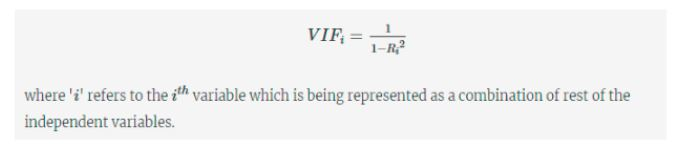

Let's see about eliminating the insignificant variables based on the VIFs, and the p-values.

In [339]:
# defined the vif check funtion  to check the VIF for the model
def vif_check(Y):
    vif = pd.DataFrame()
    vif['Features'] = X_train_res[Y].columns
    vif['VIF'] = [variance_inflation_factor(X_train_res[Y].values, i) for i in range(X_train_res[Y].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [340]:
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

Features    VIF
8   total_vol_2g_3g_mb_6 935.61
3            vol_3g_mb_6 827.45
1        count_rech_2g_8 301.37
5            sachet_2g_8 292.09
2            vol_2g_mb_6 117.80
18        monthly_2g_8_1   6.34
11   night_pck_user_8_-1   5.77
20         fb_user_6_1.0   5.12
0         total_og_mou_8   4.69
9    night_pck_user_6_-1   4.38
21         fb_user_8_1.0   4.34
19        monthly_2g_8_2   2.93
6       std_og_t2t_mou_8   2.45
7       std_og_t2m_mou_8   2.44
4            sachet_2g_7   1.98
16        monthly_2g_7_1   1.82
12        monthly_2g_6_1   1.80
25           aon_year_5+   1.47
26           aon_year_<1   1.29
22          aon_year_2-3   1.24
13        monthly_2g_6_2   1.17
17        monthly_2g_7_2   1.16
23          aon_year_3-4   1.16
24          aon_year_4-5   1.10
14        monthly_2g_6_3   1.05
10  night_pck_user_8_1.0   1.04
15        monthly_2g_6_4   1.03

In [341]:
# lets drop this HIGH VIF
col = col.drop("total_vol_2g_3g_mb_6",1)
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

Features    VIF
1        count_rech_2g_8 298.34
5            sachet_2g_8 289.14
17        monthly_2g_8_1   6.30
10   night_pck_user_8_-1   5.76
19         fb_user_6_1.0   5.12
0         total_og_mou_8   4.69
8    night_pck_user_6_-1   4.37
20         fb_user_8_1.0   4.34
18        monthly_2g_8_2   2.90
6       std_og_t2t_mou_8   2.45
7       std_og_t2m_mou_8   2.44
4            sachet_2g_7   1.98
15        monthly_2g_7_1   1.82
11        monthly_2g_6_1   1.80
24           aon_year_5+   1.47
2            vol_2g_mb_6   1.38
3            vol_3g_mb_6   1.37
25           aon_year_<1   1.29
21          aon_year_2-3   1.24
12        monthly_2g_6_2   1.17
16        monthly_2g_7_2   1.16
22          aon_year_3-4   1.16
23          aon_year_4-5   1.10
9   night_pck_user_8_1.0   1.04
13        monthly_2g_6_3   1.04
14        monthly_2g_6_4   1.02

In [342]:
# drop this col with HIGH VIF
col = col.drop("count_rech_2g_8",1)
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

Features  VIF
9    night_pck_user_8_-1 5.33
18         fb_user_6_1.0 4.97
0         total_og_mou_8 4.68
7    night_pck_user_6_-1 4.29
19         fb_user_8_1.0 4.28
5       std_og_t2t_mou_8 2.45
6       std_og_t2m_mou_8 2.44
4            sachet_2g_8 2.16
3            sachet_2g_7 1.98
16        monthly_2g_8_1 1.91
14        monthly_2g_7_1 1.81
10        monthly_2g_6_1 1.80
23           aon_year_5+ 1.47
2            vol_3g_mb_6 1.37
1            vol_2g_mb_6 1.37
24           aon_year_<1 1.28
20          aon_year_2-3 1.24
11        monthly_2g_6_2 1.17
15        monthly_2g_7_2 1.16
21          aon_year_3-4 1.16
17        monthly_2g_8_2 1.13
22          aon_year_4-5 1.10
8   night_pck_user_8_1.0 1.04
12        monthly_2g_6_3 1.03
13        monthly_2g_6_4 1.01

In [343]:
#lets drop this col with HIGH VIf
col = col.drop("night_pck_user_8_-1",1)
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

Features  VIF
0         total_og_mou_8 4.48
17         fb_user_6_1.0 3.12
18         fb_user_8_1.0 2.97
6       std_og_t2m_mou_8 2.41
5       std_og_t2t_mou_8 2.40
4            sachet_2g_8 2.08
3            sachet_2g_7 1.98
7    night_pck_user_6_-1 1.95
15        monthly_2g_8_1 1.90
13        monthly_2g_7_1 1.81
9         monthly_2g_6_1 1.80
22           aon_year_5+ 1.45
1            vol_2g_mb_6 1.37
2            vol_3g_mb_6 1.35
23           aon_year_<1 1.27
19          aon_year_2-3 1.23
10        monthly_2g_6_2 1.17
14        monthly_2g_7_2 1.16
20          aon_year_3-4 1.15
16        monthly_2g_8_2 1.13
21          aon_year_4-5 1.10
8   night_pck_user_8_1.0 1.04
11        monthly_2g_6_3 1.03
12        monthly_2g_6_4 1.01

In [344]:
X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12520.
Date:                Mon, 06 Jul 2020   Deviance:                       25039.
Time:                        00:14:36   Pearson chi2:                 2.79e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1197      0.065     32.453      0.000       1.992       2.248
total_og_mou_8          -4.1001      0.076    -54.104      0.000      -4.249      -3.952
vol_2g_mb_6              0.2406      0.023     10.527      0.000       0.196       0.285
vol_3g_mb_6              0.0874      0.021      4.201      0.000       0.047       0.128
sachet_2g_7              0.0264      0.026      0.997      0.319      -0.025       0.078
sachet_2g_8             -0.5367      0.039    -13.733      0.000      -0.613      -0.460
std_og_t2t_mou_8         1.9366      0.046     41.910      0.000       1.846       2.027
std_og_t2m_mou_8         1.8876      0.048     39.203      0.000       1.793       1.982
night_pck_user_6_-1     -1.5535      0.065    -23.856      0.000      -1.681      -1.426
night_pck_user_8_1.0    -2.3698      0.499     -4.753      0.000      -3.347      -1.393
monthly_2g_6_1          -0.8803      0.086    -10.205      0.000      -1.049      -0.711
monthly_2g_6_2          -1.9671      0.252     -7.813      0.000      -2.461      -1.474
monthly_2g_6_3          -1.6745      1.156     -1.449      0.147      -3.940       0.591
monthly_2g_6_4          -2.8239      1.643     -1.718      0.086      -6.045       0.397
monthly_2g_7_1          -0.6974      0.088     -7.966      0.000      -0.869      -0.526
monthly_2g_7_2          -2.4420      0.363     -6.728      0.000      -3.153      -1.731
monthly_2g_8_1          -0.9077      0.125     -7.260      0.000      -1.153      -0.663
monthly_2g_8_2          -2.6651      0.742     -3.592      0.000      -4.119      -1.211
fb_user_6_1.0           -1.6061      0.073    -21.909      0.000      -1.750      -1.462
fb_user_8_1.0           -2.0778      0.053    -39.038      0.000      -2.182      -1.973
aon_year_2-3            -1.9203      0.050    -38.114      0.000      -2.019      -1.822
aon_year_3-4            -2.7345      0.080    -34.237      0.000      -2.891      -2.578
aon_year_4-5            -2.9046      0.107    -27.042      0.000      -3.115      -2.694
aon_year_5+             -2.6065      0.057    -45.610      0.000      -2.718      -2.494
aon_year_<1             -1.6131      0.045    -35.939      0.000      -1.701      -1.525
========================================================================================
"""

In [345]:
# lets dtop this HIGH p value col
col = col.drop("sachet_2g_7",1)

In [346]:

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38558
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12520.
Date:                Mon, 06 Jul 2020   Deviance:                       25040.
Time:                        00:14:37   Pearson chi2:                 2.78e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1242      0.065     32.589      0.000       1.996       2.252
total_og_mou_8          -4.1044      0.076    -54.236      0.000      -4.253      -3.956
vol_2g_mb_6              0.2424      0.023     10.638      0.000       0.198       0.287
vol_3g_mb_6              0.0844      0.021      4.100      0.000       0.044       0.125
sachet_2g_8             -0.5159      0.033    -15.663      0.000      -0.581      -0.451
std_og_t2t_mou_8         1.9382      0.046     41.957      0.000       1.848       2.029
std_og_t2m_mou_8         1.8894      0.048     39.255      0.000       1.795       1.984
night_pck_user_6_-1     -1.5615      0.065    -24.146      0.000      -1.688      -1.435
night_pck_user_8_1.0    -2.3657      0.499     -4.742      0.000      -3.343      -1.388
monthly_2g_6_1          -0.8898      0.086    -10.379      0.000      -1.058      -0.722
monthly_2g_6_2          -1.9805      0.251     -7.876      0.000      -2.473      -1.488
monthly_2g_6_3          -1.7045      1.156     -1.474      0.140      -3.970       0.562
monthly_2g_6_4          -2.8306      1.631     -1.736      0.083      -6.027       0.366
monthly_2g_7_1          -0.7018      0.087     -8.028      0.000      -0.873      -0.530
monthly_2g_7_2          -2.4477      0.363     -6.746      0.000      -3.159      -1.736
monthly_2g_8_1          -0.9035      0.125     -7.231      0.000      -1.148      -0.659
monthly_2g_8_2          -2.6684      0.742     -3.595      0.000      -4.123      -1.213
fb_user_6_1.0           -1.6027      0.073    -21.885      0.000      -1.746      -1.459
fb_user_8_1.0           -2.0779      0.053    -39.053      0.000      -2.182      -1.974
aon_year_2-3            -1.9208      0.050    -38.121      0.000      -2.020      -1.822
aon_year_3-4            -2.7349      0.080    -34.246      0.000      -2.891      -2.578
aon_year_4-5            -2.9054      0.107    -27.051      0.000      -3.116      -2.695
aon_year_5+             -2.6078      0.057    -45.650      0.000      -2.720      -2.496
aon_year_<1             -1.6122      0.045    -35.933      0.000      -1.700      -1.524
========================================================================================
"""

In [347]:
# lets drop this HIGH p value colum
col = col.drop("monthly_2g_6_3",1)

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38559
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12522.
Date:                Mon, 06 Jul 2020   Deviance:                       25043.
Time:                        00:14:37   Pearson chi2:                 2.79e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1221      0.065     32.568      0.000       1.994       2.250
total_og_mou_8          -4.1042      0.076    -54.241      0.000      -4.253      -3.956
vol_2g_mb_6              0.2369      0.022     10.536      0.000       0.193       0.281
vol_3g_mb_6              0.0824      0.021      4.019      0.000       0.042       0.123
sachet_2g_8             -0.5161      0.033    -15.661      0.000      -0.581      -0.451
std_og_t2t_mou_8         1.9380      0.046     41.959      0.000       1.848       2.029
std_og_t2m_mou_8         1.8888      0.048     39.247      0.000       1.794       1.983
night_pck_user_6_-1     -1.5621      0.065    -24.158      0.000      -1.689      -1.435
night_pck_user_8_1.0    -2.3592      0.499     -4.731      0.000      -3.337      -1.382
monthly_2g_6_1          -0.8814      0.086    -10.303      0.000      -1.049      -0.714
monthly_2g_6_2          -1.9631      0.251     -7.812      0.000      -2.456      -1.471
monthly_2g_6_4          -2.7806      1.648     -1.688      0.091      -6.010       0.449
monthly_2g_7_1          -0.7103      0.087     -8.135      0.000      -0.881      -0.539
monthly_2g_7_2          -2.4648      0.362     -6.808      0.000      -3.174      -1.755
monthly_2g_8_1          -0.9069      0.125     -7.254      0.000      -1.152      -0.662
monthly_2g_8_2          -2.7420      0.739     -3.708      0.000      -4.191      -1.293
fb_user_6_1.0           -1.5997      0.073    -21.854      0.000      -1.743      -1.456
fb_user_8_1.0           -2.0769      0.053    -39.048      0.000      -2.181      -1.973
aon_year_2-3            -1.9213      0.050    -38.131      0.000      -2.020      -1.823
aon_year_3-4            -2.7348      0.080    -34.247      0.000      -2.891      -2.578
aon_year_4-5            -2.9061      0.107    -27.064      0.000      -3.117      -2.696
aon_year_5+             -2.6081      0.057    -45.655      0.000      -2.720      -2.496
aon_year_<1             -1.6116      0.045    -35.924      0.000      -1.700      -1.524
========================================================================================
"""

In [348]:
# lets drop this HIGH p value colum
col = col.drop("monthly_2g_6_4",1)

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38560
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12523.
Date:                Mon, 06 Jul 2020   Deviance:                       25046.
Time:                        00:14:38   Pearson chi2:                 2.79e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1201      0.065     32.548      0.000       1.992       2.248
total_og_mou_8          -4.1041      0.076    -54.243      0.000      -4.252      -3.956
vol_2g_mb_6              0.2326      0.022     10.390      0.000       0.189       0.277
vol_3g_mb_6              0.0810      0.021      3.950      0.000       0.041       0.121
sachet_2g_8             -0.5154      0.033    -15.645      0.000      -0.580      -0.451
std_og_t2t_mou_8         1.9380      0.046     41.961      0.000       1.847       2.029
std_og_t2m_mou_8         1.8887      0.048     39.249      0.000       1.794       1.983
night_pck_user_6_-1     -1.5625      0.065    -24.166      0.000      -1.689      -1.436
night_pck_user_8_1.0    -2.3547      0.499     -4.723      0.000      -3.332      -1.378
monthly_2g_6_1          -0.8762      0.085    -10.248      0.000      -1.044      -0.709
monthly_2g_6_2          -1.9511      0.251     -7.766      0.000      -2.443      -1.459
monthly_2g_7_1          -0.7110      0.087     -8.142      0.000      -0.882      -0.540
monthly_2g_7_2          -2.4630      0.362     -6.801      0.000      -3.173      -1.753
monthly_2g_8_1          -0.9131      0.125     -7.295      0.000      -1.158      -0.668
monthly_2g_8_2          -2.9116      0.753     -3.868      0.000      -4.387      -1.436
fb_user_6_1.0           -1.5972      0.073    -21.826      0.000      -1.741      -1.454
fb_user_8_1.0           -2.0758      0.053    -39.037      0.000      -2.180      -1.972
aon_year_2-3            -1.9208      0.050    -38.126      0.000      -2.020      -1.822
aon_year_3-4            -2.7343      0.080    -34.243      0.000      -2.891      -2.578
aon_year_4-5            -2.9056      0.107    -27.062      0.000      -3.116      -2.695
aon_year_5+             -2.6079      0.057    -45.653      0.000      -2.720      -2.496
aon_year_<1             -1.6109      0.045    -35.913      0.000      -1.699      -1.523
========================================================================================
"""

- Now all p-value is approx. zero. lts check the VIF's

In [349]:
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

Features  VIF
0         total_og_mou_8 4.46
14         fb_user_6_1.0 3.02
15         fb_user_8_1.0 2.97
5       std_og_t2m_mou_8 2.41
4       std_og_t2t_mou_8 2.40
6    night_pck_user_6_-1 1.93
12        monthly_2g_8_1 1.90
10        monthly_2g_7_1 1.80
8         monthly_2g_6_1 1.76
19           aon_year_5+ 1.45
3            sachet_2g_8 1.36
1            vol_2g_mb_6 1.34
2            vol_3g_mb_6 1.32
20           aon_year_<1 1.27
16          aon_year_2-3 1.23
9         monthly_2g_6_2 1.16
11        monthly_2g_7_2 1.15
17          aon_year_3-4 1.15
13        monthly_2g_8_2 1.12
18          aon_year_4-5 1.10
7   night_pck_user_8_1.0 1.04

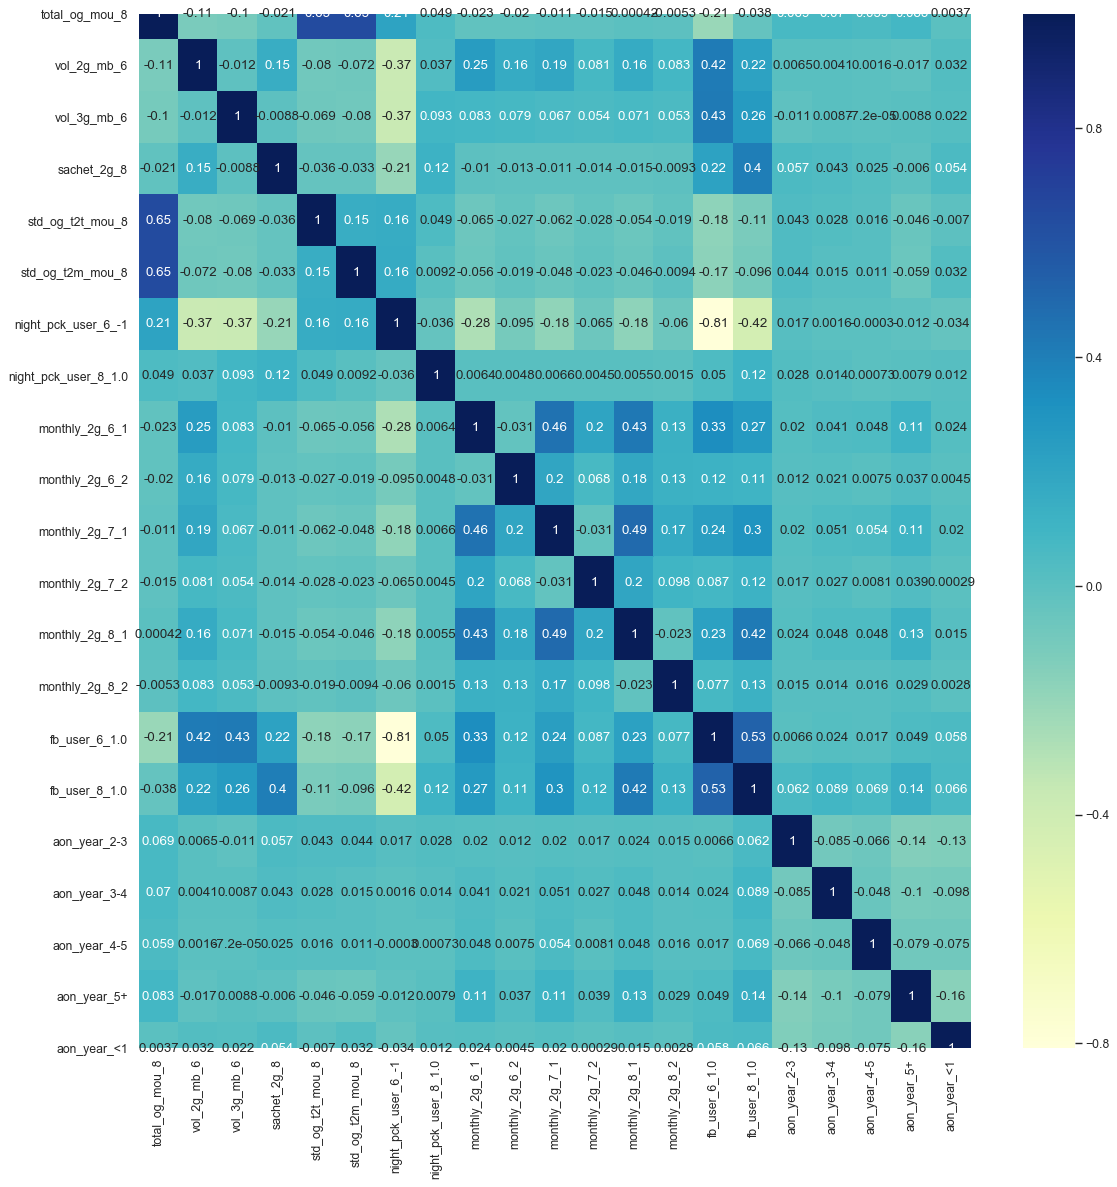

In [350]:
# lets see the heat map 
plt.figure(figsize=(15,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train_res[col].corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.tight_layout()

In [351]:
col = col.drop("fb_user_6_1.0",1)

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38561
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12782.
Date:                Mon, 06 Jul 2020   Deviance:                       25564.
Time:                        00:14:46   Pearson chi2:                 2.08e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1059      0.041     26.883      0.000       1.025       1.187
total_og_mou_8          -3.9501      0.074    -53.454      0.000      -4.095      -3.805
vol_2g_mb_6              0.1262      0.022      5.660      0.000       0.082       0.170
vol_3g_mb_6             -0.0245      0.020     -1.216      0.224      -0.064       0.015
sachet_2g_8             -0.4859      0.032    -15.240      0.000      -0.548      -0.423
std_og_t2t_mou_8         1.8960      0.045     41.827      0.000       1.807       1.985
std_og_t2m_mou_8         1.8312      0.047     38.804      0.000       1.739       1.924
night_pck_user_6_-1     -0.5871      0.042    -13.994      0.000      -0.669      -0.505
night_pck_user_8_1.0    -2.1450      0.483     -4.437      0.000      -3.092      -1.197
monthly_2g_6_1          -1.1263      0.085    -13.180      0.000      -1.294      -0.959
monthly_2g_6_2          -2.0702      0.252     -8.231      0.000      -2.563      -1.577
monthly_2g_7_1          -0.7868      0.087     -9.033      0.000      -0.958      -0.616
monthly_2g_7_2          -2.5415      0.368     -6.902      0.000      -3.263      -1.820
monthly_2g_8_1          -0.6873      0.121     -5.662      0.000      -0.925      -0.449
monthly_2g_8_2          -2.5573      0.737     -3.471      0.001      -4.001      -1.113
fb_user_8_1.0           -2.4030      0.052    -46.173      0.000      -2.505      -2.301
aon_year_2-3            -1.9209      0.050    -38.507      0.000      -2.019      -1.823
aon_year_3-4            -2.7501      0.079    -34.679      0.000      -2.905      -2.595
aon_year_4-5            -2.8780      0.107    -26.993      0.000      -3.087      -2.669
aon_year_5+             -2.5963      0.056    -46.036      0.000      -2.707      -2.486
aon_year_<1             -1.6356      0.044    -36.775      0.000      -1.723      -1.548
========================================================================================
"""

In [352]:
col = col.drop("vol_3g_mb_6",1)

X_train_sm = sm.add_constant(X_train_res[col])
LRM_2 = sm.GLM(y_train_res,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12783.
Date:                Mon, 06 Jul 2020   Deviance:                       25566.
Time:                        00:14:46   Pearson chi2:                 2.04e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1064      0.041     26.904      0.000       1.026       1.187
total_og_mou_8          -3.9462      0.074    -53.471      0.000      -4.091      -3.802
vol_2g_mb_6              0.1307      0.022      5.949      0.000       0.088       0.174
sachet_2g_8             -0.4779      0.031    -15.374      0.000      -0.539      -0.417
std_og_t2t_mou_8         1.8943      0.045     41.824      0.000       1.805       1.983
std_og_t2m_mou_8         1.8294      0.047     38.796      0.000       1.737       1.922
night_pck_user_6_-1     -0.5714      0.040    -14.319      0.000      -0.650      -0.493
night_pck_user_8_1.0    -2.1752      0.483     -4.508      0.000      -3.121      -1.229
monthly_2g_6_1          -1.1267      0.085    -13.181      0.000      -1.294      -0.959
monthly_2g_6_2          -2.0879      0.251     -8.303      0.000      -2.581      -1.595
monthly_2g_7_1          -0.7856      0.087     -9.016      0.000      -0.956      -0.615
monthly_2g_7_2          -2.5451      0.368     -6.915      0.000      -3.266      -1.824
monthly_2g_8_1          -0.6801      0.121     -5.610      0.000      -0.918      -0.443
monthly_2g_8_2          -2.5645      0.737     -3.478      0.001      -4.009      -1.119
fb_user_8_1.0           -2.4179      0.051    -47.755      0.000      -2.517      -2.319
aon_year_2-3            -1.9203      0.050    -38.496      0.000      -2.018      -1.823
aon_year_3-4            -2.7502      0.079    -34.679      0.000      -2.906      -2.595
aon_year_4-5            -2.8795      0.107    -26.996      0.000      -3.089      -2.670
aon_year_5+             -2.5954      0.056    -46.034      0.000      -2.706      -2.485
aon_year_<1             -1.6358      0.044    -36.780      0.000      -1.723      -1.549
========================================================================================
"""

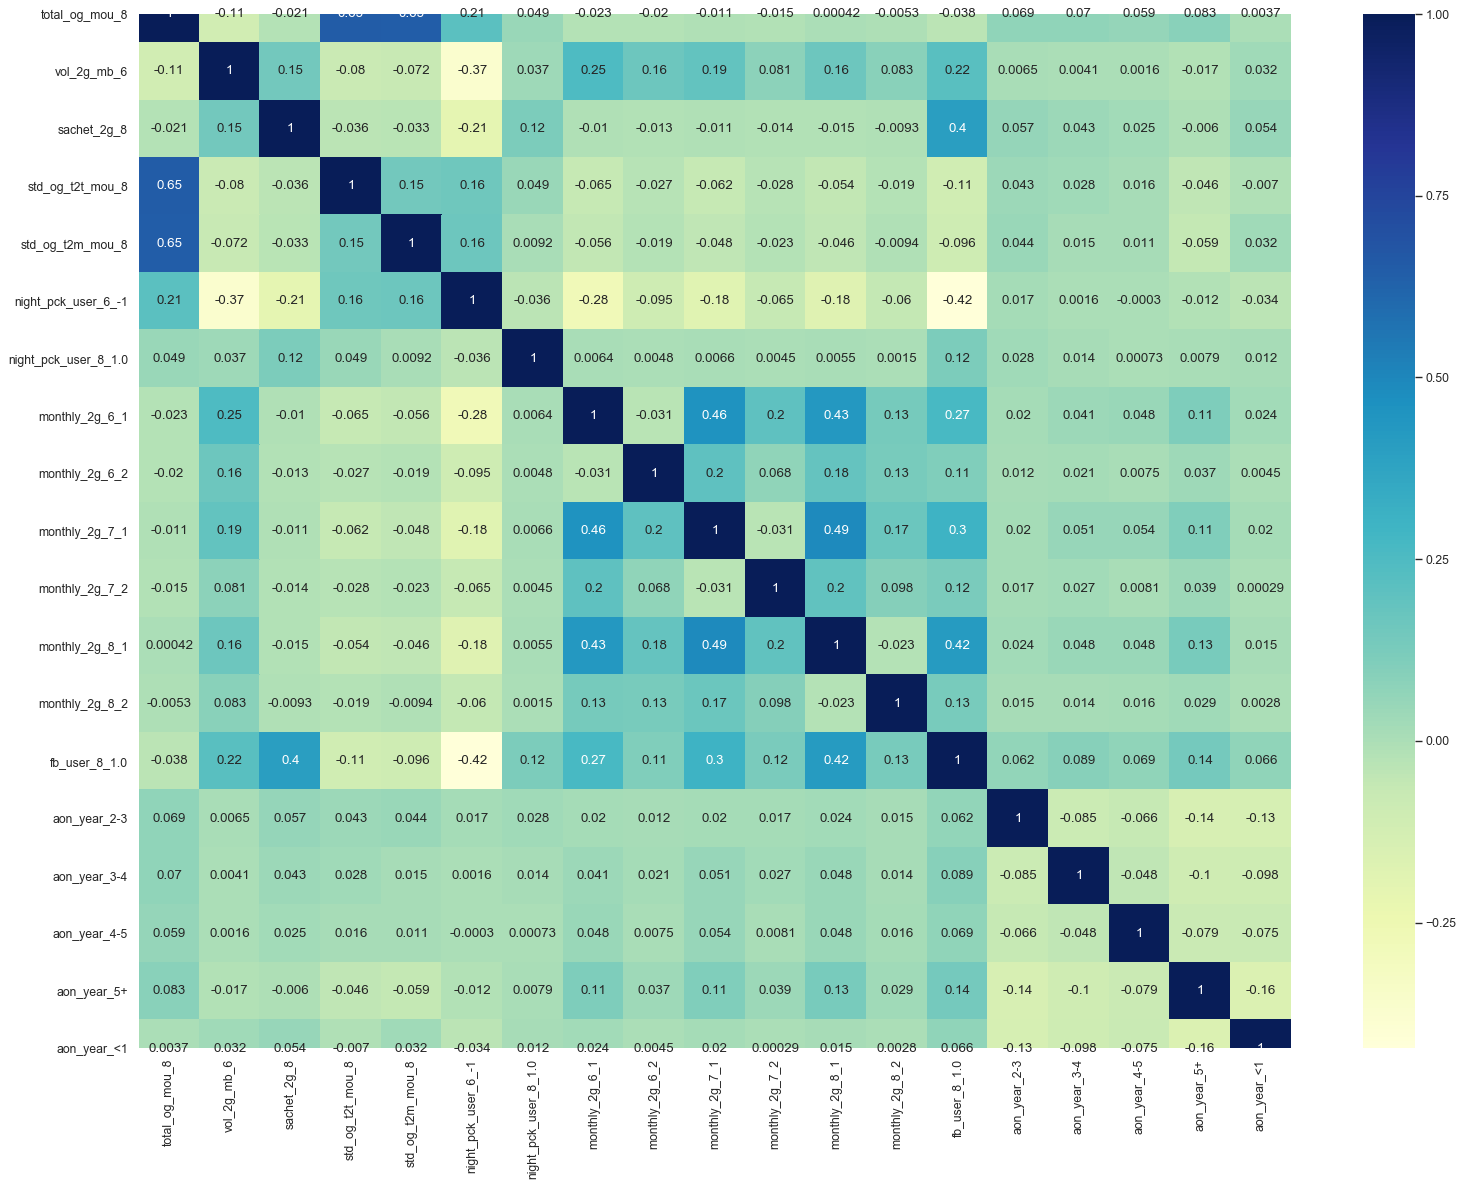

In [353]:
# lets see the heat map 
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train_res[col].corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.tight_layout()

In [354]:
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

Features  VIF
0         total_og_mou_8 3.99
4       std_og_t2m_mou_8 2.33
3       std_og_t2t_mou_8 2.32
13         fb_user_8_1.0 2.10
11        monthly_2g_8_1 1.86
9         monthly_2g_7_1 1.80
7         monthly_2g_6_1 1.70
5    night_pck_user_6_-1 1.61
17           aon_year_5+ 1.36
2            sachet_2g_8 1.29
1            vol_2g_mb_6 1.24
18           aon_year_<1 1.20
14          aon_year_2-3 1.18
8         monthly_2g_6_2 1.15
10        monthly_2g_7_2 1.14
15          aon_year_3-4 1.13
12        monthly_2g_8_2 1.11
16          aon_year_4-5 1.08
6   night_pck_user_8_1.0 1.03

#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model features:
- All variables have p-value less than 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.


# Model Evaluation

### Calculating Metrics beyond Accuracy

### Coming Up In the next segment, you will calculate the accuracy of the fitted logistic regression curve

##### Confusion Matrix and Accuracy

You chose a cutoff of 0.5 in order to classify the customers into 'Churn' and 'Non-Churn'. Now, since you're classifying the customers into two classes, you'll obviously have some errors. The classes of errors that would be there are:

* '1' (Churn) Customer being (incorrectly) classified as '0'(Not-Churn)
* '0'(Not-Churn) Customer being (incorrectly) classified as '1'(Churn)
 

##### To capture these errors, and to evaluate how well the model is, you'll use something known as the 'Confusion Matrix'. 

##### So using the confusion matrix, you got an accuracy of  85 -90% which seems to be a good number to begin with. The steps you need to calculate accuracy are:

- Create the confusion matrix
- Calculate the accuracy by applying the 'accuracy_score' function to the above matrix
- Calculate the Sensitivity and Specificity

In [355]:
#the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


0   0.25
1   0.19
2   0.04
3   0.09
4   0.43
5   0.28
6   0.01
7   0.27
8   0.00
9   0.04
dtype: float64

In [356]:
# lets reshape that data
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.24837211, 0.18699761, 0.03629017, 0.09173296, 0.43373384,
       0.27937594, 0.00889694, 0.2686309 , 0.00127275, 0.03991808])

In [357]:
#Creating a dataframe with the actual Converted and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Churn':y_train_res.values, 'Churn_prob':y_train_pred})
y_train_pred_final.head()



Churn  Churn_prob
0      0        0.25
1      0        0.19
2      0        0.04
3      0        0.09
4      0        0.43

In [358]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_prob  predicted
0      0        0.25          0
1      0        0.19          0
2      0        0.04          0
3      0        0.09          0
4      0        0.43          0

In [359]:
#y_pred_prob = LR_hyper.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_pred_final.Churn, y_train_pred_final.predicted,y_train_pred_final.Churn_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[16320  2971]
 [ 2312 16979]]

Accuracy score on Train data :-  86.31 

Sensitivity: 88.02 %
Specificity: 84.6 %

Area under the ROC Curve-:  93.43 %
F1 Score -: 0.86


# Inference - 
- Accuracy score on Train data is good
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve more than 90% which is say this is good model for train data

#  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [360]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [361]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate = False )

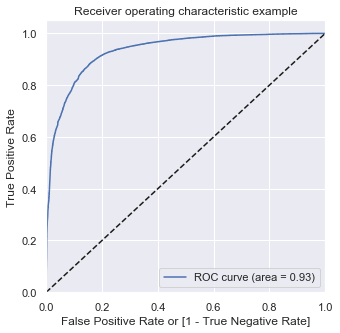

In [362]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)


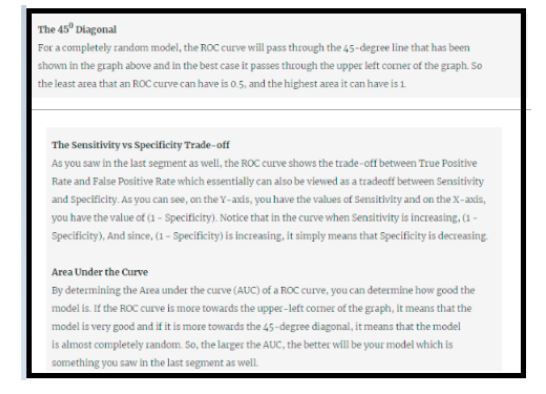

In [363]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0        0.25          0    1    1    1    0    0    0    0    0    0   
1      0        0.19          0    1    1    0    0    0    0    0    0    0   
2      0        0.04          0    1    0    0    0    0    0    0    0    0   
3      0        0.09          0    1    0    0    0    0    0    0    0    0   
4      0        0.43          0    1    1    1    1    1    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [364]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.76   0.98   0.54
0.20  0.20      0.81   0.96   0.66
0.30  0.30      0.84   0.94   0.74
0.40  0.40      0.86   0.91   0.80
0.50  0.50      0.86   0.88   0.85
0.60  0.60      0.86   0.83   0.88
0.70  0.70      0.84   0.77   0.92
0.80  0.80      0.81   0.67   0.95
0.90  0.90      0.75   0.52   0.98


<Figure size 720x720 with 0 Axes>

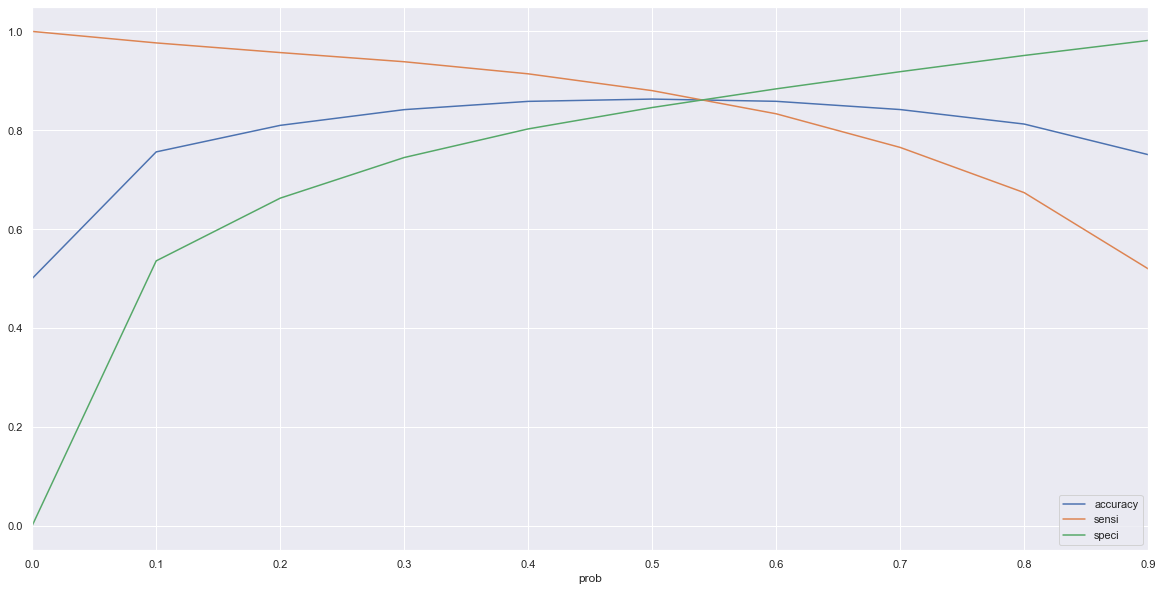

In [365]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(10,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.53 is the optimum point to take it as a cutoff probability where all three line are intersectiing 

In [366]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.53 else 0)
y_train_pred_final.head()

Churn  Churn_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0        0.25          0    1    1    1    0    0    0    0    0    0   
1      0        0.19          0    1    1    0    0    0    0    0    0    0   
2      0        0.04          0    1    0    0    0    0    0    0    0    0   
3      0        0.09          0    1    0    0    0    0    0    0    0    0   
4      0        0.43          0    1    1    1    1    1    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

<Figure size 720x720 with 0 Axes>

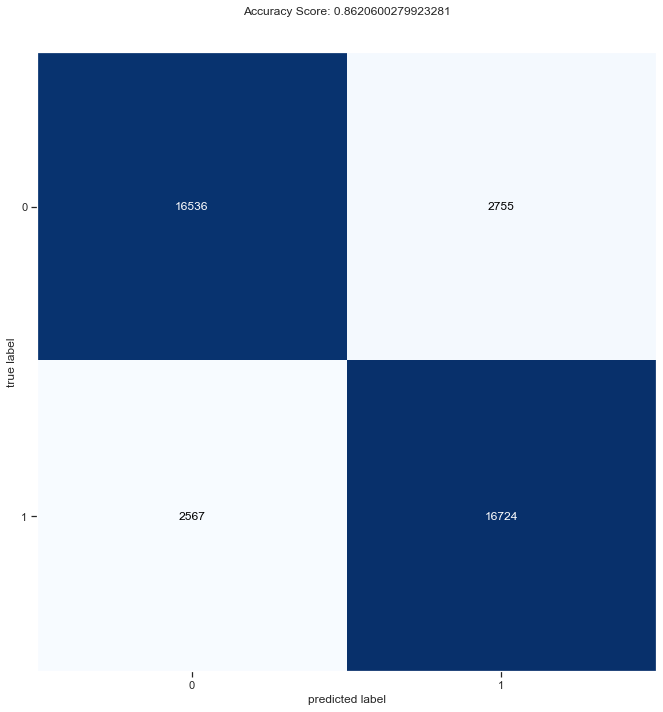

In [367]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
acc_train_score = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
# plot the confusion matrix 
plt.figure(figsize=(10,10))
fig, ax = plot_confusion_matrix(conf_mat=confusion2)
all_sample_title = 'Accuracy Score: {0}'.format(acc_train_score)
plt.title(all_sample_title, size = 12);
plt.tight_layout()

In [368]:
#y_pred_prob = LR_hyper.predict_proba(X_train_pca)[:, 1]
Evalution_parameter(y_train_pred_final.Churn, y_train_pred_final.predicted,y_train_pred_final.Churn_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[16536  2755]
 [ 2567 16724]]

Accuracy score on Train data :-  86.21 

Sensitivity: 86.69 %
Specificity: 85.72 %

Area under the ROC Curve-:  93.43 %
F1 Score -: 0.86


# Inference - 
- Accuracy score on Train data is good
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve more than 90% which is say this is good model for train data

## Lets check the model on test data

In [369]:
# head part of the data
X_test.head()

arpu_6  arpu_7  arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
21857    0.97   -1.29   -1.18           -0.60           -0.82           -0.79   
10029   -0.03    0.47    0.18           -0.16           -0.48           -0.20   
72449   -0.85    0.12    0.06           -0.88           -0.69           -0.24   
4463     0.17    0.45    0.23           -0.32           -0.22           -0.21   
17619   -0.67   -0.70   -0.62           -0.82           -0.85           -0.79   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_num_6  \
21857            0.40           -0.67           -0.73             -0.84   
10029            0.10           -0.47           -0.43             -0.41   
72449           -0.80           -0.64            0.46             -0.84   
4463             0.04            0.24            0.41             -0.30   
17619           -0.59           -0.72           -0.73              0.88   

       total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
21857             -0.92             -1.09              0.81             -1.24   
10029             -0.18             -0.32             -0.03              0.43   
72449             -0.07             -0.65             -0.83              0.43   
4463              -0.61             -0.54              0.30              0.00   
17619              1.41              0.56             -0.67             -0.71   

       total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
21857             -1.14            2.27           -0.69           -0.97   
10029              0.25           -0.24           -0.24            0.57   
72449             -0.08           -0.09           -0.11            0.24   
4463               0.21            0.19            0.32            0.42   
17619             -0.57           -0.85           -0.80           -0.72   

       last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
21857                3.35               -0.74               -0.71   
10029                0.07                0.22                0.30   
72449                0.40                0.20                0.82   
4463                 0.74                0.96               -0.71   
17619               -0.64               -0.61               -0.39   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
21857              -0.60              -0.61              -0.56   
10029              -0.60              -0.61              -0.22   
72449              -0.24               0.05              -0.22   
4463               -0.60              -0.61              -0.56   
17619               3.02               2.02               1.52   

       max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
21857            -0.70            -0.70            -0.66            -0.50   
10029            -0.70            -0.70             1.66            -0.50   
72449             0.69             0.64             1.16            -0.09   
4463             -0.70            -0.70            -0.66            -0.50   
17619            -0.47            -0.48            -0.28             3.57   

       count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
21857            -0.52            -0.48            -0.39            -0.39   
10029            -0.52            -0.48            -0.39            -0.39   
72449            -0.15            -0.08            -0.39             0.48   
4463             -0.52            -0.48            -0.39            -0.39   
17619             2.44             1.11            -0.39            -0.39   

       count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  \
21857            -0.36               -0.68               -0.68   
10029             0.54               -0.68               -0.68   
72449            -0.36                0.13                0.81   
4463             -0.36               -0.68               -0.68   
17619             1.45                0.41                0.05 

In [370]:
# lets take all the required columns 
X_test[col].head()

total_og_mou_8  vol_2g_mb_6  sachet_2g_8  std_og_t2t_mou_8  \
21857           -0.79        -0.40        -0.42             -0.39   
10029           -0.20        -0.40        -0.42             -0.39   
72449           -0.24         0.12        -0.42             -0.25   
4463            -0.21        -0.40        -0.42             -0.39   
17619           -0.79         1.08         1.17             -0.39   

       std_og_t2m_mou_8  night_pck_user_6_-1  night_pck_user_8_1.0  \
21857             -0.41                    1                     0   
10029              0.01                    1                     0   
72449              0.07                    0                     0   
4463              -0.41                    1                     0   
17619             -0.41                    0                     0   

       monthly_2g_6_1  monthly_2g_6_2  monthly_2g_7_1  monthly_2g_7_2  \
21857               0               0               0               0   
10029               0               0               0               0   
72449               1               0               0               0   
4463                0               0               0               0   
17619               0               0               0               0   

       monthly_2g_8_1  monthly_2g_8_2  fb_user_8_1.0  aon_year_2-3  \
21857               0               0              0             1   
10029               0               0              1             0   
72449               1               0              1             0   
4463                0               0              0             0   
17619               0               0              1             0   

       aon_year_3-4  aon_year_4-5  aon_year_5+  aon_year_<1  
21857             0             0            0            0  
10029             0             0            1            0  
72449             0             0            0            1  
4463              0             0            1            0  
17619             0             0            0            0

In [371]:
# adding the constant
X_test_sm = sm.add_constant(X_test[col])

In [372]:
# pnow, wll make the predication on data set
y_test_pred = res.predict(X_test_sm)

In [373]:
y_test_pred[:10]

21857   0.60
10029   0.01
72449   0.02
4463    0.07
17619   0.48
26623   0.05
33159   0.91
58256   0.78
96898   0.30
38785   0.02
dtype: float64

In [374]:
y_test_pred.head()

21857   0.60
10029   0.01
72449   0.02
4463    0.07
17619   0.48
dtype: float64

In [375]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [376]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [377]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_prob'})

In [378]:
y_pred_final.head()

Churn  Churn_prob
21857      0        0.60
10029      0        0.01
72449      0        0.02
4463       0        0.07
17619      0        0.48

In [379]:
# Using the probability threshold value 0f 0.2 on the test dataset to predict if a lead will convert

y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.53 else 0)

In [380]:
# head of the data y_pred_final
y_pred_final.head()

Churn  Churn_prob  final_predicted
21857      0        0.60                1
10029      0        0.01                0
72449      0        0.02                0
4463       0        0.07                0
17619      0        0.48                0

In [381]:
Evalution_parameter(y_pred_final.Churn,y_pred_final.final_predicted, y_pred_final.Churn_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[7088 1181]
 [ 275  457]]

Accuracy score on Test data :-  83.82 

Sensitivity: 62.43 %
Specificity: 85.72 %

Area under the ROC Curve-:  84.09 %
F1 Score -: 0.65


# Inference - 
- Accuracy score on test data is good
- We can see the fair value for Sensitivity and good value for Specificity on test data. But there is no balance withing Sensitivity and Specificity
- Area under the ROC Curve more than 80% which is say this is good model for test data

# Determining Feature Importance

In [382]:
# lets see all the columns which are part of this modelling and making  the prediction 
col

Index(['total_og_mou_8', 'vol_2g_mb_6', 'sachet_2g_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'night_pck_user_6_-1', 'night_pck_user_8_1.0',
       'monthly_2g_6_1', 'monthly_2g_6_2', 'monthly_2g_7_1', 'monthly_2g_7_2',
       'monthly_2g_8_1', 'monthly_2g_8_2', 'fb_user_8_1.0', 'aon_year_2-3',
       'aon_year_3-4', 'aon_year_4-5', 'aon_year_5+', 'aon_year_<1'],
      dtype='object')

In [383]:
# lets check the new_params
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

total_og_mou_8         -3.95
vol_2g_mb_6             0.13
sachet_2g_8            -0.48
std_og_t2t_mou_8        1.89
std_og_t2m_mou_8        1.83
night_pck_user_6_-1    -0.57
night_pck_user_8_1.0   -2.18
monthly_2g_6_1         -1.13
monthly_2g_6_2         -2.09
monthly_2g_7_1         -0.79
monthly_2g_7_2         -2.55
monthly_2g_8_1         -0.68
monthly_2g_8_2         -2.56
fb_user_8_1.0          -2.42
aon_year_2-3           -1.92
aon_year_3-4           -2.75
aon_year_4-5           -2.88
aon_year_5+            -2.60
aon_year_<1            -1.64
dtype: float64

In [384]:
# lets calculate the feature inportance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

total_og_mou_8         -208.32
vol_2g_mb_6               6.90
sachet_2g_8             -25.23
std_og_t2t_mou_8        100.00
std_og_t2m_mou_8         96.58
night_pck_user_6_-1     -30.17
night_pck_user_8_1.0   -114.83
monthly_2g_6_1          -59.48
monthly_2g_6_2         -110.22
monthly_2g_7_1          -41.47
monthly_2g_7_2         -134.36
monthly_2g_8_1          -35.91
monthly_2g_8_2         -135.38
fb_user_8_1.0          -127.64
aon_year_2-3           -101.38
aon_year_3-4           -145.19
aon_year_4-5           -152.01
aon_year_5+            -137.01
aon_year_<1             -86.35
dtype: float64

In [385]:
# lets sort the feature and see the list
feature_importance.sort_values(ascending=False)

std_og_t2t_mou_8        100.00
std_og_t2m_mou_8         96.58
vol_2g_mb_6               6.90
sachet_2g_8             -25.23
night_pck_user_6_-1     -30.17
monthly_2g_8_1          -35.91
monthly_2g_7_1          -41.47
monthly_2g_6_1          -59.48
aon_year_<1             -86.35
aon_year_2-3           -101.38
monthly_2g_6_2         -110.22
night_pck_user_8_1.0   -114.83
fb_user_8_1.0          -127.64
monthly_2g_7_2         -134.36
monthly_2g_8_2         -135.38
aon_year_5+            -137.01
aon_year_3-4           -145.19
aon_year_4-5           -152.01
total_og_mou_8         -208.32
dtype: float64

## We have got the feature which are helping to decide the Churn Customer

# Hyperparameter tuning Logistic Regression in interpretable Model


In [386]:
# initialize the LogisticRegression

LR = LogisticRegression()

# parameter
param_grid = [    
    {'penalty' : ['l1', 'l2','elasticnet','none'],
     'max_iter' : [1000,2500,5000],
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'C' : np.logspace(-4, 4,6)
    }
]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
clf = GridSearchCV(LR, param_grid = param_grid, cv = folds, verbose=True, n_jobs=-1,scoring='roc_auc')

#fit the model on train data

best_clf = clf.fit(X_train_res[col],y_train_res)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 350 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 893 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1271 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 17.7min finished


In [387]:
# Accuracy of the model with hypertuning
print (f'Accuracy - : {best_clf.score(X_train_res[col],y_train_res):.3f}')

Accuracy - : 0.934


In [388]:
# Best estimator
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, penalty='none', solver='saga')

In [389]:
# prediction on train data
y_predict=best_clf.predict(X_train_res[col])

In [390]:
y_pred_prob = best_clf.predict_proba(X_train_res[col])[:, 1]
Evalution_parameter(y_train_res, y_predict ,y_pred_prob,"Train")

Below is Evaluation Parameter after Model fit for Train data-: 

confusion metrics below :  
 [[16320  2971]
 [ 2312 16979]]

Accuracy score on Train data :-  86.31 

Sensitivity: 88.02 %
Specificity: 84.6 %

Area under the ROC Curve-:  93.43 %
F1 Score -: 0.86


# Inference - 
- Accuracy score on Train data is good
- We can see the good Sensitivity and Specificity on train data
- Area under the ROC Curve more than 90% which is say this is good model for train data

In [391]:
# prediction on test data
y_predict_test=best_clf.predict(X_test[col])

In [392]:
# lets check the model performance 
y_pred_prob = best_clf.predict_proba(X_test[col])[:, 1]
Evalution_parameter(y_test, y_predict_test,y_pred_prob,"Test")

Below is Evaluation Parameter after Model fit for Test data-: 

confusion metrics below :  
 [[6995 1274]
 [ 261  471]]

Accuracy score on Test data :-  82.95 

Sensitivity: 64.34 %
Specificity: 84.59 %

Area under the ROC Curve-:  84.09 %
F1 Score -: 0.64


# Inference - 
- Accuracy score on test data is good
- We can see the fair value for Sensitivity and good value for Specificity on train data
- Area under the ROC Curve more than 80% which is say this is good model for train data
- But the no balance withing Sensitivity and Specificity


<a id="8"></a>
# 8. Conclusion

## Model performance 

- **Sensitivity** is the ability of a test to correctly identify those with the Churn (true positive rate), whereas test **Specificity** is the ability of the test to correctly identify those without the Churn (true negative rate).

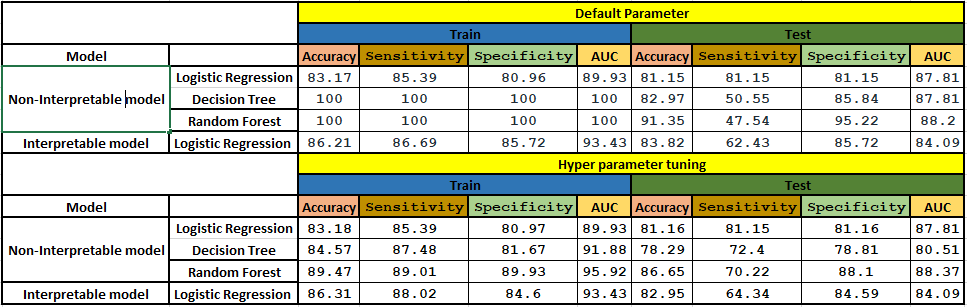

## Best Model
- As can we see that Logistic Regression with PCA is performing good among all model.

## Feature which is important for deciding the Churn Customer
- We have found the below feature are playing importance in this case study for deciding the Churn.

        std_og_t2t_mou_8        100.00
        std_og_t2m_mou_8         96.58
        vol_2g_mb_6               6.90
        sachet_2g_8             -25.23
        night_pck_user_6_-1     -30.17
        monthly_2g_8_1          -35.91
        monthly_2g_7_1          -41.47
        monthly_2g_6_1          -59.48
        aon_year_<1             -86.35
        aon_year_2-3           -101.38
        monthly_2g_6_2         -110.22
        night_pck_user_8_1.0   -114.83
        fb_user_8_1.0          -127.64
        monthly_2g_7_2         -134.36
        monthly_2g_8_2         -135.38
        aon_year_5+            -137.01
        aon_year_3-4           -145.19
        aon_year_4-5           -152.01
        total_og_mou_8         -208.32

- First 3 feature are positive correlated with dependent variable and other are negativly correlated.

## Finally, recommend strategies to manage customer churn based :
- As we have got that based on STD charge customer are Churing as this is important predictor.
- Seem that STD charge amount is HIGH for the customer. **Telecom company** need to work on this STD charges.
- Also we can see that people are using Mobile data and this good predictor to find the Churn customer and accordigly we can give them offer to stay with same telecom company.
- We have seen that **Age On Network 3+**  - very few are Churned. So, we can role the offer to new customer so that the Age On Network increase its hard to customer to Churn.

# Thank you